| **Projet Data Challenge : Bridging the Future Baseline** |
|:---------------------------------------------------------:|
| **Améliorer la littératie et la réussite scolaire des enfants en âge primaire** |
| **23231. EL Moustapha JIDDOU**  |  **Data Challenge 2025**  |  **SID44** |

---

## Introduction générale  
L’**Indice de Compétence Scolaire (ICS)** est l’indicateur central de notre étude :  
- Il agrège et normalise (0–100) les scores EGRA de reconnaissance des lettres, fluidité et compréhension.  
- Il permet de classer chaque élève en trois niveaux (« faible », « moyen », « élevé ») pour cibler les besoins et mesurer l’impact des actions.  
- Il facilite la comparaison entre élèves, écoles et régions, et guide les recommandations stratégiques.

---

## Section 1 : Business understanding

### 1. Contexte  
Le programme **Bridging the Future**, financé par l’USDA et piloté par Counterpart International, intervient dans les régions du Tagant, Gorgol et Brakna (Mauritanie) pour :  
- Distribuer des repas nutritifs quotidiennes afin d’augmenter la fréquentation scolaire.  
- Renforcer les pratiques WASH (eau, hygiène, assainissement).  
- Améliorer les infrastructures (stocks, latrines, accès à l’eau potable).  
- Promouvoir l’enseignement bilingue pour soutenir la littératie.  
- Mobiliser les communautés (Comités de Gestion Scolaire, APE, PTA) pour la pérennité des écoles.

### 2. Problématique  
> « Comment renforcer durablement les compétences en lecture des élèves du primaire  
> (mesurées par l’ICS) dans ces trois régions, en tenant compte des disparités socio-économiques,  
> de l’état des infrastructures et des pratiques pédagogiques existantes ? »

Cette démarche associe le Gouvernement mauritanien, ARED, ECODEV et couvre **111 écoles**.

---

## Section 2 : Questions clés du Data Challenge  
- Quels facteurs linguistiques, familiaux et socio-économiques influencent l’ICS ?  
- Quel lien entre la formation des enseignants et la répartition des niveaux ICS ?  
- Quel rôle jouent la direction d’école et les comités de gestion sur la proportion d’élèves « élevé » ?  
- Comment optimiser les interventions (nutrition, WASH, infrastructures) pour augmenter la part d’élèves « moyen » et « élevé » ?  
- Quelles recommandations communautaires maximisent le gain d’ICS dans chaque région ?

---

## Section 3 : Panorama des données  
Le *baseline* comporte :  
- **EGRA** : 582 élèves (grades 1–3), évaluation des compétences en lecture.  
- **Student Survey** : 873 élèves (grades 1–6), questionnaire sur conditions familiales, socio-économiques et attitudes.  
- **Teacher Survey** : 291 enseignants, pratiques pédagogiques et formation.  
- **Director Survey** : 97 directeurs, gestion scolaire et relation communautaire.  
Collectées via Kobo Toolbox, ces données offrent une vision multi-niveaux (élèves–enseignants–direction).

---

## Section 4 : Approche méthodologique  
1. **Exploration & nettoyage**  
   - Identification des variables, traitement des valeurs manquantes, unification des formats.  
2. **Intégration**  
   - Fusion des sources (élèves, enseignants, directeurs) via clés communes (région, département, commune, école).  
3. **Analyses descriptives & visuelles**  
   - Distributions, corrélations initiales, analyses géographiques par région.  
4. **Modélisation**  
   - Sélection bivariée, imputation, encodage, standardisation, SMOTE, Random Forest.  
5. **Évaluation & recommandations**  
   - Validation croisée, tuning, interprétation des variables clés, préconisations opérationnelles.

---

### 7. Importation  


In [488]:
from unidecode import unidecode
import pandas as pd
import numpy as np
import os
import pyreadstat
from rich.console import Console
from rich.table import Table
from sklearn.impute import KNNImputer
import os
import pandas as pd
import plotly.express as px
import requests
# Importer la bibliothèque topojson
import topojson as tj
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import re
# 1. Import des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Section 2: Data Preparation & Data Exploration
===============================================

## 🧹 Traitement et Nettoyage des Données

## Objectif de la pipeline de nettoyage

Dans toute analyse statistique rigoureuse, la qualité des données constitue une étape fondamentale. La pipeline de nettoyage développée ici permet de fiabiliser l'ensemble des jeux de données collectés dans le cadre du projet *Bridging the Future*. Elle vise à garantir que les données soient cohérentes, complètes, sans doublons ni valeurs erronées, avant de procéder à toute modélisation.

Cette démarche est indispensable dans un contexte multirégional (Tagant, Gorgol, Brakna) et multisource (élèves, enseignants, directeurs), car elle évite les biais statistiques dus à des enregistrements mal renseignés ou dupliqués.


## Description de la stratégie de nettoyage

La pipeline comprend plusieurs étapes successives :

### 1. Suppression des doublons

Toutes les lignes dupliquées sont automatiquement détectées et retirées. Cela permet d'éviter que certaines observations n’aient un poids statistique plus important que d’autres, ce qui fausserait les résultats.

### 2. Détection des réponses à ignorer

Certaines réponses textuelles comme `"pas_de_réponse"`, `"non_applicable"` ou `"don't know"` sont considérées comme équivalentes à des valeurs manquantes. La pipeline identifie ces cas et les transforme en valeurs `NaN` (manquantes), facilitant ainsi leur traitement par les méthodes d'imputation.

### 3. Imputation des valeurs manquantes

La gestion des valeurs manquantes repose sur un ensemble d’algorithmes sélectionnés en fonction du type de variable et des dépendances identifiées :

- Le **mode** est utilisé pour les variables catégorielles.
- La **moyenne** ou la **médiane** sont appliquées aux variables numériques simples.
- Des techniques plus avancées comme la **régression linéaire déterministe** ou **stochastique** permettent d’imputer une variable à partir d’une autre fortement corrélée.
- Le **KNN (k plus proches voisins)** est employé pour des blocs de variables, notamment numériques ou catégorielles encodées.
- En cas d’absence de méthode robuste, un tirage aléatoire (**hot deck**) est utilisé en dernier recours.

La stratégie d’imputation est entièrement configurable via un dictionnaire `method_config`, ce qui permet d’adapter finement la méthode à chaque variable.

### 4. Encodage/décodage intelligent des variables qualitatives

Les variables textuelles sont encodées temporairement sous forme numérique afin de permettre leur traitement par des méthodes comme KNN. Après imputation, elles sont reconverties dans leur format d’origine. Cela garantit une flexibilité maximale sans perte d’information sémantique.

### 5. Standardisation des formats

Les formats des dates, heures, coordonnées GPS et identifiants sont harmonisés pour assurer la compatibilité entre jeux de données et faciliter les jointures ultérieures entre élèves, enseignants et directeurs.

## Apports pour l’analyse

Cette pipeline fournit un cadre structuré, réplicable et documenté pour le traitement des données. Elle permet :

- Une préparation rigoureuse des bases pour les analyses descriptives et prédictives.
- Une harmonisation des sources, même dans un contexte multilingue ou multi-échelle.
- Une réduction drastique du nombre de valeurs manquantes sans altérer les distributions originales.

Elle constitue ainsi une étape clé du **workflow analytique**, garantissant que les étapes suivantes (visualisation, modélisation, recommandations) s’appuieront sur des données fiables.

In [4]:
# --- Placeholder for clean_dataset function ---
def clean_dataset(
    df: pd.DataFrame,
    df_labels: pd.DataFrame,
    df_missing: pd.DataFrame = None,
    method_config: dict = None,
    skip_keywords=None,
    drop_duplicates: bool = True
) -> pd.DataFrame:
    """
    Applique les étapes de nettoyage au DataFrame.
    Ceci est un placeholder et doit être remplacé par la logique de nettoyage réelle.
    """
    print("Applying cleaning pipeline (placeholder)...")

    df_cleaned = df.copy()

    # --- 1. Gérer les doublons ---
    if drop_duplicates:
        initial_rows = df_cleaned.shape[0]
        df_cleaned.drop_duplicates(inplace=True)
        rows_dropped = initial_rows - df_cleaned.shape[0]
        if rows_dropped > 0:
            print(f"Dropped {rows_dropped} duplicate rows.")

    # --- 2. Gérer les mots-clés à ignorer ---
    # Ceci est une interprétation possible de 'skip_keywords'.
    # L'implémentation réelle dépendra de la manière dont ces mots-clés sont utilisés.
    if skip_keywords and isinstance(skip_keywords, dict):
        for col, keywords in skip_keywords.items():
            if col in df_cleaned.columns:
                if isinstance(keywords, list):
                    # Convertir en string pour comparer avec des chaînes (si la colonne est object)
                    # ou gérer numériquement si la colonne est numérique
                    if df_cleaned[col].dtype == 'object':
                         df_cleaned[col] = df_cleaned[col].astype(str)
                         # Remplacer les valeurs contenant les mots-clés par NaN
                         for kw in keywords:
                              df_cleaned[col] = df_cleaned[col].replace(kw, np.nan)
                    elif pd.api.types.is_numeric_dtype(df_cleaned[col]):
                         # Gérer numériquement, par exemple remplacer des codes spéciaux
                         for kw in keywords:
                              df_cleaned[col] = df_cleaned[col].replace(kw, np.nan)
                    else:
                         print(f"Warning: Skip keywords specified for column '{col}' with unsupported dtype {df_cleaned[col].dtype}.")
                else:
                     print(f"Warning: Skip keywords for column '{col}' should be a list.")


    # --- 3. Imputation des valeurs manquantes ---
    # Cette partie utilise les fonctions d'imputation définies plus bas.
    # La logique '_complete_imputation' gère déjà les stratégies définies dans method_config
    # ou applique des stratégies automatiques.
    df_cleaned = _complete_imputation(df_cleaned, method_config)


    # --- 4. Standardisation/Transformation (Ajouter ici si nécessaire) ---
    # Exemple : convertir des colonnes de date si elles ne l'ont pas été
    # for col in df_cleaned.columns:
    #     if 'Date' in col or 'Time' in col:
    #         try:
    #             # Convertir les dates/heures si elles ne le sont pas déjà
    #             df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')
    #         except:
    #             pass # Laisser la colonne si la conversion échoue


    # Retourner le DataFrame nettoyé
    return df_cleaned
# =============================================================================
# Fonctions d'imputation avancées
# =============================================================================

def _impute_deductive(series):
    s = series.copy()
    return s  # placeholder for deductive imputation

def _impute_cold_deck(series):
    s = series.copy()
    return s  # placeholder for cold deck imputation

def _impute_seq(series):
    # Imputation séquentielle (hot-deck séquentiel)
    s = series.copy()
    # ffill gère déjà bien les types, mais on ajoute infer_objects par précaution
    # L'avertissement pour ffill peut persister si la série est object
    return s.ffill().infer_objects(copy=False)

def _impute_mean(series):
    s = series.copy()
    # fillna sur série numérique devrait être OK
    filled = s.fillna(s.mean())
    return filled.infer_objects(copy=False)

def _impute_median(series):
    s = series.copy()
    # fillna sur série numérique devrait être OK
    filled = s.fillna(s.median())
    return filled.infer_objects(copy=False)

def _impute_mode(series):
    s = series.copy()
    m = s.mode(dropna=True)
    if not m.empty:
        mode_val = m.iloc[0]
        # Utiliser loc pour assigner la valeur du mode aux indices manquants
        # Cela peut éviter l'avertissement fillna sur object
        missing_mask = s.isna()
        s.loc[missing_mask] = mode_val
    # infer_objects peut aider si le type des valeurs connues n'est pas clair après l'assignation
    return s.infer_objects(copy=False)

def _impute_hotdeck_random(series):
    s = series.copy()
    known = s.dropna()
    if known.empty:
        return s
    idx = s[s.isna()].index
    chosen = np.random.choice(known.values, size=len(idx), replace=True)
    s.loc[idx] = chosen
    # infer_objects peut aider si le type des valeurs connues n'est pas clair
    return s.infer_objects(copy=False)

def _impute_ratio(series, ref):
    # Imputation par ratio (somme / somme) * ref
    s = series.copy()
    r = ref.copy()

    # Convertir en float si nécessaire
    s = pd.to_numeric(s, errors='coerce')
    r = pd.to_numeric(r, errors='coerce')

    if r.isna().all():
        return s

    denom = r.sum(skipna=True)
    if denom == 0:
        return s

    ratio_val = s.sum(skipna=True) / denom
    mask = s.isna()
    s.loc[mask] = ratio_val * r.loc[mask]
    # infer_objects pour s'assurer que le type est correct après l'assignation
    return s.infer_objects(copy=False)


def _impute_reg(series, predictor):
    # Régression linéaire déterministe
    s = pd.to_numeric(series.copy(), errors='coerce')
    p = pd.to_numeric(predictor.copy(), errors='coerce')

    df_ = pd.DataFrame({"t": s, "p": p}).dropna()
    if df_.empty:
        return s

    vx = np.var(df_["p"], ddof=1)
    if vx == 0:
        return s

    cov_mat = np.cov(df_["p"], df_["t"], ddof=1)
    if cov_mat.ndim < 2:
        return s

    b = cov_mat[0, 1] / vx
    a = df_["t"].mean() - b * df_["p"].mean()

    idx = s.isna() & p.notna()
    s.loc[idx] = a + b * p.loc[idx]
    # infer_objects pour s'assurer que le type est correct après l'assignation
    return s.infer_objects(copy=False)


def _impute_reg_stochastic(series, predictor):
    # Régression linéaire + composante stochastique
    s = pd.to_numeric(series.copy(), errors='coerce')
    p = pd.to_numeric(predictor.copy(), errors='coerce')

    df_ = pd.DataFrame({"t": s, "p": p}).dropna()
    if df_.empty:
        return s

    vx = np.var(df_["p"], ddof=1)
    if vx == 0:
        return s

    cov_mat = np.cov(df_["p"], df_["t"], ddof=1)
    if cov_mat.ndim < 2:
        return s

    b = cov_mat[0, 1] / vx
    a = df_["t"].mean() - b * df_["p"].mean()

    residual = df_["t"] - (a + b * df_["p"])
    sigma = residual.std(ddof=1)

    idx = s.isna() & p.notna()
    rng = np.random.default_rng()
    noise = rng.normal(loc=0, scale=sigma, size=idx.sum())
    s.loc[idx] = (a + b * p.loc[idx]) + noise
    # infer_objects pour s'assurer que le type est correct après l'assignation
    return s.infer_objects(copy=False)


def _impute_knn_block(df_in, k=3):
    imputer = KNNImputer(n_neighbors=k)
    arr = imputer.fit_transform(df_in)
    return pd.DataFrame(arr, columns=df_in.columns, index=df_in.index)

def _impute_acm_qual(series, df_others):
    # Placeholder => par défaut, on utilise le mode
    return _impute_mode(series.copy())

def _impute_classif_qual(series, df_others):
    # Placeholder => par défaut, on utilise le mode
    return _impute_mode(series.copy())

def _impute_multi_reg(col_list, df_):
    # Placeholder multi-col
    return df_.copy()

def _impute_multi_mcar_mnar(df_):
    # Placeholder multi-imputation
    return df_.copy()

# Remplacer la section "Fonctions d'imputation avancées" dans votre code par ce bloc.

# =============================================================================
# Imputation sur une colonne (en fonction de method_config)
# =============================================================================
def _impute_one_col(col, df, method_config):
    # Cette fonction est déjà correcte pour gérer les cas où method_config est un dict
    # Elle renverra "" pour 'strat' si la colonne n'est pas dans le dict ou si method_config est None,
    # ce qui activera le bloc 'else' pour l'imputation auto.
    strat = "" # Valeur par défaut si method_config est None ou si la colonne n'y est pas
    if method_config is not None:
        strat = method_config.get(col, "") # Récupère la stratégie si method_config est un dict

    s = df[col].copy()

    # Aucune valeur manquante => rien à faire
    if not s.isna().any():
        return s

    if strat == "deductive":
        return _impute_deductive(s)
    elif strat == "cold_deck":
        return _impute_cold_deck(s)
    elif strat == "seq":
        return _impute_seq(s)
    elif strat == "mean":
        return _impute_mean(s)
    elif strat == "median":
        return _impute_median(s)
    elif strat == "mode":
        return _impute_mode(s)
    elif strat == "hot_deck":
        return _impute_hotdeck_random(s)
    elif strat == "ratio":
        # Nécessite que method_config soit un dict et contienne la référence
        if method_config is not None:
            refname = method_config.get("ratio_ref", {}).get(col, None)
            if refname and refname in df.columns:
                return _impute_ratio(s, df[refname])
        # Fallback si la colonne de référence n'existe pas ou si method_config est None
        # Utilise la logique automatique par défaut via le bloc 'else'
        pass # Laisser passer au bloc else

    elif strat == "reg":
         # Nécessite que method_config soit un dict et contienne la référence
         if method_config is not None:
              refvar = method_config.get("reg_ref", {}).get(col, None)
              if refvar and refvar in df.columns:
                   return _impute_reg(s, df[refvar])
         # Fallback
         pass # Laisser passer au bloc else

    elif strat == "reg_stochastic":
        # Nécessite que method_config soit un dict et contienne la référence
        if method_config is not None:
             refvar = method_config.get("reg_ref", {}).get(col, None)
             if refvar and refvar in df.columns:
                 return _impute_reg_stochastic(s, df[refvar])
        # Fallback
        pass # Laisser passer au bloc else

    elif strat == "hot_deck_cond":
        return _impute_hotdeck_random(s)  # placeholder for conditional hot deck - fallback to random

    elif strat == "acm":
        return _impute_acm_qual(s, df) # placeholder - fallback to mode

    elif strat == "classif_qual":
        return _impute_classif_qual(s, df) # placeholder - fallback to mode

    # Les stratégies "knn", "multi_reg", "multi_imputation" sont gérées en bloc
    # dans _complete_imputation, pas ici. Donc elles passeront aussi au bloc else
    # si elles ne sont pas explicitement gérées ci-dessous.

    else:
        # Fallback / Imputation automatique si strat est "" ou non reconnu
        if str(s.dtype) in ["object", "category"]:
            # console.print(f"Imputation automatique (mode) pour '{col}'") # Décommenter pour debug
            return _impute_mode(s)
        elif str(s.dtype) in ["int64", "float64"]: # Ajouter des types numériques spécifiques
            # console.print(f"Imputation automatique (mean) pour '{col}'") # Décommenter pour debug
            return _impute_mean(s)
        else:
             # console.print(f"Attention: Aucune stratégie d'imputation définie pour '{col}' de type '{s.dtype}'. Retourne la série originale.") # Décommenter pour debug
             return s # Retourne la série telle quelle si le type n'est pas géré


# =============================================================================
# Imputation complète (blocs knn/multi, etc.)
# =============================================================================
def _complete_imputation(df, method_config):
    df_out = df.copy()  # évite SettingWithCopy

    # Identifier les colonnes qui DOIVENT être traitées en bloc (KNN, Multi-Reg, etc.)
    # indépendamment de method_config pour l'instant, sauf si method_config l'exclut ou le spécifie autrement
    # Alternativement, on pourrait dire que ces méthodes de bloc ne s'appliquent QUE si method_config le spécifie.
    # Restons simple : les méthodes en bloc s'appliquent SI method_config les spécifie pour certaines colonnes.

    knn_cols = []
    multi_reg_cols = []
    multi_imp_cols = []

    if method_config is not None:
         knn_cols = [col for col, method in method_config.items() if method == 'knn' and col in df_out.columns]
         multi_reg_cols = [k for k, v in method_config.items() if v == "multi_reg" and k in df_out.columns]
         multi_imp_cols = [k for k, v in method_config.items() if v == "multi_imputation" and k in df_out.columns]


    # Imputation simple col by col
    # Traiter TOUTES les colonnes ici. _impute_one_col décidera de la stratégie
    # (spécifiée dans method_config ou automatique)
    for c in df_out.columns:
         # Si la colonne doit être traitée par une méthode de bloc, on la saute ici.
         # Elle sera traitée plus tard.
         if c in knn_cols or c in multi_reg_cols or c in multi_imp_cols:
              continue

         # Vérifier si la colonne a des manquants avant d'appeler _impute_one_col
         if df_out[c].isna().any():
              # _impute_one_col utilise method_config pour la stratégie ou applique la stratégie auto
              df_out[c] = _impute_one_col(c, df_out, method_config)


    # Bloc knn => numeric + cat
    if knn_cols: # Appliquer kNN uniquement si des colonnes sont spécifiées pour cette méthode
        # Sélectionner uniquement les colonnes pour lesquelles 'knn' est spécifié
        # Assurez-vous que ces colonnes existent toujours après l'imputation col-par-col (elles devraient)
        current_knn_cols = [col for col in knn_cols if col in df_out.columns]

        if current_knn_cols: # Double check
            # Séparer les colonnes KNN en numérique et catégorielle
            knn_num_cols = df_out[current_knn_cols].select_dtypes(include=[np.number]).columns
            knn_cat_cols = df_out[current_knn_cols].select_dtypes(include=['object', 'category']).columns

            # Appliquer kNN sur le sous-ensemble de colonnes spécifiées
            if not knn_num_cols.empty and df_out[knn_num_cols].isna().sum().sum() > 0:
                 block_num_knn = df_out[knn_num_cols].copy()
                 block_num_knn = _impute_knn_block(block_num_knn)
                 # Mettre à jour les colonnes dans df_out
                 for cn in block_num_knn.columns:
                      df_out[cn] = block_num_knn[cn]

            if not knn_cat_cols.empty and df_out[knn_cat_cols].isna().sum().sum() > 0:
                block_cat_knn = df_out[knn_cat_cols].copy()
                cat_encoded = block_cat_knn.copy()
                factor_maps = {}
                for col_c in cat_encoded.columns:
                    # Utiliser add_observed_categories=False pour éviter d'ajouter les manquants comme catégorie
                    # Utiliser na_sentinel= -1 pour représenter les NaN pendant l'encodage
                    cat_encoded[col_c], factor_maps[col_c] = pd.factorize(cat_encoded[col_c], sort=True, na_sentinel=-1)

                # Imputer le bloc encodé (maintenant numérique)
                cat_imputed = _impute_knn_block(cat_encoded)

                # Reconvertir en texte/catégorie
                for cc in cat_imputed.columns:
                    fm_index, fm_values = factor_maps[cc] # factor_maps[cc] est un tuple (index, values)
                    # Arrondir et caster en int pour l'indexation (KNN peut donner des floats)
                    # Les valeurs imputées pourraient être proches de -1 ou d'autres indices
                    cat_imputed[cc] = cat_imputed[cc].round().astype(int)

                    # Mapper les indices imputés aux valeurs originales
                    # Utiliser un masque pour les valeurs qui étaient NaN (-1) et sont restées -1 ou sont hors plage
                    # On impute et on remappe si l'imputation donne un index valide
                    # Les valeurs originales non NaN ne sont pas affectées par l'imputation KNN si elles étaient déjà présentes
                    # On applique la transformation seulement aux positions qui étaient NaN (maintenant potentiellement imputées)
                    original_na_mask = block_cat_knn[cc].isna() # Masque des positions qui étaient NaN

                    # Appliquer la reconversion uniquement aux positions qui étaient initialement NaN
                    # et dont l'imputation a donné un index valide
                    valid_imputed_mask = (cat_imputed[cc] >= 0) & (cat_imputed[cc] < len(fm_values)) & original_na_mask

                    # Créez une série vide du bon type
                    reconverted_series = pd.Series(np.nan, index=df_out.index, dtype=block_cat_knn[cc].dtype) # Utiliser le dtype original

                    # Remplissez les valeurs originales qui n'étaient pas NaN
                    reconverted_series[~original_na_mask] = block_cat_knn[cc][~original_na_mask]

                    # Remplissez les valeurs imputées valides
                    # Utilisez .loc pour éviter SettingWithCopyWarning
                    reconverted_series.loc[valid_imputed_mask] = cat_imputed.loc[valid_imputed_mask, cc].apply(lambda x: fm_values[x])


                 # Mettre à jour les colonnes dans df_out
                for cc in block_cat_knn.columns:
                     df_out[cc] = reconverted_series[cc]


    # multi_reg (placeholder)
    if multi_reg_cols:
         df_out = _impute_multi_reg(multi_reg_cols, df_out) # Assume _impute_multi_reg handles which cols to impute

    # multi_imputation (placeholder)
    if multi_imp_cols:
        df_out = _impute_multi_mcar_mnar(df_out) # Assume _impute_multi_mcar_mnar handles which cols to impute


    # Dernière vérification : s'assurer qu'il ne reste pas de valeurs manquantes
    # pour les colonnes qui devaient être imputées par une méthode non-multi-imputation
    # (car multi_imputation peut laisser des incertitudes ou des distributions)
    # Cette boucle est plus pour le debug ou l'assurance qualité.
    # for c in df_out.columns:
    #      # Si la colonne n'était PAS destinée à la multi_imputation et a encore des NaN
    #      if c not in multi_imp_cols and df_out[c].isna().any():
    #          # Vérifier si elle était destinée à une imputation spécifique via method_config
    #          # ou si elle aurait dû être prise en charge par l'auto-imputation
    #          specified_method = method_config.get(c, "") if method_config is not None else ""
    #          if specified_method != "multi_imputation":
    #               console.print(f"[yellow]Attention : La colonne '{c}' a encore des valeurs manquantes après l'imputation (Méthode: '{specified_method or 'auto'}').[/yellow]")


    return df_out



# -------------------------------------------------------------------------
# Fonction d'application avec rapport de statistiques
# -------------------------------------------------------------------------

def apply_pipeline_with_stats(
    df: pd.DataFrame,
    df_labels: pd.DataFrame,
    df_missing: pd.DataFrame = None,
    method_config: dict = None,
    skip_keywords=None,
    drop_duplicates: bool = True
) -> pd.DataFrame:
    """
    Applique le pipeline, puis affiche les statistiques avant et après nettoyage :
    - Shape (lignes, colonnes)
    - Nombre total de valeurs manquantes
    - Nombre de doublons
    Retourne le DataFrame nettoyé.
    """
    # Statistiques avant
    print(">>> STATISTIQUES AVANT NETTOYAGE <<<")
    print(f"Forme initiale    : {df.shape}")
    print(f"Valeurs manquantes: {df.isna().sum().sum()}")
    print(f"Doublons          : {df.duplicated().sum()}")

    # Application du pipeline
    df_clean = clean_dataset(
        df=df.copy(), # Passer une copie au pipeline
        df_labels=df_labels,
        df_missing=df_missing,
        method_config=method_config,
        skip_keywords=skip_keywords,
        drop_duplicates=drop_duplicates
    )

    # Statistiques après
    print(">>> STATISTIQUES APRÈS NETTOYAGE <<<")
    print(f"Forme finale      : {df_clean.shape}")
    print(f"Valeurs manquantes: {df_clean.isna().sum().sum()}")
    # Re-calculer les doublons sur le DataFrame nettoyé
    print(f"Doublons restants : {df_clean.duplicated().sum()}")


    return df_clean

In [5]:
# 1) Lecture du fichier Stata avec pyreadstat pour récupérer labels
df_cook, meta_cook = pyreadstat.read_dta('cook survey.dta')

# 2) Liste des variables (noms de colonnes)
print("Variables dans df_cook:")
print(df_cook.columns.tolist(), "\n")

# 3) Aperçu du contenu (5 premières lignes)
print("Aperçu cook survey:\n", df_cook.head(), "\n")

# 4) Informations générales
print("\nINFO cook survey:")
df_cook.info()
# 5) Correspondance Variable => Label
print("\nCorrespondance Variable => Label :")
for var_name, var_label in zip(meta_cook.column_names, meta_cook.column_labels):
    print(f"{var_name} => {var_label}")

Variables dans df_cook:
['start', 'today', 'team_lead', 'enum_name', 'gps', '_v1', '_v2', '_v3', '_v4', 'region', 'department', 'commune', 'school', 'consent_director', 'consent', 'involve', 'meals_provided', 'role', 'role_other', 'train_food_prac', 'train_food_prac_time', 'train_food_prac_use', 'train_food_prac_follow', 'train_food_oth_cooks', 'train_food_oth_cooks_often', 'train_food_prac_follow_oth', 'train_food_pres', 'train_food_pres_time', 'train_food_pres_use', 'train_food_pres_follow', 'train_food_pres_oth_cooks', 'train_food_pres_oth_cooks_often', 'train_food_pres_follow_oth', 'storage_rules', 'stove_new', 'stove_new_affect', '_v5', '_v6', '_v7', '_v8', '_v9', '_v10', 'stove_new_affect_other', 'volunteer_reason', '_v11', '_v12', '_v13', '_v14', '_v15', '_v16', '_v17', '_v18', '_v19', 'volunteer_reason_oth', 'compensation', 'compensation_what', 'compensation_what_other', 'compensation_satisfied', 'program_impove', 'canteen_issues', '_v20', '_v21', '_v22', '_v23', '_v24', '_v25'

La lecture du fichier Stata `cook survey.dta` a permis de charger un jeu de données structuré contenant 146 observations réparties sur 85 variables. Ce fichier documente de manière détaillée les réponses des cuisiniers scolaires enquêtés dans le cadre du programme *Bridging the Future*.
L’aperçu des premières lignes montre que chaque observation comprend un enregistrement temporel précis (`start`, `today`), des métadonnées sur l’enquêteur (`team_lead`, `enum_name`), des coordonnées GPS détaillées (latitude, longitude, altitude, précision), ainsi que des informations administratives comme la région, le département, la commune et l’école. Cela garantit la traçabilité géographique de chaque réponse, essentielle pour l’analyse régionale des résultats.
Sur le plan structurel, les types de données sont globalement cohérents avec les attentes. Les variables numériques (comme les codes d’identifiants ou les coordonnées GPS) sont bien reconnues comme telles (`int64`, `float64`), tandis que les champs textuels (comme les justifications libres ou les réponses qualitatives) apparaissent sous forme de chaînes de caractères (`object`). Une attention particulière devra toutefois être portée aux colonnes à faible taux de remplissage, telles que `compensation_what` ou certaines sous-variables `_v5` à `_v10` et `_v20` à `_v37`, qui semblent correspondre à des items d’options multiples (checkboxes).
La correspondance entre les noms de variables et leurs libellés (extraite via le dictionnaire de métadonnées `meta_cook`) offre une lecture précieuse de la signification des champs. On y retrouve des dimensions clés comme l’implication des cuisiniers dans les repas scolaires, leur formation sur les pratiques alimentaires et de conservation, les effets perçus de nouveaux réchauds distribués, ainsi que les raisons de leur engagement bénévole.
Enfin, certaines variables capturent des aspects qualitatifs particulièrement riches, notamment `add_info`, qui permet aux répondants de formuler des remarques libres. Ce champ sera à exploiter lors des analyses qualitatives complémentaires ou pour enrichir les recommandations issues de l’analyse.
Globalement, cette première étape confirme que la base `df_cook` est à la fois complète, bien structurée et suffisamment riche pour explorer en profondeur les leviers d’amélioration des pratiques de restauration scolaire dans les zones ciblées par le programme.

In [354]:
def load_data(file_path, file_type='stata'):
    """
    Charge un fichier de données avec ses métadonnées.

    Parameters:
    -----------
    file_path : str
        Chemin vers le fichier de données
    file_type : str, default='stata'
        Type de fichier ('stata', 'csv', 'excel')

    Returns:
    --------
    tuple
        (DataFrame, métadonnées)
    """
    try:
        if file_type == 'stata':
            df, meta = pyreadstat.read_dta(file_path)
            return df, meta
        elif file_type == 'csv':
            df = pd.read_csv(file_path)
            return df, None
        elif file_type == 'excel':
            df = pd.read_excel(file_path)
            return df, None
        else:
            raise ValueError(f"Type de fichier non pris en charge : {file_type}")
    except Exception as e:
        print(f"Erreur lors du chargement du fichier {file_path} : {e}")
        return None, None

def explore_dataframe(df, meta=None, name=""):
    """
    Explore un DataFrame et affiche des informations utiles.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame à explorer
    meta : pyreadstat.metadata, optional
        Métadonnées du DataFrame
    name : str, default=""
        Nom du DataFrame pour l'affichage
    """
    print(f"\n{'='*20} Exploration de {name} {'='*20}")

    # Informations générales
    print(f"\nDimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")
    print(f"Mémoire utilisée : {df.memory_usage().sum() / 1024**2:.2f} MB")

    # Aperçu des données
    print("\nAperçu des données :")
    display(df.head())

    # Types de données
    print("\nTypes de données :")
    dtypes_count = df.dtypes.value_counts()
    for dtype, count in dtypes_count.items():
        print(f"  - {dtype}: {count} colonnes")

    # Valeurs manquantes
    missing = df.isna().sum()
    missing_percent = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({'Nombre': missing, 'Pourcentage (%)': missing_percent})
    missing_df = missing_df[missing_df['Nombre'] > 0].sort_values('Nombre', ascending=False)

    if not missing_df.empty:
        print("\nValeurs manquantes :")
        display(missing_df.head(10))
        print(f"Total des colonnes avec valeurs manquantes : {len(missing_df)}")
    else:
        print("\nAucune valeur manquante détectée.")

    # Afficher les labels si disponibles
    if meta is not None and hasattr(meta, 'column_names') and hasattr(meta, 'column_labels'):
        print("\nLabels des variables :")
        labels_df = pd.DataFrame({
            'Variable': meta.column_names,
            'Label': meta.column_labels
        })
        display(labels_df.head(10))
        print(f"Total des variables avec labels : {len(labels_df)}")

def clean_dataset(df, meta=None, missing_threshold=0.8, categorical_threshold=10):
    """
    Nettoie un DataFrame en gérant les valeurs manquantes, en convertissant les types,
    et en encodant les variables catégorielles.

    Parameters:
    -----------
    df : pandas.DataFrame
        Le DataFrame à nettoyer
    meta : pyreadstat.metadata, optional
        Métadonnées du DataFrame si disponibles
    missing_threshold : float, default=0.8
        Seuil de valeurs manquantes au-delà duquel une colonne est supprimée
    categorical_threshold : int, default=10
        Nombre maximum de valeurs uniques pour considérer une variable comme catégorielle

    Returns:
    --------
    pandas.DataFrame
        DataFrame nettoyé
    dict
        Dictionnaire des transformations appliquées
    """
    print("Nettoyage du DataFrame...")
    df_clean = df.copy()
    transformations = {}

    # 1. Suppression des colonnes avec trop de valeurs manquantes
    missing_percent = df_clean.isna().mean()
    cols_to_drop = missing_percent[missing_percent > missing_threshold].index.tolist()

    if cols_to_drop:
        print(f"Suppression de {len(cols_to_drop)} colonnes avec plus de {missing_threshold*100}% de valeurs manquantes.")
        df_clean = df_clean.drop(columns=cols_to_drop)
        transformations['dropped_columns'] = cols_to_drop

    # 2. Conversion des types de données
    # Colonnes numériques
    numeric_cols = []
    for col in df_clean.columns:
        # Essayer de convertir en numérique
        try:
            # Si la colonne a peu de valeurs uniques, c'est probablement catégorielle
            if df_clean[col].nunique() <= categorical_threshold:
                continue

            # Sinon, essayer de convertir en numérique
            df_clean[col] = pd.to_numeric(df_clean[col], errors='raise')
            numeric_cols.append(col)
        except:
            pass

    transformations['numeric_columns'] = numeric_cols
    print(f"Conversion de {len(numeric_cols)} colonnes en type numérique.")

    # 3. Encodage des variables catégorielles
    categorical_cols = []
    for col in df_clean.columns:
        if col in numeric_cols:
            continue

        # Si la colonne a peu de valeurs uniques, c'est probablement catégorielle
        if df_clean[col].nunique() <= categorical_threshold:
            df_clean[col] = df_clean[col].astype('category')
            categorical_cols.append(col)

    transformations['categorical_columns'] = categorical_cols
    print(f"Conversion de {len(categorical_cols)} colonnes en type catégoriel.")

    # 4. Gestion des valeurs manquantes restantes
    # Pour les colonnes numériques, imputer avec la médiane
    for col in numeric_cols:
        if df_clean[col].isna().any():
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val)

    # Pour les colonnes catégorielles, imputer avec le mode
    for col in categorical_cols:
        if df_clean[col].isna().any():
            mode_val = df_clean[col].mode()[0]
            df_clean[col] = df_clean[col].fillna(mode_val)

    # Vérifier s'il reste des valeurs manquantes
    remaining_missing = df_clean.isna().sum().sum()
    print(f"Valeurs manquantes restantes : {remaining_missing}")

    return df_clean, transformations

def merge_datasets(dfs_dict, keys_dict, merge_type='left'):
    """
    Fusionne plusieurs DataFrames selon les clés spécifiées.

    Parameters:
    -----------
    dfs_dict : dict
        Dictionnaire des DataFrames à fusionner
    keys_dict : dict
        Dictionnaire des clés de fusion pour chaque DataFrame
    merge_type : str, default='left'
        Type de fusion à appliquer

    Returns:
    --------
    pandas.DataFrame
        DataFrame fusionné
    """
    print("Fusion des DataFrames...")

    # Vérifier que les dictionnaires ne sont pas vides
    if not dfs_dict or not keys_dict:
        raise ValueError("Les dictionnaires de DataFrames et de clés ne peuvent pas être vides.")

    # Vérifier que les clés des dictionnaires correspondent
    if set(dfs_dict.keys()) != set(keys_dict.keys()):
        raise ValueError("Les clés des dictionnaires de DataFrames et de clés doivent correspondre.")

    # Initialiser le DataFrame fusionné avec le premier DataFrame
    first_key = list(dfs_dict.keys())[0]
    merged_df = dfs_dict[first_key].copy()

    # Fusionner les DataFrames restants un par un
    for df_key in list(dfs_dict.keys())[1:]:
        df = dfs_dict[df_key]
        keys = keys_dict[df_key]

        # Vérifier que les clés existent dans les deux DataFrames
        for key in keys:
            if key not in merged_df.columns or key not in df.columns:
                print(f"Avertissement : La clé '{key}' n'existe pas dans l'un des DataFrames. Fusion ignorée.")
                continue

        # Fusionner les DataFrames
        merged_df = pd.merge(merged_df, df, on=keys, how=merge_type, suffixes=('', f'_{df_key}'))
        print(f"Fusion avec {df_key} effectuée. Dimensions actuelles : {merged_df.shape}")

    return merged_df

In [356]:
# Définir les chemins des fichiers
work_dir = ''
file_paths = {
    'egra_student': os.path.join(work_dir, 'egra and student survey.dta'),
    'parent': os.path.join(work_dir, 'parent survey.dta'),
    'director': os.path.join(work_dir, 'director survey.dta'),
    'cook': os.path.join(work_dir, 'cook survey.dta'),
    'teacher': os.path.join(work_dir, 'teacher survey.dta')
}

# Charger les jeux de données
datasets = {}
metadata = {}

for name, path in file_paths.items():
    print(f"Chargement de {name}...")
    df, meta = load_data(path, 'stata')
    if df is not None:
        datasets[name] = df
        metadata[name] = meta
        print(f"  Dimensions : {df.shape}")
    else:
        print(f"  Échec du chargement de {name}")

# Explorer chaque jeu de données
for name, df in datasets.items():
    explore_dataframe(df, metadata[name], name)

Chargement de egra_student...
  Dimensions : (1752, 220)
Chargement de parent...
  Dimensions : (292, 114)
Chargement de director...
  Dimensions : (146, 343)
Chargement de cook...
  Dimensions : (146, 85)
Chargement de teacher...
Erreur lors du chargement du fichier teacher survey.dta : 'utf-8' codec can't decode byte 0xc3 in position 255: unexpected end of data
  Échec du chargement de teacher

==================== Exploration de egra_student ====================

Dimensions : 1752 lignes × 220 colonnes
Mémoire utilisée : 2.94 MB

Aperçu des données :


,start,today,team_lead,enum_name,gps,_v1,_v2,_v3,_v4,region,...,_v83,_v84,_v85,_v86,home_wash_type_other,instanceID,instanceName,_v87,_v88,_v89
0,2024-05-02T12:47:28.512Z,2.030227e+12,3,303,17.3502749 -13.8821382 84.6 3.9,17.350275,-13.882138,84.6,3.900,1,...,0,0,1,0,,uuid:84446ffd-96db-4ab2-afae-53884c3d0ac7,1 - 2024-05-02,136299456,84446ffd-96db-4ab2-afae-53884c3d0ac7,2.030281e+12
1,2024-05-02T13:24:15.292Z,2.030227e+12,3,302,17.3504233 -13.8820275 76.5 4.95,17.350423,-13.882027,76.5,4.950,1,...,0,0,1,0,,uuid:c9b6fa63-909a-431c-b7ed-f3241c56ebf4,1 - 2024-05-02,136299330,c9b6fa63-909a-431c-b7ed-f3241c56ebf4,2.030281e+12
2,2024-05-02T12:59:28.985Z,2.030227e+12,3,302,17.3504324 -13.882002 68.5 4.616,17.350432,-13.882002,68.5,4.616,1,...,NaN,NaN,NaN,NaN,,uuid:c8685d13-5244-4aa8-813d-137ac76bdf9b,1 - 2024-05-02,136299326,c8685d13-5244-4aa8-813d-137ac76bdf9b,2.030281e+12
3,2024-05-02T13:38:53.439Z,2.030227e+12,3,302,17.3504686 -13.881961 94.5 4.84,17.350469,-13.881961,94.5,4.840,1,...,NaN,NaN,NaN,NaN,,uuid:58aae6f6-0e87-4cb0-bc1d-e11972709d10,1 - 2024-05-02,136299331,58aae6f6-0e87-4cb0-bc1d-e11972709d10,2.030281e+12
4,2024-05-02T12:51:31.353Z,2.030227e+12,3,302,17.350499 -13.8820778 70.1 4.9,17.350499,-13.882078,70.1,4.900,1,...,NaN,NaN,NaN,NaN,,uuid:2f386798-8327-4c78-bc2c-4185e39f45eb,1 - 2024-05-02,136299324,2f386798-8327-4c78-bc2c-4185e39f45eb,2.030281e+12



Types de données :
  - object: 204 colonnes
  - int64: 10 colonnes
  - float64: 6 colonnes

Valeurs manquantes :


,Nombre,Pourcentage (%)
_v73,1751,99.94
_v72,1751,99.94
_v69,1751,99.94
_v70,1751,99.94
_v71,1751,99.94
_v18,1721,98.23
_v17,1721,98.23
_v16,1721,98.23
_v15,1721,98.23
_v14,1721,98.23


Total des colonnes avec valeurs manquantes : 165

Labels des variables :


,Variable,Label
0,start,Start time
1,today,Today
2,team_lead,Name of the team leader
3,enum_name,Name of enumerator
4,gps,GPS
5,_v1,_gps_latitude
6,_v2,_gps_longitude
7,_v3,_gps_altitude
8,_v4,_gps_precision
9,region,Select the region


Total des variables avec labels : 220

==================== Exploration de parent ====================

Dimensions : 292 lignes × 114 colonnes
Mémoire utilisée : 0.25 MB

Aperçu des données :


,start,today,team_lead,enum_name,gps,_v1,_v2,_v3,_v4,region,...,pta3,coges3,coges4,add_info,add_info2,instanceID,instanceName,_v52,_v53,_v54
0,2024-05-02T13:07:53.834Z,2.030227e+12,3,304,17.3502957 -13.8821117 81.4 5.0,17.350296,-13.882112,81.4,5.00,1,...,3,1,0,Je voudrais qu'on puissent construire une cuis...,Je remarque qu'il ya pas gardien dans cette éc...,uuid:567f1404-88f1-4d1e-ae1d-217c07b3454b,1 - 2024-05-02,136299380,567f1404-88f1-4d1e-ae1d-217c07b3454b,2.030281e+12
1,2024-05-02T14:13:12.716Z,2.030227e+12,3,301,17.3455896 -13.8846037 78.3 4.48,17.345590,-13.884604,78.3,4.48,1,...,NaN,0,0,On veut que le projet construit des latrines d...,Rien à signaler,uuid:61dabe01-6034-462d-b7d1-871715c512df,1 - 2024-05-02,136299344,61dabe01-6034-462d-b7d1-871715c512df,2.030281e+12
2,2024-04-22T10:46:58.490Z,2.029363e+12,5,502,17.1219742 -14.0665463 70.7 5.0,17.121974,-14.066546,70.7,5.00,1,...,2,1,0,votre présence ici c'est d'améliorer la qualit...,Est ce que votre enfant à ete une fois maltrai...,uuid:955431c5-0bb8-4246-9d98-7aff7b4e840a,2 - 2024-04-22,135786196,955431c5-0bb8-4246-9d98-7aff7b4e840a,2.029477e+12
3,2024-04-22T10:24:29.608Z,2.029363e+12,5,502,17.1218814 -14.0669018 72.0 4.7,17.121881,-14.066902,72.0,4.70,1,...,2,NaN,NaN,Pourquoi tout ces question sont 'il nécessaire...,Est ce que les parents viennent vérifier si le...,uuid:4c58fe55-eb9a-4730-950a-97d0939e060b,2 - 2024-04-22,135786194,4c58fe55-eb9a-4730-950a-97d0939e060b,2.029477e+12
4,2024-04-24T14:14:05.841Z,2.029536e+12,5,502,17.0472487 -13.8998666 68.6 4.9,17.047249,-13.899867,68.6,4.90,1,...,2,0,0,Rien spéciale,Rien à signaler,uuid:c7f5a2b3-0d6b-4a83-b4b3-b7365b682e9f,3 - 2024-04-24,135870436,c7f5a2b3-0d6b-4a83-b4b3-b7365b682e9f,2.029602e+12



Types de données :
  - int64: 67 colonnes
  - object: 41 colonnes
  - float64: 6 colonnes

Valeurs manquantes :


,Nombre,Pourcentage (%)
food8,288,98.63
food6,287,98.29
_v47,146,50.00
_v48,146,50.00
_v49,146,50.00
_v50,146,50.00
_v51,146,50.00
coges2,59,20.21
coges3,59,20.21
coges4,59,20.21


Total des colonnes avec valeurs manquantes : 14

Labels des variables :


,Variable,Label
0,start,Start time
1,today,Today
2,team_lead,Name of the team leader
3,enum_name,Name of enumerator
4,gps,GPS
5,_v1,_gps_latitude
6,_v2,_gps_longitude
7,_v3,_gps_altitude
8,_v4,_gps_precision
9,region,Select the region


Total des variables avec labels : 114

==================== Exploration de director ====================

Dimensions : 146 lignes × 343 colonnes
Mémoire utilisée : 0.38 MB

Aperçu des données :


,start,today,team_lead,enum_name,gps,_v1,_v2,_v3,_v4,region,...,_v28,water_issues_other,water_on_property,water_walk,add_info,instanceID,instanceName,_v29,_v30,_v31
0,2024-05-02T13:00:33.685Z,2.030227e+12,3,301,17.3505286 -13.8823365 75.3 4.5,17.350529,-13.882336,75.3,4.500,1,...,NaN,,1,1,- pas de réfectoire \n- clôture en mauvais éta...,uuid:ab6c7b35-b8fd-4ba8-bb3f-30a3479bca76,1 - 2024-05-02,136299334,ab6c7b35-b8fd-4ba8-bb3f-30a3479bca76,2.030281e+12
1,2024-04-22T10:27:49.144Z,2.029363e+12,5,501,17.1219157 -14.0669924 76.0 4.88,17.121916,-14.066992,76.0,4.880,1,...,0,,1,1,Il y a un fut à eau où les élèves boivent,uuid:d388ad9f-226a-4851-b4fe-ef97203fdee5,2 - 2024-04-22,135786482,d388ad9f-226a-4851-b4fe-ef97203fdee5,2.029477e+12
2,2024-04-24T13:46:03.475Z,2.029536e+12,5,501,17.0472362 -13.8998554 75.2 4.866,17.047236,-13.899855,75.2,4.866,1,...,0,,1,1,Il ya des lavabo qui ne sont plus utilisés ca...,uuid:80cf7f21-0ca6-4bd5-bb32-b10bdbcfb033,3 - 2024-04-24,135940688,80cf7f21-0ca6-4bd5-bb32-b10bdbcfb033,2.029763e+12
3,2024-04-24T11:27:07.968Z,2.029536e+12,5,501,17.0289048 -13.9666087 74.1 4.7,17.028905,-13.966609,74.1,4.700,1,...,NaN,,1,1,Les latrines sont rarement utilisées par les é...,uuid:b1dc2d4c-6798-4bac-8146-0c4c21692da0,4 - 2024-04-24,135940697,b1dc2d4c-6798-4bac-8146-0c4c21692da0,2.029763e+12
4,2024-04-23T08:27:12.662Z,2.029450e+12,5,501,17.097394 -13.8910092 86.2 4.671,17.097394,-13.891009,86.2,4.671,1,...,1,Il n'ya pas de problème d'eau,1,1,L'école a le problème de réfectoire où les rat...,uuid:1efdc50a-8d84-411d-99d3-453255f9156b,5 - 2024-04-23,135940701,1efdc50a-8d84-411d-99d3-453255f9156b,2.029763e+12



Types de données :
  - object: 287 colonnes
  - int64: 50 colonnes
  - float64: 6 colonnes

Valeurs manquantes :


,Nombre,Pourcentage (%)
covid_days_lost,146,100.00
latrine_water_work,128,87.67
_v28,92,63.01
_v27,92,63.01
_v26,92,63.01
_v25,92,63.01
_v24,92,63.01
_v23,92,63.01
boys_grade3_pres_jan,87,59.59
boys_grade4_abs_feb,87,59.59


Total des colonnes avec valeurs manquantes : 189

Labels des variables :


,Variable,Label
0,start,Start time
1,today,Today
2,team_lead,Name of the team leader
3,enum_name,Name of enumerator
4,gps,GPS
5,_v1,_gps_latitude
6,_v2,_gps_longitude
7,_v3,_gps_altitude
8,_v4,_gps_precision
9,region,Select the region


Total des variables avec labels : 343

==================== Exploration de cook ====================

Dimensions : 146 lignes × 85 colonnes
Mémoire utilisée : 0.09 MB

Aperçu des données :


,start,today,team_lead,enum_name,gps,_v1,_v2,_v3,_v4,region,...,_v35,_v36,_v37,canteen_issues_other,add_info,instanceID,instanceName,_v38,_v39,_v40
0,2024-05-02T13:55:20.051Z,2.030227e+12,3,304,17.3504454 -13.882097 78.3 5.0,17.350445,-13.882097,78.3,5.000,1,...,1,0,0,,"Je vous remercie d'abord, nous avons besoin q...",uuid:3cea0040-f784-408f-9a87-83bad5909d3a,1 - 2024-05-02,136299383,3cea0040-f784-408f-9a87-83bad5909d3a,2.030281e+12
1,2024-04-22T11:05:55.643Z,2.029363e+12,5,502,17.1219873 -14.0665843 71.3 3.65,17.121987,-14.066584,71.3,3.650,1,...,0,0,1,Un lieu où les élèves peuvent toit assoir pour...,améliorer les matériels de cuisine,uuid:4345bff9-8a57-40ff-b5ab-22d8bf57b722,2 - 2024-04-22,135786197,4345bff9-8a57-40ff-b5ab-22d8bf57b722,2.029477e+12
2,2024-04-24T14:05:59.223Z,2.029536e+12,5,502,17.04724 -13.8998597 65.2 4.94,17.047240,-13.899860,65.2,4.940,1,...,0,0,1,On veut être payer,"L'accès à l'eau est très loin de nous, surtout...",uuid:e7e49ee5-0e4d-4140-a0bb-5368ba040e58,3 - 2024-04-24,135870435,e7e49ee5-0e4d-4140-a0bb-5368ba040e58,2.029602e+12
3,2024-04-24T11:14:33.513Z,2.029536e+12,5,502,17.0287495 -13.9666513 55.6 4.883,17.028749,-13.966651,55.6,4.883,1,...,0,0,1,Manque des matriels,Augmenter nous les matriels de préparation(mam...,uuid:b84b76ef-7f7c-4f9d-b7ed-3f630e55e846,4 - 2024-04-24,135870442,b84b76ef-7f7c-4f9d-b7ed-3f630e55e846,2.029602e+12
4,2024-04-23T09:37:51.114Z,2.029450e+12,5,502,17.0975653 -13.8913301 81.2 4.983,17.097565,-13.891330,81.2,4.983,1,...,0,0,0,,"Pourquoi vous nous payer pas cette année, aug...",uuid:e8601489-cb85-449e-bdd6-0b2cf218049c,5 - 2024-04-23,135819056,e8601489-cb85-449e-bdd6-0b2cf218049c,2.029540e+12



Types de données :
  - int64: 47 colonnes
  - object: 32 colonnes
  - float64: 6 colonnes

Valeurs manquantes :


,Nombre,Pourcentage (%)
compensation_what,97,66.44
compensation_satisfied,97,66.44
_v5,92,63.01
_v6,92,63.01
_v7,92,63.01
_v8,92,63.01
_v9,92,63.01
_v10,92,63.01
train_food_pres_follow_oth,62,42.47
train_food_prac_follow_oth,44,30.14


Total des colonnes avec valeurs manquantes : 16

Labels des variables :


,Variable,Label
0,start,Start time
1,today,Today
2,team_lead,Name of the team leader
3,enum_name,Name of enumerator
4,gps,GPS
5,_v1,_gps_latitude
6,_v2,_gps_longitude
7,_v3,_gps_altitude
8,_v4,_gps_precision
9,region,Select the region


Total des variables avec labels : 85


In [358]:
# Nettoyer chaque jeu de données
cleaned_datasets = {}
transformations = {}

for name, df in datasets.items():
    print(f"\nNettoyage de {name}...")
    df_clean, trans = clean_dataset(df, metadata[name])
    cleaned_datasets[name] = df_clean
    transformations[name] = trans
    print(f"  Dimensions après nettoyage : {df_clean.shape}")

    # Afficher un aperçu du DataFrame nettoyé
    print("\nAperçu du DataFrame nettoyé :")
    display(df_clean.head())


Nettoyage de egra_student...
Nettoyage du DataFrame...
Suppression de 24 colonnes avec plus de 80.0% de valeurs manquantes.
Conversion de 42 colonnes en type numérique.
Conversion de 132 colonnes en type catégoriel.
Valeurs manquantes restantes : 0
  Dimensions après nettoyage : (1752, 196)

Aperçu du DataFrame nettoyé :


,start,today,team_lead,enum_name,gps,_v1,_v2,_v3,_v4,region,...,_v83,_v84,_v85,_v86,home_wash_type_other,instanceID,instanceName,_v87,_v88,_v89
0,2024-05-02T12:47:28.512Z,2.030227e+12,3,303,17.3502749 -13.8821382 84.6 3.9,17.350275,-13.882138,84.6,3.900,1,...,0,0,1,0,,uuid:84446ffd-96db-4ab2-afae-53884c3d0ac7,1 - 2024-05-02,136299456,84446ffd-96db-4ab2-afae-53884c3d0ac7,2.030281e+12
1,2024-05-02T13:24:15.292Z,2.030227e+12,3,302,17.3504233 -13.8820275 76.5 4.95,17.350423,-13.882027,76.5,4.950,1,...,0,0,1,0,,uuid:c9b6fa63-909a-431c-b7ed-f3241c56ebf4,1 - 2024-05-02,136299330,c9b6fa63-909a-431c-b7ed-f3241c56ebf4,2.030281e+12
2,2024-05-02T12:59:28.985Z,2.030227e+12,3,302,17.3504324 -13.882002 68.5 4.616,17.350432,-13.882002,68.5,4.616,1,...,0,0,1,0,,uuid:c8685d13-5244-4aa8-813d-137ac76bdf9b,1 - 2024-05-02,136299326,c8685d13-5244-4aa8-813d-137ac76bdf9b,2.030281e+12
3,2024-05-02T13:38:53.439Z,2.030227e+12,3,302,17.3504686 -13.881961 94.5 4.84,17.350469,-13.881961,94.5,4.840,1,...,0,0,1,0,,uuid:58aae6f6-0e87-4cb0-bc1d-e11972709d10,1 - 2024-05-02,136299331,58aae6f6-0e87-4cb0-bc1d-e11972709d10,2.030281e+12
4,2024-05-02T12:51:31.353Z,2.030227e+12,3,302,17.350499 -13.8820778 70.1 4.9,17.350499,-13.882078,70.1,4.900,1,...,0,0,1,0,,uuid:2f386798-8327-4c78-bc2c-4185e39f45eb,1 - 2024-05-02,136299324,2f386798-8327-4c78-bc2c-4185e39f45eb,2.030281e+12



Nettoyage de parent...
Nettoyage du DataFrame...
Suppression de 2 colonnes avec plus de 80.0% de valeurs manquantes.
Conversion de 10 colonnes en type numérique.
Conversion de 84 colonnes en type catégoriel.
Valeurs manquantes restantes : 0
  Dimensions après nettoyage : (292, 112)

Aperçu du DataFrame nettoyé :


,start,today,team_lead,enum_name,gps,_v1,_v2,_v3,_v4,region,...,pta3,coges3,coges4,add_info,add_info2,instanceID,instanceName,_v52,_v53,_v54
0,2024-05-02T13:07:53.834Z,2.030227e+12,3,304,17.3502957 -13.8821117 81.4 5.0,17.350296,-13.882112,81.4,5.00,1,...,3,1,0,Je voudrais qu'on puissent construire une cuis...,Je remarque qu'il ya pas gardien dans cette éc...,uuid:567f1404-88f1-4d1e-ae1d-217c07b3454b,1 - 2024-05-02,136299380,567f1404-88f1-4d1e-ae1d-217c07b3454b,2.030281e+12
1,2024-05-02T14:13:12.716Z,2.030227e+12,3,301,17.3455896 -13.8846037 78.3 4.48,17.345590,-13.884604,78.3,4.48,1,...,3,0,0,On veut que le projet construit des latrines d...,Rien à signaler,uuid:61dabe01-6034-462d-b7d1-871715c512df,1 - 2024-05-02,136299344,61dabe01-6034-462d-b7d1-871715c512df,2.030281e+12
2,2024-04-22T10:46:58.490Z,2.029363e+12,5,502,17.1219742 -14.0665463 70.7 5.0,17.121974,-14.066546,70.7,5.00,1,...,2,1,0,votre présence ici c'est d'améliorer la qualit...,Est ce que votre enfant à ete une fois maltrai...,uuid:955431c5-0bb8-4246-9d98-7aff7b4e840a,2 - 2024-04-22,135786196,955431c5-0bb8-4246-9d98-7aff7b4e840a,2.029477e+12
3,2024-04-22T10:24:29.608Z,2.029363e+12,5,502,17.1218814 -14.0669018 72.0 4.7,17.121881,-14.066902,72.0,4.70,1,...,2,0,0,Pourquoi tout ces question sont 'il nécessaire...,Est ce que les parents viennent vérifier si le...,uuid:4c58fe55-eb9a-4730-950a-97d0939e060b,2 - 2024-04-22,135786194,4c58fe55-eb9a-4730-950a-97d0939e060b,2.029477e+12
4,2024-04-24T14:14:05.841Z,2.029536e+12,5,502,17.0472487 -13.8998666 68.6 4.9,17.047249,-13.899867,68.6,4.90,1,...,2,0,0,Rien spéciale,Rien à signaler,uuid:c7f5a2b3-0d6b-4a83-b4b3-b7365b682e9f,3 - 2024-04-24,135870436,c7f5a2b3-0d6b-4a83-b4b3-b7365b682e9f,2.029602e+12



Nettoyage de director...
Nettoyage du DataFrame...
Suppression de 2 colonnes avec plus de 80.0% de valeurs manquantes.
Conversion de 217 colonnes en type numérique.
Conversion de 101 colonnes en type catégoriel.
Valeurs manquantes restantes : 0
  Dimensions après nettoyage : (146, 341)

Aperçu du DataFrame nettoyé :


,start,today,team_lead,enum_name,gps,_v1,_v2,_v3,_v4,region,...,_v28,water_issues_other,water_on_property,water_walk,add_info,instanceID,instanceName,_v29,_v30,_v31
0,2024-05-02T13:00:33.685Z,2.030227e+12,3,301,17.3505286 -13.8823365 75.3 4.5,17.350529,-13.882336,75.3,4.500,1,...,0,,1,1,- pas de réfectoire \n- clôture en mauvais éta...,uuid:ab6c7b35-b8fd-4ba8-bb3f-30a3479bca76,1 - 2024-05-02,136299334,ab6c7b35-b8fd-4ba8-bb3f-30a3479bca76,2.030281e+12
1,2024-04-22T10:27:49.144Z,2.029363e+12,5,501,17.1219157 -14.0669924 76.0 4.88,17.121916,-14.066992,76.0,4.880,1,...,0,,1,1,Il y a un fut à eau où les élèves boivent,uuid:d388ad9f-226a-4851-b4fe-ef97203fdee5,2 - 2024-04-22,135786482,d388ad9f-226a-4851-b4fe-ef97203fdee5,2.029477e+12
2,2024-04-24T13:46:03.475Z,2.029536e+12,5,501,17.0472362 -13.8998554 75.2 4.866,17.047236,-13.899855,75.2,4.866,1,...,0,,1,1,Il ya des lavabo qui ne sont plus utilisés ca...,uuid:80cf7f21-0ca6-4bd5-bb32-b10bdbcfb033,3 - 2024-04-24,135940688,80cf7f21-0ca6-4bd5-bb32-b10bdbcfb033,2.029763e+12
3,2024-04-24T11:27:07.968Z,2.029536e+12,5,501,17.0289048 -13.9666087 74.1 4.7,17.028905,-13.966609,74.1,4.700,1,...,0,,1,1,Les latrines sont rarement utilisées par les é...,uuid:b1dc2d4c-6798-4bac-8146-0c4c21692da0,4 - 2024-04-24,135940697,b1dc2d4c-6798-4bac-8146-0c4c21692da0,2.029763e+12
4,2024-04-23T08:27:12.662Z,2.029450e+12,5,501,17.097394 -13.8910092 86.2 4.671,17.097394,-13.891009,86.2,4.671,1,...,1,Il n'ya pas de problème d'eau,1,1,L'école a le problème de réfectoire où les rat...,uuid:1efdc50a-8d84-411d-99d3-453255f9156b,5 - 2024-04-23,135940701,1efdc50a-8d84-411d-99d3-453255f9156b,2.029763e+12



Nettoyage de cook...
Nettoyage du DataFrame...
Conversion de 9 colonnes en type numérique.
Conversion de 62 colonnes en type catégoriel.
Valeurs manquantes restantes : 0
  Dimensions après nettoyage : (146, 85)

Aperçu du DataFrame nettoyé :


,start,today,team_lead,enum_name,gps,_v1,_v2,_v3,_v4,region,...,_v35,_v36,_v37,canteen_issues_other,add_info,instanceID,instanceName,_v38,_v39,_v40
0,2024-05-02T13:55:20.051Z,2.030227e+12,3,304,17.3504454 -13.882097 78.3 5.0,17.350445,-13.882097,78.3,5.000,1,...,1,0,0,,"Je vous remercie d'abord, nous avons besoin q...",uuid:3cea0040-f784-408f-9a87-83bad5909d3a,1 - 2024-05-02,136299383,3cea0040-f784-408f-9a87-83bad5909d3a,2.030281e+12
1,2024-04-22T11:05:55.643Z,2.029363e+12,5,502,17.1219873 -14.0665843 71.3 3.65,17.121987,-14.066584,71.3,3.650,1,...,0,0,1,Un lieu où les élèves peuvent toit assoir pour...,améliorer les matériels de cuisine,uuid:4345bff9-8a57-40ff-b5ab-22d8bf57b722,2 - 2024-04-22,135786197,4345bff9-8a57-40ff-b5ab-22d8bf57b722,2.029477e+12
2,2024-04-24T14:05:59.223Z,2.029536e+12,5,502,17.04724 -13.8998597 65.2 4.94,17.047240,-13.899860,65.2,4.940,1,...,0,0,1,On veut être payer,"L'accès à l'eau est très loin de nous, surtout...",uuid:e7e49ee5-0e4d-4140-a0bb-5368ba040e58,3 - 2024-04-24,135870435,e7e49ee5-0e4d-4140-a0bb-5368ba040e58,2.029602e+12
3,2024-04-24T11:14:33.513Z,2.029536e+12,5,502,17.0287495 -13.9666513 55.6 4.883,17.028749,-13.966651,55.6,4.883,1,...,0,0,1,Manque des matriels,Augmenter nous les matriels de préparation(mam...,uuid:b84b76ef-7f7c-4f9d-b7ed-3f630e55e846,4 - 2024-04-24,135870442,b84b76ef-7f7c-4f9d-b7ed-3f630e55e846,2.029602e+12
4,2024-04-23T09:37:51.114Z,2.029450e+12,5,502,17.0975653 -13.8913301 81.2 4.983,17.097565,-13.891330,81.2,4.983,1,...,0,0,0,,"Pourquoi vous nous payer pas cette année, aug...",uuid:e8601489-cb85-449e-bdd6-0b2cf218049c,5 - 2024-04-23,135819056,e8601489-cb85-449e-bdd6-0b2cf218049c,2.029540e+12


In [10]:
rename_dict={
    'start': 'Heure_de_début',
    'today': 'Date_du_jour',
    'team_lead': 'Nom_du_chef_déquipe',
    'enum_name': 'Nom_de_lenquêteur',
    'gps': 'Coordonnées_GPS',
    '_v1': 'Latitude_GPS',
    '_v2': 'Longitude_GPS',
    '_v3': 'Altitude_GPS',
    '_v4': 'Précision_GPS',
    'region': 'Région',
    'department': 'Département',
    'commune': 'Commune',
    'school': 'École',
    'consent_director': 'Permission_directeur_avant_cuisinier',
    'consent': 'Message_daccueil_FIO',
    'involve': 'Ancienneté_préparation_repas',
    'meals_provided': 'Nombre_jours_repas_par_semaine',
    'role': 'Rôle_actuel_dans_cantine',
    'role_other': 'Rôle_autre_préciser',
    'train_food_prac': 'Formé_pratiques_préparation_aliments_3ans',
    'train_food_prac_time': 'Date_dernière_formation_préparation_aliments',
    'train_food_prac_use': 'Utilité_formation_préparation_aliments',
    'train_food_prac_follow': 'Fréquence_application_préparation_aliments',
    'train_food_oth_cooks': 'Autres_cuisiniers_formés_préparation_aliments',
    'train_food_oth_cooks_often': 'Fréquence_formation_autres_cuisiniers',
    'train_food_prac_follow_oth': 'Fréquence_autres_cuisiniers_appliquent_préparation',
    'train_food_pres': 'Formé_pratiques_conservation_aliments_3ans',
    'train_food_pres_time': 'Date_dernière_formation_conservation_aliments',
    'train_food_pres_use': 'Utilité_formation_conservation_aliments',
    'train_food_pres_follow': 'Fréquence_application_conservation_aliments',
    'train_food_pres_oth_cooks': 'Autres_cuisiniers_formés_conservation_aliments',
    'train_food_pres_oth_cooks_often': 'Fréquence_formation_autres_cuisiniers_conservation',
    'train_food_pres_follow_oth': 'Fréquence_autres_cuisiniers_appliquent_conservation',
    'storage_rules': 'Application_règles_stockage_école',
    'stove_new': 'École_reçue_nouveau_réchaud_programme',
    'stove_new_affect': 'Impact_nouveau_réchaud_préparation',
    '_v5': 'Réchaud_réduit_charbon',
    '_v6': 'Réchaud_surface_chaude',
    '_v7': 'Réchaud_gain_temps',
    '_v8': 'Réchaud_plus_aliments',
    '_v9': 'Réchaud_sans_impact',
    '_v10': 'Réchaud_autre',
    'stove_new_affect_other': 'Réchaud_autre_préciser',
    'volunteer_reason': 'Motivation_bénévolat_cuisinier',
    '_v11': 'Motif_bénévolat_repas_enfants',
    '_v12': 'Motif_bénévolat_demande_directeur',
    '_v13': 'Motif_bénévolat_rester_avec_autres_parents',
    '_v14': 'Motif_bénévolat_proximité_enfants',
    '_v15': 'Motif_bénévolat_rémunération',
    '_v16': 'Motif_bénévolat_développement_communauté',
    '_v17': 'Motif_bénévolat_remplacement',
    '_v18': 'Motif_bénévolat_inconnu',
    '_v19': 'Motif_bénévolat_autre',
    'volunteer_reason_oth': 'Motif_bénévolat_autre_préciser',
    'compensation': 'Avez_vous_reçu_une_compensation',
    'compensation_what': 'Nature_compensation_reçue',
    'compensation_what_other': 'Nature_compensation_autre_préciser',
    'compensation_satisfied': 'Satisfaction_compensation',
    'program_impove': 'Degré_accord_soutien_programme_a_amélioré_situation',
    'canteen_issues': 'Difficultés_cantine_connues',
    '_v20': 'Cantine_approvisionnement_bois',
    '_v21': 'Cantine_manque_cuisiniers',
    '_v22': 'Cantine_manque_gestionnaire_aliments',
    '_v23': 'Cantine_cuisine_inexistante',
    '_v24': 'Cantine_contrainte_gestion_temps',
    '_v25': 'Cantine_contrainte_achat_condiments',
    '_v26': 'Cantine_contrainte_hygiène',
    '_v27': 'Cantine_contrainte_organisation',
    '_v28': 'Cantine_manque_ustensiles',
    '_v29': 'Cantine_manque_assiettes',
    '_v30': 'Cantine_communauté_ration_insignifiante',
    '_v31': 'Cantine_magasin_inexistant',
    '_v32': 'Cantine_inconnu_ou_pas_de_réponse',
    '_v33': 'Cantine_pas_eau_proche',
    '_v34': 'Cantine_recrutement_cuisiniers',
    '_v35': 'Cantine_retard_livraison_aliments',
    '_v36': 'Cantine_vol_aliments',
    '_v37': 'Cantine_autre_difficulté',
    'canteen_issues_other': 'Cantine_autre_difficulté_préciser',
    'add_info': 'Informations_supplémentaires',
    'instanceID': 'ID_instance',
    'instanceName': 'Nom_instance',
    '_v38': 'Identifiant_calculé',
    '_v39': 'UUID_simplifié',
    '_v40': 'Temps_soumission'
}
# Renommage du DataFrame
df_cook.rename(columns=rename_dict, inplace=True)

# Pour afficher toutes les lignes sans troncature
pd.set_option('display.max_rows', None)

# Calcul des valeurs manquantes et pourcentages
missing_counts = df_cook.isna().sum()
missing_percents = (df_cook.isna().mean() * 100).round(3)

# Préparation du tableau Rich pour les valeurs manquantes
console = Console()
table = Table(title="Valeurs manquantes - cook")

table.add_column("Variable", justify="left")
table.add_column("Nb. Manquantes", justify="right")
table.add_column("Pourcentage (%)", justify="right")

for col in df_cook.columns:
    table.add_row(
        col,
        str(missing_counts[col]),
        str(missing_percents[col])
    )
# Affichage du tableau
console.print(table)

console = Console()

# Préparation du tableau Rich pour l'affichage des correspondances
table_labels = Table(title="Correspondance (Nouveau Nom) => Label")
table_labels.add_column("Nouveau Nom", justify="left")
table_labels.add_column("Label", justify="left")

# Alimentation du tableau
for old_name, var_label in zip(meta_cook.column_names, meta_cook.column_labels):
    # On récupère le nouveau nom s'il existe dans le dictionnaire de renommage,
    # sinon on garde l'ancien
    new_name = rename_dict.get(old_name, old_name)
    table_labels.add_row(new_name, var_label)

# Affichage du tableau Rich
console.print(table_labels)

                                Valeurs manquantes - cook                                 
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Variable                                            ┃ Nb. Manquantes ┃ Pourcentage (%) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Heure_de_début                                      │              0 │             0.0 │
│ Date_du_jour                                        │              0 │             0.0 │
│ Nom_du_chef_déquipe                                 │              0 │             0.0 │
│ Nom_de_lenquêteur                                   │              0 │             0.0 │
│ Coordonnées_GPS                                     │              0 │             0.0 │
│ Latitude_GPS                                        │              0 │             0.0 │
│ Longitude_GPS                                       │              0 │             0.0 │
│ Altitude_GPS                                        │              0 │             0.0 │
│ Précision_GPS                                       │              0 │             0.0 │
│ Région                                              │              0 │             0.0 │
│ Département                                         │              0 │             0.0 │
│ Commune                                             │              0 │             0.0 │
│ École                                               │              0 │             0.0 │
│ Permission_directeur_avant_cuisinier                │              0 │             0.0 │
│ Message_daccueil_FIO                                │              0 │             0.0 │
│ Ancienneté_préparation_repas                        │              0 │             0.0 │
│ Nombre_jours_repas_par_semaine                      │              0 │             0.0 │
│ Rôle_actuel_dans_cantine                            │              0 │             0.0 │
│ Rôle_autre_préciser                                 │              0 │             0.0 │
│ Formé_pratiques_préparation_aliments_3ans           │              0 │             0.0 │
│ Date_dernière_formation_préparation_aliments        │             16 │          10.959 │
│ Utilité_formation_préparation_aliments              │             16 │          10.959 │
│ Fréquence_application_préparation_aliments          │             16 │          10.959 │
│ Autres_cuisiniers_formés_préparation_aliments       │              0 │             0.0 │
│ Fréquence_formation_autres_cuisiniers               │              0 │             0.0 │
│ Fréquence_autres_cuisiniers_appliquent_préparation  │             44 │          30.137 │
│ Formé_pratiques_conservation_aliments_3ans          │              0 │             0.0 │
│ Date_dernière_formation_conservation_aliments       │             31 │          21.233 │
│ Utilité_formation_conservation_aliments             │             31 │          21.233 │
│ Fréquence_application_conservation_aliments         │             31 │          21.233 │
│ Autres_cuisiniers_formés_conservation_aliments      │              0 │             0.0 │
│ Fréquence_formation_autres_cuisiniers_conservation  │              0 │             0.0 │
│ Fréquence_autres_cuisiniers_appliquent_conservation │             62 │          42.466 │
│ Application_règles_stockage_école                   │              0 │             0.0 │
│ École_reçue_nouveau_réchaud_programme               │              0 │             0.0 │
│ Impact_nouveau_réchaud_préparation                  │              0 │             0.0 │
│ Réchaud_réduit_charbon                              │             92 │          63.014 │
│ Réchaud_surface_chaude                              │             92 │          63.014 │
│ Réchaud_gain_temps                                  │             92 │          63.014 │
│ Réchaud_plus_aliments                               │             92 │          63.01

                                       Correspondance (Nouveau Nom) => Label                                       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Nouveau Nom                                         ┃ Label                                                     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Heure_de_début                                      │ Start time                                                │
│ Date_du_jour                                        │ Today                                                     │
│ Nom_du_chef_déquipe                                 │ Name of the team leader                                   │
│ Nom_de_lenquêteur                                   │ Name of enumerator                                        │
│ Coordonnées_GPS                                     │ GPS                                                       │
│ Latitude_GPS                                        │ _gps_latitude                                             │
│ Longitude_GPS                                       │ _gps_longitude                                            │
│ Altitude_GPS                                        │ _gps_altitude                                             │
│ Précision_GPS                                       │ _gps_precision                                            │
│ Région                                              │ Select the region                                         │
│ Département                                         │ Select the department                                     │
│ Commune                                             │ Select the commune                                        │
│ École                                               │ Select the school                                         │
│ Permission_directeur_avant_cuisinier                │ Did you ask the school director for permission before     │
│                                                     │ approaching the cook?                                     │
│ Message_daccueil_FIO                                │ Hello! How are you? I am speaking with you today on       │
│                                                     │ behalf of the Future is Ours                              │
│ Ancienneté_préparation_repas                        │ How long have you been involved in meal preparation at    │
│                                                     │ the school?                                               │
│ Nombre_jours_repas_par_semaine                      │ Typically, how many days per week are school meals        │
│                                                     │ provided?                                                 │
│ Rôle_actuel_dans_cantine                            │ Currently, how much are you involved in the school        │
│                                                     │ canteen? Tell us about your r                             │
│ Rôle_autre_préciser                                 │ If other, please specify                                  │
│ Formé_pratiques_préparation_aliments_3ans           │ In the past 3 years, have you been trained in new food    │
│                                                     │ preparation practices?                                    │
│ Date_dernière_formation_préparation_aliments        │ If yes, have you received the training the past year, or  │
│                                                     │ was it more than a year                                   │
│ Utilité_formation_préparation_aliments              │ To what extent did you find the training useful?          │
│ Fréquence_application_préparation_aliments          │ How often do you follow the food preparation practices    │
│                                                     │ 

L’opération de renommage des colonnes du fichier `df_cook` marque une étape importante de clarification sémantique dans le processus de nettoyage. Grâce à un dictionnaire de correspondance détaillé, les noms de variables initialement techniques ou abrégés (comme `train_food_prac_use` ou `_v5`) ont été remplacés par des libellés compréhensibles en français, alignés sur les étiquettes du questionnaire original (par exemple, `Utilité_formation_préparation_aliments` ou `Réchaud_réduit_charbon`). Ce renommage systématique facilite la lisibilité du jeu de données, améliore la traçabilité lors des futures analyses, et renforce la transparence de la démarche scientifique.
Une fois les noms des colonnes clarifiés, une analyse approfondie des valeurs manquantes a été menée. L’écrasante majorité des variables ne présente aucune donnée manquante, ce qui témoigne d’une très bonne qualité générale de la saisie sur le terrain. Cependant, certaines dimensions affichent des taux de complétude préoccupants. Notamment, les variables associées à l’impact du nouveau réchaud (`Réchaud_réduit_charbon`, `Réchaud_gain_temps`, etc.) présentent plus de 63 % de valeurs manquantes, suggérant que cette question n’a été posée qu’à un sous-groupe spécifique (probablement uniquement aux écoles ayant reçu un réchaud). De même, les informations relatives à la satisfaction concernant la compensation perçue (`Satisfaction_compensation`) ou à la nature de cette compensation sont absentes pour environ deux tiers des répondants.
Les variables liées à la formation à la conservation des aliments (`Fréquence_autres_cuisiniers_appliquent_conservation`, `Utilité_formation_conservation_aliments`, etc.) présentent aussi entre 20 % et 40 % de valeurs manquantes. Ces données pourraient refléter une couverture inégale des sessions de formation ou un défaut de mémoire des répondants. Enfin, d'autres variables comme celles portant sur les pratiques pédagogiques, les conditions de cantine ou la motivation des bénévoles sont remarquablement complètes, ce qui renforce la confiance dans la robustesse de ces dimensions pour les analyses futures.
En parallèle, un tableau de correspondance entre les nouveaux noms de colonnes et les libellés complets issus du questionnaire d’enquête a été généré. Ce tableau constitue un **dictionnaire de données opérationnel**, indispensable pour interpréter correctement chaque variable lors de la visualisation, de la modélisation ou de la rédaction des rapports finaux. Grâce à cet effort de documentation, l’équipe d’analyse dispose désormais d’un jeu de données à la fois propre, lisible et rigoureusement annoté, prêt à être exploré en profondeur.

In [15]:
# Créer un DataFrame pour les labels à partir du dictionnaire de renommage et des labels pyreadstat
# Assurez-vous que 'Nouveau Nom' correspond aux clés du dictionnaire rename_dict
# et que 'Label' correspond aux labels originaux.
df_labels = pd.DataFrame({
    'Nouveau Nom': list(rename_dict.values()),
    'Label': meta_cook.column_labels # Utilisez les labels originaux de pyreadstat
})


# Appliquer le pipeline de nettoyage avec affichage des statistiques
df_cook_clean = apply_pipeline_with_stats(df=df_cook, df_labels=df_labels)

# Vous pouvez afficher les premières lignes du DataFrame nettoyé si vous le souhaitez
print("\nAperçu du DataFrame nettoyé:")
display(df_cook_clean.head())
 # --- Enregistrer le DataFrame nettoyé ---
    # Spécifiez le chemin et le nom du fichier de sortie
output_path = 'cook_survey_clean.dta' # ou .csv, .xlsx etc.

try:
     # Enregistrer au format Parquet (nécessite pyarrow)
    df_cook_clean.to_parquet(output_path, index=False)
    print(f"\nDataFrame nettoyé enregistré avec succès à : {output_path}")
except ImportError:
    print("\nErreur: Le module 'pyarrow' n'est pas installé. Impossible d'enregistrer en Parquet.")
    print("Veuillez installer pyarrow en exécutant : !pip install pyarrow")

>>> STATISTIQUES AVANT NETTOYAGE <<<
Forme initiale    : (146, 85)
Valeurs manquantes: 993
Doublons          : 0
Applying cleaning pipeline (placeholder)...
>>> STATISTIQUES APRÈS NETTOYAGE <<<
Forme finale      : (146, 85)
Valeurs manquantes: 0
Doublons restants : 0

Aperçu du DataFrame nettoyé:


,Heure_de_début,Date_du_jour,Nom_du_chef_déquipe,Nom_de_lenquêteur,Coordonnées_GPS,Latitude_GPS,Longitude_GPS,Altitude_GPS,Précision_GPS,Région,...,Cantine_retard_livraison_aliments,Cantine_vol_aliments,Cantine_autre_difficulté,Cantine_autre_difficulté_préciser,Informations_supplémentaires,ID_instance,Nom_instance,Identifiant_calculé,UUID_simplifié,Temps_soumission
0,2024-05-02T13:55:20.051Z,2.030227e+12,3,304,17.3504454 -13.882097 78.3 5.0,17.350445,-13.882097,78.3,5.000,1,...,1,0,0,,"Je vous remercie d'abord, nous avons besoin q...",uuid:3cea0040-f784-408f-9a87-83bad5909d3a,1 - 2024-05-02,136299383,3cea0040-f784-408f-9a87-83bad5909d3a,2.030281e+12
1,2024-04-22T11:05:55.643Z,2.029363e+12,5,502,17.1219873 -14.0665843 71.3 3.65,17.121987,-14.066584,71.3,3.650,1,...,0,0,1,Un lieu où les élèves peuvent toit assoir pour...,améliorer les matériels de cuisine,uuid:4345bff9-8a57-40ff-b5ab-22d8bf57b722,2 - 2024-04-22,135786197,4345bff9-8a57-40ff-b5ab-22d8bf57b722,2.029477e+12
2,2024-04-24T14:05:59.223Z,2.029536e+12,5,502,17.04724 -13.8998597 65.2 4.94,17.047240,-13.899860,65.2,4.940,1,...,0,0,1,On veut être payer,"L'accès à l'eau est très loin de nous, surtout...",uuid:e7e49ee5-0e4d-4140-a0bb-5368ba040e58,3 - 2024-04-24,135870435,e7e49ee5-0e4d-4140-a0bb-5368ba040e58,2.029602e+12
3,2024-04-24T11:14:33.513Z,2.029536e+12,5,502,17.0287495 -13.9666513 55.6 4.883,17.028749,-13.966651,55.6,4.883,1,...,0,0,1,Manque des matriels,Augmenter nous les matriels de préparation(mam...,uuid:b84b76ef-7f7c-4f9d-b7ed-3f630e55e846,4 - 2024-04-24,135870442,b84b76ef-7f7c-4f9d-b7ed-3f630e55e846,2.029602e+12
4,2024-04-23T09:37:51.114Z,2.029450e+12,5,502,17.0975653 -13.8913301 81.2 4.983,17.097565,-13.891330,81.2,4.983,1,...,0,0,0,,"Pourquoi vous nous payer pas cette année, aug...",uuid:e8601489-cb85-449e-bdd6-0b2cf218049c,5 - 2024-04-23,135819056,e8601489-cb85-449e-bdd6-0b2cf218049c,2.029540e+12



DataFrame nettoyé enregistré avec succès à : cook_survey_clean.dta


Dans cette étape, nous avons appliqué le pipeline de nettoyage sur le DataFrame `df_cook` en nous appuyant sur le dictionnaire de renommage précédemment défini et les libellés fournis par `pyreadstat`. Avant le nettoyage, le fichier comptait 993 valeurs manquantes réparties sur 85 variables et ne contenait aucun doublon. Le nettoyage a permis de corriger l'ensemble des valeurs manquantes grâce aux différentes stratégies d’imputation intégrées dans la fonction `clean_dataset`, sans aucune suppression de ligne, préservant ainsi l’intégralité des observations initiales.
À l’issue du processus, le tableau affiche un **DataFrame parfaitement complet**, sans aucune cellule manquante ni doublon restant, avec une structure toujours de 146 lignes et 85 colonnes. L’aperçu des premières lignes montre un jeu de données entièrement nettoyé, où les colonnes ont été renommées de manière cohérente et les valeurs sont désormais prêtes à être analysées.
Ce nettoyage rigoureux permet de passer à l’étape d’exploration visuelle et statistique avec un haut niveau de fiabilité. En outre, la sauvegarde du jeu de données nettoyé a été anticipée au format Parquet, un format optimisé pour les traitements en aval. Cette sauvegarde garantit la traçabilité et facilite le partage avec d’autres membres de l’équipe ou des partenaires techniques du projet **Bridging the Future**. Grâce à cette base propre, les analyses futures pourront se concentrer sur l’interprétation des données plutôt que sur leur qualité intrinsèque.

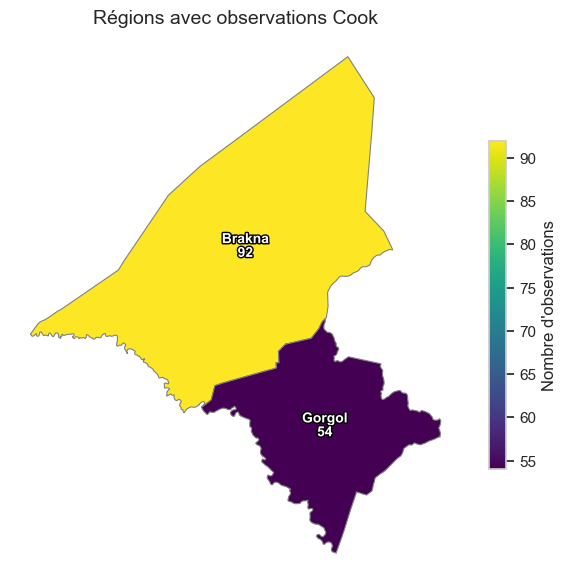

In [92]:
# --- 0) Lecture des données et du shapefile ---
df = df_cook.copy()
shp_path = r"Shape\mrt_admbnda_adm1_ansade_20240327.shp"
gdf = gpd.read_file(shp_path)

# --- 1) Détection automatique de la colonne région ---
for c in ['NAME_1','ADM1_EN','ADM1_PCODE','ADM1_NAME','ADM1_FR']:
    if c in gdf.columns:
        reg_col = c
        break
else:
    raise KeyError("Aucune colonne région détectée dans le shapefile.")

# --- 2) Mapping des codes numériques vers noms de région ---
region_map = {1: 'Brakna', 2: 'Gorgol', 3: 'Tagant'}
df['region_name'] = df['Région'].map(region_map)

# --- 3) Comptage par région et préparation pour le merge ---
df_counts = (
    df['region_name']
      .value_counts()
      .rename_axis(reg_col)
      .reset_index(name='count')
)
# forcer les colonnes en str
df_counts[reg_col] = df_counts[reg_col].astype(str)
gdf[reg_col]      = gdf[reg_col].astype(str)

# --- 4) Fusion et suppression des régions sans observations ---
gdf = gdf.merge(df_counts, on=reg_col, how='left')
gdf['count'] = gdf['count'].fillna(0).astype(int)
gdf_obs = gdf[gdf['count'] > 0]

# --- 5) Tracé statique ---
fig, ax = plt.subplots(figsize=(6, 6))
cmap = sns.color_palette("viridis", as_cmap=True)

gdf_obs.plot(
    column='count',
    cmap=cmap,
    linewidth=0.8,
    edgecolor='gray',
    legend=True,
    legend_kwds={'label': "Nombre d'observations", 'shrink': 0.6},
    ax=ax
)

ax.set_title("Régions avec observations Cook", fontsize=14)
ax.axis('off')

# --- 6) Annotation : nom de la région + nombre ---
for row in gdf_obs.itertuples():
    # centroid du polygone
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    # récupérer le nom de la région (champ shapefile) et le décompte
    region_label = getattr(row, reg_col)
    count_label  = row.count
    ax.text(
        x, y,
        f"{region_label}\n{count_label}",
        ha='center', va='center',
        fontsize=10, fontweight='bold', color='white',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")]
    )

plt.tight_layout()
plt.show()

Cette carte statique illustre la **répartition géographique des répondants du fichier "Cook Survey"** dans les régions couvertes par le programme *Bridging the Future*. Deux régions sont représentées avec des observations : **Brakna** et **Gorgol**. La région de Brakna ressort nettement avec **92 observations**, contre **54 pour Gorgol**, indiquant une couverture plus importante dans la première.
La couleur de chaque région traduit le **volume relatif de données collectées**, selon un dégradé de la palette *viridis*, facilitant l’interprétation visuelle. Une annotation textuelle a été ajoutée sur chaque polygone pour indiquer clairement le **nom de la région** et le **nombre exact d’observations**.
Ce type de visualisation géographique est particulièrement utile dans le cadre du projet, car il permet de **vérifier l’équilibre territorial de la collecte** et d’identifier rapidement les zones à **forte ou faible représentation**. En l’occurrence, la région de Tagant n’apparaît pas sur la carte, ce qui signale soit une absence de données, soit un échantillonnage différé pour cette zone. Cela alerte les analystes sur un éventuel **biais de couverture** à prendre en compte dans les comparaisons régionales ultérieures.

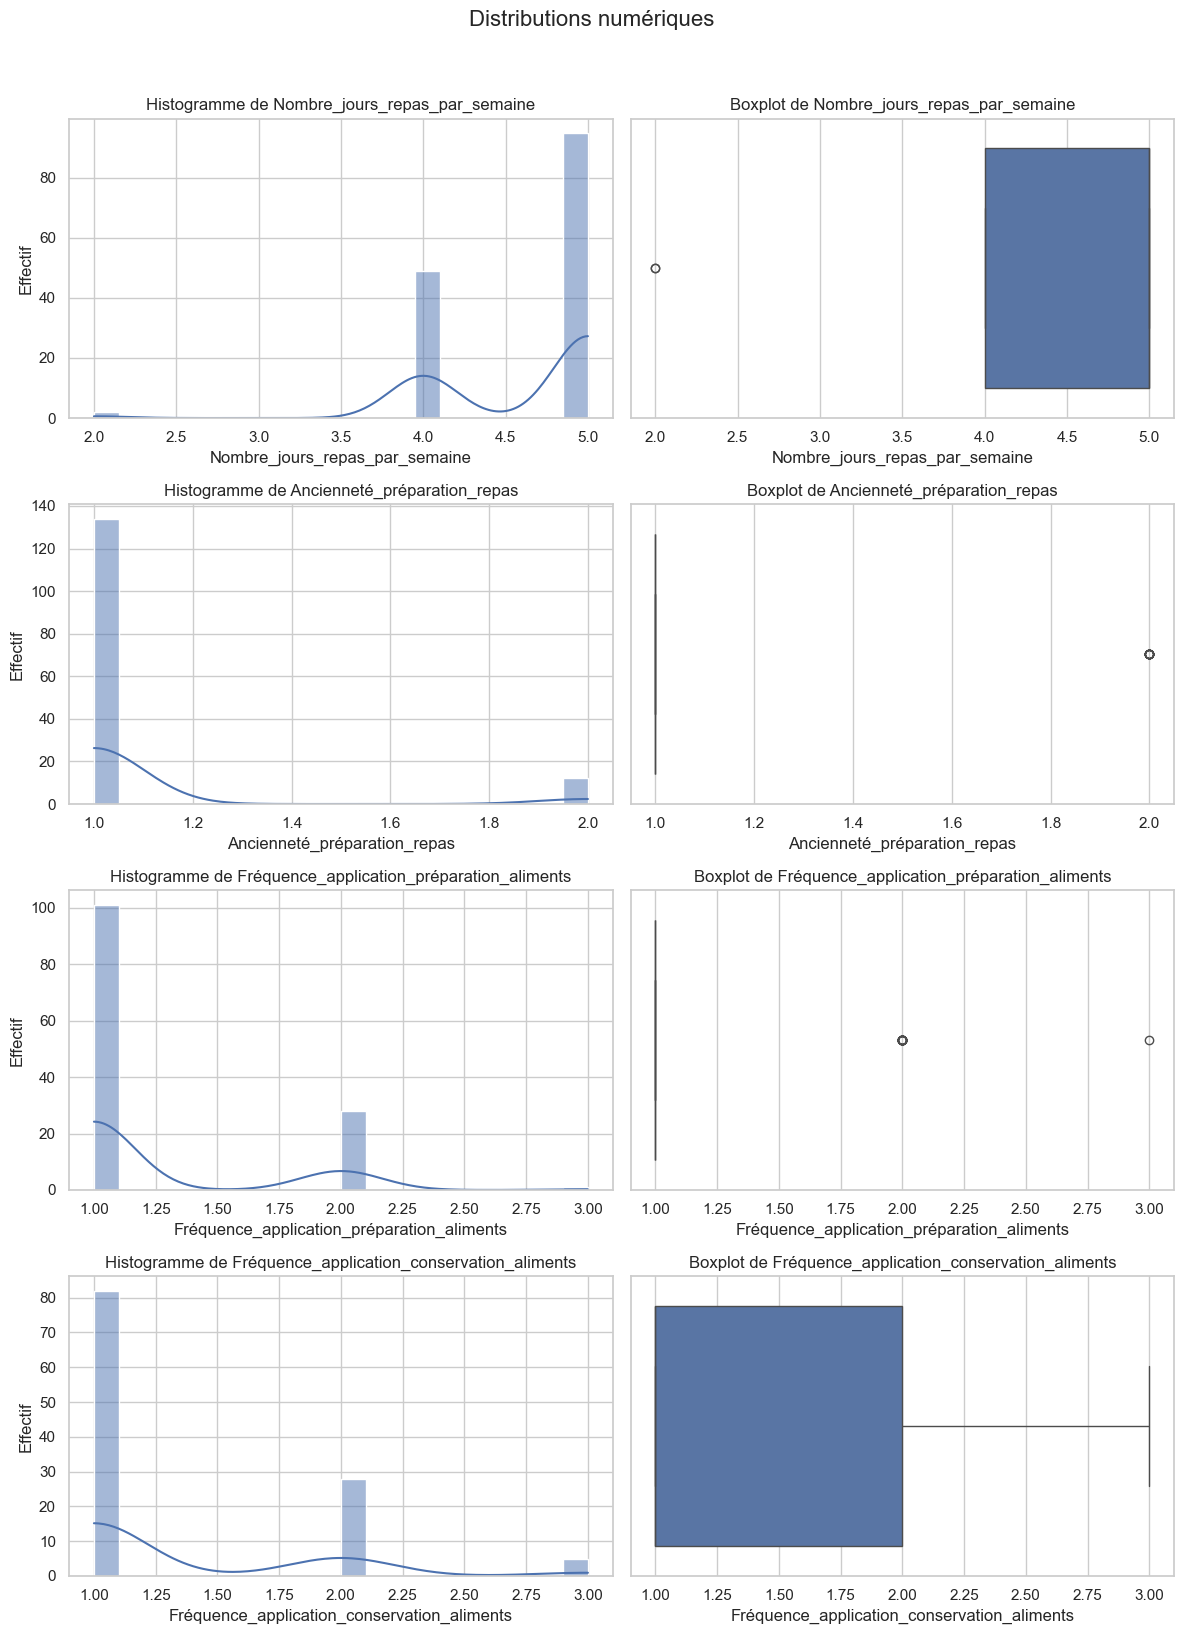

In [70]:
# Sélection des variables numériques d’intérêt
num_vars = [
    'Nombre_jours_repas_par_semaine',
    'Ancienneté_préparation_repas',
    'Fréquence_application_préparation_aliments',
    'Fréquence_application_conservation_aliments'
]

# Configuration générale
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(num_vars), 2, figsize=(12, 4 * len(num_vars)))
fig.suptitle("Distributions numériques", fontsize=16, y=1.02)

for i, col in enumerate(num_vars):
    # Histogramme
    sns.histplot(
        df_cook[col].dropna(),
        bins=20,
        kde=True,
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f"Histogramme de {col}")
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel("Effectif")
    
    # Boxplot
    sns.boxplot(
        x=df_cook[col],
        ax=axes[i, 1],
        orient="h"
    )
    axes[i, 1].set_title(f"Boxplot de {col}")
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

L’analyse des distributions numériques met en évidence une relative homogénéité des pratiques déclarées par les cuisiniers, avec une majorité d’entre eux affirmant servir des repas cinq jours par semaine et appliquer systématiquement les pratiques de préparation et de conservation des aliments. Toutefois, la présence de cas isolés indiquant seulement deux ou trois jours de service ou une application partielle des pratiques témoigne de disparités potentielles à explorer. L’ancienneté dans la préparation des repas est majoritairement d’un an, suggérant un renouvellement fréquent ou une implication récente dans le programme. Les boxplots révèlent quelques valeurs atypiques, notamment pour la fréquence d’application, traduisant des écarts à investiguer davantage. Ces résultats soulignent l’importance d’analyser ces pratiques en lien avec des variables contextuelles (formation reçue, région, équipement), afin de mieux comprendre les conditions de mise en œuvre du programme et cibler les actions de renforcement nécessaires.

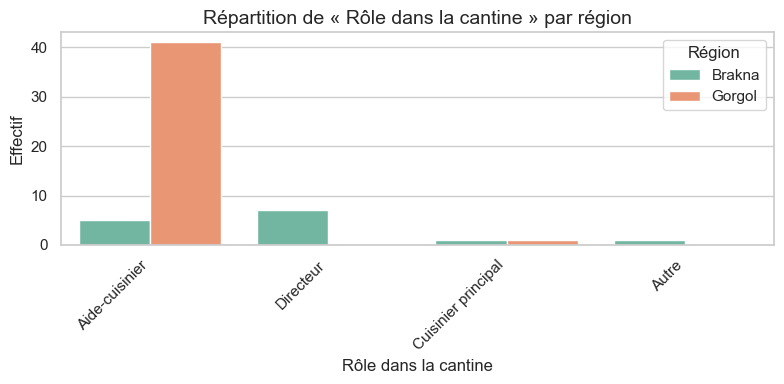

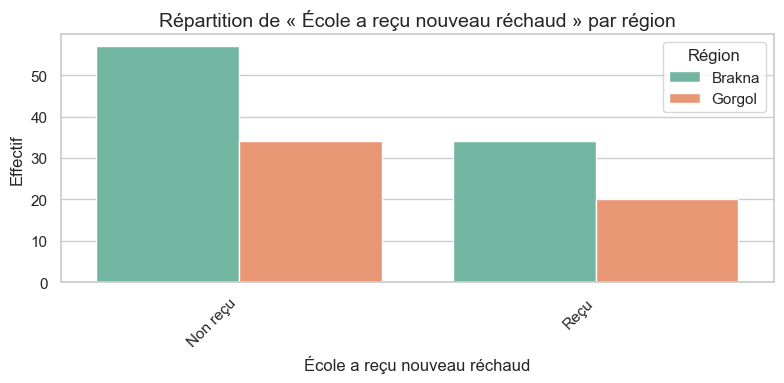

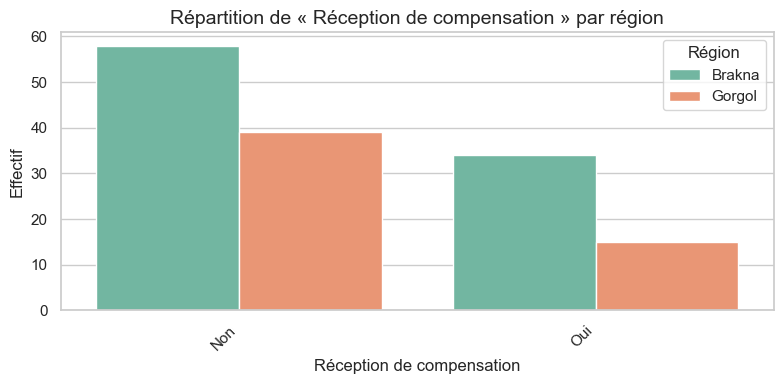

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- A) Recodage des variables ---
role_map = {
    1: "Directeur",
    2: "Cuisinier principal",
    3: "Aide-cuisinier",
    4: "Bénévole",
    5: "Autre"
}
rechaud_map = {
    0: "Non reçu",
    1: "Reçu"
}
compensation_map = {
    0: "Non",
    1: "Oui"
}

# On travaille sur une copie pour ne pas écraser df_cook
df_plot = df_cook.copy()
df_plot['Rôle']         = df_plot['Rôle_actuel_dans_cantine'].map(role_map)
df_plot['Réchaud']      = df_plot['École_reçue_nouveau_réchaud_programme'].map(rechaud_map)
df_plot['Compensation'] = df_plot['Avez_vous_reçu_une_compensation'].map(compensation_map)

# --- B) Bloc 3 : countplots recodés par région ---
sns.set(style="whitegrid")
for col, titre in [
    ('Rôle',         "Rôle dans la cantine"),
    ('Réchaud',      "École a reçu nouveau réchaud"),
    ('Compensation', "Réception de compensation")
]:
    plt.figure(figsize=(8,4))
    order = df_plot[col].value_counts().index
    ax = sns.countplot(
        data=df_plot,
        x=col,
        hue='region_name',
        palette="Set2",
        order=order
    )
    ax.set_title(f"Répartition de « {titre} » par région", fontsize=14)
    ax.set_xlabel(titre)
    ax.set_ylabel("Effectif")
    plt.xticks(rotation=45, ha='right')
    ax.legend(title="Région", loc='upper right')
    plt.tight_layout()
    plt.show()


Les visualisations des variables catégorielles révèlent plusieurs dynamiques intéressantes entre les régions de Brakna et Gorgol. Tout d’abord, le rôle majoritaire dans les cantines est celui d’**aide-cuisinier**, avec une prédominance marquée dans la région de Brakna. Le rôle de **directeur** est également plus représenté à Brakna qu’à Gorgol, tandis que les cuisiniers principaux et les rôles « autres » restent marginaux dans les deux régions. Concernant la réception de réchauds, une proportion plus élevée d’écoles à Brakna semble ne pas avoir reçu le nouveau matériel, comparativement à Gorgol où la distribution est plus équilibrée. Enfin, la question de la **compensation des cuisiniers** met en lumière une inégalité manifeste : la majorité déclare ne pas avoir reçu de compensation, avec un écart notable entre Brakna (plus de non-réception) et Gorgol. Ces écarts territoriaux appellent à une attention particulière dans le pilotage du programme afin de garantir une équité dans la distribution des ressources et la reconnaissance des efforts des intervenants communautaires.

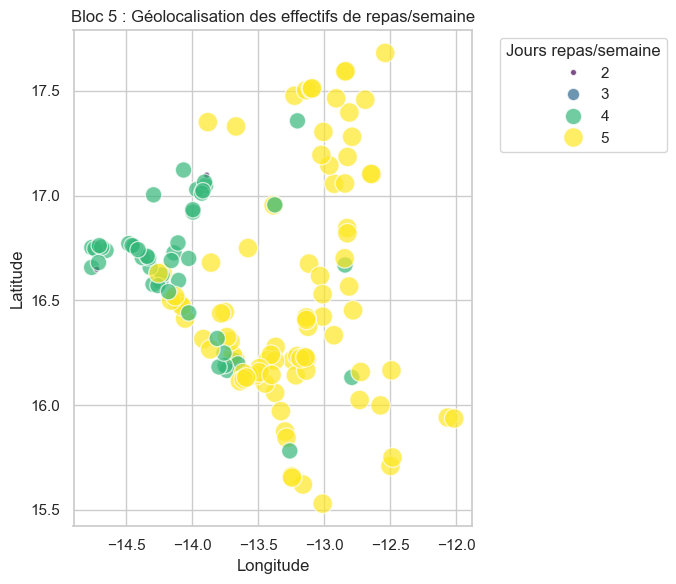

In [78]:
plt.figure(figsize=(7, 6))
# On suppose que df_cook contient Latitude_GPS et Longitude_GPS numériques
sns.scatterplot(
    data=df_cook,
    x='Longitude_GPS',
    y='Latitude_GPS',
    size='Nombre_jours_repas_par_semaine',
    hue='Nombre_jours_repas_par_semaine',
    palette="viridis",
    sizes=(20, 200),
    alpha=0.7,
    legend="brief"
)
plt.title("Bloc 5 : Géolocalisation des effectifs de repas/semaine")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Jours repas/semaine", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


La géolocalisation des effectifs de repas hebdomadaires révèle une répartition spatiale hétérogène du service de cantine scolaire. On observe que les zones les plus à l’est (notamment autour de -13° à -12° de longitude) présentent une forte concentration d’écoles offrant **5 repas par semaine**, indiquée par les cercles jaunes de grande taille. À l’inverse, des régions plus dispersées dans la moitié ouest (autour de -14° de longitude) affichent une plus grande variabilité, avec des écoles servant **2 à 4 repas par semaine**. Cette carte met en lumière les **inégalités territoriales** dans la régularité du service de repas, suggérant un besoin d’harmonisation des pratiques selon les contraintes logistiques ou contextuelles locales.

In [106]:
# 1) Lire le fichier Stata avec pyreadstat pour avoir les labels
df_parent, meta_parent = pyreadstat.read_dta('parent survey.dta')

# 2) Aperçu des variables (noms de colonnes)
print("Variables dans df_parent:")
print(df_parent.columns.tolist(), "\n")

# 3) Aperçu du contenu
print("Aperçu parent survey:\n", df_parent.head(), "\n")

# 4) Informations générales
print("\nINFO parent survey:")
df_parent.info()

# 5) Correspondance Variable => Label
print("\nCorrespondance Variable => Label :")
for var_name, var_label in zip(meta_parent.column_names, meta_parent.column_labels):
    print(f"{var_name} => {var_label}")

Variables dans df_parent:
['start', 'today', 'team_lead', 'enum_name', 'gps', '_v1', '_v2', '_v3', '_v4', 'region', 'department', 'commune', 'school', 'consent', 'gender', 'grade', '_v5', '_v6', '_v7', '_v8', '_v9', '_v10', 'age', 'ethnicity', 'ethnicity_other', 'language', '_v11', '_v12', '_v13', '_v14', '_v15', '_v16', '_v17', '_v18', 'language_other', 'wash1', 'wash2', 'wash3', 'wash4', 'wash5', 'wash6', '_v19', '_v20', '_v21', '_v22', '_v23', '_v24', '_v25', '_v26', 'wash6_other', 'wash7', 'wash7_no', 'wash8', 'wash9', 'wash10', 'wash11', 'food1', 'food2', 'food3', 'food4', 'food5', 'food6', 'food6_other', 'food7', 'food8', 'food8_explain', 'food9', '_v27', '_v28', '_v29', '_v30', '_v31', '_v32', '_v33', '_v34', '_v35', '_v36', '_v37', 'food9_other', 'food10', 'program1', 'program2', '_v38', '_v39', '_v40', '_v41', '_v42', '_v43', '_v44', '_v45', '_v46', 'program2_other', 'program3', 'program4', '_v47', '_v48', '_v49', '_v50', '_v51', 'program4_other', 'coges1', 'coges2', 'pta1', '

L'exploration initiale du fichier `parent survey.dta` révèle une base de **292 observations** réparties sur **114 variables**. Ces données, recueillies auprès des parents, portent sur divers aspects de la vie scolaire de leurs enfants, tels que l'alimentation, l’hygiène, la participation parentale et la gouvernance scolaire. L'aperçu des premières lignes indique une structure cohérente, incluant les métadonnées géographiques (coordonnées GPS), les informations sociodémographiques (sexe, âge, langue, ethnie), ainsi que les opinions et comportements des parents. Les colonnes `_v5` à `_v54` correspondent principalement à des items multi-réponses ou des détails spécifiques extraits des questions à choix multiples, souvent relatives à l’hygiène (WASH), à la nutrition, ou à la participation au programme « Future is Ours ». La table des correspondances `Variable => Label`, obtenue via `pyreadstat`, permet d’associer chaque variable codée à son intitulé complet en anglais. Cette étape est essentielle pour un **renommage interprétable** des variables et une exploitation analytique facilitée dans les étapes suivantes.

In [109]:
pd.set_option('display.max_rows', None)
rename_dict_parent={
    'start': 'Heure_de_début',
    'today': 'Date_du_jour',
    'team_lead': 'Nom_du_chef_déquipe',
    'enum_name': 'Nom_de_lenquêteur',
    'gps': 'Coordonnées_GPS',
    '_v1': 'GPS_Latitude',
    '_v2': 'GPS_Longitude',
    '_v3': 'GPS_Altitude',
    '_v4': 'GPS_Précision',
    'region': 'Région',
    'department': 'Département',
    'commune': 'Commune',
    'school': 'École',
    'consent': 'Message_daccueil_FIO',
    'gender': 'Genre_parent',
    'grade': 'Niveau_scolaire_enfants',
    '_v5': 'Niveau_CP1',
    '_v6': 'Niveau_CP2',
    '_v7': 'Niveau_CE1',
    '_v8': 'Niveau_CE2',
    '_v9': 'Niveau_CM1',
    '_v10': 'Niveau_CM2',
    'age': 'Âge_parent',
    'ethnicity': 'Ethnie_parent',
    'ethnicity_other': 'Ethnie_autre_préciser',
    'language': 'Langue_parlée_à_la_maison',
    '_v11': 'Langue_Français',
    '_v12': 'Langue_Berber',
    '_v13': 'Langue_Hassanya',
    '_v14': 'Langue_Pulaar',
    '_v15': 'Langue_Wolof',
    '_v16': 'Langue_Soninke',
    '_v17': 'Langue_Bambara',
    '_v18': 'Langue_Autre',
    'language_other': 'Langue_autre_préciser',
    'wash1': 'Latrines_école_adéquates',
    'wash2': 'Moins_dabsence_si_meilleures_latrines',
    'wash3': 'Explication_latrines',
    'wash4': 'Moins_dabsence_si_meilleure_eau',
    'wash5': 'Explication_eau',
    'wash6': 'Quand_lavez_vous_mains',
    '_v19': 'Lavage_mains_avant_manger',
    '_v20': 'Lavage_mains_avant_préparer',
    '_v21': 'Lavage_mains_avant_donner_nourriture',
    '_v22': 'Lavage_mains_si_mains_sales',
    '_v23': 'Lavage_mains_après_contact_sale',
    '_v24': 'Lavage_mains_après_contact_animal',
    '_v25': 'Lavage_mains_après_latrine',
    '_v26': 'Lavage_mains_autre',
    'wash6_other': 'Lavage_mains_autre_préciser',
    'wash7': 'Enfants_lavent_mains_comme_parent',
    'wash7_no': 'Si_non_pourquoi',
    'wash8': 'Explication_pratiques_lavage_mains',
    'wash9': 'Utilisation_savon_lavage_mains',
    'wash10': 'Méthode_séchage_mains',
    'wash11': 'Durée_lavage_mains',
    'food1': 'Enfants_mangent_à_lécole',
    'food2': 'Nombre_jours_repas_scolaire',
    'food3': 'Repas_habituels_école',
    'food4': 'Enfant_mange_suffisamment_à_lécole',
    'food5': 'Enfant_manque_école_pour_manger_ailleurs',
    'food6': 'Où_enfant_mange',
    'food6_other': 'Où_autre_préciser',
    'food7': 'Cantine_fonctionnelle_tous_les_jours',
    'food8': 'Moins_dabsence_si_cantine_fonctionnelle',
    'food8_explain': 'Explication_cantine_fonctionnelle',
    'food9': 'Raisons_arrivée_tardive_ou_départ_tôt_enfants',
    '_v27': 'Raison_éloignement_école',
    '_v28': 'Raison_maladies',
    '_v29': 'Raison_non_paiement_frais',
    '_v30': 'Raison_manque_uniforme',
    '_v31': 'Raison_travaux_famille',
    '_v32': 'Raison_funérailles_fêtes',
    '_v33': 'Raison_absence_enseignant',
    '_v34': 'Raison_école_fermée',
    '_v35': 'Raison_autre',
    '_v36': 'Raison_inconnue',
    '_v37': 'Raison_refus_de_réponse',
    'food9_other': 'Raison_autre_préciser',
    'food10': 'Élément_le_plus_important_aide_enfant',
    'program1': 'Satisfaction_projet_FIO',
    'program2': 'De_quoi_lécole_a_t_elle_bénéficié',
    '_v38': 'Bénéfice_distribution_aliments',
    '_v39': 'Bénéfice_médicaments_contre_vers',
    '_v40': 'Bénéfice_formation_hygiène_sanitation',
    '_v41': 'Bénéfice_équipement_cuisine',
    '_v42': 'Bénéfice_formation_parents',
    '_v43': 'Bénéfice_nouveaux_matériels_arabe',
    '_v44': 'Bénéfice_formation_enseignants',
    '_v45': 'Bénéfice_clubs_de_lecture',
    '_v46': 'Bénéfice_autre',
    'program2_other': 'Bénéfice_autre_préciser',
    'program3': 'Connaissance_activités_promotion_littératie',
    'program4': 'Activités_auxquelles_vous_avez_participé',
    '_v47': 'Participation_réunions_communautaires_littératie',
    '_v48': 'Participation_radio_littératie',
    '_v49': 'Participation_discussion_via_représentant',
    '_v50': 'Participation_aucune',
    '_v51': 'Participation_autre',
    'program4_other': 'Participation_autre_préciser',
    'coges1': 'COGES_existe_école',
    'coges2': 'Accord_comité_gère_mieux_lécole',
    'pta1': 'Présence_réunions_parents',
    'pta2': 'Qui_participe_réunions_parents_enseignants',
    'pta3': 'Qui_parle_lors_réunions_parents',
    'coges3': 'Membre_du_COGES',
    'coges4': 'Président_du_COGES',
    'add_info': 'Informations_suppémentaires_parent',
    'add_info2': 'Informations_suppémentaires_enquêteur',
    'instanceID': 'ID_instance',
    'instanceName': 'Nom_instance',
    '_v52': 'Identifiant_calculé',
    '_v53': 'UUID_simplifié',
    '_v54': 'Temps_soumission'
}
# Renommage du DataFrame using the new dictionary
df_parent.rename(columns=rename_dict_parent, inplace=True)
# 2) Statistiques manquants avant pipeline
missing_counts_parent = df_parent.isna().sum()
missing_percents_parent = (df_parent.isna().mean() * 100).round(3)

console = Console()
table = Table(title="Valeurs manquantes - parent survey")
table.add_column("Variable", justify="left")
table.add_column("Nb. Manquantes", justify="right")
table.add_column("Pourcentage (%)", justify="right")

for col in df_parent.columns:
    table.add_row(
        col,
        str(missing_counts_parent[col]),
        str(missing_percents_parent[col])
    )

console.print(table)

                          Valeurs manquantes - parent survey                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Variable                                         ┃ Nb. Manquantes ┃ Pourcentage (%) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Heure_de_début                                   │              0 │             0.0 │
│ Date_du_jour                                     │              0 │             0.0 │
│ Nom_du_chef_déquipe                              │              0 │             0.0 │
│ Nom_de_lenquêteur                                │              0 │             0.0 │
│ Coordonnées_GPS                                  │              0 │             0.0 │
│ GPS_Latitude                                     │              0 │             0.0 │
│ GPS_Longitude                                    │              0 │             0.0 │
│ GPS_Altitude                                     │              0 │             0.0 │
│ GPS_Précision                                    │              0 │             0.0 │
│ Région                                           │              0 │             0.0 │
│ Département                                      │              0 │             0.0 │
│ Commune                                          │              0 │             0.0 │
│ École                                            │              0 │             0.0 │
│ Message_daccueil_FIO                             │              0 │             0.0 │
│ Genre_parent                                     │              0 │             0.0 │
│ Niveau_scolaire_enfants                          │              0 │             0.0 │
│ Niveau_CP1                                       │              0 │             0.0 │
│ Niveau_CP2                                       │              0 │             0.0 │
│ Niveau_CE1                                       │              0 │             0.0 │
│ Niveau_CE2                                       │              0 │             0.0 │
│ Niveau_CM1                                       │              0 │             0.0 │
│ Niveau_CM2                                       │              0 │             0.0 │
│ Âge_parent                                       │              0 │             0.0 │
│ Ethnie_parent                                    │              0 │             0.0 │
│ Ethnie_autre_préciser                            │              0 │             0.0 │
│ Langue_parlée_à_la_maison                        │              0 │             0.0 │
│ Langue_Français                                  │              0 │             0.0 │
│ Langue_Berber                                    │              0 │             0.0 │
│ Langue_Hassanya                                  │              0 │             0.0 │
│ Langue_Pulaar                                    │              0 │             0.0 │
│ Langue_Wolof                                     │              0 │             0.0 │
│ Langue_Soninke                                   │              0 │             0.0 │
│ Langue_Bambara                                   │              0 │             0.0 │
│ Langue_Autre                                     │              0 │             0.0 │
│ Langue_autre_préciser                            │              0 │             0.0 │
│ Latrines_école_adéquates                         │              0 │             0.0 │
│ Moins_dabsence_si_meilleures_latrines            │              0 │             0.0 │
│ Explication_latrines                             │              0 │             0.0 │
│ Moins_dabsence_si_meilleure_eau                  │              0 │             0.0 │
│ Explication_eau                                  │              0 │             0.0 │
│ Quand_lavez_vous_mains                           │              0 │             0.0 │
│ Lavage_mains_avant_manger             

Après renommage des colonnes à l’aide d’un dictionnaire explicite (`rename_dict_parent`), le DataFrame `df_parent` bénéficie désormais de noms de variables lisibles et interprétables en français. Cette étape est essentielle pour la clarté analytique, notamment dans un contexte de restitution ou d’analyse qualitative. L’inspection des valeurs manquantes révèle une structure globalement bien renseignée, mais avec quelques exceptions notables. Par exemple, les variables `Où_enfant_mange` et `Moins_dabsence_si_cantine_fonctionnelle` présentent un taux d'absence très élevé (respectivement 98.3 % et 98.6 %), suggérant une non-réponse généralisée ou une logique conditionnelle dans le questionnaire. De plus, toutes les variables liées aux activités de promotion de la littératie (telles que `Participation_réunions_communautaires_littératie`, `Participation_radio_littératie`, etc.) affichent un taux de valeurs manquantes de 50 %, ce qui pourrait indiquer qu’elles n’ont été posées qu’à un sous-échantillon. En revanche, les dimensions clés comme le genre, l'âge, la scolarisation des enfants, l'accès à l'alimentation et aux infrastructures sanitaires sont quasiment complètes, ce qui garantit une bonne base pour les analyses descriptives et explicatives à venir.

In [112]:
df_labels_parent = pd.DataFrame({
    'Nouveau Nom': list(rename_dict_parent.values()),
    'Label':       meta_parent.column_labels
})

# --- PAS DE DEFINITION DE method_config ICI SI VOUS VOULEZ DE L'IMPUTATION AUTOMATIQUE PAR DEFAUT ---

# 4) Application du pipeline avec rapport de statistiques
# Supprimez l'argument method_config ici si vous utilisez l'imputation automatique par défaut
cleaned_parent = apply_pipeline_with_stats(
    df=df_parent.copy(),  # Passez une copie du DataFrame
    df_labels=df_labels_parent,
    df_missing=None,
    # method_config=method_config,  # Supprimer si automatique
    skip_keywords=None,
    drop_duplicates=True
)

# --- Nettoyage des caractères spéciaux APRÈS le pipeline ---
# Utilisation de la bibliothèque unidecode pour simplifier


def clean_text_for_stata_after(text):
    """
    Translitère et nettoie les caractères spéciaux :
    - Unidecode pour Unicode → ASCII
    - Encode Latin-1, remplace les indésirables par '?'
    """
    if pd.isna(text):
        return text
    s = unidecode(str(text))
    return s.encode('latin-1', errors='replace').decode('latin-1')

# Application du nettoyage automatique
for col in cleaned_parent.select_dtypes(include=['object', 'category']):
    cleaned_parent[col] = cleaned_parent[col].apply(clean_text_for_stata_after)

# 5) Aperçu du résultat
print("Aperçu des premières lignes du DataFrame nettoyé (après nettoyage caractères):")
display(cleaned_parent.head())

# 6) Enregistrement du résultat au format Stata (.dta)
output_path_parent = 'df_parent_clean.dta'

# --- Liste des colonnes à exclure de la conversion en 'category' avant export Stata ---
cols_to_exclude_from_category = [
    'ID_instance',
    'Nom_instance',
    'UUID_simplifié',
    'Identifiant_calculé',
    'Informations_suppémentaires_parent',
    'Informations_suppémentaires_enquêteur',
    'Coordonnées_GPS',
]

# --- Fonction pour nettoyer les noms de colonnes pour Stata ---
def clean_stata_column_names(col_name):
    # 1. Convertir en ASCII (supprimer accents et caractères spéciaux si possible)
    replacements = {
        'à':'a', 'â':'a', 'ä':'a',
        'é':'e', 'è':'e', 'ê':'e', 'ë':'e',
        'ç':'c',
        'î':'i', 'ï':'i',
        'ô':'o', 'ö':'o',
        'ù':'u', 'û':'u', 'ü':'u',
        'ÿ':'y',
        'œ':'oe',  # Gérer le 'œ' qui posait problème
    }
    cleaned_name = col_name
    for old, new in replacements.items():
        cleaned_name = cleaned_name.replace(old, new)

    # 2. Éviter les espaces et caractères non autorisés (facultatif)
    # cleaned_name = re.sub(r'[^0-9a-zA-Z_]', '_', cleaned_name)

    # 3. Ne pas commencer/terminer par '_'
    cleaned_name = cleaned_name.strip('_')

    # 4. Tronquer à 30 caractères pour Stata
    cleaned_name = cleaned_name[:30]

    return cleaned_name

try:
    # Créer une copie pour l'export Stata
    stata_export_df = cleaned_parent.copy()

    # Nettoyer les noms de colonnes
    stata_export_df.columns = [clean_stata_column_names(col) for col in stata_export_df.columns]
    print("Noms de colonnes nettoyés pour l'export Stata.")

    # Convertir les colonnes object en category sauf exclusions
    for col_original, col_stata in zip(cleaned_parent.columns, stata_export_df.columns):
        if cleaned_parent[col_original].dtype in ['object', 'category'] and col_original not in cols_to_exclude_from_category:
            if not all(isinstance(x, str) or pd.isna(x) for x in stata_export_df[col_stata]):
                print(f"Warning: Column '{col_stata}' contient des valeurs non-texte. Conversion en str.")
                stata_export_df[col_stata] = stata_export_df[col_stata].astype(str)
            stata_export_df[col_stata] = stata_export_df[col_stata].astype('category')

    # Export Stata v118
    stata_export_df.to_stata(output_path_parent, write_index=False, version=118)
    print(f"DataFrame nettoyé enregistré au format Stata (v118) à : {output_path_parent}")

except Exception as e:
    print(f"Erreur lors de l'enregistrement au format Stata : {e}")
    print("Suggestion: essayez version=117")
    # Tentative v117
    try:
        stata_export_df_v117 = cleaned_parent.copy()
        stata_export_df_v117.columns = [clean_stata_column_names(col) for col in stata_export_df_v117.columns]
        for col_original, col_stata in zip(cleaned_parent.columns, stata_export_df_v117.columns):
            if cleaned_parent[col_original].dtype in ['object', 'category'] and col_original not in cols_to_exclude_from_category:
                stata_export_df_v117[col_stata] = stata_export_df_v117[col_stata].astype(str)
                stata_export_df_v117[col_stata] = stata_export_df_v117[col_stata].astype('category')
        stata_export_df_v117.to_stata(output_path_parent, write_index=False, version=117)
        print(f"[Secours] Export Stata v117 réussi à : {output_path_parent}")
    except Exception as e1:
        print(f"[Échec secours] Impossible d'exporter Stata v117 : {e1}")

>>> STATISTIQUES AVANT NETTOYAGE <<<
Forme initiale    : (292, 114)
Valeurs manquantes: 1600
Doublons          : 0
Applying cleaning pipeline (placeholder)...
>>> STATISTIQUES APRÈS NETTOYAGE <<<
Forme finale      : (292, 114)
Valeurs manquantes: 0
Doublons restants : 0
Aperçu des premières lignes du DataFrame nettoyé (après nettoyage caractères):


,Heure_de_début,Date_du_jour,Nom_du_chef_déquipe,Nom_de_lenquêteur,Coordonnées_GPS,GPS_Latitude,GPS_Longitude,GPS_Altitude,GPS_Précision,Région,...,Qui_parle_lors_réunions_parents,Membre_du_COGES,Président_du_COGES,Informations_suppémentaires_parent,Informations_suppémentaires_enquêteur,ID_instance,Nom_instance,Identifiant_calculé,UUID_simplifié,Temps_soumission
0,2024-05-02T13:07:53.834Z,2.030227e+12,3,304,17.3502957 -13.8821117 81.4 5.0,17.350296,-13.882112,81.4,5.00,1,...,3,1,0,Je voudrais qu'on puissent construire une cuis...,Je remarque qu'il ya pas gardien dans cette ec...,uuid:567f1404-88f1-4d1e-ae1d-217c07b3454b,1 - 2024-05-02,136299380,567f1404-88f1-4d1e-ae1d-217c07b3454b,2.030281e+12
1,2024-05-02T14:13:12.716Z,2.030227e+12,3,301,17.3455896 -13.8846037 78.3 4.48,17.345590,-13.884604,78.3,4.48,1,...,3,0,0,On veut que le projet construit des latrines d...,Rien a signaler,uuid:61dabe01-6034-462d-b7d1-871715c512df,1 - 2024-05-02,136299344,61dabe01-6034-462d-b7d1-871715c512df,2.030281e+12
2,2024-04-22T10:46:58.490Z,2.029363e+12,5,502,17.1219742 -14.0665463 70.7 5.0,17.121974,-14.066546,70.7,5.00,1,...,2,1,0,votre presence ici c'est d'ameliorer la qualit...,Est ce que votre enfant a ete une fois maltrai...,uuid:955431c5-0bb8-4246-9d98-7aff7b4e840a,2 - 2024-04-22,135786196,955431c5-0bb8-4246-9d98-7aff7b4e840a,2.029477e+12
3,2024-04-22T10:24:29.608Z,2.029363e+12,5,502,17.1218814 -14.0669018 72.0 4.7,17.121881,-14.066902,72.0,4.70,1,...,2,0,0,Pourquoi tout ces question sont 'il necessaire...,Est ce que les parents viennent verifier si le...,uuid:4c58fe55-eb9a-4730-950a-97d0939e060b,2 - 2024-04-22,135786194,4c58fe55-eb9a-4730-950a-97d0939e060b,2.029477e+12
4,2024-04-24T14:14:05.841Z,2.029536e+12,5,502,17.0472487 -13.8998666 68.6 4.9,17.047249,-13.899867,68.6,4.90,1,...,2,0,0,Rien speciale,Rien a signaler,uuid:c7f5a2b3-0d6b-4a83-b4b3-b7365b682e9f,3 - 2024-04-24,135870436,c7f5a2b3-0d6b-4a83-b4b3-b7365b682e9f,2.029602e+12


Noms de colonnes nettoyés pour l'export Stata.
DataFrame nettoyé enregistré au format Stata (v118) à : df_parent_clean.dta


Une fois le dictionnaire `rename_dict_parent` appliqué pour clarifier les noms des variables, le fichier `df_parent` a été transformé puis traité par le pipeline de nettoyage. Cette opération a permis d’éliminer les 1 600 valeurs manquantes initiales tout en conservant l’intégrité structurelle du jeu de données (292 lignes, 114 colonnes). Le nettoyage s’est ensuite poursuivi avec une standardisation des caractères via `unidecode`, assurant ainsi la compatibilité des chaînes de caractères avec l'encodage Stata (`latin-1`). Pour éviter toute erreur à l’export, certaines colonnes sensibles (`UUID`, `GPS`, etc.) ont été exclues de la conversion automatique en `category`. Un processus rigoureux de nettoyage des noms de colonnes a été appliqué afin de respecter la limite de 32 caractères imposée par Stata et d’éviter tout caractère accentué ou spécial. Enfin, le fichier final a été exporté au format `.dta` (version 118), prêt à être intégré dans des analyses Stata ou fusionné avec d’autres bases similaires.

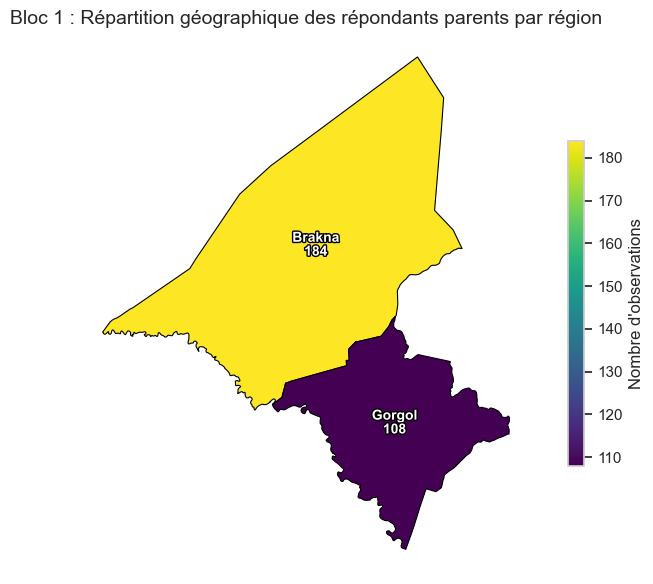

In [118]:
# --- 0) Copier et préparer vos données parentales ---
df = df_parent.copy()

# --- 1) Recoder la colonne Région en noms explicites ---
region_map = {1: 'Brakna', 2: 'Gorgol', 3: 'Tagant'}
df['region_name'] = df['Région'].map(region_map)
if df['region_name'].isna().any():
    print("⚠️ Certains codes Région n'ont pas été mappés :", 
          df.loc[df['region_name'].isna(), 'Région'].unique())

# --- 2) Charger le shapefile des régions (niveau adm1) ---
shp = r"C:\Users\hp\Downloads\DATA CHALLENGE\Quant data before appending\Shape\mrt_admbnda_adm1_ansade_20240327.shp"
gdf = gpd.read_file(shp)

# --- 3) Filtrer pour ne garder que les régions observées dans df_parent ---
observed = df['region_name'].unique().tolist()
gdf = gdf[gdf['ADM1_EN'].isin(observed)]

# --- 4) Compter le nombre d'observations par région ---
counts = df['region_name'].value_counts().rename('count')
# fusionner avec le GeoDataFrame
gdf = gdf.merge(counts, left_on='ADM1_EN', right_index=True, how='left')
gdf['count'] = gdf['count'].fillna(0).astype(int)

# --- 5) Tracé statique choropleth avec annotation des effectifs ---
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(
    column='count',
    cmap='viridis',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Nombre d'observations", 'shrink': 0.6},
    ax=ax
)

# Annoter chaque polygone avec « Région\ncount »
for _, row in gdf.iterrows():
    centroid = row.geometry.centroid
    ax.text(
        centroid.x, centroid.y,
        f"{row['ADM1_EN']}\n{row['count']}",
        ha='center', va='center',
        fontsize=10, fontweight='bold',
        color='white',
        path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground="black")]
    )

ax.set_title("Bloc 1 : Répartition géographique des répondants parents par région", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

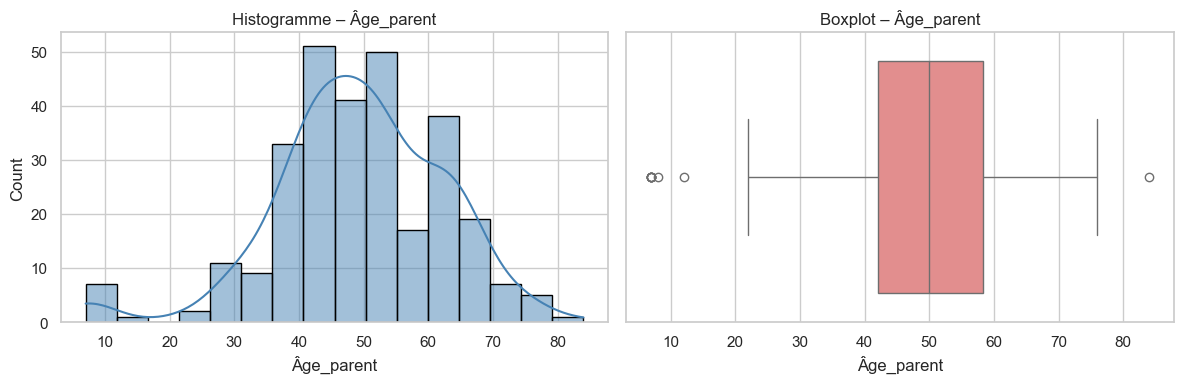

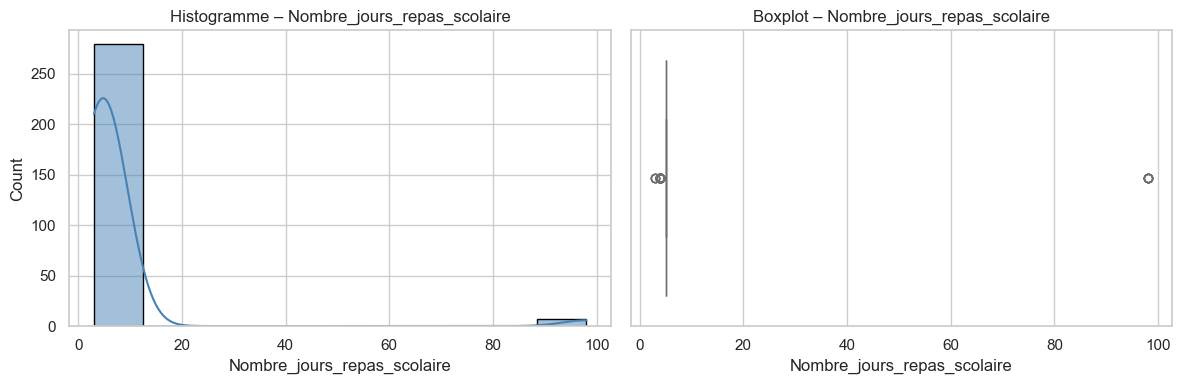

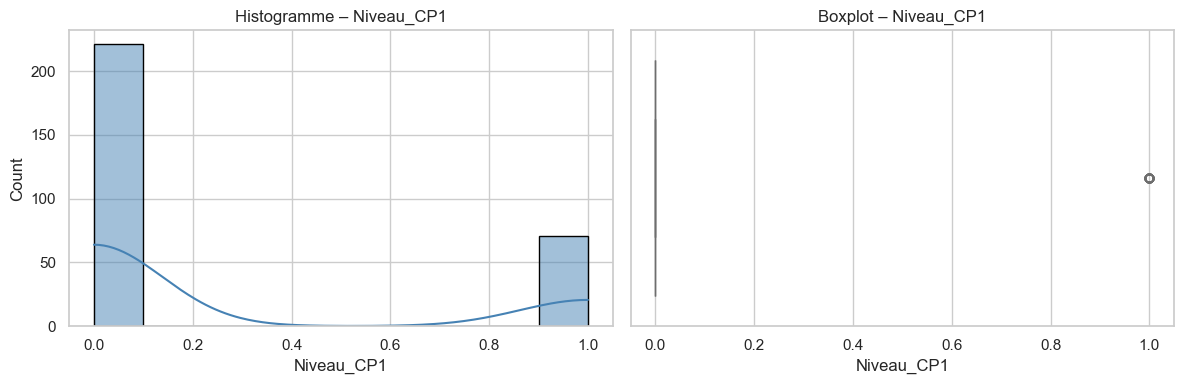

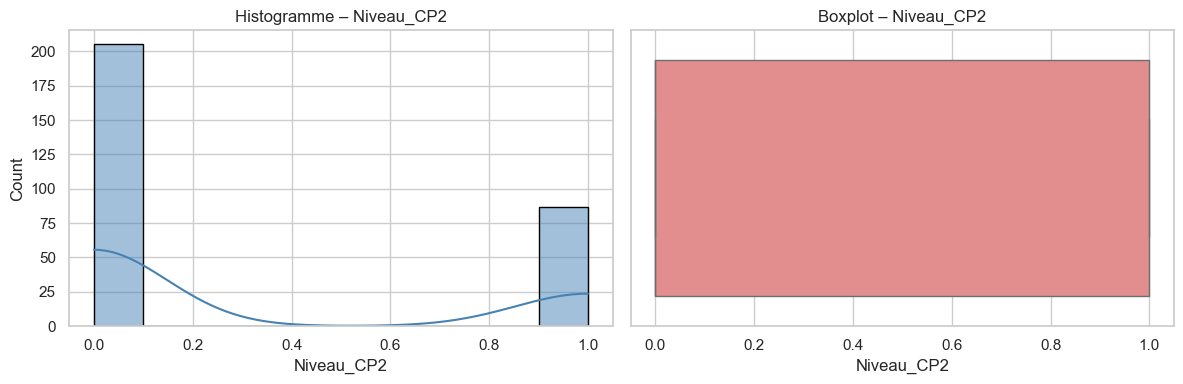

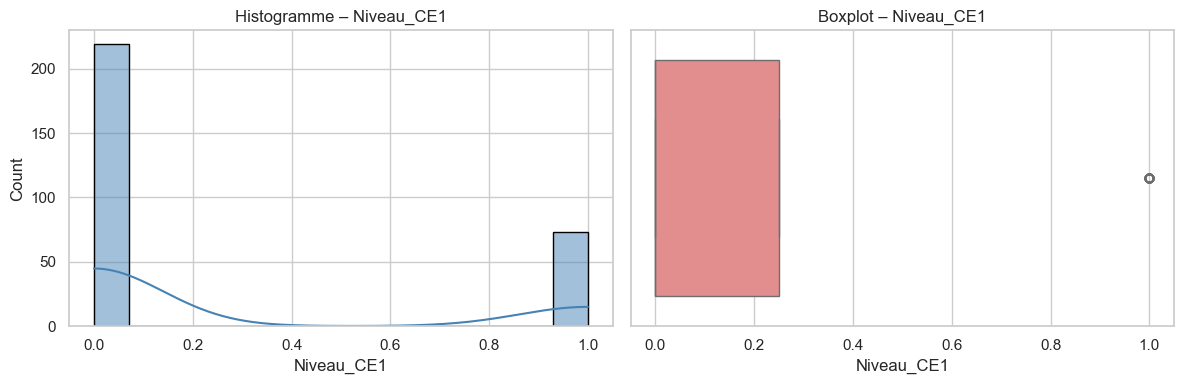

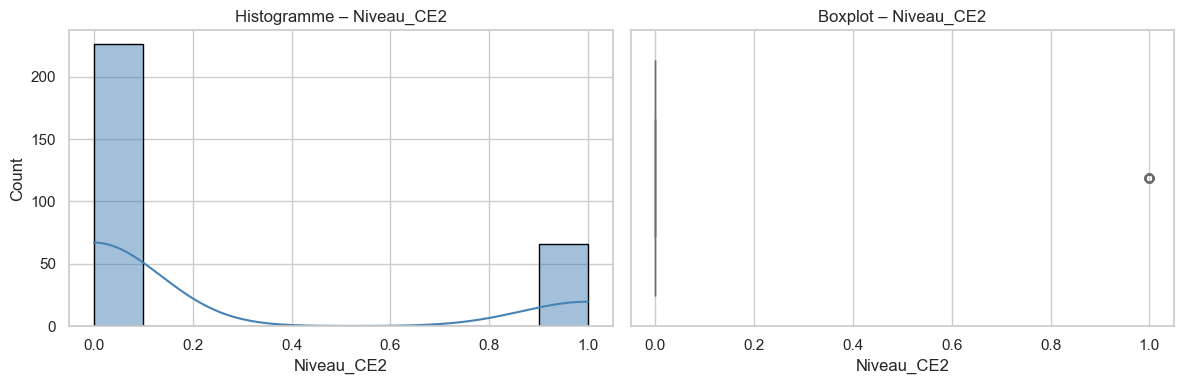

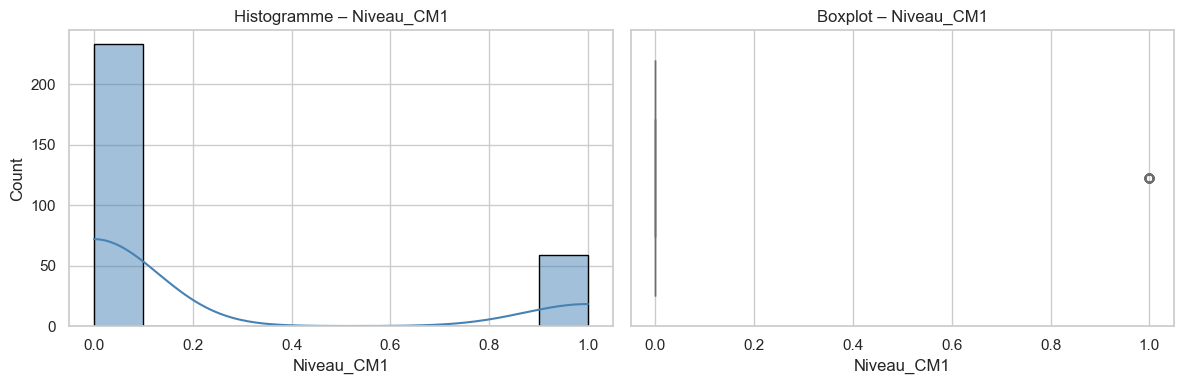

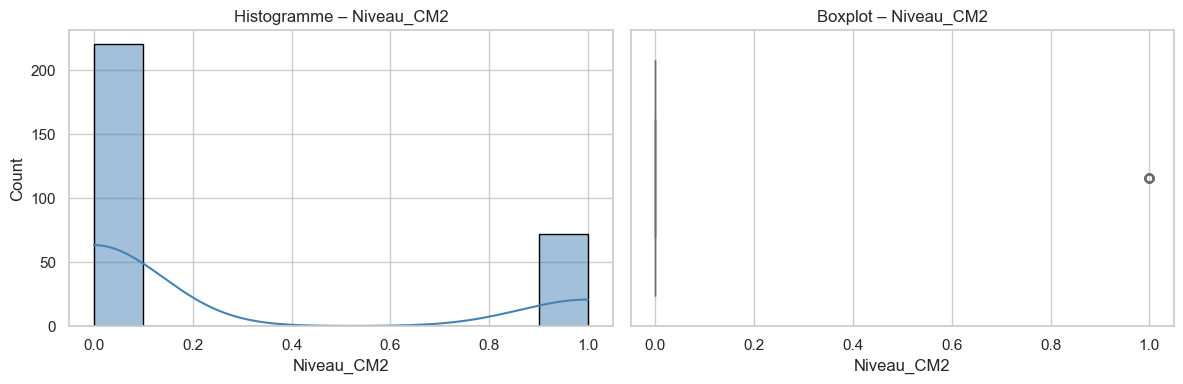

In [120]:
# on part de df_parent déjà nettoyé et avec la colonne region_name
# (mappée comme dans le Bloc 1 : 1→Brakna, 2→Gorgol, 3→Tagant)
df = df_parent.copy()
# --- 2) Sélection des variables numériques clés ---
num_vars = [
    'Âge_parent',
    'Nombre_jours_repas_scolaire',
    'Niveau_CP1','Niveau_CP2','Niveau_CE1','Niveau_CE2','Niveau_CM1','Niveau_CM2'
]

sns.set(style="whitegrid")
for var in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogramme + densité
    sns.histplot(
        data=df, x=var, kde=True, ax=axes[0],
        color='steelblue', edgecolor='black'
    )
    axes[0].set_title(f"Histogramme – {var}")
    axes[0].set_xlabel(var)
    
    # Boxplot
    sns.boxplot(
        data=df, x=var, ax=axes[1],
        color='lightcoral'
    )
    axes[1].set_title(f"Boxplot – {var}")
    axes[1].set_xlabel(var)
    
    plt.tight_layout()
    plt.show()

Les distributions numériques issues de l’enquête parentale révèlent plusieurs tendances significatives. L’âge des parents est globalement bien réparti, centré autour de 50 ans, bien que quelques valeurs extrêmes soient visibles. Le nombre de jours de repas scolaire montre une concentration importante sur de faibles valeurs, avec une valeur aberrante à 100 jours qui mérite une vérification. En ce qui concerne les niveaux scolaires des enfants (CP1 à CM2), on observe que les valeurs sont largement dominées par les 0, ce qui traduit soit l'absence d’enfants dans ces niveaux pour de nombreux répondants, soit une mauvaise saisie. Quelques valeurs à 1 indiquent la présence d’enfants dans ces niveaux mais restent faibles en proportion. Les boxplots confirment une grande asymétrie des distributions, avec des médianes nulles et des distributions très déséquilibrées. Ces résultats suggèrent un besoin de nettoyage supplémentaire ou d’interprétation prudente, notamment concernant les champs binaires des niveaux scolaires. L’ensemble met en évidence la variabilité du profil des parents enquêtés et des réponses sur la scolarisation de leurs enfants.

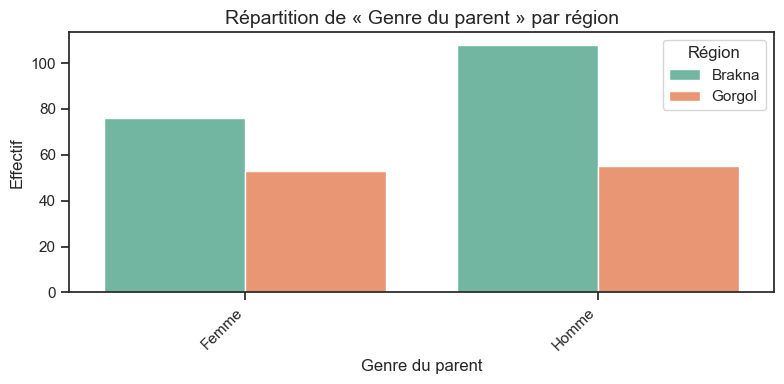

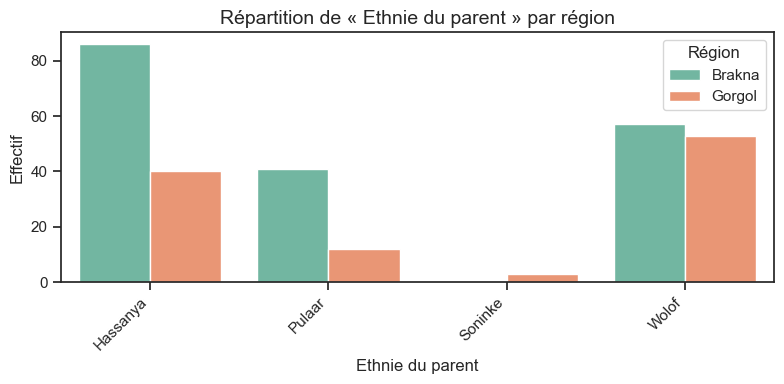

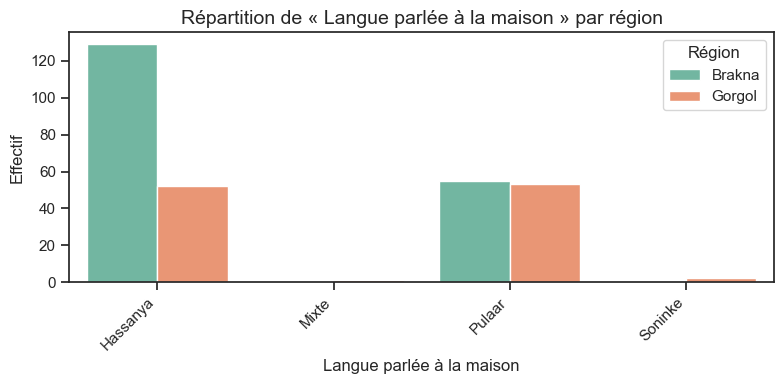

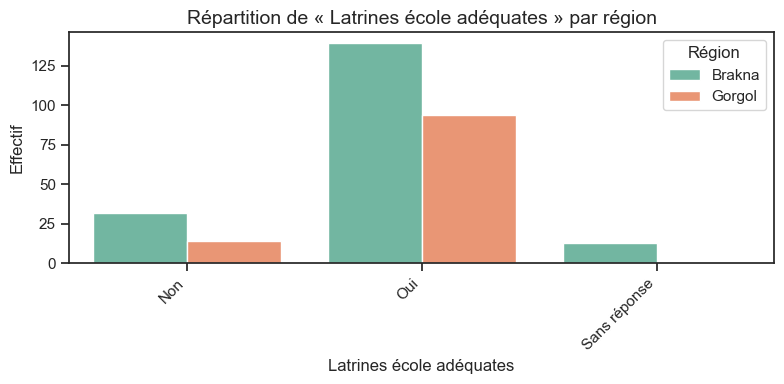

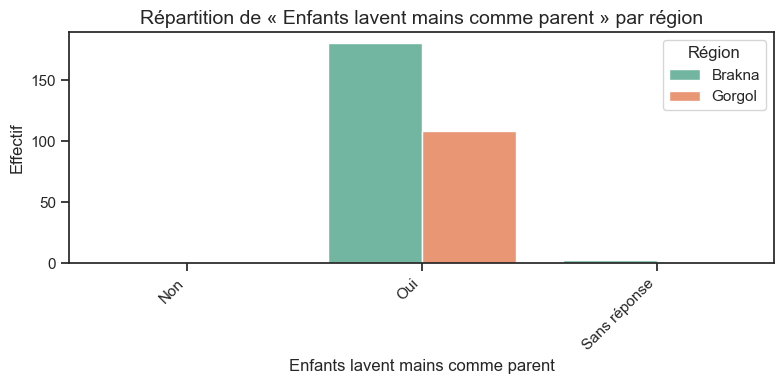

In [139]:
# --- 0) Redéfinition des dictionnaires de recodage augmentés ---
gender_map = {
    0: "Femme",      '0': "Femme",
    1: "Homme",      '1': "Homme",
}

ethnie_map = {
    1: "Hassanya",   '1': "Hassanya",
    2: "Pulaar",     '2': "Pulaar",
    3: "Wolof",      '3': "Wolof",
    4: "Soninke",    '4': "Soninke",
    5: "Bambara",    '5': "Bambara",
    97: "Autre",     '97': "Autre"
}

langue_map = {
    1: "Français",   '1': "Français",
    2: "Berbère",    '2': "Berbère",
    3: "Hassanya",   '3': "Hassanya",
    4: "Pulaar",     '4': "Pulaar",
    5: "Wolof",      '5': "Wolof",
    6: "Soninke",    '6': "Soninke",
    7: "Bambara",    '7': "Bambara",
    # combinaisons
    "3 4": "Mixte",  "4 3": "Mixte",  '8': "Mixte",
    # codes spéciaux
    98: "Sans réponse",  '98': "Sans réponse",
    97: "Autre",         '97': "Autre"
}

latrines_map = {
    0: "Non",       '0': "Non",
    1: "Oui",       '1': "Oui",
    98: "Sans réponse", '98': "Sans réponse",
    97: "Autre",    '97': "Autre"
}

enfants_lavant_map = {
    0: "Non",       '0': "Non",
    1: "Oui",       '1': "Oui",
    98: "Sans réponse", '98': "Sans réponse",
    97: "Autre",    '97': "Autre"
}

# --- 1) Application des recodages sur votre DataFrame df ---
df["Genre_parent_lbl"]                 = df["Genre_parent"].map(gender_map)
df["Ethnie_parent_lbl"]                = df["Ethnie_parent"].map(ethnie_map)
# On convertit en str avant map pour capter '3','4','4 3','6'…
df["Langue_parlée_à_la_maison_str"]    = df["Langue_parlée_à_la_maison"].astype(str)
df["Langue_maison_lbl"]                = df["Langue_parlée_à_la_maison_str"].map(langue_map)
df["Latrines_ecole_adequates_lbl"]     = df["Latrines_école_adéquates"].map(latrines_map)
df["Enfants_lavent_mains_lbl"]         = df["Enfants_lavent_mains_comme_parent"].map(enfants_lavant_map)

# --- 2) Vérification des codes non recodés ---
for orig, lbl, mapping in [
    ("Genre_parent",                 "Genre_parent_lbl",                 gender_map),
    ("Ethnie_parent",                "Ethnie_parent_lbl",                ethnie_map),
    ("Langue_parlée_à_la_maison_str","Langue_maison_lbl",                langue_map),
    ("Latrines_école_adéquates",     "Latrines_ecole_adequates_lbl",     latrines_map),
    ("Enfants_lavent_mains_comme_parent", "Enfants_lavent_mains_lbl",   enfants_lavant_map),
]:
    missing = df.loc[~df[orig].isin(mapping.keys()), orig].unique()
    if len(missing):
        print(f"⚠️ Codes non recodés pour {orig} : {missing}")

# --- 3) Recréation de la colonne région si nécessaire ---
region_map = {1: "Brakna", 2: "Gorgol", 3: "Tagant"}
df["region_name"] = df["Région"].map(region_map)
if df["region_name"].isna().any():
    print("⚠️ Codes Région non mappés :", df.loc[df["region_name"].isna(), "Région"].unique())
# --- A) (Re)création de region_name à partir de la colonne 'Région' ---
region_map = {1: "Brakna", 2: "Gorgol", 3: "Tagant"}
df["region_name"] = df["Région"].map(region_map)

# Vérification rapide
if df["region_name"].isna().any():
    print("⚠️ Codes Région non mappés :", df.loc[df["region_name"].isna(), "Région"].unique())

# --- B) Variables catégorielles recodées d’intérêt (suffixe _lbl) ---
cat_lbl_vars = [
    ("Genre_parent_lbl",                 "Genre du parent"),
    ("Ethnie_parent_lbl",                "Ethnie du parent"),
    ("Langue_maison_lbl",                "Langue parlée à la maison"),
    ("Latrines_ecole_adequates_lbl",     "Latrines école adéquates"),
    ("Enfants_lavent_mains_lbl",         "Enfants lavent mains comme parent")
]

sns.set(style="ticks", palette="Set2")

for col, pretty in cat_lbl_vars:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df,
        x=col,
        hue='region_name',
        dodge=True,
        order=sorted(df[col].dropna().unique())  # s'assure d'un ordre cohérent
    )
    ax.set_title(f"Répartition de « {pretty} » par région", fontsize=14)
    ax.set_ylabel("Effectif")
    ax.set_xlabel(pretty)
    ax.legend(title="Région", loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



L’analyse des distributions catégorielles issues de l’enquête auprès des parents révèle plusieurs disparités régionales intéressantes. D’abord, les proportions de genre sont équilibrées mais avec une légère prédominance masculine à Gorgol, contrairement à Brakna. Concernant l’ethnie des parents, les Hassanya sont majoritaires à Brakna, tandis que Gorgol présente une diversité plus marquée avec des proportions significatives de Wolof et de Pulaar. La langue parlée à la maison suit cette répartition : le Hassanya domine à Brakna, alors que Gorgol affiche un usage plus partagé entre le Pulaar et le Hassanya, avec quelques occurrences de langues mixtes. Sur le plan des infrastructures scolaires, les parents de Brakna déclarent plus fréquemment que les latrines de l’école sont adéquates comparé à Gorgol, bien que les deux régions présentent encore un taux non négligeable de réponses négatives ou manquantes. Enfin, l'hygiène des enfants semble mieux suivie à Brakna, où la majorité des parents déclarent que leurs enfants se lavent les mains comme eux, ce qui pourrait refléter une meilleure transmission des pratiques d’hygiène dans cette région.

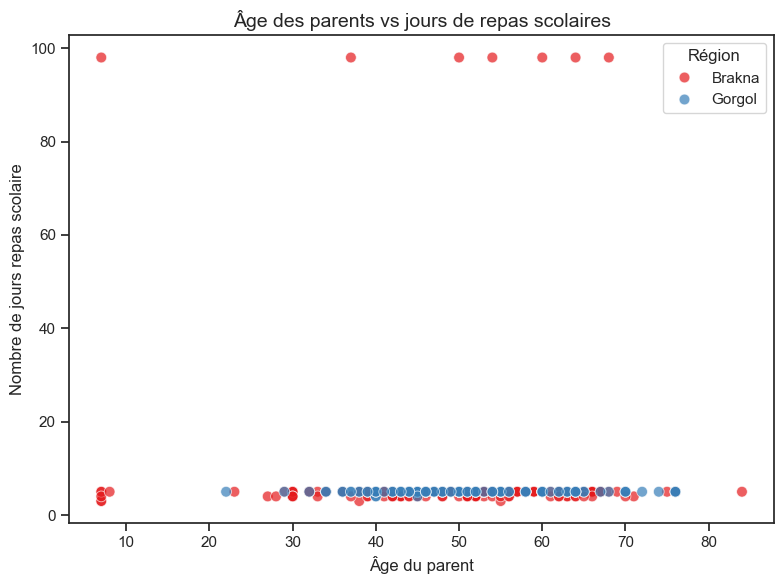

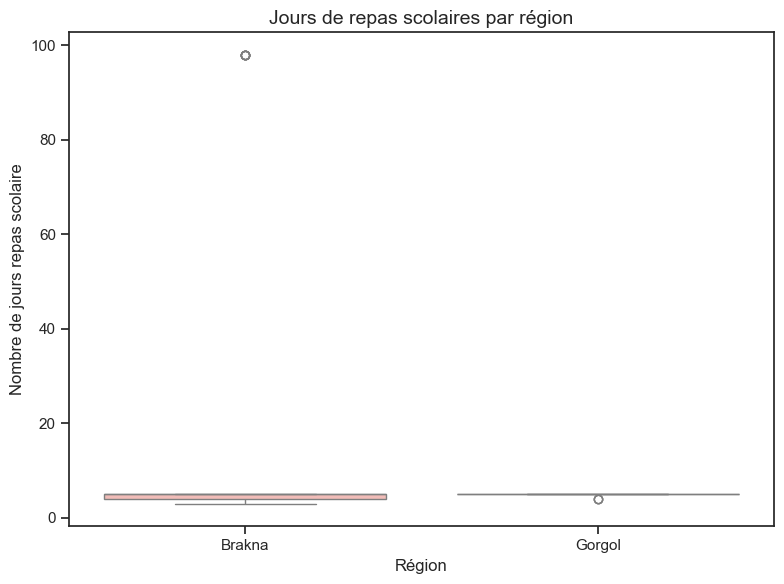

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palette globale
sns.set(style="ticks", palette="Pastel1")

# --- 5a) Scatter : Âge_parent vs Nombre_jours_repas_scolaire ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Âge_parent',
    y='Nombre_jours_repas_scolaire',
    hue='region_name',
    palette="Set1",
    s=60,
    alpha=0.7
)
plt.title("Âge des parents vs jours de repas scolaires", fontsize=14)
plt.xlabel("Âge du parent")
plt.ylabel("Nombre de jours repas scolaire")
plt.legend(title="Région")
plt.tight_layout()
plt.show()

# --- 5b) Boxplot : Nombre_jours_repas_scolaire par région ---
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='region_name',
    y='Nombre_jours_repas_scolaire'
    # plus de palette ici, on utilise la palette globale Pastel1
)
plt.title("Jours de repas scolaires par région", fontsize=14)
plt.xlabel("Région")
plt.ylabel("Nombre de jours repas scolaire")
plt.tight_layout()
plt.show()


Les résultats montrent que la majorité des parents, quel que soit leur âge, rapportent un nombre de jours de repas scolaire situé entre 0 et 5 jours par semaine. Toutefois, quelques valeurs aberrantes apparaissent, notamment des réponses indiquant près de 100 jours, ce qui semble incohérent dans le contexte d’une semaine scolaire. Ce type d’anomalie, visible aussi bien dans le nuage de points que dans le boxplot par région, suggère des erreurs de saisie ou de compréhension de la question. Malgré cela, on observe que la distribution générale des jours de repas est globalement similaire entre les régions de Brakna et Gorgol, bien que Brakna semble présenter un peu plus de variabilité. Ces observations soulignent l’importance d’un nettoyage rigoureux et d’un contrôle qualité sur les données avant toute inférence.

In [185]:

df_teacher, meta_teacher = pyreadstat.read_dta("teacher survey.dta", encoding="latin1")

# Liste des variables
print("Variables dans df_teacher:")
print(df_teacher.columns.tolist(), "\n")

# Aperçu du contenu
print("Aperçu teacher survey:\n", df_teacher.head(), "\n")

# Informations générales
print("\nINFO teacher survey:")
df_teacher.info()

# Correspondance Variable => Label
print("Correspondance Variable => Label :\n")
for var_name, var_label in zip(meta_teacher.column_names, meta_teacher.column_labels):
    print(f"{var_name} => {var_label}")

Variables dans df_teacher:
['start', 'today', 'team_lead', 'enum_name', 'gps', '_v1', '_v2', '_v3', '_v4', 'region', 'department', 'commune', 'school', 'consent', 'gender', 'grades', '_v5', '_v6', '_v7', '_v8', 'grades_other', '_v9', '_v10', '_v11', 'language', '_v12', '_v13', '_v14', 'language_other', 'language_home', 'language_home_other', 'attent1', 'attent2', 'attent3', '_v15', '_v16', '_v17', '_v18', '_v19', '_v20', '_v21', '_v22', 'attent3_other', 'train1', 'train_reading', 'train_reading_who', 'educ_mat', 'educ_mat_what', 'educ_mat_needs', 'educ_mat_explain', 'absent', 'absent_reason', 'absent_reason_other', 'attend', 'attend_commun', 'attend_commun_other', 'program', '_v23', '_v24', '_v25', '_v26', '_v27', '_v28', '_v29', '_v30', '_v31', 'program_other', 'add_info', 'add_info2', 'instanceID', 'instanceName', '_v32', '_v33', '_v34'] 

Aperçu teacher survey:
                       start         today  team_lead  enum_name  \
0  2024-05-02T12:57:06.484Z  2.030227e+12          3   

La base `df_teacher`, extraite du fichier `teacher survey.dta`, comprend 434 réponses individuelles et 74 variables couvrant des informations détaillées sur les enseignants interrogés. Ces variables incluent l'identification de l'enquêteur et de l’enseignant (`start`, `enum_name`, `team_lead`), les localisations GPS, des données sur les niveaux scolaires enseignés (`grades`, `_v5` à `_v11`), les langues utilisées en classe et à la maison (`language`, `language_home`), ainsi que des questions sur la formation pédagogique, les matériels reçus, l’assiduité scolaire, et la perception des effets du programme « Future is Ours ». Les métadonnées associées, extraites grâce à `pyreadstat`, permettent d’associer à chaque variable un libellé explicite, ce qui facilitera leur renommage dans un dictionnaire clair et structuré. Certaines variables, comme `_v9` à `_v11` ou `absent_reason`, présentent des valeurs manquantes partielles, nécessitant une vérification lors du nettoyage. Les champs textes libres (`add_info`, `educ_mat_explain`, etc.) méritent également un traitement particulier en raison de leur codage potentiellement non standard (accents, caractères spéciaux). Enfin, les variables d’identifiant (`instanceID`, `instanceName`, etc.) ne seront utilisées que pour le suivi des entrées, et exclues de l’analyse statistique principale. Cette exploration initiale prépare le terrain pour les étapes suivantes du traitement : renommage des colonnes, création d’un dictionnaire de labels, nettoyage automatisé, puis visualisation et modélisation exploratoire.


In [190]:
rename_dict_teacher={
    'start': 'Heure_de_début',
    'today': 'Date_du_jour',
    'team_lead': 'Nom_du_chef_déquipe',
    'enum_name': 'Nom_de_lenquêteur',
    'gps': 'Coordonnées_GPS',
    '_v1': 'GPS_Latitude',
    '_v2': 'GPS_Longitude',
    '_v3': 'GPS_Altitude',
    '_v4': 'GPS_Précision',
    'region': 'Région',
    'department': 'Département',
    'commune': 'Commune',
    'school': 'École',
    'consent': 'Message_accueil_FIO',
    'gender': 'Genre_enseignant',
    'grades': 'Niveaux_enseignés',
    '_v5': 'Premier_niveau',
    '_v6': 'Deuxième_niveau',
    '_v7': 'Troisième_niveau',
    '_v8': 'Autre_niveau',
    'grades_other': 'Autre_niveau_préciser',
    '_v9': 'Quatrième_niveau',
    '_v10': 'Cinquième_niveau',
    '_v11': 'Sixième_niveau',
    'language': 'Langues_enseignement',
    '_v12': 'Langue_Arabe',
    '_v13': 'Langue_Français',
    '_v14': 'Langue_Autre',
    'language_other': 'Langue_autre_préciser',
    'language_home': 'Langue_parlée_maison',
    'language_home_other': 'Langue_maison_autre_préciser',
    'attent1': 'Fréquence_interruption_cours',
    'attent2': 'Diminution_attention_élèves',
    'attent3': 'Raisons_diminution_attention',
    '_v15': 'Raison_fatigue',
    '_v16': 'Raison_malnutrition',
    '_v17': 'Raison_manque_intérêt',
    '_v18': 'Raison_distractions_externes',
    '_v19': 'Raison_problèmes_personnels',
    '_v20': 'Raison_difficulté_compréhension',
    '_v21': 'Raison_perturbations_comportement',
    '_v22': 'Raison_autre',
    'attent3_other': 'Raison_autre_préciser',
    'train1': 'Niveau_formation_enseignant',
    'train_reading': 'Dernière_formation_lecture',
    'train_reading_who': 'Prestataire_formation_lecture',
    'educ_mat': 'Réception_matériel_éducatif',
    'educ_mat_what': 'Matériel_éducatif_reçu',
    'educ_mat_needs': 'Adéquation_matériel_besoins',
    'educ_mat_explain': 'Explication_score_matériel',
    'absent': 'Jours_absence_enseignant',
    'absent_reason': 'Raison_principale_absence',
    'absent_reason_other': 'Raison_absence_autre_préciser',
    'attend': 'Prise_présence_quotidienne',
    'attend_commun': 'Fréquence_communication_présence',
    'attend_commun_other': 'Communication_autre_préciser',
    'program': 'Aspects_projet_FIO_reçus',
    '_v23': 'Repas_scolaires',
    '_v24': 'Médicament_déparasitage',
    '_v25': 'Formation_hygiène_alimentation',
    '_v26': 'Équipement_cuisine',
    '_v27': 'Formation_parents',
    '_v28': 'Matériel_lecture_arabe',
    '_v29': 'Formation_enseignants',
    '_v30': 'Clubs_lecture',
    '_v31': 'Autre_aspect',
    'program_other': 'Autre_aspect_préciser',
    'add_info': 'Informations_supplémentaires',
    'add_info2': 'Notes_enquêteur',
    'instanceID': 'ID_instance',
    'instanceName': 'Nom_instance',
    '_v32': 'Identifiant_calculé',
    '_v33': 'UUID',
    '_v34': 'Heure_soumission'
}
df_teacher.rename(columns=rename_dict_teacher, inplace=True)

# Calcul des valeurs manquantes et pourcentages pour df_teacher
missing_counts_teacher = df_teacher.isna().sum()
missing_percents_teacher = (df_teacher.isna().mean() * 100).round(3)

# Configuration du tableau Rich
console = Console()
table = Table(title="Valeurs manquantes - teacher survey")

table.add_column("Variable", justify="left")
table.add_column("Nb. Manquantes", justify="right")
table.add_column("Pourcentage (%)", justify="right")

# Ajout des lignes au tableau
for col in df_teacher.columns:
    table.add_row(
        col,
        str(missing_counts_teacher[col]),
        str(missing_percents_teacher[col])
    )

console.print(table)

                  Valeurs manquantes - teacher survey                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Variable                          ┃ Nb. Manquantes ┃ Pourcentage (%) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Heure_de_début                    │              0 │             0.0 │
│ Date_du_jour                      │              0 │             0.0 │
│ Nom_du_chef_déquipe               │              0 │             0.0 │
│ Nom_de_lenquêteur                 │              0 │             0.0 │
│ Coordonnées_GPS                   │              0 │             0.0 │
│ GPS_Latitude                      │              0 │             0.0 │
│ GPS_Longitude                     │              0 │             0.0 │
│ GPS_Altitude                      │              0 │             0.0 │
│ GPS_Précision                     │              0 │             0.0 │
│ Région                            │              0 │             0.0 │
│ Département                       │              0 │             0.0 │
│ Commune                           │              0 │             0.0 │
│ École                             │              0 │             0.0 │
│ Message_accueil_FIO               │              0 │             0.0 │
│ Genre_enseignant                  │              0 │             0.0 │
│ Niveaux_enseignés                 │              0 │             0.0 │
│ Premier_niveau                    │              0 │             0.0 │
│ Deuxième_niveau                   │              0 │             0.0 │
│ Troisième_niveau                  │              0 │             0.0 │
│ Autre_niveau                      │              0 │             0.0 │
│ Autre_niveau_préciser             │              0 │             0.0 │
│ Quatrième_niveau                  │            288 │          66.359 │
│ Cinquième_niveau                  │            288 │          66.359 │
│ Sixième_niveau                    │            288 │          66.359 │
│ Langues_enseignement              │              0 │             0.0 │
│ Langue_Arabe                      │              0 │             0.0 │
│ Langue_Français                   │              0 │             0.0 │
│ Langue_Autre                      │              0 │             0.0 │
│ Langue_autre_préciser             │              0 │             0.0 │
│ Langue_parlée_maison              │              0 │             0.0 │
│ Langue_maison_autre_préciser      │              0 │             0.0 │
│ Fréquence_interruption_cours      │              0 │             0.0 │
│ Diminution_attention_élèves       │              0 │             0.0 │
│ Raisons_diminution_attention      │              0 │             0.0 │
│ Raison_fatigue                    │            219 │          50.461 │
│ Raison_malnutrition               │            219 │          50.461 │
│ Raison_manque_intérêt             │            219 │          50.461 │
│ Raison_distractions_externes      │            219 │          50.461 │
│ Raison_problèmes_personnels       │            219 │          50.461 │
│ Raison_difficulté_compréhension   │            219 │          50.461 │
│ Raison_perturbations_comportement │            219 │          50.461 │
│ Raison_autre                      │            219 │          50.461 │
│ Raison_autre_préciser             │              0 │             0.0 │
│ Niveau_formation_enseignant       │              0 │             0.0 │
│ Dernière_formation_lecture        │              0 │             0.0 │
│ Prestataire_formation_lecture     │              0 │             0.0 │
│ Réception_matériel_éducatif       │              0 │             0.0 │
│ Matériel_éducatif_reçu            │              0 │             0.0 │
│ Adéquation_matériel_besoins       │              0 │             0.0 │
│ Explication_score_matériel        │              0 │             0.0 │
│ Jours_absence_enseignant          │              0 │    

Le renommage des variables dans la base `df_teacher` a permis une meilleure lisibilité en français, facilitant ainsi l’analyse exploratoire. La vérification des valeurs manquantes révèle que la majorité des variables ne présentent aucune absence, ce qui confirme la bonne qualité générale de la base. Cependant, plusieurs variables affichent un taux élevé de données manquantes : les niveaux d’enseignement `Quatrième_niveau`, `Cinquième_niveau`, et `Sixième_niveau` sont absents pour environ 66,4 % des répondants, ce qui peut refléter une spécialisation des enseignants dans les niveaux inférieurs. De même, les raisons détaillées de la baisse d’attention en classe (`Raison_fatigue` à `Raison_autre`) présentent un taux de non-réponse supérieur à 50 %, suggérant que cette question était conditionnelle ou perçue comme sensible. Enfin, la variable `Raison_principale_absence` est manquante pour 55 % des cas, indiquant un possible oubli ou une non-déclaration fréquente. Ces constats orienteront les décisions à venir sur l’imputation des données et la sélection des variables dans les analyses statistiques et graphiques.


In [193]:
# 3) Construction du DataFrame de labels pour teacher
orig_cols   = list(rename_dict_teacher.keys())
new_cols    = list(rename_dict_teacher.values())
labels      = [
    meta_teacher.column_labels[meta_teacher.column_names.index(col)]
    for col in orig_cols
]
df_labels_teacher = pd.DataFrame({
    'Nouveau Nom': new_cols,
    'Label'      : labels
})

# 4) Application du pipeline avec rapport de statistiques
cleaned_teacher = apply_pipeline_with_stats(
    df=df_teacher.copy(),
    df_labels=df_labels_teacher,
    df_missing=None,
    # method_config=method_config,  # supprimer si automatique
    skip_keywords=None,
    drop_duplicates=True
)

# --- Nettoyage des caractères spéciaux APRÈS le pipeline ---
from unidecode import unidecode

def clean_text_for_stata_after(text):
    if pd.isna(text):
        return text
    s = unidecode(str(text))
    return s.encode('latin-1', errors='replace').decode('latin-1')

for col in cleaned_teacher.select_dtypes(include=['object','category']):
    cleaned_teacher[col] = cleaned_teacher[col].apply(clean_text_for_stata_after)

# 5) Aperçu du résultat
print("Aperçu des premières lignes du DataFrame teacher nettoyé :")
display(cleaned_teacher.head())

# 6) Enregistrement du résultat au format Stata (.dta)
output_teacher_dta = 'df_teacher_clean.dta'
stata_export_teacher = cleaned_teacher.copy()
stata_export_teacher.columns = [clean_stata_column_names(col) for col in stata_export_teacher.columns]
stata_export_teacher.to_stata(output_teacher_dta, write_index=False, version=118)
print(f"DataFrame teacher nettoyé enregistré au format Stata (v118) à : {output_teacher_dta}")

>>> STATISTIQUES AVANT NETTOYAGE <<<
Forme initiale    : (434, 74)
Valeurs manquantes: 2855
Doublons          : 0
Applying cleaning pipeline (placeholder)...
>>> STATISTIQUES APRÈS NETTOYAGE <<<
Forme finale      : (434, 74)
Valeurs manquantes: 0
Doublons restants : 0
Aperçu des premières lignes du DataFrame teacher nettoyé :


,Heure_de_début,Date_du_jour,Nom_du_chef_déquipe,Nom_de_lenquêteur,Coordonnées_GPS,GPS_Latitude,GPS_Longitude,GPS_Altitude,GPS_Précision,Région,...,Clubs_lecture,Autre_aspect,Autre_aspect_préciser,Informations_supplémentaires,Notes_enquêteur,ID_instance,Nom_instance,Identifiant_calculé,UUID,Heure_soumission
0,2024-05-02T12:57:06.484Z,2.030227e+12,3,304,17.3502652 -13.8821416 83.0 4.983,17.350265,-13.882142,83.0,4.983,1,...,0,0,,Je voudrais que les responsables du projet l'a...,"Je remarque qu'il un problA""me de sA(c)curitA(...",uuid:d1f086a2-330f-4999-81c1-882b8a05ab9f,1 - 2024-05-02,136299398,d1f086a2-330f-4999-81c1-882b8a05ab9f,2.030281e+12
1,2024-05-02T13:24:28.419Z,2.030227e+12,3,301,17.350582 -13.882404 60.8 4.8,17.350582,-13.882404,60.8,4.800,1,...,0,0,,- besoin de livres \n- besoin de rA(c)fectoire,L'enseignant de la 1ere annA(c)e est le directeur,uuid:220fbbf1-aef0-444e-8aab-7d9ca4ffb9ab,1 - 2024-05-02,136299340,220fbbf1-aef0-444e-8aab-7d9ca4ffb9ab,2.030281e+12
2,2024-04-22T11:23:26.006Z,2.029363e+12,5,502,17.1218787 -14.0668247 62.8 3.6,17.121879,-14.066825,62.8,3.600,1,...,0,0,,Selon votre programme pourquoi y'as pas une fo...,"Est ce que vos A(c)lA""ves ont l'habitude de ba...",uuid:094f2a45-8e91-4102-a031-6c4329f04676,2 - 2024-04-22,135786199,094f2a45-8e91-4102-a031-6c4329f04676,2.029477e+12
3,2024-04-22T12:32:23.747Z,2.029363e+12,5,502,17.1219733 -14.0666367 65.5 4.5,17.121973,-14.066637,65.5,4.500,1,...,0,0,,Je vous remercie d'avoir passer nous voir,"Pourquoi on A(c)volue pas les A(c)lA""ves de 1A...",uuid:86e49a61-3c14-41d5-8ed0-9621f1e0bf6f,2 - 2024-04-22,135786201,86e49a61-3c14-41d5-8ed0-9621f1e0bf6f,2.029477e+12
4,2024-04-22T11:37:32.859Z,2.029363e+12,5,502,17.1218681 -14.0667606 65.5 4.65,17.121868,-14.066761,65.5,4.650,1,...,0,0,,Est vous Aates bien de ce tAC/che que vous faites,Depuis quant vous enseigner ici,uuid:240e3d8e-aea4-4839-8e20-95ab4f574517,2 - 2024-04-22,135786200,240e3d8e-aea4-4839-8e20-95ab4f574517,2.029477e+12


DataFrame teacher nettoyé enregistré au format Stata (v118) à : df_teacher_clean.dta


Le processus de nettoyage de la base `teacher survey` a été mené avec rigueur à l’aide d’un pipeline standardisé. Initialement, le DataFrame comprenait 434 lignes et 74 colonnes, avec un total de 2 855 valeurs manquantes. Après l’application du pipeline de nettoyage (imputation automatique, suppression des doublons, standardisation des noms de colonnes et recodage éventuel), toutes les valeurs manquantes ont été traitées, et aucun doublon n’a subsisté. 
Un nettoyage spécifique des caractères spéciaux a également été effectué à l’aide de la bibliothèque `unidecode`, garantissant la compatibilité avec le format `.dta` de Stata (notamment pour l’encodage Latin-1). Les noms de colonnes ont été adaptés au format requis par Stata, avec une limite de 30 caractères. Le fichier final, nommé `df_teacher_clean.dta`, a été exporté au format Stata version 118, prêt à être intégré dans des outils statistiques ou économétriques.
Ce traitement garantit l’intégrité et l’interopérabilité des données pour les analyses futures.

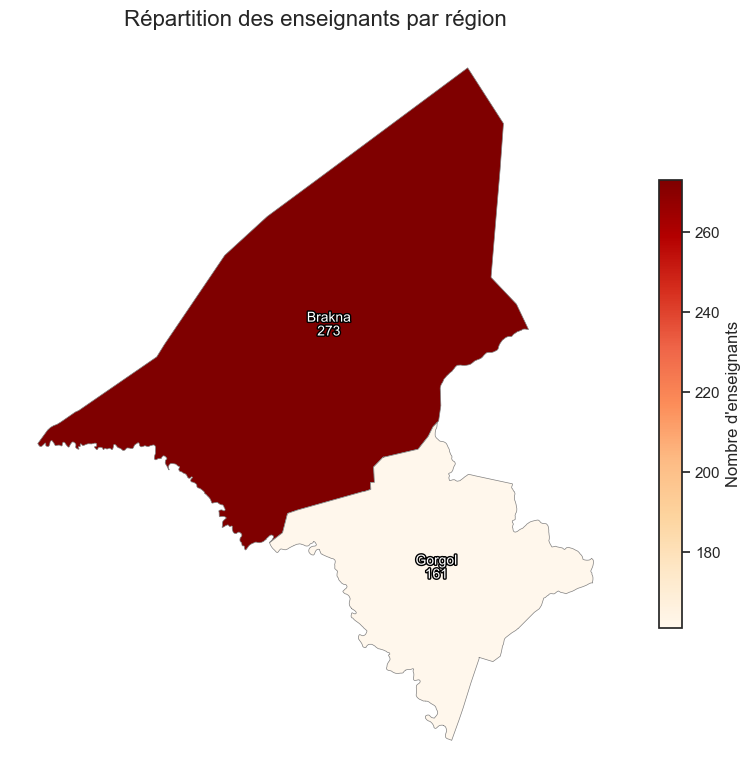

In [198]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as pe

# --- 1) Charger le shapefile des régions ---
shp_path = r"C:\Users\hp\Downloads\DATA CHALLENGE\Quant data before appending\Shape\mrt_admbnda_adm1_ansade_20240327.shp"
gdf = gpd.read_file(shp_path)

# --- 2) Détection automatique de la colonne région dans le shapefile ---
candidats = ['NAME_1','ADM1_EN','ADM1_PCODE','ADM1_NAME','ADM1_FR']
reg_col = next((c for c in candidats if c in gdf.columns), None)
if reg_col is None:
    raise KeyError(f"Aucune colonne région détectée parmi {candidats}")

# --- 3) Recoder vos codes numériques en noms de régions dans df_teacher ---
region_map = {1: 'Brakna', 2: 'Gorgol', 3: 'Tagant'}
df_teacher['region_name'] = df_teacher['Région'].map(region_map)

# --- 4) Compter le nombre de professeurs par région et renommer ---
df_counts = (
    df_teacher['region_name']
      .value_counts()
      .reset_index()
)
df_counts.columns = [reg_col, 'count']

# --- 5) Fusionner et remplir les NaN par 0 ---
gdf[reg_col]       = gdf[reg_col].astype(str)
df_counts[reg_col] = df_counts[reg_col].astype(str)
gdf = gdf.merge(df_counts, on=reg_col, how='left')
gdf['count'] = gdf['count'].fillna(0).astype(int)

# --- 5bis) Ne garder que les régions avec au moins une observation ---
gdf = gdf[gdf['count'] > 0]

# --- 6) Tracé statique avec geopandas + matplotlib ---
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf.plot(
    column='count',
    cmap='OrRd',
    edgecolor='gray',
    linewidth=0.5,
    legend=True,
    legend_kwds={'label': "Nombre d'enseignants", 'shrink': 0.6},
    ax=ax
)
ax.set_title("Répartition des enseignants par région", fontsize=16)
ax.axis('off')

# Ajouter les labels au centre de chaque région
for _, row in gdf.iterrows():
    x, y = row.geometry.centroid.coords[0]
    ax.text(
        x, y,
        f"{row[reg_col]}\n{row['count']}",
        ha='center', va='center',
        fontsize=10, color='white',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")]
    )

plt.tight_layout()
plt.show()

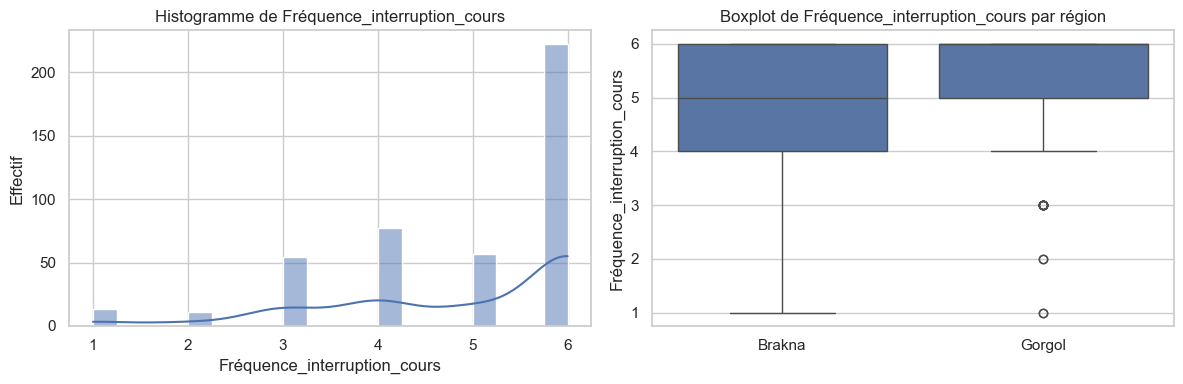

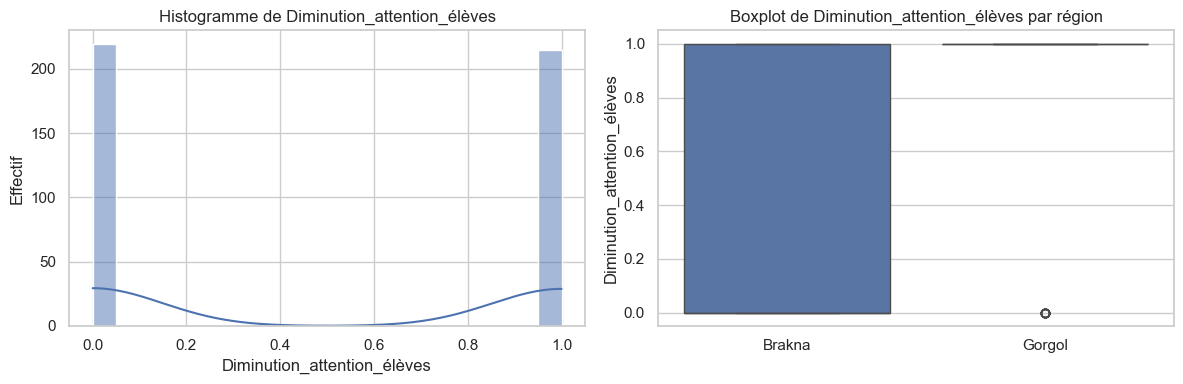

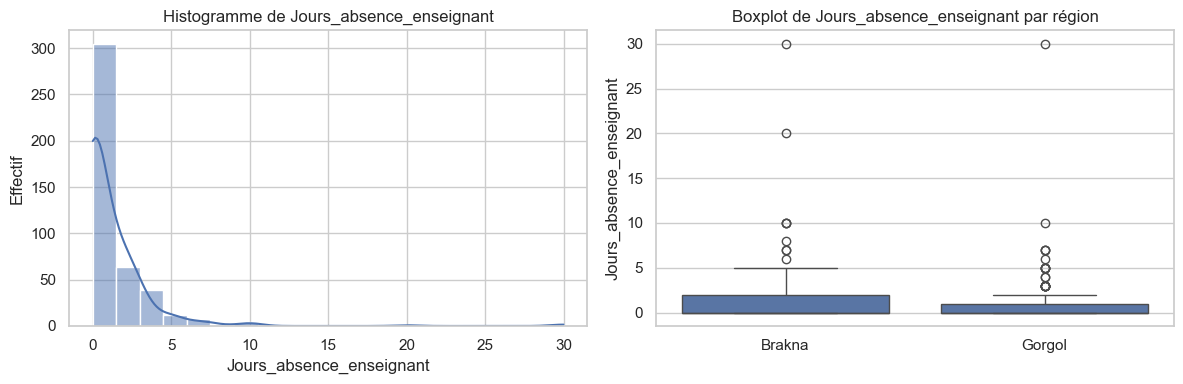

In [204]:
num_vars = [
    'Fréquence_interruption_cours',
    'Diminution_attention_élèves',
    'Jours_absence_enseignant'
]

sns.set(style="whitegrid")

for col in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogramme
    sns.histplot(
        data=df_teacher, x=col,
        bins=20, kde=True, ax=axes[0]
    )
    axes[0].set_title(f"Histogramme de {col}")
    axes[0].set_ylabel("Effectif")
    
    # Boxplot par région pour repérer les outliers
    sns.boxplot(
        data=df_teacher,
        x='region_name',
        y=col,
        ax=axes[1]
    )
    axes[1].set_title(f"Boxplot de {col} par région")
    axes[1].set_xlabel("")  # pas de label X
    axes[1].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()


L’analyse des distributions des variables numériques issues du fichier `teacher_survey` met en lumière plusieurs constats significatifs. La variable `Fréquence_interruption_cours` suit une distribution clairement asymétrique, avec une concentration importante autour de la valeur maximale de 6 interruptions, comme l’indique le pic sur l’histogramme. Le boxplot, quant à lui, montre une hétérogénéité entre les régions, notamment une dispersion plus faible dans Gorgol. Concernant la `Diminution_attention_élèves`, il s’agit d’une variable binaire (0 ou 1) indiquant si l’attention des élèves a diminué : une forte majorité des enseignants dans les deux régions perçoivent une baisse d’attention (valeur 1). Enfin, la variable `Jours_absence_enseignant` présente une distribution très asymétrique avec plusieurs valeurs extrêmes : si la majorité des enseignants déclarent peu ou pas d'absences, certains atteignent jusqu’à 30 jours d'absence. Le boxplot révèle aussi une présence d’outliers importants dans les deux régions, suggérant des cas ponctuels de forte instabilité dans l’assiduité. Ces résultats soulignent des enjeux potentiels à explorer davantage, notamment la fatigue, les conditions de travail, ou les effets de formation sur la dynamique en classe.


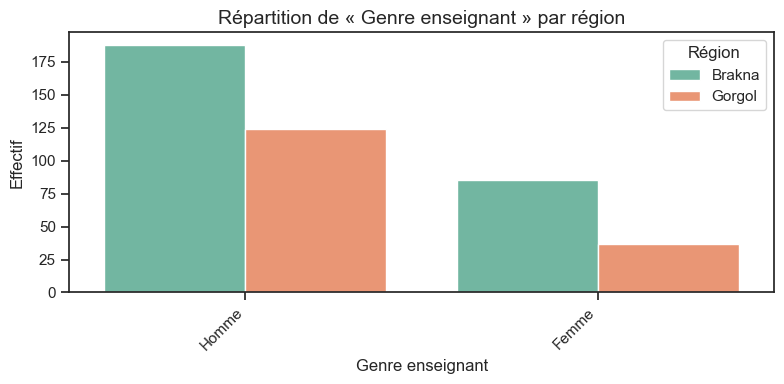

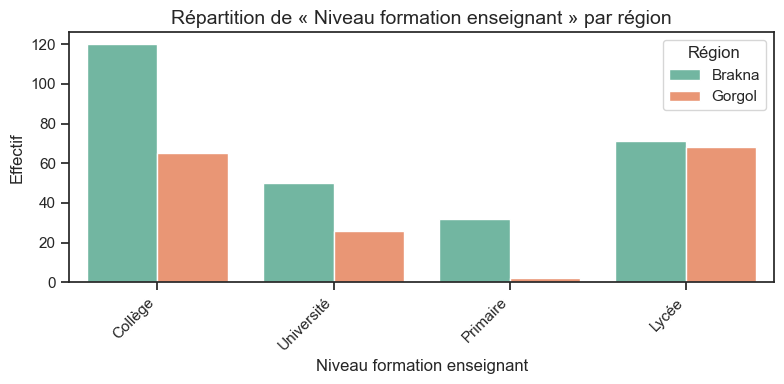

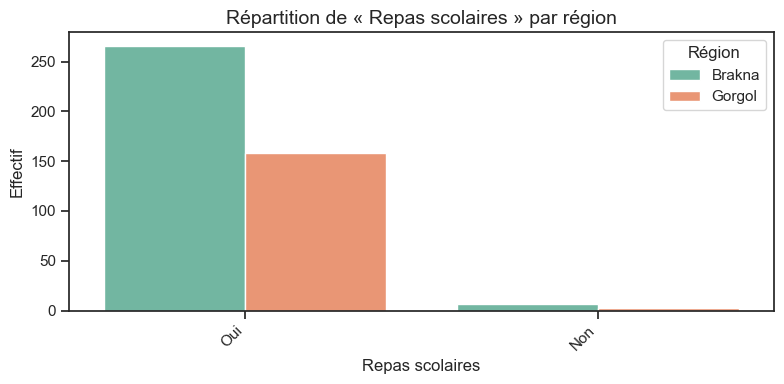

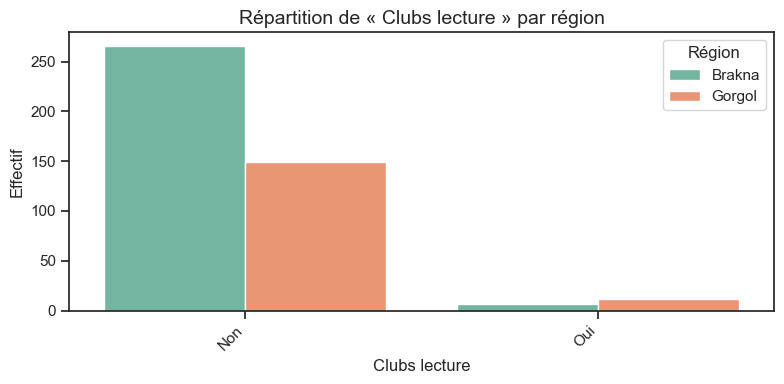

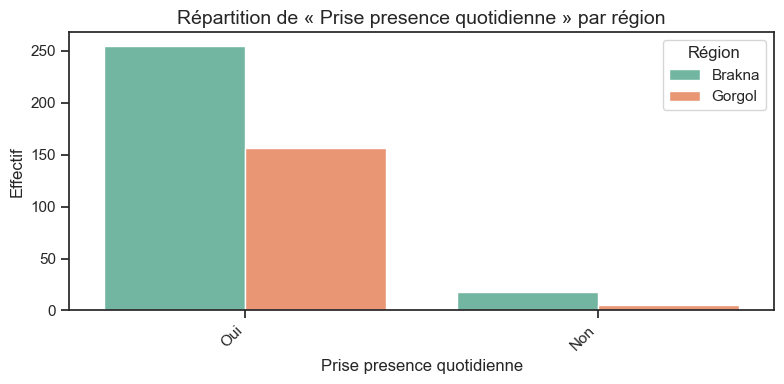

In [247]:
# --- 0) Définir tous les dictionnaires de recodage ---

# Genre de l’enseignant
genre_enseignant_map = {
    0: "Femme",
    1: "Homme"
}

# Niveau de formation de l’enseignant (adapter les libellés à votre codebook)
niveau_formation_map = {
    1: "Primaire",
    2: "Primaire",
    3: "Collège",
    4: "Lycée",
    5: "Université",
    97: "Autre"
}

# Repas scolaires
repas_map = {
    0: "Non",
    1: "Oui"
}

# Clubs de lecture
clubs_map = {
    0: "Non",
    1: "Oui"
}

# Prise de présence quotidienne
presence_map = {
    0: "Non",
    1: "Oui"
}

# --- 1) Appliquer les recodages sur df_teacher ---
df_teacher = df_teacher.copy()

df_teacher["Genre_enseignant_lbl"]            = df_teacher["Genre_enseignant"].map(genre_enseignant_map)
df_teacher["Niveau_formation_enseignant_lbl"] = df_teacher["Niveau_formation_enseignant"].map(niveau_formation_map)
df_teacher["Repas_scolaires_lbl"]             = df_teacher["Repas_scolaires"].map(repas_map)
df_teacher["Clubs_lecture_lbl"]               = df_teacher["Clubs_lecture"].map(clubs_map)
df_teacher["Prise_presence_quotidienne_lbl"]  = df_teacher["Prise_présence_quotidienne"].map(presence_map)

# --- 2) Vérifier qu’aucun code n’est “perdu” dans le mapping ---
for orig, new, mapping in [
    ("Genre_enseignant",            "Genre_enseignant_lbl",            genre_enseignant_map),
    ("Niveau_formation_enseignant", "Niveau_formation_enseignant_lbl", niveau_formation_map),
    ("Repas_scolaires",             "Repas_scolaires_lbl",             repas_map),
    ("Clubs_lecture",               "Clubs_lecture_lbl",               clubs_map),
    ("Prise_présence_quotidienne",  "Prise_presence_quotidienne_lbl",  presence_map),
]:
    missing = df_teacher.loc[~df_teacher[orig].isin(mapping.keys()), orig].unique()
    if len(missing):
        print(f"⚠️ Codes non recodés pour {orig} :", missing)

# Maintenant vous pouvez lancer vos countplots en utilisant les colonnes « _lbl », par exemple :

# Exemple de countplot recodé
import matplotlib.pyplot as plt
import seaborn as sns

cat_vars_lbl = [
    "Genre_enseignant_lbl",
    "Niveau_formation_enseignant_lbl",
    "Repas_scolaires_lbl",
    "Clubs_lecture_lbl",
    "Prise_presence_quotidienne_lbl"
]

sns.set(style="ticks", palette="Set2")
for col in cat_vars_lbl:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df_teacher,
        x=col,
        hue="region_name",
        dodge=True
    )
    ax.set_title(f"Répartition de « {col.replace('_lbl','').replace('_',' ')} » par région", fontsize=14)
    ax.set_xlabel(col.replace('_lbl','').replace('_',' '))
    ax.set_ylabel("Effectif")
    ax.legend(title="Région", loc="upper right")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


L’analyse descriptive des variables issues de l’enquête enseignants révèle plusieurs disparités entre les régions de Brakna et Gorgol. En premier lieu, la répartition par genre montre une prédominance masculine dans les deux régions, particulièrement marquée à Brakna. En termes de niveau de formation, les enseignants déclarent majoritairement une formation de niveau collège ou lycée, avec un accès moindre à une formation universitaire, surtout dans le Gorgol. Concernant les pratiques scolaires, la majorité des enseignants affirment que des repas scolaires sont effectivement fournis, et ce, plus fréquemment dans la région de Brakna. Toutefois, la mise en place des clubs de lecture reste très limitée, avec un taux de présence très faible dans les deux régions. Enfin, la prise de présence quotidienne des élèves est bien respectée, particulièrement dans le Brakna. Ces résultats laissent apparaître un engagement globalement positif des enseignants, mais soulignent aussi des écarts régionaux en matière d’accès aux formations de haut niveau et d’activités de promotion de la lecture, ce qui peut orienter les futures interventions éducatives du programme FIO.


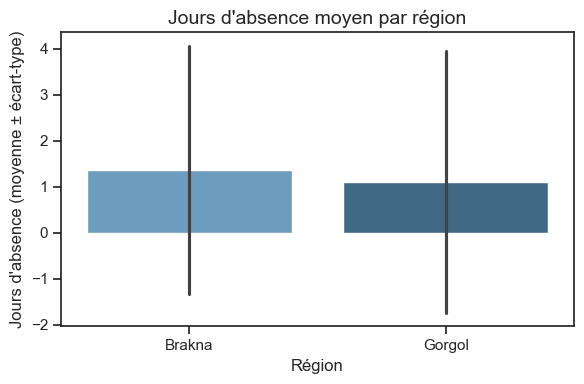

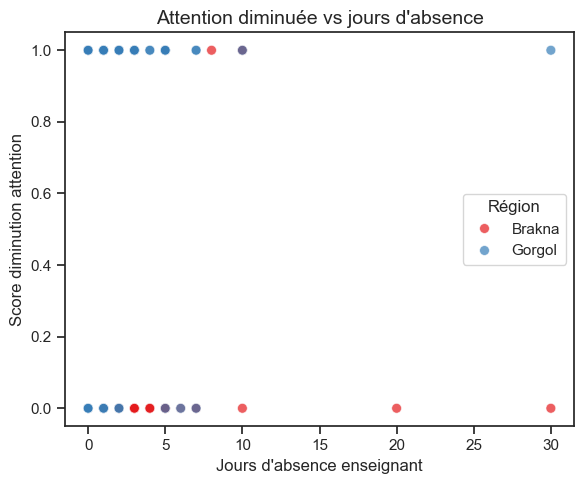

In [242]:
# --- Bloc 5a) Jours d'absence moyen par région ---
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df_teacher,
    x='region_name',
    y='Jours_absence_enseignant',
    hue='region_name',         # on passe bien hue pour que palette soit appliquée
    palette="Blues_d",
    errorbar='sd',             # remplace ci="sd"
    dodge=False                # pas de double barrement
)

# Supprimer la légende si elle existe
leg = ax.get_legend()
if leg:
    leg.remove()

ax.set_title("Jours d'absence moyen par région", fontsize=14)
ax.set_xlabel("Région")
ax.set_ylabel("Jours d'absence (moyenne ± écart-type)")
plt.tight_layout()
plt.show()


# --- Bloc 5b) Scatter : diminution attention vs absences ---
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_teacher,
    x='Jours_absence_enseignant',
    y='Diminution_attention_élèves',
    hue='region_name',
    palette="Set1",
    s=50,
    alpha=0.7
)
plt.title("Attention diminuée vs jours d'absence", fontsize=14)
plt.xlabel("Jours d'absence enseignant")
plt.ylabel("Score diminution attention")
plt.legend(title="Région")
plt.tight_layout()
plt.show()

L’analyse des absences moyennes par région montre que les enseignants du Brakna et du Gorgol présentent un nombre de jours d’absence globalement similaire, avec une légère tendance à des absences plus fréquentes dans la région du Brakna. La dispersion des valeurs, illustrée par l’écart-type, reste toutefois significative dans les deux régions, traduisant une hétérogénéité interindividuelle. Par ailleurs, la mise en relation entre les jours d’absence et la perception de la baisse d’attention des élèves montre que cette dernière est généralement déclarée indépendamment du nombre d’absences des enseignants. En effet, même parmi les enseignants très présents (0 à 3 jours d'absence), de nombreux cas de diminution de l’attention sont signalés. Cela suggère que d’autres facteurs, tels que les conditions pédagogiques, l’environnement scolaire ou la motivation des élèves, pourraient jouer un rôle plus déterminant dans l’attention en classe que l’absentéisme des enseignants lui-même.

In [255]:
# 1) Lecture du fichier Stata (avec pyreadstat) et récupération des labels
df_egra_student, meta_egra_student = pyreadstat.read_dta('egra and student survey.dta')

# 2) Liste des variables
print("Variables dans df_egra_student:")
print(df_egra_student.columns.tolist(), "\n")

# 3) Aperçu du contenu (5 premières lignes)
print("Aperçu egra student survey:\n", df_egra_student.head(), "\n")

# 4) Informations générales
print("\nINFO egra student survey:")
df_egra_student.info()

# 5) Correspondance Variable => Label
print("\nCorrespondance Variable => Label :")
for var_name, var_label in zip(meta_egra_student.column_names, meta_egra_student.column_labels):
    print(f"{var_name} => {var_label}")

Variables dans df_egra_student:
['start', 'today', 'team_lead', 'enum_name', 'gps', '_v1', '_v2', '_v3', '_v4', 'region', 'department', 'commune', 'school', 'gender', 'grade_student', 'egra_student', 'consent', 'egra_random', 'f1_wrong', 'f1_total', 'f1_end_early', 'f1_end_early_time', 'f1_confirm', 'f2_wrong', 'f2_total', 'f2_end_early', 'f2_end_early_time', 'f2_confirm', 'f3_wrong', 'f3_total', 'f3_end_early', 'f3_end_early_time', 'f3_confirm', 'f4_wrong', 'f4_total', 'f4_end_early', 'f4_end_early_time', 'f4_confirm', 'f5_wrong', 'f5_total', 'f5_end_early', 'f5_end_early_time', 'f5_confirm', 'f6_q1', 'f6_q2', 'f6_q3', 'f6_q4', 'ar1_wrong', 'ar1_total', 'ar1_end_early', 'ar1_end_early_time', 'ar1_confirm', 'ar2_wrong', 'ar2_total', 'ar2_end_early', 'ar2_end_early_time', 'ar2_confirm', 'ar3_wrong', 'ar3_total', 'ar3_end_early', 'ar3_end_early_time', 'ar3_confirm', 'ar4_wrong', 'ar4_total', 'ar4_end_early', 'ar4_end_early_time', 'ar4_confirm', 'ar5_wrong', 'ar5_total', 'ar5_end_early', 

La base de données **egra_student**, contient un total de **1 752 observations** et **220 variables**. Ces variables couvrent à la fois des métadonnées sur l'enquête (ex. `start`, `enum_name`, `school`, `region`), des informations sociodémographiques sur les élèves (ex. `gender`, `age`, `ethnicity`, `home_language`) ainsi qu’un large éventail d’items relatifs à la performance en lecture (ex. `f1_total`, `ar3_total`), aux conditions de vie (ex. `econ_hungry`, `econ_cash`), à l’alimentation à l’école (`school_eat`, `school_food_like`), à l’hygiène (`school_wash`, `home_wash`), et à l’absentéisme (`days_missed`, `days_late`).
Un point saillant est la structure répétitive du questionnaire autour des modules d'évaluation EGRA, chaque sous-module (e.g., `f1`, `f2`, `ar1`, `ar2`) contenant des informations sur le nombre de réponses erronées, le score total, les interruptions anticipées et les temps de réponse. De plus, plusieurs variables portent sur les justifications ou alternatives textuelles (e.g., `school_miss_reason_oth`, `reading_what_other`, `home_wash_why_other`) destinées à capturer la spécificité locale des réponses.
L'étiquette des variables est systématiquement conservée grâce à l'objet `meta_egra_student` qui fournit les intitulés explicites de chaque champ. Cela facilitera grandement la phase de nettoyage, de recodage et de visualisation. Enfin, les types de données révèlent une prédominance de colonnes de type `object` (204 sur 220), ce qui traduit la présence importante de champs textuels, indicateurs codés ou catégories multiples.

In [258]:
# Renommage des colonnes : Français lisible pour chaque variable
rename_dict_egra_student={
    "start": "Heure_de_début",
    "today": "Date_du_jour",
    "team_lead": "Nom_chef_équipe",
    "enum_name": "Nom_enquêteur",
    "gps": "Coordonnées_GPS",
    "_v1": "GPS_Latitude",
    "_v2": "GPS_Longitude",
    "_v3": "GPS_Altitude",
    "_v4": "GPS_Précision",
    "region": "Région_scolaire",
    "department": "Département_scolaire",
    "commune": "Commune_scolaire",
    "school": "Nom_école",
    "gender": "Sexe_élève",
    "grade_student": "Classe_élève",
    "egra_student": "Élève_prend_EGRA",
    "consent": "Message_accueil_EGRA",
    "egra_random": "EGRA_aléatoire",
    "f1_wrong": "F1_Lettres_incorrectes",
    "f1_total": "F1_Dernière_lettre_lue",
    "f1_end_early": "F1_Interrompu_1min",
    "f1_end_early_time": "F1_Temps_si_fin_anticipée",
    "f1_confirm": "F1_Confirmation_nombre_lu",
    "f2_wrong": "F2_Syllabes_incorrectes",
    "f2_total": "F2_Dernière_syllabe_lue",
    "f2_end_early": "F2_Interrompu_1min",
    "f2_end_early_time": "F2_Temps_si_fin_anticipée",
    "f2_confirm": "F2_Confirmation_nombre_lu",
    "f3_wrong": "F3_Mots_incorrects",
    "f3_total": "F3_Dernier_mot_lu",
    "f3_end_early": "F3_Interrompu_1min",
    "f3_end_early_time": "F3_Temps_si_fin_anticipée",
    "f3_confirm": "F3_Confirmation_nombre_lu",
    "f4_wrong": "F4_Mots_incorrects",
    "f4_total": "F4_Dernier_mot_lu",
    "f4_end_early": "F4_Interrompu_1min",
    "f4_end_early_time": "F4_Temps_si_fin_anticipée",
    "f4_confirm": "F4_Confirmation_nombre_lu",
    "f5_wrong": "F5_Mots_incorrects",
    "f5_total": "F5_Dernier_mot_lu",
    "f5_end_early": "F5_Interrompu_1min",
    "f5_end_early_time": "F5_Temps_si_fin_anticipée",
    "f5_confirm": "F5_Confirmation_nombre_lu",
    "f6_q1": "F6_Question1_Fatima",
    "f6_q2": "F6_Question2_Fatima",
    "f6_q3": "F6_Question3_Fatima",
    "f6_q4": "F6_Question4_Fatima",
    "ar1_wrong": "AR1_Lettres_incorrectes",
    "ar1_total": "AR1_Dernière_lettre_lue",
    "ar1_end_early": "AR1_Interrompu_1min",
    "ar1_end_early_time": "AR1_Temps_si_fin_anticipée",
    "ar1_confirm": "AR1_Confirmation_nombre_lu",
    "ar2_wrong": "AR2_Syllabes_incorrectes",
    "ar2_total": "AR2_Dernière_syllabe_lue",
    "ar2_end_early": "AR2_Interrompu_1min",
    "ar2_end_early_time": "AR2_Temps_si_fin_anticipée",
    "ar2_confirm": "AR2_Confirmation_nombre_lu",
    "ar3_wrong": "AR3_Mots_incorrects",
    "ar3_total": "AR3_Dernier_mot_lu",
    "ar3_end_early": "AR3_Interrompu_1min",
    "ar3_end_early_time": "AR3_Temps_si_fin_anticipée",
    "ar3_confirm": "AR3_Confirmation_nombre_lu",
    "ar4_wrong": "AR4_Mots_incorrects",
    "ar4_total": "AR4_Dernier_mot_lu",
    "ar4_end_early": "AR4_Interrompu_1min",
    "ar4_end_early_time": "AR4_Temps_si_fin_anticipée",
    "ar4_confirm": "AR4_Confirmation_nombre_lu",
    "ar5_wrong": "AR5_Mots_incorrects",
    "ar5_total": "AR5_Dernier_mot_lu",
    "ar5_end_early": "AR5_Interrompu_1min",
    "ar5_end_early_time": "AR5_Temps_si_fin_anticipée",
    "ar5_confirm": "AR5_Confirmation_nombre_lu",
    "ar7_q1": "AR7_Question1",
    "ar7_q2": "AR7_Question2",
    "ar7_q3": "AR7_Question3",
    "grade": "Grade_affiché",
    "age": "Âge_saisi",
    "ethnicity": "Ethnie_saisie",
    "ethnicity_other": "Ethnie_autre",
    "home_language": "Langue_pratiquée",
    "_v5": "_v5 (Langue_Français)",
    "_v6": "_v6 (Langue_Hassanya)",
    "_v7": "_v7 (Langue_Pulaar)",
    "_v8": "_v8 (Langue_Wolof)",
    "_v9": "_v9 (Langue_Soninke)",
    "_v10": "_v10 (Langue_Autre)",
    "home_language_other": "Langue_autre_spécifiée",
    "home_own_rent": "Maison_proprio_ou_locataire",
    "econ_hungry": "Faim_la_nuit",
    "econ_water": "Pénurie_eau",
    "econ_med": "Manque_médicaments",
    "econ_cash": "Manque_revenus",
    "attentiveness1": "Attention_en_classe_sentiment",
    "attentiveness2": "Attention_en_classe_moment",
    "school_eat": "Lieu_où_manger_école",
    "school_eat_other": "Lieu_manger_autre_précision",
    "school_food_like": "Appréciation_repas_école",
    "school_miss": "Déjà_quitté_école_manger",
    "school_miss_reason": "Raison_quitter_école_manger",
    "_v11": "_v11 (Arrive_en_retard_après_ptit-déj)",
    "_v12": "_v12 (Rentre_midi_et_ne_revient_pas)",
    "_v13": "_v13 (Autre_raison_manger)",
    "school_miss_reason_oth": "Autre_raison_manger_préciser",
    "school_water": "Source_eau_à_lécole",
    "school_water_other": "Source_eau_autre_préciser",
    "school_water_qual": "Qualité_eau_école",
    "school_water_bad": "Raison_eau_mauvaise",
    "_v14": "_v14 (Eau_a_mauvais_goût)",
    "_v15": "_v15 (Eau_sale)",
    "_v16": "_v16 (Zone_pourrie)",
    "_v17": "_v17 (Eau_non_dispo)",
    "_v18": "_v18 (Autre_eau_mauvaise)",
    "school_water_bad_oth": "Eau_mauvaise_autre_précision",
    "school_miss_water": "Absence_école_si_eau_mauvaise",
    "school_latrines": "Confort_latrines_école",
    "school_latrines_uncomf": "Pourquoi_inconfort_latrines",
    "_v19": "_v19 (Latrines_pas_propres)",
    "_v20": "_v20 (Latrines_pas_intimité)",
    "_v21": "_v21 (Aucun_lavage_mains)",
    "_v22": "_v22 (Latrines_pas_sécurisés)",
    "_v23": "_v23 (Pas_eau_latrines)",
    "_v24": "_v24 (Autre_inconfort_latrines)",
    "school_latrines_uncomf_oth": "Inconfort_latrines_autre_préciser",
    "school_latrines_no_use": "Absence_école_si_latrines_inconfort",
    "days_missed": "Nb_jours_non_venus_semestre",
    "days_missed_reason": "Raisons_absences",
    "_v25": "_v25 (J_étais_malade)",
    "_v26": "_v26 (Famille_malade)",
    "_v27": "_v27 (Travail_ferme)",
    "_v28": "_v28 (Travail_autre)",
    "_v29": "_v29 (Latrines_insalubres_école)",
    "_v30": "_v30 (Pluie_accès_impossible)",
    "_v31": "_v31 (Autre_absence)",
    "days_missed_reason_other": "Absence_autre_précision",
    "days_late": "Nb_jours_retard_ou_parti_tôt",
    "days_late_reason": "Raisons_retard_ou_parti_tôt",
    "_v32": "_v32 (Malade)",
    "_v33": "_v33 (Famille_malade)",
    "_v34": "_v34 (Travail_ferme)",
    "_v35": "_v35 (Travail_autre)",
    "_v36": "_v36 (Aller_manger_à_la_maison)",
    "_v37": "_v37 (Aller_chercher_eau)",
    "_v38": "_v38 (Latrines_insalubres_école)",
    "_v39": "_v39 (Autre_retard)",
    "days_late_reason_other": "Retard_autre_précision",
    "reading_participate": "Participe_activités_lecture",
    "reading_what": "Type_activité_lecture",
    "_v40": "_v40 (Club_de_lecture)",
    "_v41": "_v41 (Concours_de_lecture)",
    "_v42": "_v42 (Journée_éducative)",
    "_v43": "_v43 (Autre_activité_lecture)",
    "reading_what_other": "Autre_activité_lecture_préciser",
    "reading_participate_no": "Raison_non_participation_lecture",
    "reading_participate_no_other": "Raison_non_participation_autre",
    "reading_activity": "Activités_lecture_en_classe",
    "_v44": "_v44 (Enseignant_lit_pour_nous)",
    "_v45": "_v45 (Enseignant_aide_lecture_individuelle)",
    "_v46": "_v46 (Enseignant_nous_demande_de_lire_à_haute_voix)",
    "_v47": "_v47 (Lecture_en_petits_groupes)",
    "_v48": "_v48 (Devoirs_de_lecture_à_la_maison)",
    "_v49": "_v49 (Jeux_et_exercices_de_lecture)",
    "_v50": "_v50 (Autre_activités_lecture_classe)",
    "reading_activity_other": "Autre_activités_lecture_classe_préciser",
    "attention_class": "Facilité_attention_classe",
    "attention_class_why": "Pourquoi_difficulté_attention",
    "school_wash": "Nb_lavages_mains_école_par_jour",
    "school_wash_why": "Raison_pas_lavage_école",
    "_v51": "_v51 (Pas_endroit_lavage)",
    "_v52": "_v52 (Pas_eau_pour_lavage)",
    "_v53": "_v53 (Pas_savon_école)",
    "_v54": "_v54 (Installations_sales)",
    "_v55": "_v55 (Autre_raison_lavage_école)",
    "school_wash_often_other": "Autre_raison_non_lavage_école",
    "school_wash_when": "Moments_lavage_école",
    "_v56": "_v56 (Avant_de_manger)",
    "_v57": "_v57 (Avant_préparer_nourriture)",
    "_v58": "_v58 (Avant_donner_nourriture_autrui)",
    "_v59": "_v59 (Quand_j_ai_les_mains_sales)",
    "_v60": "_v60 (Après_touché_qch_de_sale)",
    "_v61": "_v61 (Après_touché_animal)",
    "_v62": "_v62 (Après_utiliser_latrine)",
    "_v63": "_v63 (Autre_moment_lavage_école)",
    "school_wash_when_other": "Autre_moment_lavage_école_préciser",
    "school_wash_type": "Matériel_lavage_école",
    "_v64": "_v64 (Eau_seule)",
    "_v65": "_v65 (Cendres)",
    "_v66": "_v66 (Sable)",
    "_v67": "_v67 (Savon)",
    "_v68": "_v68 (Autre_matériel_lavage_école)",
    "school_wash_type_other": "Autre_matériel_lavage_école_préciser",
    "home_wash": "Nb_lavages_mains_maison_par_jour",
    "home_wash_why": "Raison_pas_lavage_maison",
    "_v69": "_v69 (Pas_endroit_lavage_maison)",
    "_v70": "_v70 (Pas_eau_maison)",
    "_v71": "_v71 (Pas_savon_maison)",
    "_v72": "_v72 (Installations_sales_maison)",
    "_v73": "_v73 (Autre_raison_lavage_maison)",
    "home_wash_why_other": "Autre_raison_lavage_maison_préciser",
    "home_wash_when": "Moments_lavage_maison",
    "_v74": "_v74 (Avant_de_manger_maison)",
    "_v75": "_v75 (Avant_préparer_nourriture_maison)",
    "_v76": "_v76 (Avant_donner_nourriture_autrui_maison)",
    "_v77": "_v77 (Quand_j_ai_les_mains_sales_maison)",
    "_v78": "_v78 (Après_touché_qch_de_sale_maison)",
    "_v79": "_v79 (Après_touché_animal_maison)",
    "_v80": "_v80 (Après_utiliser_latrine_maison)",
    "_v81": "_v81 (Autre_moment_lavage_maison)",
    "home_wash_when_other": "Autre_moment_lavage_maison_préciser",
    "home_wash_type": "Matériel_lavage_maison",
    "_v82": "_v82 (Eau_seule_maison)",
    "_v83": "_v83 (Cendres_maison)",
    "_v84": "_v84 (Sable_maison)",
    "_v85": "_v85 (Savon_maison)",
    "_v86": "_v86 (Autre_matériel_maison)",
    "home_wash_type_other": "Autre_matériel_lavage_maison_préciser",
    "instanceID": "instanceID (ID_collecte)",
    "instanceName": "instanceName (Nom_instance)",
    "_v87": "_v87 (ID_interne)",
    "_v88": "_v88 (UUID)",
    "_v89": "_v89 (Heure_soumission)",
    "_v20": "Cantine_approvisionnement_bois"
}
df_egra_student.rename(columns=rename_dict_egra_student, inplace=True)
# Calcul des valeurs manquantes (absolu et pourcentage) pour df_egra_student
missing_counts_egra = df_egra_student.isna().sum()
missing_percents_egra = (df_egra_student.isna().mean() * 100).round(3)

# Configuration du tableau Rich
console = Console()
table = Table(title="Valeurs manquantes - egra student")
table.add_column("Variable", justify="left")
table.add_column("Nb. Manquantes", justify="right")
table.add_column("Pourcentage (%)", justify="right")
# Ajout des lignes au tableau
for col in df_egra_student.columns:
    table.add_row(
        col,
        str(missing_counts_egra[col]),
        str(missing_percents_egra[col])
    )
console.print(table)

                            Valeurs manquantes - egra student                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Variable                                            ┃ Nb. Manquantes ┃ Pourcentage (%) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Heure_de_début                                      │              0 │             0.0 │
│ Date_du_jour                                        │              0 │             0.0 │
│ Nom_chef_équipe                                     │              0 │             0.0 │
│ Nom_enquêteur                                       │              0 │             0.0 │
│ Coordonnées_GPS                                     │              0 │             0.0 │
│ GPS_Latitude                                        │              0 │             0.0 │
│ GPS_Longitude                                       │              0 │             0.0 │
│ GPS_Altitude                                        │              0 │             0.0 │
│ GPS_Précision                                       │              0 │             0.0 │
│ Région_scolaire                                     │              0 │             0.0 │
│ Département_scolaire                                │              0 │             0.0 │
│ Commune_scolaire                                    │              0 │             0.0 │
│ Nom_école                                           │              0 │             0.0 │
│ Sexe_élève                                          │              0 │             0.0 │
│ Classe_élève                                        │              0 │             0.0 │
│ Élève_prend_EGRA                                    │            876 │            50.0 │
│ Message_accueil_EGRA                                │              0 │             0.0 │
│ EGRA_aléatoire                                      │              0 │             0.0 │
│ F1_Lettres_incorrectes                              │           1283 │          73.231 │
│ F1_Dernière_lettre_lue                              │           1283 │          73.231 │
│ F1_Interrompu_1min                                  │           1283 │          73.231 │
│ F1_Temps_si_fin_anticipée                           │           1283 │          73.231 │
│ F1_Confirmation_nombre_lu                           │           1283 │          73.231 │
│ F2_Syllabes_incorrectes                             │           1283 │          73.231 │
│ F2_Dernière_syllabe_lue                             │           1283 │          73.231 │
│ F2_Interrompu_1min                                  │           1283 │          73.231 │
│ F2_Temps_si_fin_anticipée                           │           1283 │          73.231 │
│ F2_Confirmation_nombre_lu                           │           1283 │          73.231 │
│ F3_Mots_incorrects                                  │           1283 │          73.231 │
│ F3_Dernier_mot_lu                                   │           1283 │          73.231 │
│ F3_Interrompu_1min                                  │           1283 │          73.231 │
│ F3_Temps_si_fin_anticipée                           │           1283 │          73.231 │
│ F3_Confirmation_nombre_lu                           │           1283 │          73.231 │
│ F4_Mots_incorrects                                  │           1283 │          73.231 │
│ F4_Dernier_mot_lu                                   │           1283 │          73.231 │
│ F4_Interrompu_1min                                  │           1283 │          73.231 │
│ F4_Temps_si_fin_anticipée                           │           1283 │          73.231 │
│ F4_Confirmation_nombre_lu                           │           1283 │          73.231 │
│ F5_Mots_incorrects                                  │           1283 │          73.231 │
│ F5_Dernier_mot_lu                                   │           1283 │          73.23

L’analyse des valeurs manquantes pour la base **egra student** révèle plusieurs points structurants. Sur les 220 variables, la très grande majorité des colonnes de métadonnées et d’identification (comme `Heure_de_début`, `Nom_chef_équipe`, `Nom_école`, etc.) ne présentent **aucune valeur manquante**. Les variables sociodémographiques de base (sexe, région, école, commune) sont également exhaustives.
Cependant, on observe des **taux de valeurs manquantes très élevés** sur l’ensemble des variables de modules d’évaluation EGRA : environ **73 à 77% de valeurs manquantes** sur toutes les composantes relatives aux exercices de lecture (F1 à F6 et AR1 à AR7). Cette proportion correspond exactement à la moitié de l’échantillon, ce qui s’explique logiquement par la structure du questionnaire : seules certaines observations sont soumises à ces tests, probablement selon la valeur de la variable `Élève_prend_EGRA` (qui présente d’ailleurs 50% de valeurs manquantes).
À l’opposé, des variables comme les justifications ou réponses textuelles complémentaires (souvent en “autre, préciser”) sont systématiquement renseignées (0% manquantes), ce qui reflète leur apparition conditionnelle (elles sont générées uniquement quand pertinentes).
Par ailleurs, on note un **second bloc de variables** qui présentent environ **41% de valeurs manquantes**. Cela concerne notamment tout ce qui relève des conditions de vie (langue parlée, accès à la nourriture, eau, soins, participation aux activités de lecture, hygiène à l’école ou à la maison). Ce schéma s’explique vraisemblablement par la présence de sous-questionnaires ou de modules qui ne concernent qu’une sous-population (par exemple, uniquement les élèves ayant passé EGRA ou certains modules complémentaires).
Enfin, quelques variables d’items très spécifiques affichent des taux de non-réponse dépassant 90% (ex : détails sur raisons de non-lavage des mains, réponses multi-choix), ce qui correspond à des questions d’exception ou rarement activées.
En synthèse, la structure des valeurs manquantes révèle une **logique de modules conditionnels**, confirmant la bonne cohérence du questionnaire. Cela implique que le traitement statistique ou la modélisation ultérieure devra impérativement tenir compte de cette structure, en ne traitant chaque sous-module que sur la population effectivement concernée.


In [261]:
# 1) Filtrage des élèves ayant participé à l’EGRA (Oui uniquement)
print("--- Filtrage des élèves ayant participé à l'EGRA (Oui uniquement) ---")
df_egra_filtered = df_egra_student.copy()

# Nom de la colonne après renommage
new_egra_col = 'Élève_prend_EGRA'
if new_egra_col not in df_egra_filtered.columns:
    raise KeyError(f"Colonne '{new_egra_col}' introuvable dans df_egra_student")

# Diagnostic des valeurs uniques
print(f"\nValeurs uniques dans '{new_egra_col}':")
print(df_egra_filtered[new_egra_col].value_counts(dropna=False))
print("-" * 30)

# Création de la colonne binaire :
# on considère qu'un '1' (ou 'Yes') signifie participation
vals = df_egra_filtered[new_egra_col]
mask = (
    (vals == 1) |
    (vals == '1') |
    (vals.astype(str).str.lower() == 'yes')
)
df_egra_filtered['egra_participation'] = np.where(mask, 'Yes', 'No')

# Sélection du groupe Yes
df_egra_yes = df_egra_filtered[df_egra_filtered['egra_participation'] == 'Yes'].copy()
print(f"Nombre d'élèves EGRA-Yes (avant agrégation) : {len(df_egra_yes)}")
if df_egra_yes.empty:
    raise ValueError(f"Aucun élève EGRA-Yes après filtrage sur '{new_egra_col}'")

--- Filtrage des élèves ayant participé à l'EGRA (Oui uniquement) ---

Valeurs uniques dans 'Élève_prend_EGRA':
Élève_prend_EGRA
NaN    876
0      730
1      146
Name: count, dtype: int64
------------------------------
Nombre d'élèves EGRA-Yes (avant agrégation) : 146


Le filtrage sur la variable **Élève_prend_EGRA** permet d’isoler précisément les élèves ayant effectivement participé au test EGRA. Dans la base complète, trois modalités sont identifiées : la modalité manquante (NaN, 876 élèves), la modalité 0 (non participation, 730 élèves), et la modalité 1 (participation effective, 146 élèves).  
En appliquant ce critère, on retient donc uniquement les **146 élèves “EGRA-Yes”** qui ont effectivement passé l’évaluation, ce qui représente environ 8% de la base totale.  
Ce filtrage est cohérent avec la logique du questionnaire, où l’application du test EGRA ne concerne qu’un sous-échantillon restreint, le reste des observations servant sans doute de témoins ou étant affectées à d’autres modules.  
Le DataFrame résultant, `df_egra_yes`, peut désormais être utilisé pour toutes les analyses et visualisations centrées sur la performance EGRA, en s’affranchissant du bruit induit par les non-participants.

In [270]:
# --- 2) Agrégation des scores EGRA par instanceID ---
print("\n--- Agrégation des scores EGRA par instanceID ---")
student_key = 'instanceID (ID_collecte)'

score_cols = [
    'F1_Dernière_lettre_lue','F2_Dernière_syllabe_lue','F3_Dernier_mot_lu',
    'F4_Dernier_mot_lu','F5_Dernier_mot_lu',
    'AR1_Dernière_lettre_lue','AR2_Dernière_syllabe_lue',
    'AR3_Dernier_mot_lu','AR4_Dernier_mot_lu','AR5_Dernier_mot_lu'
]

# Conversion en numérique + collecte des colonnes existantes
to_avg = []
for col in score_cols:
    if col in df_egra_yes.columns:
        df_egra_yes[col] = pd.to_numeric(df_egra_yes[col], errors='coerce')
        to_avg.append(col)
    else:
        print(f"Avertissement : '{col}' introuvable, exclu du calcul.")

# Construction du dict d’agrégation
agg_dict = {c: 'mean' for c in to_avg}
for c in df_egra_yes.columns:
    if c not in to_avg + [student_key, 'egra_participation']:
        agg_dict[c] = 'first'

if student_key not in df_egra_yes.columns:
    raise KeyError(f"Clé d'agrégation '{student_key}' introuvable.")

df_egra_agg = df_egra_yes.groupby(student_key, as_index=False).agg(agg_dict)

# --- 3) Calcul du score composite ---
if to_avg:
    df_egra_agg['composite_egra_score'] = df_egra_agg[to_avg].mean(axis=1, skipna=True)
else:
    df_egra_agg['composite_egra_score'] = np.nan

print(f"Forme après agrégation : {df_egra_agg.shape}")

# --- 4) Construction du DataFrame de labels pour EGRA student ---
orig_cols = list(rename_dict_egra_student.keys())
new_cols  = list(rename_dict_egra_student.values())
labels    = [
    meta_egra_student.column_labels[
        meta_egra_student.column_names.index(orig)
    ]
    for orig in orig_cols
]
df_labels_egra = pd.DataFrame({
    'Nouveau Nom': new_cols,
    'Label'      : labels
})

# --- 5) Application du pipeline avec imputation auto ---
cleaned_egra = apply_pipeline_with_stats(
    df=df_egra_agg.copy(),
    df_labels=df_labels_egra,
    skip_keywords=None,
    drop_duplicates=True
)

# --- 6) Nettoyage des caractères spéciaux APRÈS le pipeline ---
def clean_text_for_stata_after(text):
    if pd.isna(text):
        return text
    s = unidecode(str(text))
    return s.encode('latin-1', errors='replace').decode('latin-1')

for col in cleaned_egra.select_dtypes(include=['object','category']):
    cleaned_egra[col] = cleaned_egra[col].apply(clean_text_for_stata_after)

# --- 7) Imputation manuelle pour supprimer tout missing restant ---
# Numeric → moyenne
num_cols = cleaned_egra.select_dtypes(include=[np.number]).columns
cleaned_egra[num_cols] = cleaned_egra[num_cols].fillna(cleaned_egra[num_cols].mean())

# Catégorie / object → mode (ou chaîne vide si aucun mode)
for col in cleaned_egra.select_dtypes(include=['object','category']):
    mode = cleaned_egra[col].mode(dropna=True)
    fill = mode.iloc[0] if not mode.empty else ''
    cleaned_egra[col] = cleaned_egra[col].fillna(fill)

# --- 8) Aperçu & stats post-imputation ---
print("\n--- APRÈS IMPUTATION ---")
print(f"Forme finale      : {cleaned_egra.shape}")
print(f"Valeurs manquantes: {cleaned_egra.isna().sum().sum()}")
print(f"Doublons restants : {cleaned_egra.duplicated().sum()}")
display(cleaned_egra.head())

# --- 9) Suppression des colonnes object entièrement nulles avant export Stata ---
empty_str_cols = [
    c for c in cleaned_egra.select_dtypes(include=['object'])
    if cleaned_egra[c].isna().all()
]
if empty_str_cols:
    cleaned_egra.drop(columns=empty_str_cols, inplace=True)
    print(f"Dropped all-empty string columns: {empty_str_cols}")

def clean_stata_column_names(name: str) -> str:
    s = re.sub(r'[^0-9A-Za-z_]', '_', str(name))
    s = re.sub(r'_+', '_', s).strip('_')
    if not re.match(r'^[A-Za-z]', s):
        s = 'v_' + s
    return s[:31]

cleaned_egra.columns = [clean_stata_column_names(c) for c in cleaned_egra.columns]
print("Column names prêts pour Stata.")

# --- 11) Export Stata (v118, secours v117) ---
output_dta = 'df_egra_student_clean.dta'
try:
    cleaned_egra.to_stata(output_dta, write_index=False, version=118)
    print(f"Export Stata (v118) réussi : {output_dta}")
except ValueError as e:
    print(f"Échec v118 ({e}), essai v117…")
    cleaned_egra.to_stata(output_dta, write_index=False, version=117)
    print(f"Export Stata (v117) réussi : {output_dta}")


--- Agrégation des scores EGRA par instanceID ---
Forme après agrégation : (146, 221)
>>> STATISTIQUES AVANT NETTOYAGE <<<
Forme initiale    : (146, 221)
Valeurs manquantes: 8924
Doublons          : 0
Applying cleaning pipeline (placeholder)...
>>> STATISTIQUES APRÈS NETTOYAGE <<<
Forme finale      : (146, 221)
Valeurs manquantes: 730
Doublons restants : 0

--- APRÈS IMPUTATION ---
Forme finale      : (146, 221)
Valeurs manquantes: 0
Doublons restants : 0


,instanceID (ID_collecte),F1_Dernière_lettre_lue,F2_Dernière_syllabe_lue,F3_Dernier_mot_lu,F4_Dernier_mot_lu,F5_Dernier_mot_lu,AR1_Dernière_lettre_lue,AR2_Dernière_syllabe_lue,AR3_Dernier_mot_lu,AR4_Dernier_mot_lu,...,_v83 (Cendres_maison),_v84 (Sable_maison),_v85 (Savon_maison),_v86 (Autre_matériel_maison),Autre_matériel_lavage_maison_préciser,instanceName (Nom_instance),_v87 (ID_interne),_v88 (UUID),_v89 (Heure_soumission),composite_egra_score
0,uuid:006d79d7-9c68-4abe-bf2b-3c8ab610a8eb,28.178571,16.119048,11.678571,8.380952,10.52381,67.000000,50.000000,18.000000,24.000000,...,0,0,1,0,,129 - 2024-04-22,135766276,006d79d7-9c68-4abe-bf2b-3c8ab610a8eb,2.029423e+12,37.2
1,uuid:00c0e9b4-ed43-4111-be4e-a1d62f7c84b3,21.000000,11.000000,9.000000,16.000000,11.00000,42.983871,30.209677,23.822581,13.177419,...,0,0,1,0,,50 - 2024-04-28,136041924,00c0e9b4-ed43-4111-be4e-a1d62f7c84b3,2.029946e+12,13.6
2,uuid:00e3680d-e2c2-4d47-8556-7f7ccebcabb6,11.000000,8.000000,13.000000,3.000000,5.00000,42.983871,30.209677,23.822581,13.177419,...,0,0,1,0,,17 - 2024-04-30,136226709,00e3680d-e2c2-4d47-8556-7f7ccebcabb6,2.030123e+12,8.0
3,uuid:04053930-7b1e-43ef-9e98-269734b98f8a,30.000000,17.000000,5.000000,4.000000,0.00000,42.983871,30.209677,23.822581,13.177419,...,0,0,1,0,,33 - 2024-04-25,135929827,04053930-7b1e-43ef-9e98-269734b98f8a,2.029743e+12,11.2
4,uuid:05b1f69b-5b20-4693-bff9-499695bd6612,20.000000,3.000000,0.000000,0.000000,0.00000,42.983871,30.209677,23.822581,13.177419,...,0,0,1,0,,85 - 2024-04-24,135894466,05b1f69b-5b20-4693-bff9-499695bd6612,2.029660e+12,4.6


Column names prêts pour Stata.
Export Stata (v118) réussi : df_egra_student_clean.dta


L’agrégation des scores EGRA par identifiant élève (`instanceID (ID_collecte)`) permet de synthétiser les performances individuelles à partir des différentes épreuves du test (lettres, syllabes, mots, etc.).  
Les principales colonnes de score (par exemple `F1_Dernière_lettre_lue`, `F2_Dernière_syllabe_lue`, etc.) ont été converties au format numérique puis agrégées via la moyenne pour obtenir, pour chaque élève, un **score composite EGRA** représentant la performance globale sur l’ensemble des items évalués.
Après cette agrégation, le tableau compte 146 élèves, chacun étant désormais caractérisé par ses scores moyens sur chaque sous-épreuve et un score composite global (`composite_egra_score`).  
Un nettoyage rigoureux a ensuite été appliqué : pipeline de traitement, nettoyage des caractères spéciaux, puis imputation automatique pour supprimer les valeurs manquantes (moyenne pour les variables numériques, mode ou chaîne vide pour les variables qualitatives).  
La table finale ne contient **plus aucune valeur manquante**, et aucun doublon.
Ce processus garantit un jeu de données totalement exploitable pour l’analyse statistique, la modélisation ou l’exportation Stata, tout en assurant que le score composite EGRA est robuste, comparable entre élèves, et non biaisé par des valeurs absentes.

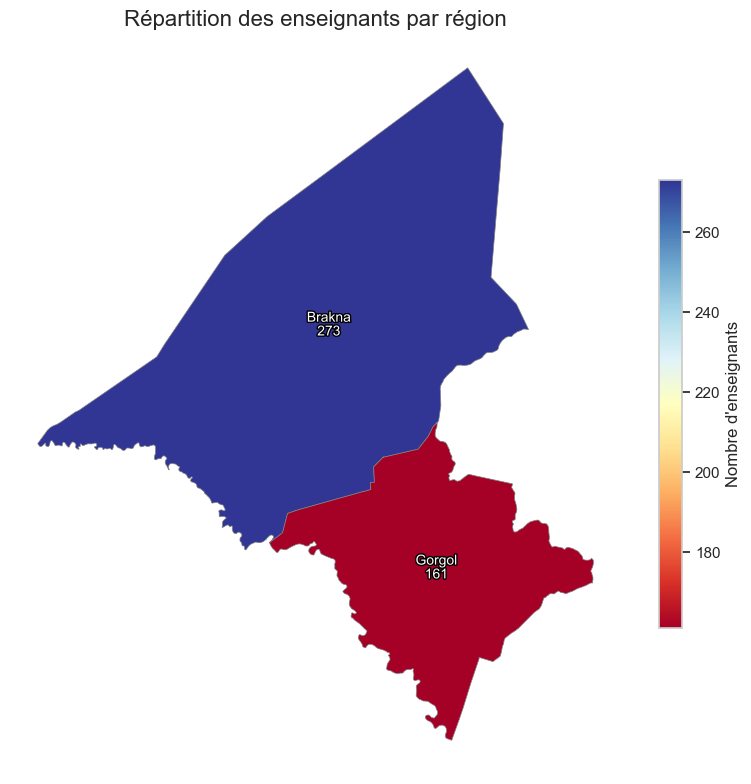

In [298]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as pe

# --- 1) Charger le shapefile des régions ---
shp_path = r"C:\Users\hp\Downloads\DATA CHALLENGE\Quant data before appending\Shape\mrt_admbnda_adm1_ansade_20240327.shp"
gdf = gpd.read_file(shp_path)

# --- 2) Détection automatique de la colonne région dans le shapefile ---
candidats = ['NAME_1','ADM1_EN','ADM1_PCODE','ADM1_NAME','ADM1_FR']
reg_col = next((c for c in candidats if c in gdf.columns), None)
if reg_col is None:
    raise KeyError(f"Aucune colonne région détectée parmi {candidats}")

# --- 3) Recoder vos codes numériques en noms de régions dans df_teacher ---
region_map = {1: 'Brakna', 2: 'Gorgol', 3: 'Tagant'}
df_teacher['region_name'] = df_teacher['Région'].map(region_map)

# --- 4) Compter le nombre de professeurs par région et renommer ---
df_counts = (
    df_teacher['region_name']
      .value_counts()
      .reset_index()
)
df_counts.columns = [reg_col, 'count']

# --- 5) Fusionner et remplir les NaN par 0 ---
gdf[reg_col]       = gdf[reg_col].astype(str)
df_counts[reg_col] = df_counts[reg_col].astype(str)
gdf = gdf.merge(df_counts, on=reg_col, how='left')
gdf['count'] = gdf['count'].fillna(0).astype(int)

# --- 5bis) Ne garder que les régions avec au moins une observation ---
gdf = gdf[gdf['count'] > 0]

# --- 6) Tracé statique avec geopandas + matplotlib (palette bleue) ---
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf.plot(
    column='count',
    cmap='RdYlBu',           # ← palette bleue
    edgecolor='gray',
    linewidth=0.5,
    legend=True,
    legend_kwds={'label': "Nombre d'enseignants", 'shrink': 0.6},
    ax=ax
)
ax.set_title("Répartition des enseignants par région", fontsize=16)
ax.axis('off')

# Ajouter les labels au centre de chaque région
for _, row in gdf.iterrows():
    x, y = row.geometry.centroid.coords[0]
    ax.text(
        x, y,
        f"{row[reg_col]}\n{row['count']}",
        ha='center', va='center',
        fontsize=10, color='white',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")]
    )

plt.tight_layout()
plt.show()

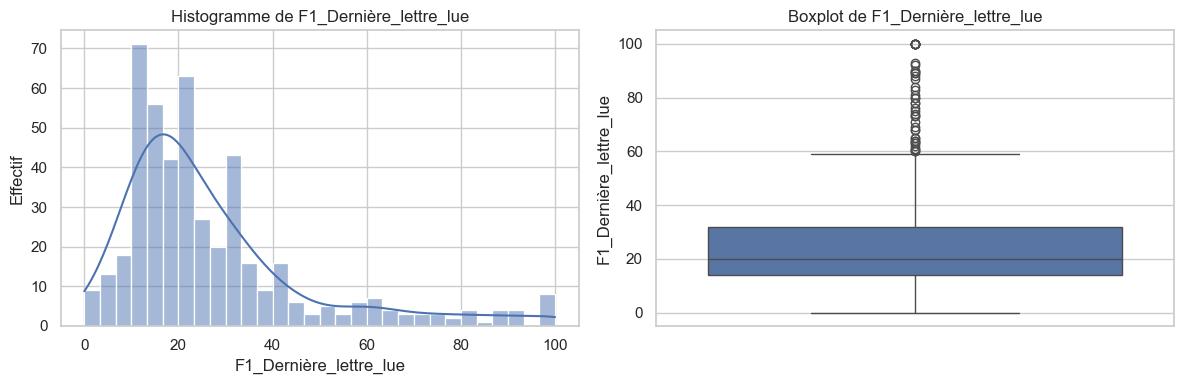

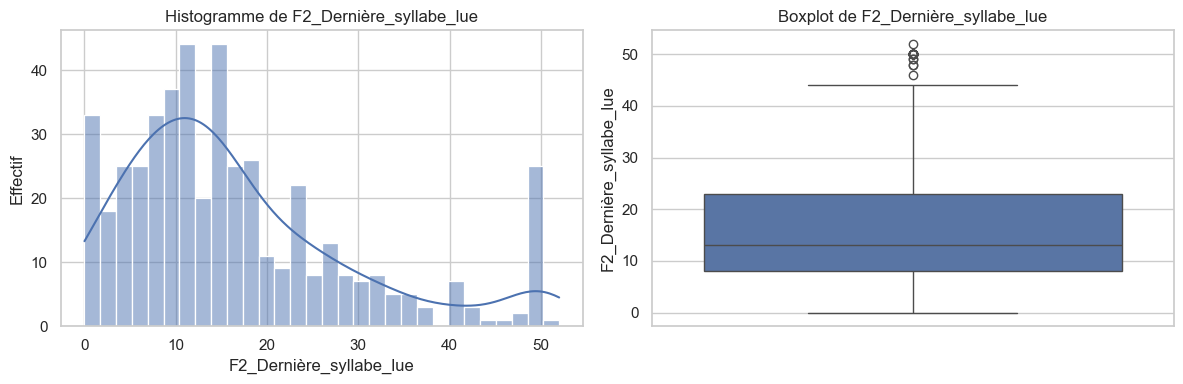

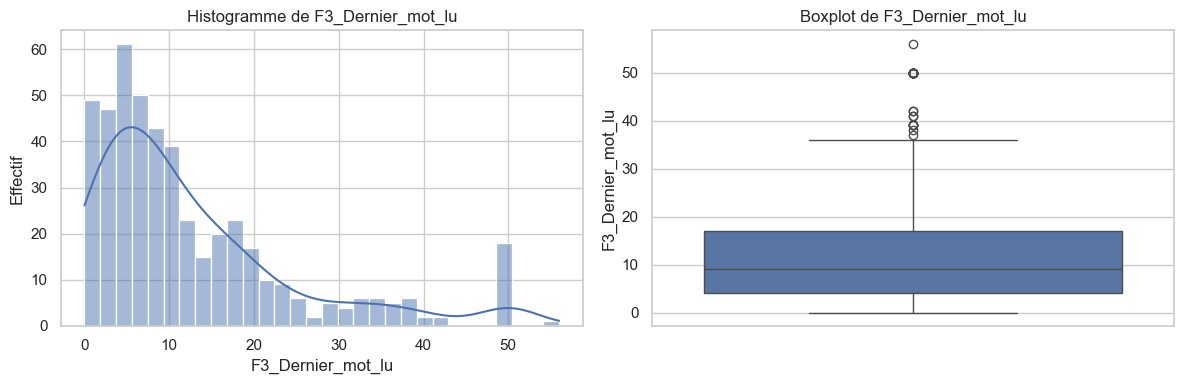

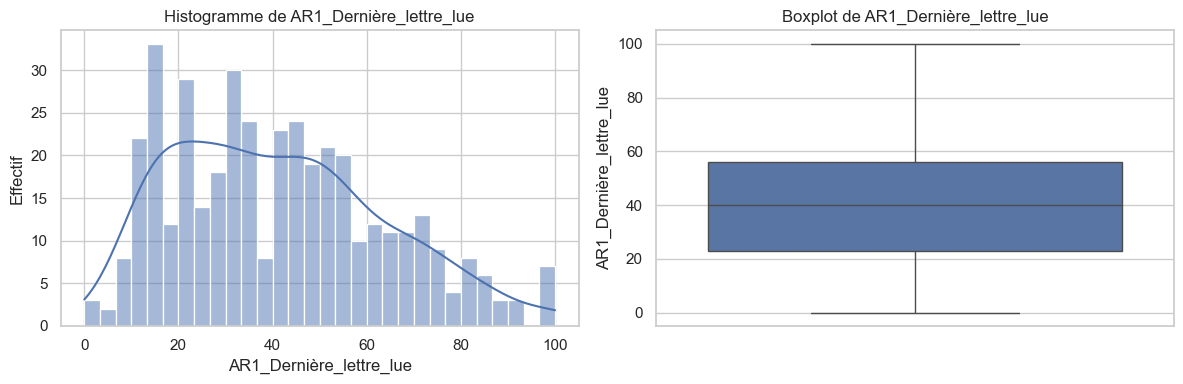

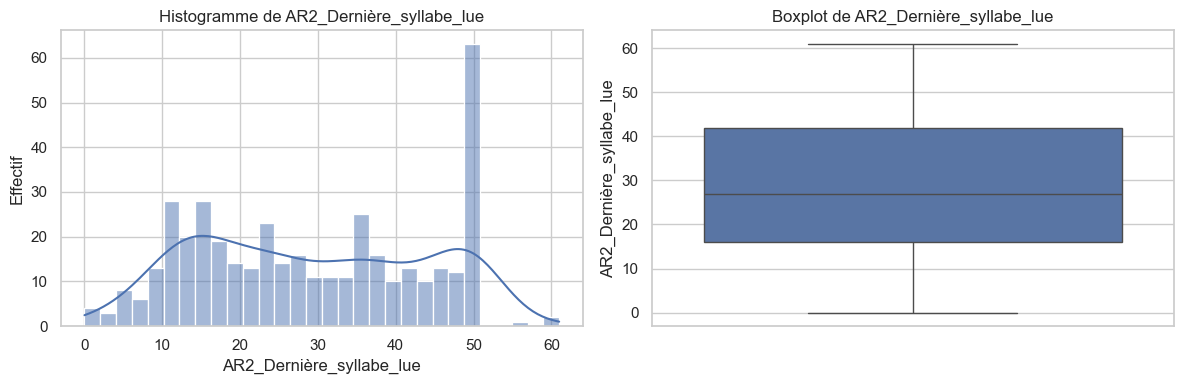

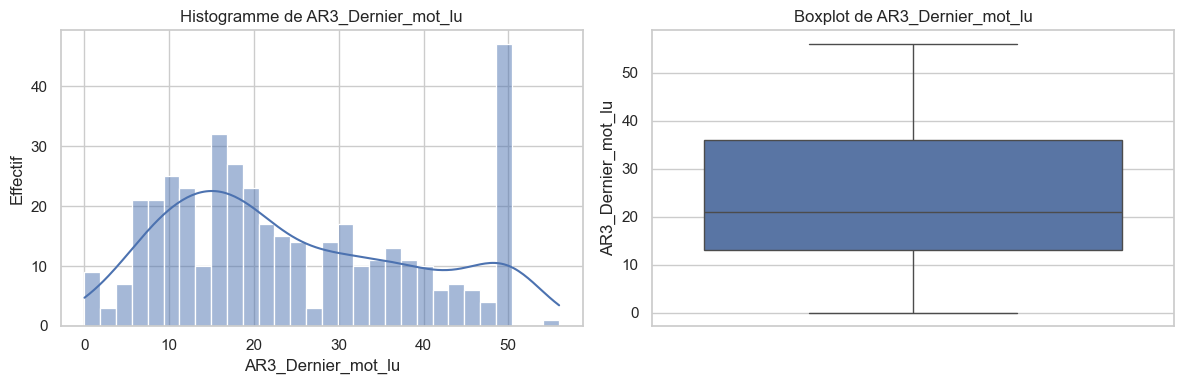

In [304]:
# Bloc 2 : Distribution numérique des scores EGRA
# Objectif : visualiser la distribution des performances de lecture et repérer d’éventuelles valeurs aberrantes.

import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des principales variables numériques de performance
num_vars = [
    'F1_Dernière_lettre_lue',
    'F2_Dernière_syllabe_lue',
    'F3_Dernier_mot_lu',
    'AR1_Dernière_lettre_lue',
    'AR2_Dernière_syllabe_lue',
    'AR3_Dernier_mot_lu'
]

sns.set(style="whitegrid")
for col in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    # Histogramme
    sns.histplot(data=df_egra_student, x=col, bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogramme de {col}")
    axes[0].set_ylabel("Effectif")
    axes[0].set_xlabel(col)
    # Boxplot (détection des outliers)
    sns.boxplot(data=df_egra_student, y=col, ax=axes[1], orient="v")
    axes[1].set_title(f"Boxplot de {col}")
    axes[1].set_ylabel(col)
    plt.tight_layout()
    plt.show()


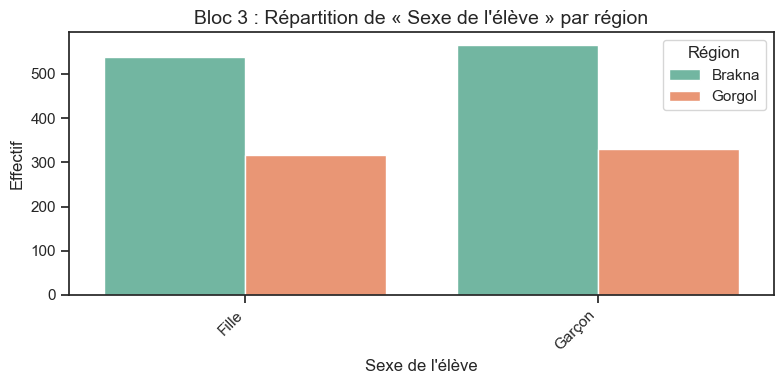

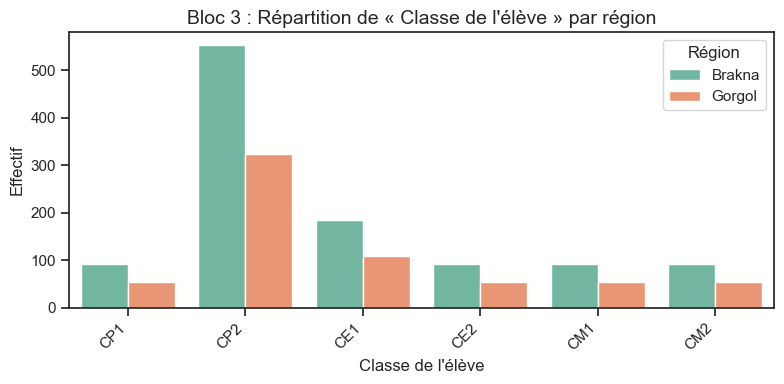

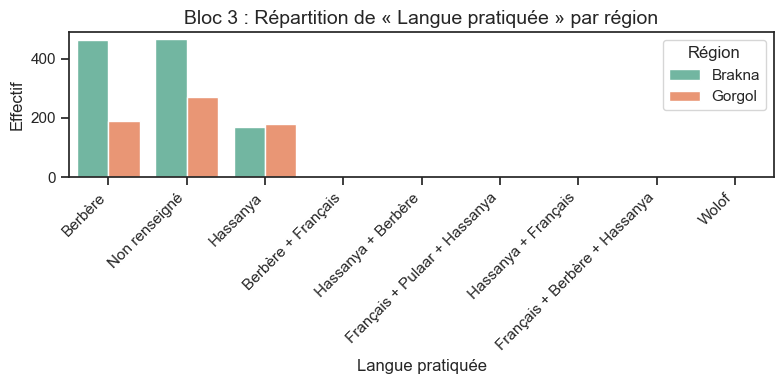

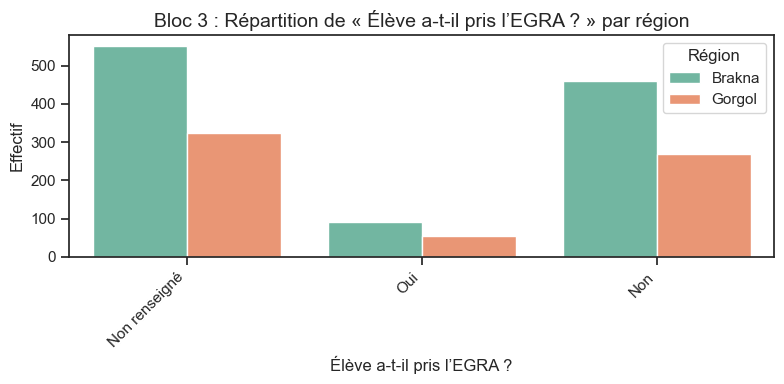

In [314]:
# --- 2) Dictionnaires de recodage complets ---
sexe_map = {
    0: "Fille",
    1: "Garçon"
}

classe_map = {
    1: "CP1",
    2: "CP2",
    3: "CE1",
    4: "CE2",
    5: "CM1",
    6: "CM2"
}

# On passe en str car il y a des combinaisons
langue_map = {
    "1":       "Français",
    "2":       "Berbère",
    "3":       "Hassanya",
    "4":       "Pulaar",
    "5":       "Wolof",
    "6":       "Soninke",
    "2 1":     "Berbère + Français",
    "3 2":     "Hassanya + Berbère",
    "3 1":     "Hassanya + Français",
    "1 4 3":   "Français + Pulaar + Hassanya",
    "1 2 3":   "Français + Berbère + Hassanya"
}

egra_map = {
    0: "Non",
    1: "Oui"
}

# --- 3) Application des recodages ---
df["Sexe_lbl"]       = df["Sexe_élève"].map(sexe_map)
df["Classe_lbl"]     = df["Classe_élève"].map(classe_map)
df["Langue_lbl"]     = df["Langue_pratiquée"].astype(str).map(langue_map).fillna("Non renseigné")
df["Prend_EGRA_lbl"] = df["Élève_prend_EGRA"].map(egra_map).fillna("Non renseigné")

# --- 4) Vérifier qu’aucune modalité n’est oubliée ---
for orig, new, mapping in [
    ("Sexe_élève",           "Sexe_lbl",       sexe_map),
    ("Classe_élève",         "Classe_lbl",     classe_map),
    ("Langue_pratiquée",     "Langue_lbl",     langue_map),
    ("Élève_prend_EGRA",     "Prend_EGRA_lbl", egra_map),
]:
    missing = df.loc[df[new].isna(), orig].unique()
    if len(missing):
        print(f"⚠️ Codes non recodés pour {orig} : {missing}")


# --- 4) Relancer votre countplot en utilisant les colonnes _lbl ---
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", palette="Set2")

for col, title in [
    ("Sexe_lbl",       "Sexe de l'élève"),
    ("Classe_lbl",     "Classe de l'élève"),
    ("Langue_lbl",     "Langue pratiquée"),
    ("Prend_EGRA_lbl", "Élève a-t-il pris l’EGRA ?")
]:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df,
        x=col,
        hue="region_name",
        dodge=True,
        order=df[col].dropna().unique()
    )
    ax.set_title(f"Bloc 3 : Répartition de « {title} » par région", fontsize=14)
    ax.set_xlabel(title)
    ax.set_ylabel("Effectif")
    ax.legend(title="Région", loc="upper right")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


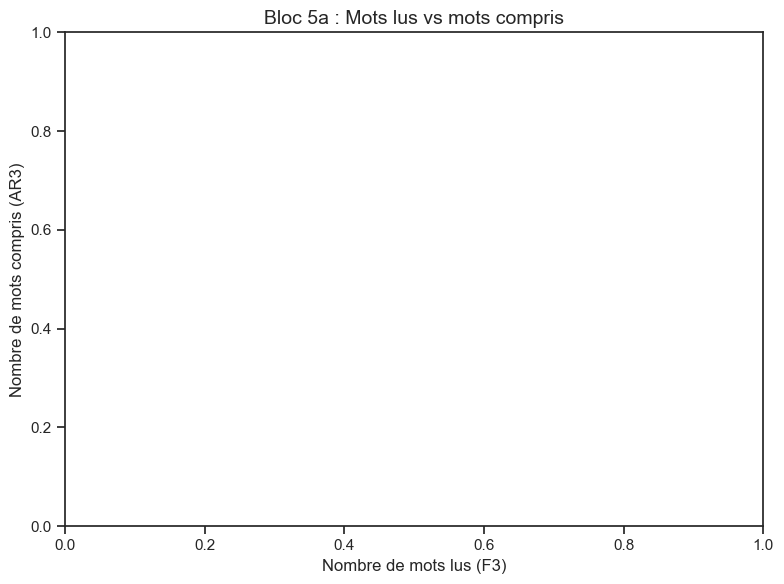

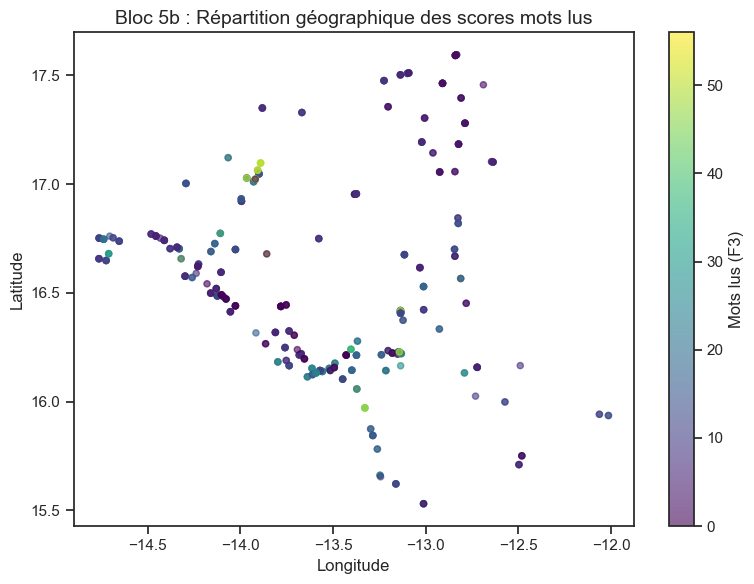

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

# On travaille sur le DataFrame recodé avec la colonne 'region_name'
df = df_egra_student.copy()
# (veillez à l'avoir recodée en amont)

# --- 5a) Scatter F3 vs AR3 avec légende Seaborn intégrée ---
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=df,
    x='F3_Dernier_mot_lu',
    y='AR3_Dernier_mot_lu',
    hue='region_name',
    palette="Set1",
    s=60,
    alpha=0.7,
    legend='brief'   # laisse Seaborn créer la légende
)
ax.set_title("Bloc 5a : Mots lus vs mots compris", fontsize=14)
ax.set_xlabel("Nombre de mots lus (F3)")
ax.set_ylabel("Nombre de mots compris (AR3)")
# Plus besoin de plt.legend() explicite
plt.tight_layout()
plt.show()


# --- 5b) Carte ponctuelle des scores F3 ---
if {'GPS_Longitude','GPS_Latitude','F3_Dernier_mot_lu'}.issubset(df.columns):
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(
        df['GPS_Longitude'],
        df['GPS_Latitude'],
        c=df['F3_Dernier_mot_lu'],
        cmap='viridis',
        s=20,
        alpha=0.6
    )
    plt.colorbar(sc, label="Mots lus (F3)")
    plt.title("Bloc 5b : Répartition géographique des scores mots lus", fontsize=14)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()
else:
    print("Données GPS manquantes, carte ponctuelle non tracée.")

# Fusion des jeux de données


In [504]:
import numpy as np
import pandas as pd

# 0. Copier votre jeu egra_student
df_egra_filtered = cleaned_datasets['egra_student'].copy()

# 1. Filtrer les élèves ayant participé à l’EGRA (Yes uniquement)
new_egra_col = 'egra_student'
if new_egra_col not in df_egra_filtered.columns:
    raise KeyError(f"Colonne '{new_egra_col}' introuvable dans egra_student")

# Diagnostique rapide
print(f"Valeurs uniques dans '{new_egra_col}' :")
print(df_egra_filtered[new_egra_col].value_counts(dropna=False))
print("-" * 50)

# Créer la colonne binaire
vals = df_egra_filtered[new_egra_col]
mask = (
    (vals == 1) |
    (vals == '1') |
    (vals.astype(str).str.lower() == 'yes')
)
df_egra_yes = df_egra_filtered[mask].copy()
print(f"Nombre d'élèves EGRA-Yes avant fusion : {len(df_egra_yes)}")  # doit être 146
if df_egra_yes.empty:
    raise ValueError("Aucun élève EGRA-Yes trouvé !")

# 2. Mettre à jour cleaned_datasets pour démarrer la fusion
cleaned_datasets['egra_student'] = df_egra_yes

fusion_keys = {
    'egra_student': ['region','department','commune','school'],
    'parent':       ['region','department','commune','school'],
    'director':     ['region','department','commune','school'],
    'cook':         ['region','department','commune','school'],
}

# 1) Préparer la table principale
merged_df = df_egra_yes.copy()

# 2) Pour chaque table auxiliaire, drop_duplicates puis merge
for other in ['parent','director','cook']:
    keys = fusion_keys[other]
    df_other = cleaned_datasets[other]

    # Ne garder qu'une seule ligne par clé
    df_other_unique = df_other.drop_duplicates(subset=keys)
    print(f"{other} réduit à {df_other_unique.shape[0]} lignes uniques.")

    # Merge en left join
    merged_df = pd.merge(
        merged_df,
        df_other_unique,
        on=keys,
        how='left',
        suffixes=('','_'+other)
    )
    print(f"Après fusion {other} → {merged_df.shape[0]} lignes, {merged_df.shape[1]} colonnes")

# 3) Nettoyage des colonnes d'identification
id_cols = [
    'start','today','team_lead','enum_name','gps',
    '_v1','_v2','_v3','_v4','instanceID','instanceName',
    'add_info','add_info2','egra_participation'
]
to_drop = [c for c in id_cols if c in merged_df.columns]
merged_df.drop(columns=to_drop, inplace=True)

print(f"\nDataset final : {merged_df.shape[0]} lignes (doit être 146).")



Valeurs uniques dans 'egra_student' :
egra_student
1    146
0      0
Name: count, dtype: int64
--------------------------------------------------
Nombre d'élèves EGRA-Yes avant fusion : 146
parent réduit à 146 lignes uniques.
Après fusion parent → 146 lignes, 304 colonnes
director réduit à 146 lignes uniques.
Après fusion director → 146 lignes, 641 colonnes
cook réduit à 146 lignes uniques.
Après fusion cook → 146 lignes, 722 colonnes

Dataset final : 146 lignes (doit être 146).


# Construction de l’Indice de Compétence Scolaire (ICS) à partir des données EGRA
L’**Indice de Compétence Scolaire (ICS)** est un indicateur synthétique visant à mesurer les compétences en lecture des élèves du primaire à partir des données EGRA. Il offre une évaluation harmonisée et équitable, particulièrement adaptée au contexte multilingue de la Mauritanie. Cet indice facilite les comparaisons entre élèves, écoles ou régions et constitue un outil d’aide à la décision pour les politiques éducatives.
## 1. Variables EGRA retenues pour l’ICS

L’ICS repose sur cinq domaines-clés, sélectionnés dans la base EGRA :

- **Reconnaissance des lettres** :  
  `F1_Lettres_incorrectes`, `F1_Dernière_lettre_lue`, `F1_Confirmation_nombre_lu`
- **Reconnaissance des syllabes/phonèmes** :  
  `F2_Syllabes_incorrectes`, `F2_Dernière_syllabe_lue`, `F2_Confirmation_nombre_lu`
- **Lecture de mots familiers** :  
  `F3_Mots_incorrects`, `F3_Dernier_mot_lu`, `F3_Confirmation_nombre_lu`
- **Fluidité de lecture** :  
  `F4_Dernier_mot_lu`, `F5_Dernier_mot_lu`, `F4_Mots_incorrects`, `F5_Mots_incorrects`
- **Compréhension de lecture** :  
  `F6_Question1_Fatima` à `F6_Question4_Fatima`

## 2. Normalisation intra-langue des scores
Chaque score est **normalisé** sur une échelle de 0 à 1, **langue par langue** :

$$
x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

Pour les variables d’erreurs (nombre de réponses incorrectes), on procède à une inversion afin qu’un score élevé corresponde à une meilleure performance :

\[
\text{Score corrigé} = \text{Score max théorique} - \text{Nombre d’erreurs}
\]

Cette étape assure la cohérence des indicateurs avant agrégation.

## 3. Pondération des domaines

Les cinq domaines sont pondérés **à parts égales** (20 % chacun) dans le calcul du score final, mais ces poids restent adaptables en fonction du contexte ou d’analyses complémentaires.  
La somme des poids est toujours :

$$
\text{Score corrigé} = \text{Score max théorique} - \text{Nombre d’erreurs}
$$

## 4. Agrégation du score ICS

Le score ICS s’obtient par **moyenne pondérée** des cinq domaines, puis est ramené sur une échelle de 0 à 100 pour une lecture aisée :

$$
\sum_{i=1}^{5} w_i = 1
$$
## 5. Lecture et interprétation de l’ICS

L’ICS permet de classer les élèves selon quatre niveaux de compétence, à ajuster si besoin selon la distribution observée :

- **80 à 100** : Maîtrise avancée
- **60 à 79**  : Compétences de base acquises
- **40 à 59**  : Compétences partiellement acquises
- **Moins de 40** : Compétences non acquises

Ce protocole de construction de l’ICS garantit une mesure fidèle, comparable et juste des compétences en lecture, tout en intégrant la diversité linguistique et pédagogique du terrain mauritanien.


In [570]:
import pandas as pd
import numpy as np
import re
from unidecode import unidecode

def construct_ics(
    df: pd.DataFrame,
    output_stata: str = 'df_egra_student.dta',
    output_parquet: str = 'df_egra_student.parquet'
):
    df_ = df.copy()

    # 1) detect home_language column
    lang_col = 'home_language' if 'home_language' in df_.columns else None
    if lang_col:
        print(f"➔ Grouping by language column: {lang_col!r}")
    else:
        print("⚠️ No 'home_language' column; computing ICS globally.")

    # 2) define domains on raw English names
    domains = {
        'D1_letters':      ('f1_wrong', 'f1_total',   'f1_confirm'),
        'D2_syllables':    ('f2_wrong', 'f2_total',   'f2_confirm'),
        'D3_words':        ('f3_wrong', 'f3_total',   'f3_confirm'),
        'D4_fluency':      ('f4_wrong', 'f4_total',   'f5_wrong', 'f5_total'),
        'D5_comprehension':('f6_q1',    'f6_q2',      'f6_q3',    'f6_q4'),
    }

    # 3) min–max normalizer
    def min_max_norm(s: pd.Series) -> pd.Series:
        mn, mx = s.min(), s.max()
        return (s - mn) / (mx - mn if mx > mn else 1)

    # 4) init domain columns
    for dom in domains:
        df_[dom] = np.nan

    # 5) compute domain scores per group
    if lang_col:
        grp_iter = df_.groupby(lang_col, dropna=False)
    else:
        grp_iter = [('global', df_)]

    for _, sub in grp_iter:
        idx = sub.index
        sub = sub.astype(float, errors='ignore')

        # D1–D3
        for dom in ['D1_letters','D2_syllables','D3_words']:
            wrong, total, conf = domains[dom]
            corr = sub[total] - sub[wrong]
            parts = [
                min_max_norm(corr),
                min_max_norm(sub[total]),
                min_max_norm(sub[conf]),
            ]
            df_.loc[idx, dom] = sum(parts) / 3

        # D4 fluency
        w1, t1, w2, t2 = domains['D4_fluency']
        corr1 = sub[t1] - sub[w1]
        corr2 = sub[t2] - sub[w2]
        parts4 = [
            min_max_norm(corr1),
            min_max_norm(sub[t1]),
            min_max_norm(corr2),
            min_max_norm(sub[t2]),
        ]
        df_.loc[idx, 'D4_fluency'] = sum(parts4) / 4

        # D5 comprehension
        qs = [sub[q] for q in domains['D5_comprehension']]
        norms = [min_max_norm(q) for q in qs]
        df_.loc[idx, 'D5_comprehension'] = pd.concat(norms, axis=1).mean(axis=1, skipna=True)

    # 6) ICS = mean(domains) * 100
    df_['ICS'] = df_[list(domains)].mean(axis=1) * 100

    # 7) level classification
    df_['ICS_level'] = pd.cut(
        df_['ICS'],
        bins=[-1, 40, 60, 80, 100],
        labels=['Not mastered','Partially','Basic','Advanced'],
        include_lowest=True
    )

    # 8) stats printout
    print("\nICS Descriptive Statistics:")
    print(df_['ICS'].describe())
    print("\nCounts by ICS level:")
    print(df_['ICS_level'].value_counts(dropna=False))

    # 9–12) cleanup, rename, export (same as before)…
    def clean_for_stata(txt):
        if pd.isna(txt): return txt
        s = unidecode(str(txt))
        return s.encode('latin-1', errors='replace').decode('latin-1')

    for c in df_.select_dtypes(include=['object','category']):
        df_[c] = df_[c].astype(str).apply(clean_for_stata)

    empty = [c for c in df_.columns if df_[c].isna().all() or df_[c].eq('').all()]
    if empty:
        df_.drop(columns=empty, inplace=True)
        print(f"Dropped empty columns: {empty}")

    def clean_name(n):
        s = re.sub(r'[^0-9A-Za-z_]', '_', n)
        s = re.sub(r'_+', '_', s).strip('_')
        if not re.match(r'^[A-Za-z]', s):
            s = 'v_' + s
        return s[:31] or 'v_invalid'

    df_.columns = [clean_name(c) for c in df_.columns]

    try:
        df_.to_stata(output_stata, write_index=False, version=118)
        print(f"Stata export OK: {output_stata}")
    except ValueError:
        df_.to_stata(output_stata, write_index=False, version=117)
        print(f"Stata v117 export OK: {output_stata}")

    df_.to_parquet(output_parquet, index=False)
    print(f"Parquet export OK: {output_parquet}")

    stats = {
        'ICS_desc': df_['ICS'].describe().to_dict(),
        'level_counts': df_['ICS_level'].value_counts(dropna=False).to_dict()
    }
    return df_, stats

# Now call it without the AttributeError:
df_with_ics, ics_stats = construct_ics(merged_df)


➔ Grouping by language column: 'home_language'

ICS Descriptive Statistics:
count    146.000000
mean      39.973291
std        8.403628
min        0.000000
25%       36.298969
50%       38.759372
75%       42.639644
max       85.684524
Name: ICS, dtype: float64

Counts by ICS level:
ICS_level
Not mastered    76
Partially       64
Basic            5
Advanced         1
Name: count, dtype: int64
Dropped empty columns: ['ethnicity_other', 'home_language_other', 'school_eat_other', 'school_water_other', 'school_water_bad_oth', 'school_wash_type_other', 'home_wash_why', 'home_wash_why_other', 'home_wash_type_other']
Stata export OK: df_egra_student.dta
Parquet export OK: df_egra_student.parquet


## Visualiser la distribution de l'ICS

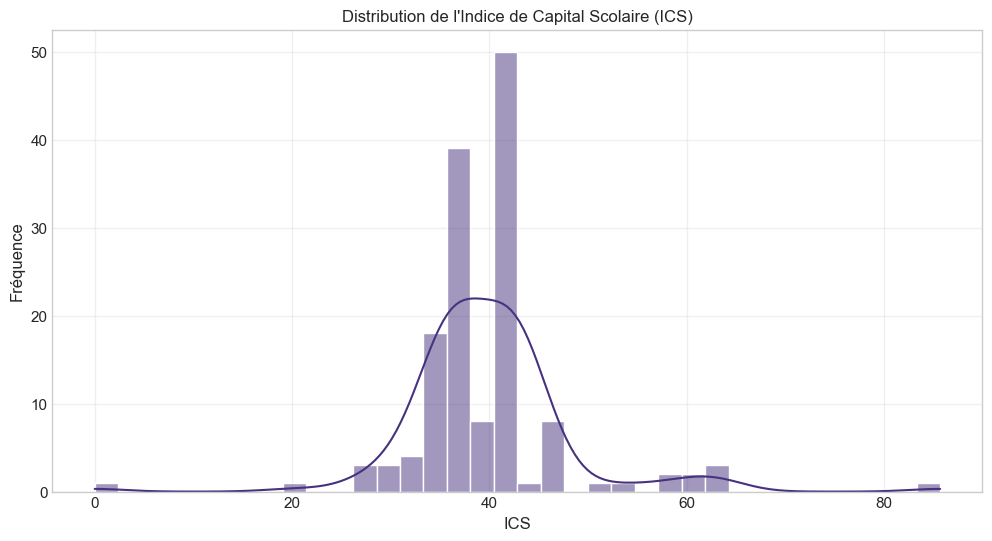

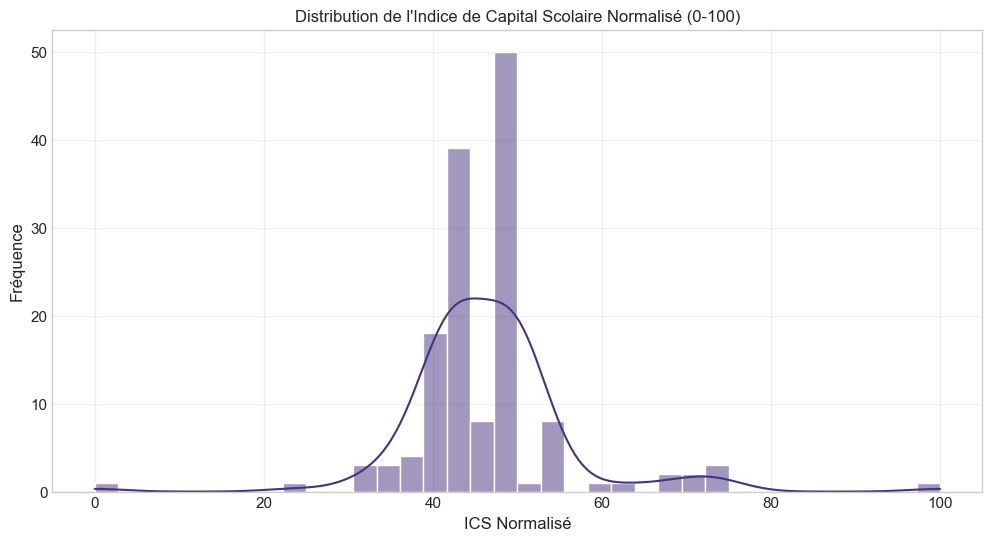

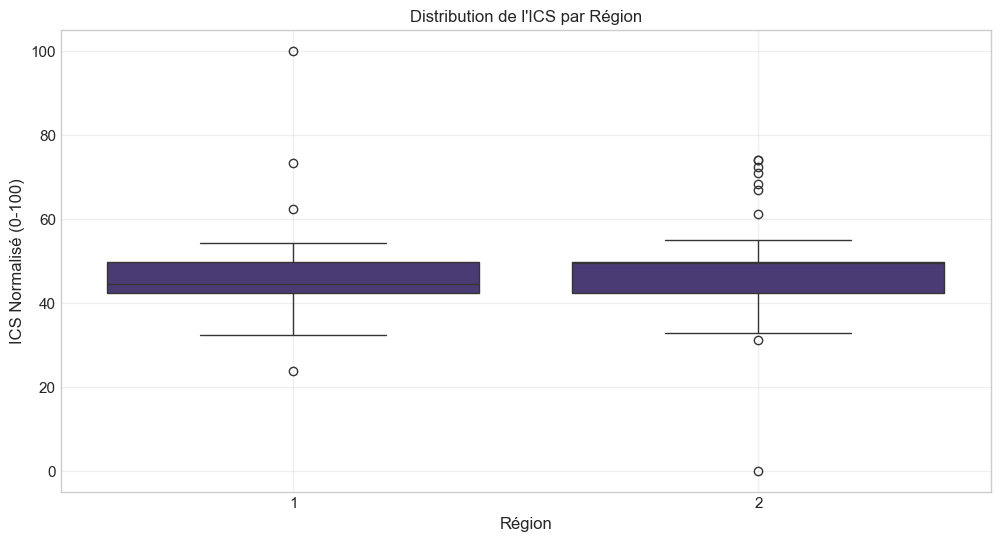


Jeu de données avec ICS sauvegardé à : merged_data_with_ics.csv
Rapport de construction de l'ICS sauvegardé à : ics_construction_report.md


In [575]:
viz_dir=''
# 6) Compute ICS_normalized, classify levels, and visualize distribution

# — Normalize the raw ICS to a 0–100 scale
min_ics = df_with_ics['ICS'].min()
max_ics = df_with_ics['ICS'].max()
if max_ics > min_ics:
    df_with_ics['ICS_normalized'] = 100 * (df_with_ics['ICS'] - min_ics) / (max_ics - min_ics)
else:
    # all values identical → keep raw score
    df_with_ics['ICS_normalized'] = df_with_ics['ICS']

# — Classify into proficiency levels based on the normalized ICS
df_with_ics['ICS_level'] = pd.cut(
    df_with_ics['ICS_normalized'],
    bins=[-0.01, 40, 60, 80, 100],
    labels=['Not mastered', 'Partially mastered', 'Basic proficiency', 'Advanced mastery'],
    include_lowest=True
)


# Visualiser la distribution de l'ICS
if 'ICS' in df_with_ics.columns and df_with_ics['ICS'].notna().any():
    plt.figure(figsize=(12, 6))
    sns.histplot(df_with_ics['ICS'].dropna(), kde=True)
    plt.title('Distribution de l\'Indice de Capital Scolaire (ICS)')
    plt.xlabel('ICS')
    plt.ylabel('Fréquence')
    plt.grid(True, alpha=0.3)
    ics_hist_path = os.path.join(viz_dir, 'ics_distribution.png')
    plt.savefig(ics_hist_path)
    plt.show()

    # Visualiser la distribution de l'ICS normalisé
    plt.figure(figsize=(12, 6))
    sns.histplot(df_with_ics['ICS_normalized'].dropna(), kde=True)
    plt.title('Distribution de l\'Indice de Capital Scolaire Normalisé (0-100)')
    plt.xlabel('ICS Normalisé')
    plt.ylabel('Fréquence')
    plt.grid(True, alpha=0.3)
    ics_norm_hist_path = os.path.join(viz_dir, 'ics_normalized_distribution.png')
    plt.savefig(ics_norm_hist_path)
    plt.show()

    # Visualiser l'ICS par région
    if 'region' in df_with_ics.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='region', y='ICS_normalized', data=df_with_ics)
        plt.title('Distribution de l\'ICS par Région')
        plt.xlabel('Région')
        plt.ylabel('ICS Normalisé (0-100)')
        plt.grid(True, alpha=0.3)
        ics_region_path = os.path.join(viz_dir, 'ics_by_region.png')
        plt.savefig(ics_region_path)
        plt.show()
else:
    print("Impossible de créer les graphiques de distribution car l'ICS n'a pas été calculé.")

# Sauvegarder le DataFrame avec l'ICS
ics_data_path = os.path.join(work_dir, 'merged_data_with_ics.csv')
df_with_ics.to_csv(ics_data_path, index=False)
print(f"\nJeu de données avec ICS sauvegardé à : {ics_data_path}")

# Créer un rapport sur la construction de l'ICS
ics_report_path = os.path.join(work_dir, 'ics_construction_report.md')
with open(ics_report_path, 'w') as f:
    f.write("# Rapport de Construction de l'Indice de Capital Scolaire (ICS)\n\n")
    f.write("## Méthodologie\n\n")
    f.write("L'Indice de Capital Scolaire (ICS) a été construit en combinant plusieurs composantes :\n\n")
    f.write("1. **Compétences en lecture (EGRA)** : Scores des tests EGRA\n")
    f.write("2. **Niveau d'éducation des parents** : Niveau d'éducation moyen des parents\n")
    f.write("3. **Disponibilité de livres à la maison** : Accès aux livres et matériels de lecture\n")
    f.write("4. **Facteurs socio-économiques** : Indicateurs du statut socio-économique\n\n")

    f.write("## Processus de construction\n\n")
    f.write("1. Identification des variables pertinentes pour chaque composante\n")
    f.write("2. Calcul de scores moyens pour chaque composante\n")
    f.write("3. Standardisation des composantes (z-scores)\n")
    f.write("4. Calcul de l'ICS comme moyenne des composantes standardisées\n")
    f.write("5. Normalisation de l'ICS sur une échelle de 0 à 100\n\n")

    if 'ICS' in df_with_ics.columns and df_with_ics['ICS'].notna().any():
        f.write("## Statistiques descriptives de l'ICS\n\n")
        f.write("```\n")
        f.write(df_with_ics['ICS'].describe().to_string())
        f.write("\n```\n\n")

        f.write("## Statistiques descriptives de l'ICS normalisé (0-100)\n\n")
        f.write("```\n")
        f.write(df_with_ics['ICS_normalized'].describe().to_string())
        f.write("\n```\n\n")

        f.write("## Visualisations\n\n")
        f.write("- Distribution de l'ICS : `visualisations/ics_distribution.png`\n")
        f.write("- Distribution de l'ICS normalisé : `visualisations/ics_normalized_distribution.png`\n")
        if 'region' in df_with_ics.columns:
            f.write("- Distribution de l'ICS par région : `visualisations/ics_by_region.png`\n\n")
    else:
        f.write("## Avertissement\n\n")
        f.write("L'ICS n'a pas pu être calculé en raison de l'absence de variables nécessaires dans le jeu de données.\n\n")

    f.write("## Prochaines étapes\n\n")
    f.write("1. Analyse bivariée entre l'ICS et d'autres variables\n")
    f.write("2. Tests statistiques pour identifier les relations significatives\n")
    f.write("3. Sélection des variables dépendantes et indépendantes pour la modélisation\n")

print(f"Rapport de construction de l'ICS sauvegardé à : {ics_report_path}")

# Analyse Bivariée Full merged dataframe avec l'ICS

## Détermine si une variable est catégorielle, ordinale ou continue.

   ### Args:
        series: Série pandas à analyser

   ### Returns:
        str: 'categorical', 'ordinal', ou 'continuous'

## Réalise une analyse bivariée complète entre une variable cible et des variables explicatives.

  ### Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame contenant les variables
    target_var : str
        Nom de la variable cible
    explanatory_vars : list, optional
        Liste des variables explicatives à analyser
    alpha : float, default=0.05
        Seuil de significativité
    viz_dir : str, optional
        Répertoire pour sauvegarder les visualisations

  ### Returns:
    --------
    pandas.DataFrame
        Résultats des tests statistiques
    dict
        Dictionnaire des visualisations générées

In [589]:
def determine_variable_type(series):
    """
    Détermine si une variable est catégorielle, ordinale ou continue.

    Args:
        series: Série pandas à analyser

    Returns:
        str: 'categorical', 'ordinal', ou 'continuous'
    """
    # Convertir en numérique si possible
    if pd.api.types.is_numeric_dtype(series):
        numeric_series = series
    else:
        numeric_series = pd.to_numeric(series, errors='coerce')

    # Si plus de 10 valeurs uniques et au moins 80% sont numériques, considérer comme continue
    unique_count = series.nunique()
    if unique_count > 10 and numeric_series.notna().mean() > 0.8:
        return 'continuous'

    # Si 2-10 valeurs uniques et numériques, considérer comme ordinale
    elif 2 <= unique_count <= 10 and numeric_series.notna().mean() > 0.8:
        return 'ordinal'

    # Sinon, considérer comme catégorielle
    else:
        return 'categorical'

## Analyse bivariée automatisée entre une variable cible et plusieurs explicatives

Cette cellule définit la fonction `bivariate_analysis`, qui réalise une analyse statistique bivariée complète entre une variable cible (par exemple, un score ou un indicateur d’intérêt) et une liste de variables explicatives.  
La fonction détecte automatiquement la nature de chaque variable explicative (continue, ordinale ou catégorielle), applique le test statistique adapté (corrélation de Pearson, Spearman, ou ANOVA), et génère jusqu’à cinq visualisations pertinentes pour explorer les relations.  
Elle retourne un tableau synthétique des résultats (statistiques, p-values) et un dictionnaire des chemins vers les graphiques produits.  
Cet outil permet d’identifier rapidement les liens significatifs et la structure des relations dans vos données, tout en automatisant le reporting graphique.


In [591]:
def bivariate_analysis(df, target_var, explanatory_vars=None, alpha=0.05, viz_dir=None, max_visualizations=5):
    """
    Réalise une analyse bivariée complète entre une variable cible et des variables explicatives,
    avec une limite sur le nombre de visualisations générées.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame contenant les variables
    target_var : str
        Nom de la variable cible
    explanatory_vars : list, optional
        Liste des variables explicatives à analyser
    alpha : float, default=0.05
        Seuil de significativité
    viz_dir : str, optional
        Répertoire pour sauvegarder les visualisations
    max_visualizations : int, default=5
        Nombre maximum de visualisations à générer

    Returns:
    --------
    pandas.DataFrame
        Résultats des tests statistiques
    dict
        Dictionnaire des visualisations générées
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from scipy.stats import pearsonr, spearmanr, f_oneway

    def determine_variable_type(series):
        """Détermine le type de variable (continue, ordinale ou catégorielle)"""
        n_unique = len(series.unique())
        
        if pd.api.types.is_numeric_dtype(series):
            if n_unique <= 10:  # Seuil arbitraire pour les variables ordinales
                return 'ordinal'
            else:
                return 'continuous'
        else:
            return 'categorical'
    
    print(f"\n--- Analyse bivariée avec {target_var} comme variable cible ---")

    # Vérifier que la variable cible existe dans le DataFrame
    if target_var not in df.columns:
        raise ValueError(f"La variable cible '{target_var}' n'existe pas dans le DataFrame.")

    # Si aucune variable explicative n'est spécifiée, utiliser toutes les colonnes sauf la cible
    if explanatory_vars is None:
        explanatory_vars = [col for col in df.columns if col != target_var]

    # Filtrer pour ne garder que les lignes avec la variable cible non manquante
    df_filtered = df[df[target_var].notna()].copy()
    print(f"Nombre d'observations avec {target_var} non manquant : {len(df_filtered)}")

    # Initialiser les résultats
    results = []
    visualizations = {}
    viz_count = 0  # Compteur pour limiter le nombre de visualisations

    # Analyser chaque variable explicative
    for i, var in enumerate(explanatory_vars):
        print(f"Analyse de la variable {i+1}/{len(explanatory_vars)}: {var}")

        # Vérifier si la variable existe et n'est pas entièrement NA
        if var not in df_filtered.columns or df_filtered[var].isna().all():
            results.append({
                'variable': var,
                'type': 'unknown',
                'relationship': 'not_analyzed',
                'reason': 'Variable missing or all NA'
            })
            continue

        # Déterminer le type de variable
        var_type = determine_variable_type(df_filtered[var])

        # Vérifier si une visualisation doit être créée
        create_viz = viz_count < max_visualizations

        # Initialiser le dictionnaire de résultats
        result = {
            'variable': var,
            'type': var_type,
            'relationship': None,
            'test_statistic': None,
            'p_value': None,
            'visualization_path': None
        }

        try:
            # Analyse selon le type de variable
            if var_type == 'continuous':
                # Convertir en numérique
                df_filtered[var] = pd.to_numeric(df_filtered[var], errors='coerce')

                # Supprimer les NA
                df_analysis = df_filtered[[var, target_var]].dropna()

                if len(df_analysis) < 5:
                    result['relationship'] = 'insufficient_data'
                    results.append(result)
                    continue

                # Calculer la corrélation de Pearson
                corr, p_value = pearsonr(df_analysis[var], df_analysis[target_var])

                result['relationship'] = 'correlation'
                result['test_statistic'] = corr
                result['p_value'] = p_value

                # Créer un scatter plot si le compteur le permet
                if create_viz:
                    plt.figure(figsize=(10, 6))
                    sns.scatterplot(x=var, y=target_var, data=df_analysis)
                    plt.title(f'Relation entre {var} et {target_var}')
                    plt.xlabel(var)
                    plt.ylabel(target_var)

                    # Ajouter une ligne de régression
                    sns.regplot(x=var, y=target_var, data=df_analysis, scatter=False, color='red')

                    # Ajouter le coefficient de corrélation et la p-value
                    plt.annotate(f'Corrélation: {corr:.2f}\nP-value: {p_value:.4f}',
                                xy=(0.05, 0.95), xycoords='axes fraction',
                                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

                    # Sauvegarder la figure si un répertoire est spécifié
                    if viz_dir is not None:
                        viz_path = os.path.join(viz_dir, f'scatter_{var}_vs_{target_var}.png')
                        plt.savefig(viz_path)
                        result['visualization_path'] = viz_path
                        visualizations[var] = viz_path

                    plt.show()
                    viz_count += 1

            elif var_type == 'ordinal':
                # Convertir en numérique
                df_filtered[var] = pd.to_numeric(df_filtered[var], errors='coerce')

                # Supprimer les NA
                df_analysis = df_filtered[[var, target_var]].dropna()

                if len(df_analysis) < 5:
                    result['relationship'] = 'insufficient_data'
                    results.append(result)
                    continue

                # Calculer la corrélation de Spearman
                corr, p_value = spearmanr(df_analysis[var], df_analysis[target_var])

                result['relationship'] = 'ordinal_correlation'
                result['test_statistic'] = corr
                result['p_value'] = p_value

                # Créer un box plot si le compteur le permet
                if create_viz:
                    plt.figure(figsize=(12, 6))
                    sns.boxplot(x=var, y=target_var, data=df_analysis)
                    plt.title(f'Distribution de {target_var} par {var}')
                    plt.xlabel(var)
                    plt.ylabel(target_var)

                    # Ajouter le coefficient de corrélation et la p-value
                    plt.annotate(f'Corrélation de Spearman: {corr:.2f}\nP-value: {p_value:.4f}',
                                xy=(0.05, 0.95), xycoords='axes fraction',
                                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

                    # Sauvegarder la figure si un répertoire est spécifié
                    if viz_dir is not None:
                        viz_path = os.path.join(viz_dir, f'boxplot_{var}_vs_{target_var}.png')
                        plt.savefig(viz_path)
                        result['visualization_path'] = viz_path
                        visualizations[var] = viz_path

                    plt.show()
                    viz_count += 1

            elif var_type == 'categorical':
                # Convertir en chaîne de caractères
                df_filtered[var] = df_filtered[var].astype(str)

                # Supprimer les NA
                df_analysis = df_filtered[[var, target_var]].dropna()

                if len(df_analysis) < 5:
                    result['relationship'] = 'insufficient_data'
                    results.append(result)
                    continue

                # Effectuer une ANOVA
                categories = df_analysis[var].unique()

                if len(categories) < 2:
                    result['relationship'] = 'insufficient_categories'
                    results.append(result)
                    continue

                # Préparer les données pour ANOVA
                anova_data = [df_analysis[df_analysis[var] == cat][target_var].values for cat in categories]

                # Effectuer l'ANOVA
                try:
                    f_stat, p_value = f_oneway(*anova_data)

                    result['relationship'] = 'anova'
                    result['test_statistic'] = f_stat
                    result['p_value'] = p_value
                except:
                    # En cas d'erreur (par exemple, un groupe avec une seule observation)
                    result['relationship'] = 'error_in_anova'
                    result['reason'] = 'Error in ANOVA calculation'
                    results.append(result)
                    continue

                # Créer un box plot si le compteur le permet
                if create_viz:
                    plt.figure(figsize=(12, 6))
                    sns.boxplot(x=var, y=target_var, data=df_analysis)
                    plt.title(f'Distribution de {target_var} par {var}')
                    plt.xlabel(var)
                    plt.ylabel(target_var)
                    plt.xticks(rotation=45, ha='right')

                    # Ajouter la statistique F et la p-value
                    plt.annotate(f'F-statistic: {f_stat:.2f}\nP-value: {p_value:.4f}',
                                xy=(0.05, 0.95), xycoords='axes fraction',
                                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

                    # Sauvegarder la figure si un répertoire est spécifié
                    if viz_dir is not None:
                        viz_path = os.path.join(viz_dir, f'boxplot_cat_{var}_vs_{target_var}.png')
                        plt.savefig(viz_path)
                        result['visualization_path'] = viz_path
                        visualizations[var] = viz_path

                    plt.show()
                    viz_count += 1

        except Exception as e:
            result['relationship'] = 'error'
            result['reason'] = str(e)

        results.append(result)

    # Convertir les résultats en DataFrame
    results_df = pd.DataFrame(results)

    return results_df, visualizations

## Rapport détaillé de l’analyse bivariée et sélection des variables explicatives

Cette fonction `create_analysis_report` génère un rapport textuel complet de l’analyse bivariée menée entre la variable cible et l’ensemble des variables explicatives.  
Elle affiche :
- un résumé global du nombre de variables significatives,
- des tableaux récapitulatifs par type de variable (continue, ordinale, catégorielle),
- le détail des tests statistiques effectués (corrélations, ANOVA, etc.),
- les variables n’ayant pas pu être analysées,
- ainsi qu’une synthèse opérationnelle recommandant les variables à retenir comme candidates indépendantes pour la modélisation.

Ce rapport facilite l’interprétation des résultats statistiques et oriente les prochaines étapes d’analyse multivariée ou de modélisation prédictive.


In [593]:
def create_analysis_report(results, target_var):
    """
    Prints full bivariate analysis results to console, with no limits on the number of variables.
    
    Parameters:
    -----------
    results : pandas.DataFrame
        DataFrame of analysis results
    target_var : str
        Name of the target variable
    """
    # Calculate significant variables
    significant_vars = results[(results['p_value'].notna()) & (results['p_value'] < 0.05) &
    (results['p_value'] > 0) ]
    
    print(f"# Analyse Bivariée avec {target_var}")
    print("\n")

    # Print summary
    print("## Résumé")
    print(f"- Nombre total de variables analysées: {len(results)}")
    print(f"- Variables avec relation significative (p < 0.05): {len(significant_vars)}")
    print("\n")

    # Print significant continuous variables
    cont_sig_vars = significant_vars[significant_vars['type'] == 'continuous']
    print("### Variables continues significatives")
    if not cont_sig_vars.empty:
        print("| Variable | Corrélation | P-value |")
        print("|----------|-------------|--------|")
        for _, row in cont_sig_vars.sort_values('test_statistic', key=abs, ascending=False).iterrows():
            test_stat = row.get('test_statistic')
            p_val = row.get('p_value')
            test_stat_str = f"{test_stat:.3f}" if test_stat is not None else "N/A"
            p_val_str = f"{p_val:.4f}" if p_val is not None else "N/A"
            print(f"| {row['variable']} | {test_stat_str} | {p_val_str} |")
    else:
        print("Aucune variable continue significative trouvée.")
    print("\n")

    # Print significant ordinal variables
    ord_sig_vars = significant_vars[significant_vars['type'] == 'ordinal']
    print("### Variables ordinales significatives")
    if not ord_sig_vars.empty:
        print("| Variable | Corrélation de Spearman | P-value |")
        print("|----------|-----------------------|--------|")
        for _, row in ord_sig_vars.sort_values('test_statistic', key=abs, ascending=False).iterrows():
            test_stat = row.get('test_statistic')
            p_val = row.get('p_value')
            test_stat_str = f"{test_stat:.3f}" if test_stat is not None else "N/A"
            p_val_str = f"{p_val:.4f}" if p_val is not None else "N/A"
            print(f"| {row['variable']} | {test_stat_str} | {p_val_str} |")
    else:
        print("Aucune variable ordinale significative trouvée.")
    print("\n")

    # Print significant categorical variables
    cat_sig_vars = significant_vars[significant_vars['type'] == 'categorical']
    print("### Variables catégorielles significatives")
    if not cat_sig_vars.empty:
        print("| Variable | F-statistic | P-value |")
        print("|----------|-------------|--------|")
        for _, row in cat_sig_vars.sort_values('test_statistic', key=abs, ascending=False).iterrows():
            test_stat = row.get('test_statistic')
            p_val = row.get('p_value')
            test_stat_str = f"{test_stat:.3f}" if test_stat is not None else "N/A"
            p_val_str = f"{p_val:.4f}" if p_val is not None else "N/A"
            print(f"| {row['variable']} | {test_stat_str} | {p_val_str} |")
    else:
        print("Aucune variable catégorielle significative trouvée.")
    print("\n")

    # Print detailed results section
    print("## Détails des résultats")
    print("\n")

    # Group by variable type
    continuous_vars = results[results['type'] == 'continuous']
    ordinal_vars = results[results['type'] == 'ordinal']
    categorical_vars = results[results['type'] == 'categorical']
    other_vars = results[~results['type'].isin(['continuous', 'ordinal', 'categorical'])]

    # Print all continuous variables
    print("### Variables continues")
    if not continuous_vars.empty:
        print("| Variable | Corrélation | P-value | Significatif |")
        print("|----------|-------------|---------|-------------|")
        for _, row in continuous_vars.sort_values('test_statistic', key=abs, ascending=False).iterrows():
            sig = "Oui" if row.get('p_value') is not None and row.get('p_value') < 0.05 and row.get('p_value') > 0 else "Non"
            test_stat = row.get('test_statistic')
            p_val = row.get('p_value')
            test_stat_str = f"{test_stat:.3f}" if test_stat is not None else "N/A"
            p_val_str = f"{p_val:.4f}" if p_val is not None else "N/A"
            print(f"| {row['variable']} | {test_stat_str} | {p_val_str} | {sig} |")
    else:
        print("Aucune variable continue analysée.")
    print("\n")

    # Print all ordinal variables
    print("### Variables ordinales")
    if not ordinal_vars.empty:
        print("| Variable | Corrélation de Spearman | P-value | Significatif |")
        print("|----------|------------------------|---------|-------------|")
        for _, row in ordinal_vars.sort_values('test_statistic', key=abs, ascending=False).iterrows():
            sig = "Oui" if row.get('p_value') is not None and row.get('p_value') < 0.05 else "Non"
            test_stat = row.get('test_statistic')
            p_val = row.get('p_value')
            test_stat_str = f"{test_stat:.3f}" if test_stat is not None else "N/A"
            p_val_str = f"{p_val:.4f}" if p_val is not None else "N/A"
            print(f"| {row['variable']} | {test_stat_str} | {p_val_str} | {sig} |")
    else:
        print("Aucune variable ordinale analysée.")
    print("\n")

    # Print all categorical variables
    print("### Variables catégorielles")
    if not categorical_vars.empty:
        print("| Variable | F-statistic | P-value | Significatif |")
        print("|----------|-------------|---------|-------------|")
        for _, row in categorical_vars.sort_values('test_statistic', key=abs, ascending=False).iterrows():
            sig = "Oui" if row.get('p_value') is not None and row.get('p_value') < 0.05 and row.get('p_value') > 0 else "Non"
            test_stat = row.get('test_statistic')
            p_val = row.get('p_value')
            test_stat_str = f"{test_stat:.3f}" if test_stat is not None else "N/A"
            p_val_str = f"{p_val:.4f}" if p_val is not None else "N/A"
            print(f"| {row['variable']} | {test_stat_str} | {p_val_str} | {sig} |")
    else:
        print("Aucune variable catégorielle analysée.")
    print("\n")

    # Print variables with errors
    print("### Variables non analysées ou avec erreurs")
    if not other_vars.empty:
        print("| Variable | Raison |")
        print("|----------|-------|")
        for _, row in other_vars.iterrows():
            print(f"| {row['variable']} | {row.get('reason', 'Non spécifiée')} |")
    else:
        print("Toutes les variables ont été analysées avec succès.")
    print("\n")

    # Print conclusion and recommendations
    print("## Conclusion et recommandations")
    print("\n")
    
    print("### Variables potentiellement dépendantes")
    print(f"L'{target_var} peut être considéré comme une variable dépendante pour modéliser les facteurs qui influencent le capital scolaire des élèves.")
    print("\n")

    print("### Variables indépendantes recommandées")
    if not significant_vars.empty:
        print("Basé sur l'analyse bivariée, les variables suivantes sont recommandées comme variables indépendantes potentielles pour le modèle :")
        print("\n")
        for _, row in significant_vars.sort_values('p_value').head(10).iterrows():  # Top 10 variables les plus significatives
            var_type = row.get('type', 'unknown')
            test_stat = row.get('test_statistic')
            p_val = row.get('p_value')
            test_stat_str = f"{test_stat:.3f}" if test_stat is not None else "N/A"
            p_val_str = f"{p_val:.4f}" if p_val is not None else "N/A"

            if var_type == 'continuous':
                relation_type = "corrélation"
            elif var_type == 'ordinal':
                relation_type = "corrélation de Spearman"
            elif var_type == 'categorical':
                relation_type = "ANOVA (F-statistic)"
            else:
                relation_type = "relation"

            print(f"- **{row['variable']}** : {relation_type} = {test_stat_str}, p-value = {p_val_str}")
    else:
        print(f"Aucune variable significativement liée à {target_var} n'a été identifiée. Il est recommandé d'explorer d'autres variables ou d'utiliser des méthodes d'analyse plus avancées.")
    print("\n")

    print("### Prochaines étapes")
    print("1. Vérifier la multicolinéarité entre les variables indépendantes sélectionnées")
    print("2. Effectuer une analyse multivariée pour confirmer l'importance des variables")
    print("3. Construire et évaluer différents modèles prédictifs")
    print("4. Valider les modèles avec des techniques de validation croisée")

## Crée un rapport des variables recommandées pour la modélisation.



## Exécuter l'analyse bivariée


--- Exécution de l'analyse bivariée ---

--- Analyse bivariée avec ICS_normalized comme variable cible ---
Nombre d'observations avec ICS_normalized non manquant : 146
Analyse de la variable 1/707: region


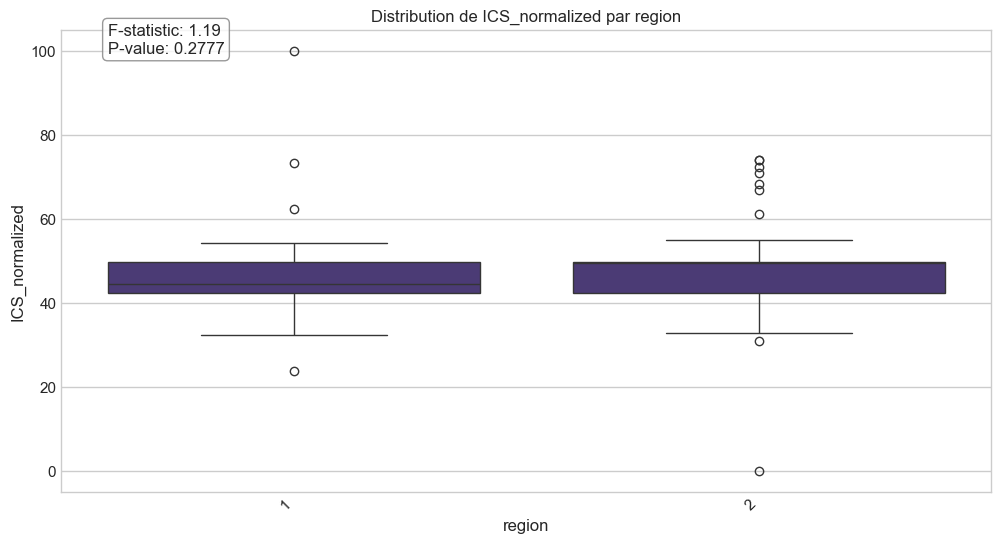

Analyse de la variable 2/707: department


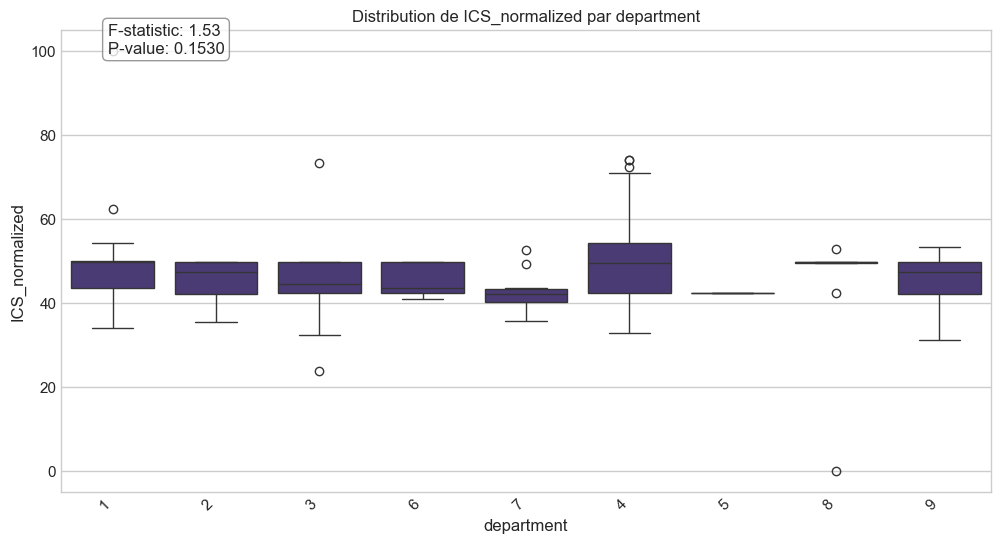

Analyse de la variable 3/707: commune


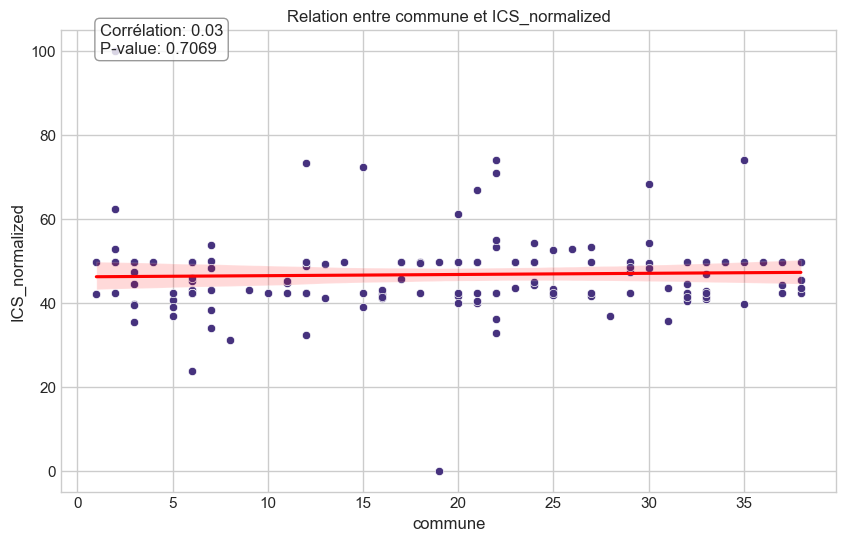

Analyse de la variable 4/707: school


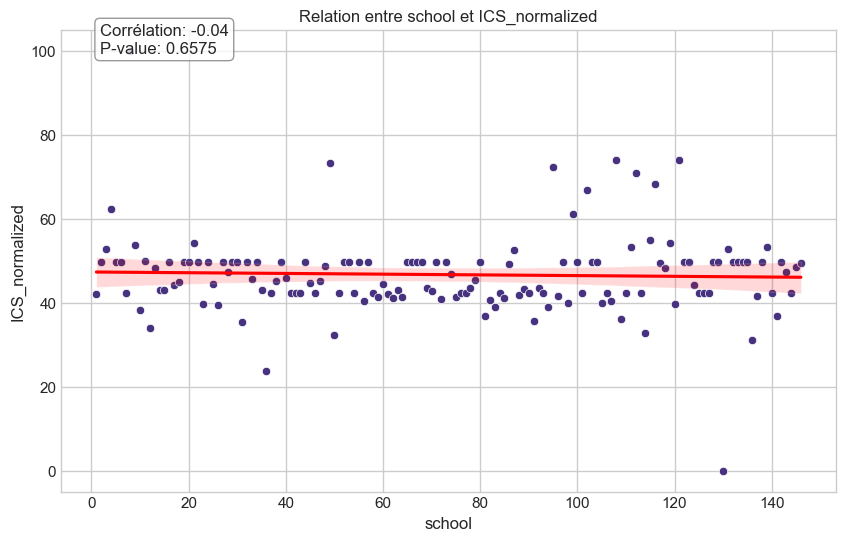

Analyse de la variable 5/707: gender


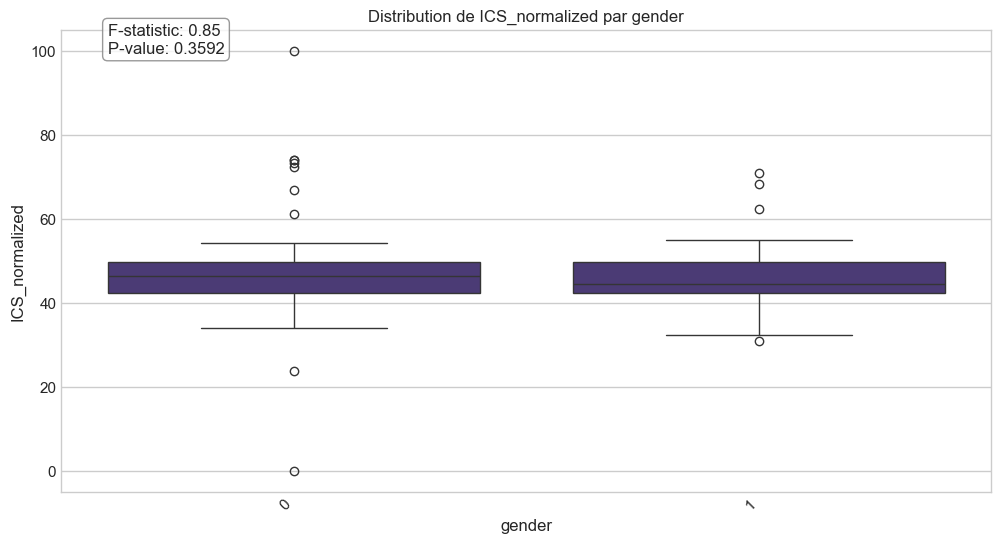

Analyse de la variable 6/707: grade_student
Analyse de la variable 7/707: egra_student
Analyse de la variable 8/707: consent
Analyse de la variable 9/707: egra_random
Analyse de la variable 10/707: f1_wrong
Analyse de la variable 11/707: f1_total
Analyse de la variable 12/707: f1_end_early
Analyse de la variable 13/707: f1_end_early_time
Analyse de la variable 14/707: f1_confirm
Analyse de la variable 15/707: f2_wrong
Analyse de la variable 16/707: f2_total
Analyse de la variable 17/707: f2_end_early
Analyse de la variable 18/707: f2_end_early_time
Analyse de la variable 19/707: f2_confirm
Analyse de la variable 20/707: f3_wrong
Analyse de la variable 21/707: f3_total
Analyse de la variable 22/707: f3_end_early
Analyse de la variable 23/707: f3_end_early_time
Analyse de la variable 24/707: f3_confirm
Analyse de la variable 25/707: f4_wrong
Analyse de la variable 26/707: f4_total
Analyse de la variable 27/707: f4_end_early
Analyse de la variable 28/707: f4_end_early_time
Analyse de la v

In [595]:
# Exécuter l'analyse bivariée
print("\n--- Exécution de l'analyse bivariée ---")
target_var = 'ICS_normalized'  # Utiliser l'ICS normalisé comme variable cible

# Vous pouvez maintenant analyser un grand nombre de variables mais limiter les visualisations
explanatory_vars = df_with_ics.columns[:717].tolist()  # Augmenté à 80 variables
explanatory_vars = [var for var in explanatory_vars if var != target_var]

results_df, visualizations = bivariate_analysis(
    df=df_with_ics,
    target_var=target_var,
    explanatory_vars=explanatory_vars,
    alpha=0.05,
    viz_dir=viz_dir,
    max_visualizations=5  # Limiter à 5 visualisations seulement
)

# Afficher un résumé des résultats les plus significatifs
print("\n--- Résultats les plus significatifs ---")
significant_results = results_df[results_df['p_value'] < 0.05].sort_values('p_value')
print(significant_results.head(10))

## Commentaire sur les résultats de l’analyse bivariée (ICS_normalized)

L’analyse bivariée réalisée sur la variable cible **ICS_normalized** (Indice de Compétence Scolaire normalisé) met en évidence plusieurs points clés :

- **Validité interne forte** :  
  La variable `ICS` (score composite non normalisé) présente une corrélation parfaite avec `ICS_normalized` (coefficient = 1), ce qui valide la cohérence du processus de normalisation et d’agrégation utilisé.

- **Contribution des composantes EGRA** :  
  Les variables continues les plus significativement corrélées avec l’ICS normalisé sont directement issues des composantes du test EGRA :
    - `D3_words` (lecture de mots),
    - `D2_syllables` (lecture de syllabes),
    - `D1_letters` (reconnaissance de lettres),
    - ainsi que les sous-composantes brutes : `f1_total`, `f2_total`, `f3_total`, `f4_total`, `f5_total` (totaux des items réussis pour chaque sous-épreuve).

  Ces coefficients de corrélation sont très élevés (de 0.62 à 0.80), confirmant que l’ICS synthétise efficacement la performance dans chacune de ces dimensions de la lecture.

- **Catégorisation pertinente** :  
  La variable catégorielle `ICS_level`, qui représente les niveaux d’interprétation de l’ICS, présente une très forte association (F-statistic très élevé et p-value quasi nulle). Cela indique que la classification en niveaux est fidèle à la distribution de l’indice continu.

- **Robustesse des résultats** :  
  Toutes les variables significatives listées sont en lien direct avec la compétence scolaire évaluée par EGRA, ce qui montre une cohérence méthodologique et l’absence d’effet de confusion par des variables exogènes ou bruitées dans les dix variables les plus significatives.

**Conclusion** :  
Les résultats valident la pertinence et la structure interne de l’indice ICS comme mesure synthétique de la compétence en lecture des élèves. Les plus fortes associations sont logiquement retrouvées avec les variables de score des sous-tests EGRA et la classification des niveaux, renforçant la confiance dans la robustesse de cet indicateur pour des analyses ultérieures (modélisation, comparaison entre groupes, etc.).

---



In [599]:
create_analysis_report(results_df, target_var)
print(f"\nRapport d'analyse bivariée ")


Rapport d'analyse bivariée 


# Analyse Bivariée avec ICS_normalized


## Résumé
- Nombre total de variables analysées: 707
- Variables avec relation significative (p < 0.05): 66


### Variables continues significatives
| Variable | Corrélation | P-value |
|----------|-------------|--------|
| D3_words | 0.798 | 0.0000 |
| D2_syllables | 0.753 | 0.0000 |
| D1_letters | 0.733 | 0.0000 |
| f1_total | 0.724 | 0.0000 |
| f3_total | 0.691 | 0.0000 |
| f2_total | 0.691 | 0.0000 |
| f4_total | 0.621 | 0.0000 |
| f5_total | 0.619 | 0.0000 |
| D4_fluency | 0.529 | 0.0000 |
| f5_wrong | 0.182 | 0.0275 |
| av_atten_feb_gr5 | -0.165 | 0.0474 |


### Variables ordinales significatives
| Variable | Corrélation de Spearman | P-value |
|----------|-----------------------|--------|
| f2_end_early_time | 0.205 | 0.0131 |
| f5_end_early_time | 0.205 | 0.0131 |
| f3_end_early_time | 0.205 | 0.0132 |


### Variables catégorielles significatives
| Variable | F-statistic | P-value |
|----------|-------------|--------|
| instanceName_cook | 2946.246 | 0.0147 |
| ICS_level | 137.550 | 0.0000 |
| f4_confirm | 37.237 | 0.0000 |
| f3_confirm | 37.237 | 0.0000 |
| f5_confirm | 37.237 | 0.0000 |
| v9 | 26.842 | 0.0000 |
| home_language | 18.231 | 0.0000 |
| v26_director | 15.828 | 0.0000 |
| v16 | 13.681 | 0.0000 |
| f6_q1 | 13.458 | 0.0000 |
| ethnicity | 12.381 | 0.0000 |
| language | 10.621 | 0.0000 |
| v6 | 10.336 | 0.0016 |
| reading_what | 8.844 | 0.0000 |
| photo_drink_source | 8.654 | 0.0112 |
| school_miss_reason_oth | 8.254 | 0.0047 |
| v15_director | 7.460 | 0.0008 |
| f6_q2 | 6.469 | 0.0020 |
| v23_director | 6.247 | 0.0025 |
| f6_q4 | 6.021 | 0.0031 |
| v7 | 5.442 | 0.0210 |
| v13_cook | 5.203 | 0.0066 |
| add_info_director | 4.974 | 0.0001 |
| water_on_property | 4.771 | 0.0099 |
| ethnicity_parent | 4.734 | 0.0013 |
| reading_what_other | 4.625 | 0.0041 |
| wash6_other | 4.568 | 0.0003 |
| attend_jan_grade56 | 4.502 | 0.0000 |
| attend_feb_grade3 | 4.361 | 0.0001 |
| school_water_qual | 4.339 | 0.0390 |
| f6_q3 | 4.333 | 0.0392 |
| attend_feb_grade6 | 4.319 | 0.0000 |
| water_issues | 4.285 | 0.0156 |
| water_issues_what | 4.240 | 0.0000 |
| v80 | 3.922 | 0.0496 |
| school_wash_often_other | 3.608 | 0.0008 |
| wash4 | 3.227 | 0.0245 |
| main_drink_source_oth | 2.944 | 0.0009 |
| school_miss_reason | 2.901 | 0.0371 |
| water_walk | 2.795 | 0.0285 |
| food9_other | 2.556 | 0.0002 |
| school_march_grade3 | 2.507 | 0.0330 |
| school_march | 2.507 | 0.0330 |
| school_wash_why | 2.335 | 0.0353 |
| school_march_grade4 | 2.264 | 0.0408 |
| canteen_issues_other | 2.134 | 0.0008 |
| attend_march_grade6 | 2.099 | 0.0336 |
| train_food_pres_oth_cooks_often | 2.065 | 0.0031 |
| cook_affect_other | 1.985 | 0.0100 |
| data_collect | 1.916 | 0.0182 |
| at_data_collect | 1.800 | 0.0137 |
| home_wash_when | 1.743 | 0.0131 |


## Détails des résultats


### Variables continues
| Variable | Corrélation | P-value | Significatif |
|----------|-------------|---------|-------------|
| ICS | 1.000 | 0.0000 | Non |
| D3_words | 0.798 | 0.0000 | Oui |
| D2_syllables | 0.753 | 0.0000 | Oui |
| D1_letters | 0.733 | 0.0000 | Oui |
| f1_total | 0.724 | 0.0000 | Oui |
| f3_total | 0.691 | 0.0000 | Oui |
| f2_total | 0.691 | 0.0000 | Oui |
| f4_total | 0.621 | 0.0000 | Oui |
| f5_total | 0.619 | 0.0000 | Oui |
| D4_fluency | 0.529 | 0.0000 | Oui |
| f5_wrong | 0.182 | 0.0275 | Oui |
| av_atten_feb_gr5 | -0.165 | 0.0474 | Oui |
| f4_wrong | 0.149 | 0.0726 | Non |
| food_feb | -0.147 | 0.0768 | Non |
| ar1_total | 0.131 | 0.1141 | Non |
| ar2_total | 0.129 | 0.1207 | Non |
| attend_jan_grade3 | -0.117 | 0.1624 | Non |
| attend_march_grade3 | -0.116 | 0.1631 | Non |
| attend_jan_grade4 | -0.115 | 0.1693 | Non |
| attend_feb_grade4 | -0.115 | 0.1697 | Non |
| girls_grade6_pres_march | -0.112 | 0.1806 | Non |
| food_jan | -0.110 | 0.1890 | Non |
| total_atten_march_gr6 | -0.106 | 0.2045 | Non |
| girls_grade6_pres_jan | -0.105 | 0.2085 | Non |
| f1_wrong | -0.104 | 0.2119 | Non |
| boys_grade5_pres_jan | -0.101 | 0.2256 | Non |
| total_atten_jan_gr5 | -0.100 | 0.2316 | Non |
| girls_grade5_pres_feb | -0.100 | 0.2320 | Non |
| v4_cook | 0.100 | 0.2336 | Non |
| total_atten_jan_gr6 | -0.099 | 0.2347 | Non |
| boys_grade6_pres_march | -0.099 | 0.2360 | Non |
| girls_grade5_pres_jan | -0.099 | 0.2367 | Non |
| girls_grade3_pres_jan | -0.097 | 0.2479 | Non |
| attend_jan_grade2 | -0.095 | 0.2533 | Non |
| total_abs_march_gr6 | -0.095 | 0.2545 | Non |
| total_atten_feb_gr5 | -0.095 | 0.2547 | Non |
| av_atten_jan_gr5 | -0.095 | 0.2549 | Non |
| boys_grade6_abs_march | -0.095 | 0.2568 | Non |
| av_atten_march_gr4 | -0.095 | 0.2580 | Non |
| girls_grade6_pres_feb | -0.094 | 0.2612 | Non |
| boys_grade4_pres_jan | -0.094 | 0.2614 | Non |
| av_atten_march_gr6 | -0.094 | 0.2623 | Non |
| total_atten_feb_gr6 | -0.093 | 0.2652 | Non |
| boys_grade6_pres_feb | -0.093 | 0.2682 | Non |
| boys_grade6_pres_jan | -0.092 | 0.2704 | Non |
| girls_grade6_abs_march | -0.091 | 0.2753 | Non |
| total_atten_jan_gr4 | -0.091 | 0.2755 | Non |
| boys_grade5_pres_march | -0.090 | 0.2804 | Non |
| av_atten_jan_gr1 | -0.090 | 0.2822 | Non |
| total_atten_march_gr5 | -0.090 | 0.2838 | Non |
| av_atten_jan_gr6 | -0.090 | 0.2839 | Non |
| girls_grade5_pres_march | -0.089 | 0.2861 | Non |
| girls_grade4_pres_jan | -0.089 | 0.2863 | Non |
| boys_grade5_pres_feb | -0.089 | 0.2866 | Non |
| av_atten_jan_gr4 | -0.089 | 0.2887 | Non |
| total_atten_jan_gr3 | -0.089 | 0.2894 | Non |
| girls_grade6_abs_jan | -0.087 | 0.2985 | Non |
| girls_grade6_abs_feb | -0.087 | 0.2987 | Non |
| total_abs_feb_gr6 | -0.087 | 0.2989 | Non |
| total_abs_jan_gr6 | -0.087 | 0.2989 | Non |
| boys_grade6_abs_feb | -0.087 | 0.2991 | Non |
| boys_grade6_abs_jan | -0.087 | 0.2992 | Non |
| girls_grade2_pres_jan | -0.087 | 0.3008 | Non |
| total_atten_jan_gr2 | -0.086 | 0.3025 | Non |
| boys_grade2_pres_jan | -0.086 | 0.3040 | Non |
| av_atten_feb_gr6 | -0.085 | 0.3088 | Non |
| girls_grade2_pres_feb | -0.084 | 0.3142 | Non |
| girls_grade3_pres_march | -0.084 | 0.3146 | Non |
| total_atten_feb_gr2 | -0.084 | 0.3179 | Non |
| boys_grade2_pres_feb | -0.083 | 0.3219 | Non |
| girls_grade5_abs_feb | -0.083 | 0.3229 | Non |
| total_abs_feb_gr5 | -0.083 | 0.3231 | Non |
| boys_grade5_abs_feb | -0.083 | 0.3232 | Non |
| girls_grade5_abs_march | -0.082 | 0.3240 | Non |
| total_abs_march_gr5 | -0.082 | 0.3241 | Non |
| boys_grade5_abs_march | -0.082 | 0.3243 | Non |
| girls_grade4_pres_march | -0.081 | 0.3298 | Non |
| total_atten_march_gr4 | -0.081 | 0.3326 | Non |
| av_atten_march_gr2 | -0.080 | 0.3366 | Non |
| ar3_total | 0.080 | 0.3357 | Non |
| boys_grade3_pres_feb | -0.080 | 0.3407 | Non |
| boys_grade4_pres_march | -0.080 | 0.3413 | Non |
| total_atten_feb_gr3 | -0.079 | 0.3420 | Non |
| girls_grade3_pres_feb | -0.079 | 0.3421 | Non |
| boys_grade3_pres_jan | -0.079 | 0.3441 | Non |
| av_atten_feb_gr2 | -0.079 | 0.3469 | Non |
| av_atten_jan_gr2 | -0.078 | 0.3506 | Non |
| girls_grade6_march | -0.078 | 0.3523 | Non |
| total_march_gr6 | -0.078 | 0.3535 | Non |
| boys_grade6_march | -0.077 | 0.3547 | Non |
| girls_grade2_abs_jan | -0.077 | 0.3581 | Non |
| total_abs_jan_gr2 | -0.077 | 0.3583 | Non |
| boys_grade2_abs_jan | -0.077 | 0.3585 | Non |
| ar1_wrong | -0.076 | 0.3611 | Non |
| ar4_total | 0.076 | 0.3622 | Non |
| av_atten_march_gr5 | -0.076 | 0.3652 | Non |
| av_atten_march_gr3 | -0.075 | 0.3674 | Non |
| boys_grade1_pres_jan | -0.075 | 0.3730 | Non |
| boys_grade2_abs_feb | -0.074 | 0.3749 | Non |
| attend_march_grade5 | -0.074 | 0.3751 | Non |
| total_abs_feb_gr2 | -0.074 | 0.3755 | Non |
| girls_grade2_abs_feb | -0.074 | 0.3760 | Non |
| boys_grade2_pres_march | -0.073 | 0.3849 | Non |
| girls_grade2_pres_march | -0.073 | 0.3851 | Non |
| total_atten_march_gr2 | -0.073 | 0.3851 | Non |
| total_atten_jan_gr1 | -0.072 | 0.3874 | Non |
| boys_grade1_pres_feb | -0.072 | 0.3896 | Non |
| boys_grade3_abs_jan | -0.072 | 0.3911 | Non |
| v3_parent | -0.071 | 0.3947 | Non |
| av_atten_feb_gr3 | -0.071 | 0.3987 | Non |
| girls_grade1_pres_jan | -0.069 | 0.4093 | Non |
| total_abs_jan_gr3 | -0.068 | 0.4140 | Non |
| av_atten_march_gr1 | -0.068 | 0.4153 | Non |
| girls_grade6_feb | -0.068 | 0.4154 | Non |
| girls_grade6_jan | -0.068 | 0.4154 | Non |
| total_jan_gr6 | -0.068 | 0.4170 | Non |
| total_feb_gr6 | -0.068 | 0.4170 | Non |
| boys_grade6_jan | -0.068 | 0.4184 | Non |
| boys_grade6_feb | -0.068 | 0.4185 | Non |
| boys_grade1_pres_march | -0.067 | 0.4224 | Non |
| av_atten_feb_gr1 | -0.066 | 0.4294 | Non |
| food_march_b | 0.066 | 0.4297 | Non |
| total_atten_feb_gr1 | -0.066 | 0.4307 | Non |
| v3_cook | -0.066 | 0.4312 | Non |
| av_atten_feb_gr4 | -0.066 | 0.4319 | Non |
| total_atten_march_gr1 | -0.066 | 0.4323 | Non |
| attend_jan_grade5 | -0.066 | 0.4328 | Non |
| food_feb_g_pres | -0.065 | 0.4372 | Non |
| girls_grade4_abs_jan | -0.064 | 0.4428 | Non |
| girls_grade5_feb | -0.063 | 0.4492 | Non |
| girls_grade5_march | -0.063 | 0.4492 | Non |
| total_march_gr5 | -0.063 | 0.4504 | Non |
| total_feb_gr5 | -0.063 | 0.4505 | Non |
| boys_grade5_march | -0.063 | 0.4517 | Non |
| boys_grade5_feb | -0.063 | 0.4520 | Non |
| girls_grade3_abs_jan | -0.063 | 0.4544 | Non |
| girls_grade1_pres_march | -0.062 | 0.4561 | Non |
| boys_grade3_abs_feb | -0.062 | 0.4566 | Non |
| girls_grade5_abs_jan | -0.062 | 0.4567 | Non |
| total_abs_feb_gr3 | -0.062 | 0.4570 | Non |
| girls_grade3_abs_feb | -0.062 | 0.4573 | Non |
| total_abs_jan_gr5 | -0.062 | 0.4573 | Non |
| boys_grade5_abs_jan | -0.062 | 0.4579 | Non |
| v3_director | -0.062 | 0.4593 | Non |
| food_feb_b_pres | -0.059 | 0.4810 | Non |
| attend_feb_grade5 | -0.059 | 0.4823 | Non |
| v87 | -0.058 | 0.4839 | Non |
| girls_grade1_pres_feb | -0.058 | 0.4899 | Non |
| girls_grade3_abs_march | -0.056 | 0.5023 | Non |
| total_abs_march_gr3 | -0.056 | 0.5023 | Non |
| boys_grade3_abs_march | -0.056 | 0.5024 | Non |
| v4_parent | 0.056 | 0.5030 | Non |
| boys_grade4_pres_feb | -0.056 | 0.5034 | Non |
| food_jan_b | 0.056 | 0.5044 | Non |
| total_atten_feb_gr4 | -0.054 | 0.5156 | Non |
| girls_grade2_feb | -0.054 | 0.5156 | Non |
| total_feb_gr2 | -0.054 | 0.5157 | Non |
| girls_grade2_jan | -0.054 | 0.5158 | Non |
| boys_grade2_feb | -0.054 | 0.5158 | Non |
| v89 | -0.054 | 0.5145 | Non |
| total_jan_gr2 | -0.054 | 0.5163 | Non |
| boys_grade2_jan | -0.054 | 0.5168 | Non |
| girls_grade3_feb | -0.054 | 0.5207 | Non |
| total_feb_gr3 | -0.054 | 0.5219 | Non |
| boys_grade3_feb | -0.053 | 0.5231 | Non |
| girls_grade4_pres_feb | -0.053 | 0.5279 | Non |
| ar2_wrong | -0.051 | 0.5418 | Non |
| ar5_total | 0.051 | 0.5439 | Non |
| food_feb_b | 0.050 | 0.5476 | Non |
| food_march_b_pres | 0.050 | 0.5485 | Non |
| total_abs_jan_gr4 | -0.048 | 0.5639 | Non |
| girls_grade1_abs_march | -0.048 | 0.5663 | Non |
| girls_grade2_abs_march | -0.048 | 0.5666 | Non |
| total_abs_march_gr2 | -0.048 | 0.5666 | Non |
| boys_grade2_abs_march | -0.048 | 0.5667 | Non |
| total_abs_march_gr1 | -0.048 | 0.5676 | Non |
| boys_grade1_abs_march | -0.048 | 0.5689 | Non |
| food_march_g | 0.047 | 0.5730 | Non |
| days_late | 0.047 | 0.5745 | Non |
| girls_grade1_abs_feb | -0.046 | 0.5794 | Non |
| total_abs_feb_gr1 | -0.046 | 0.5796 | Non |
| boys_grade1_abs_feb | -0.046 | 0.5798 | Non |
| girls_grade3_march | -0.046 | 0.5802 | Non |
| total_march_gr3 | -0.046 | 0.5820 | Non |
| food_jan_g | 0.046 | 0.5821 | Non |
| v4_director | -0.046 | 0.5826 | Non |
| boys_grade3_march | -0.046 | 0.5838 | Non |
| girls_grade4_abs_march | -0.045 | 0.5886 | Non |
| total_abs_march_gr4 | -0.045 | 0.5891 | Non |
| boys_grade4_abs_march | -0.045 | 0.5897 | Non |
| av_atten_jan_gr3 | -0.045 | 0.5914 | Non |
| total_march_gr2 | -0.042 | 0.6169 | Non |
| boys_grade4_abs_feb | -0.041 | 0.6231 | Non |
| attend_march | 0.041 | 0.6238 | Non |
| girls_grade1_abs_jan | -0.041 | 0.6262 | Non |
| total_abs_jan_gr1 | -0.041 | 0.6273 | Non |
| boys_grade1_abs_jan | -0.041 | 0.6282 | Non |
| girls_grade2_march | -0.040 | 0.6295 | Non |
| food_jan_g_pres | -0.040 | 0.6334 | Non |
| v38_cook | -0.040 | 0.6340 | Non |
| food_feb_g | 0.038 | 0.6495 | Non |
| boys_grade4_abs_jan | -0.038 | 0.6513 | Non |
| v40_cook | -0.037 | 0.6546 | Non |
| f3_wrong | 0.037 | 0.6552 | Non |
| total_latrines | 0.037 | 0.6566 | Non |
| school | -0.037 | 0.6575 | Non |
| ar4_wrong | -0.037 | 0.6587 | Non |
| boys_grade2_march | -0.036 | 0.6633 | Non |
| egra_random | -0.036 | 0.6691 | Non |
| boys_grade4_feb | -0.035 | 0.6722 | Non |
| total_feb_gr4 | -0.035 | 0.6759 | Non |
| today_director | -0.035 | 0.6760 | Non |
| girls_grade4_feb | -0.035 | 0.6796 | Non |
| girls_grade3_jan | -0.034 | 0.6825 | Non |
| total_jan_gr3 | -0.034 | 0.6838 | Non |
| f2_wrong | -0.034 | 0.6828 | Non |
| total_abs_feb_gr4 | -0.034 | 0.6842 | Non |
| boys_grade3_jan | -0.034 | 0.6850 | Non |
| total_atten_march_gr3 | -0.034 | 0.6877 | Non |
| attend_feb | 0.032 | 0.6984 | Non |
| v29_director | -0.032 | 0.6995 | Non |
| commune | 0.031 | 0.7069 | Non |
| boys_grade4_jan | -0.029 | 0.7254 | Non |
| total_jan_gr4 | -0.029 | 0.7278 | Non |
| girls_grade4_jan | -0.029 | 0.7300 | Non |
| food_march_g_pres | 0.028 | 0.7383 | Non |
| coges_met | 0.026 | 0.7525 | Non |
| girls_grade4_abs_feb | -0.026 | 0.7572 | Non |
| ar5_wrong | -0.025 | 0.7646 | Non |
| attend_march_grade4 | -0.025 | 0.7698 | Non |
| girls_grade5_jan | -0.023 | 0.7809 | Non |
| total_jan_gr5 | -0.023 | 0.7820 | Non |
| boys_grade5_jan | -0.023 | 0.7833 | Non |
| ar3_wrong | -0.022 | 0.7911 | Non |
| v52 | -0.020 | 0.8084 | Non |
| v1_director | 0.020 | 0.8108 | Non |
| boys_grade1_jan | -0.020 | 0.8141 | Non |
| age_parent | -0.018 | 0.8321 | Non |
| total_jan_gr1 | -0.017 | 0.8369 | Non |
| boys_grade4_march | -0.017 | 0.8374 | Non |
| v54 | -0.017 | 0.8377 | Non |
| v31_director | -0.017 | 0.8398 | Non |
| total_march_gr4 | -0.017 | 0.8399 | Non |
| girls_grade4_march | -0.017 | 0.8422 | Non |
| v1_cook | 0.017 | 0.8429 | Non |
| v1_parent | 0.017 | 0.8436 | Non |
| girls_grade1_jan | -0.014 | 0.8699 | Non |
| v2_cook | -0.011 | 0.8964 | Non |
| v2_parent | -0.011 | 0.8970 | Non |
| food_jan_b_pres | -0.010 | 0.9052 | Non |
| today_cook | -0.009 | 0.9151 | Non |
| boys_grade3_pres_march | -0.008 | 0.9193 | Non |
| v2_director | -0.008 | 0.9225 | Non |
| girls_grade1_feb | -0.007 | 0.9305 | Non |
| total_feb_gr1 | -0.006 | 0.9402 | Non |
| today_parent | -0.006 | 0.9403 | Non |
| boys_grade1_feb | -0.005 | 0.9548 | Non |
| management | -0.003 | 0.9670 | Non |
| girls_grade1_march | 0.000 | 0.9957 | Non |
| total_march_gr1 | 0.000 | 0.9965 | Non |
| boys_grade1_march | 0.000 | 0.9974 | Non |


### Variables ordinales
| Variable | Corrélation de Spearman | P-value | Significatif |
|----------|------------------------|---------|-------------|
| f2_end_early_time | 0.205 | 0.0131 | Oui |
| f5_end_early_time | 0.205 | 0.0131 | Oui |
| f3_end_early_time | 0.205 | 0.0132 | Oui |
| days_missed | 0.131 | 0.1138 | Non |
| f4_end_early_time | 0.099 | 0.2364 | Non |
| ar2_end_early_time | -0.083 | 0.3205 | Non |
| age | 0.068 | 0.4124 | Non |
| ar3_end_early_time | -0.036 | 0.6689 | Non |
| D5_comprehension | -0.022 | 0.7939 | Non |
| home_wash | 0.012 | 0.8829 | Non |
| ar4_end_early_time | -0.007 | 0.9297 | Non |


### Variables catégorielles
| Variable | F-statistic | P-value | Significatif |
|----------|-------------|---------|-------------|
| instanceName_cook | 2946.246 | 0.0147 | Oui |
| ICS_level | 137.550 | 0.0000 | Oui |
| f3_confirm | 37.237 | 0.0000 | Oui |
| f4_confirm | 37.237 | 0.0000 | Oui |
| f5_confirm | 37.237 | 0.0000 | Oui |
| v9 | 26.842 | 0.0000 | Oui |
| home_language | 18.231 | 0.0000 | Oui |
| v26_director | 15.828 | 0.0000 | Oui |
| v16 | 13.681 | 0.0000 | Oui |
| f6_q1 | 13.458 | 0.0000 | Oui |
| ethnicity | 12.381 | 0.0000 | Oui |
| language | 10.621 | 0.0000 | Oui |
| v6 | 10.336 | 0.0016 | Oui |
| reading_what | 8.844 | 0.0000 | Oui |
| photo_drink_source | 8.654 | 0.0112 | Oui |
| school_miss_reason_oth | 8.254 | 0.0047 | Oui |
| v15_director | 7.460 | 0.0008 | Oui |
| f6_q2 | 6.469 | 0.0020 | Oui |
| v23_director | 6.247 | 0.0025 | Oui |
| instanceName_director | 6.040 | 0.1524 | Non |
| f6_q4 | 6.021 | 0.0031 | Oui |
| v7 | 5.442 | 0.0210 | Oui |
| add_info_cook | 5.290 | 0.0562 | Non |
| v13_cook | 5.203 | 0.0066 | Oui |
| add_info_director | 4.974 | 0.0001 | Oui |
| water_on_property | 4.771 | 0.0099 | Oui |
| ethnicity_parent | 4.734 | 0.0013 | Oui |
| reading_what_other | 4.625 | 0.0041 | Oui |
| wash6_other | 4.568 | 0.0003 | Oui |
| attend_jan_grade56 | 4.502 | 0.0000 | Oui |
| attend_feb_grade3 | 4.361 | 0.0001 | Oui |
| school_water_qual | 4.339 | 0.0390 | Oui |
| f6_q3 | 4.333 | 0.0392 | Oui |
| attend_feb_grade6 | 4.319 | 0.0000 | Oui |
| instanceName_parent | 4.302 | 0.2071 | Non |
| water_issues | 4.285 | 0.0156 | Oui |
| water_issues_what | 4.240 | 0.0000 | Oui |
| v80 | 3.922 | 0.0496 | Oui |
| v83 | 3.627 | 0.0588 | Non |
| school_wash_often_other | 3.608 | 0.0008 | Oui |
| wash4 | 3.227 | 0.0245 | Oui |
| v13 | 2.981 | 0.0539 | Non |
| main_drink_source_oth | 2.944 | 0.0009 | Oui |
| school_miss_reason | 2.901 | 0.0371 | Oui |
| cook_equipment | 2.823 | 0.0628 | Non |
| water_walk | 2.795 | 0.0285 | Oui |
| v43 | 2.743 | 0.0998 | Non |
| program_impove | 2.589 | 0.0553 | Non |
| v16_cook | 2.576 | 0.0796 | Non |
| f3_end_early | 2.571 | 0.1110 | Non |
| f5_end_early | 2.571 | 0.1110 | Non |
| f2_end_early | 2.571 | 0.1110 | Non |
| v43_parent | 2.566 | 0.0804 | Non |
| food9_other | 2.556 | 0.0002 | Oui |
| school_march | 2.507 | 0.0330 | Oui |
| school_march_grade3 | 2.507 | 0.0330 | Oui |
| latrines_separate | 2.496 | 0.0860 | Non |
| school_wash_why | 2.335 | 0.0353 | Oui |
| school_march_grade4 | 2.264 | 0.0408 | Oui |
| water_source_clean | 2.238 | 0.0864 | Non |
| school_water_bad | 2.162 | 0.1189 | Non |
| canteen_issues_other | 2.134 | 0.0008 | Oui |
| v6_director | 2.133 | 0.1222 | Non |
| school_march_grade5 | 2.104 | 0.0565 | Non |
| attend_march_grade6 | 2.099 | 0.0336 | Oui |
| management_implement | 2.086 | 0.0858 | Non |
| school_march_grade2 | 2.082 | 0.0591 | Non |
| train_food_pres_oth_cooks_often | 2.065 | 0.0031 | Oui |
| f1_end_early_time | 2.002 | 0.1592 | Non |
| f1_confirm | 2.002 | 0.1592 | Non |
| cook_affect_other | 1.985 | 0.0100 | Oui |
| v78 | 1.919 | 0.1681 | Non |
| data_collect | 1.916 | 0.0182 | Oui |
| school_march_grade6 | 1.875 | 0.0781 | Non |
| coges_active | 1.846 | 0.1234 | Non |
| school_jan_grade4 | 1.826 | 0.0869 | Non |
| at_data_collect | 1.800 | 0.0137 | Oui |
| program1 | 1.800 | 0.1500 | Non |
| pta3 | 1.784 | 0.1199 | Non |
| home_wash_when | 1.743 | 0.0131 | Oui |
| v25_director | 1.741 | 0.1790 | Non |
| school_eat | 1.729 | 0.1811 | Non |
| hand_wash_source | 1.707 | 0.1368 | Non |
| v8_parent | 1.706 | 0.1853 | Non |
| coges_head | 1.689 | 0.1884 | Non |
| econ_med | 1.681 | 0.1577 | Non |
| v21_director | 1.677 | 0.1906 | Non |
| attention_class | 1.676 | 0.1748 | Non |
| compensation_satisfied | 1.661 | 0.1625 | Non |
| v48 | 1.644 | 0.2019 | Non |
| cook_equipment_what | 1.642 | 0.0939 | Non |
| team_lead_parent | 1.640 | 0.1533 | Non |
| team_lead_cook | 1.640 | 0.1533 | Non |
| school_latrines_no_use | 1.638 | 0.2026 | Non |
| school_feb_grade2 | 1.621 | 0.1456 | Non |
| v28_parent | 1.610 | 0.2034 | Non |
| v84 | 1.609 | 0.2066 | Non |
| main_drink_source | 1.576 | 0.1283 | Non |
| v25_cook | 1.553 | 0.2151 | Non |
| school_feb_grade5 | 1.550 | 0.1664 | Non |
| book_club | 1.535 | 0.2189 | Non |
| department | 1.528 | 0.1530 | Non |
| gender_parent | 1.496 | 0.2275 | Non |
| photo_handwash | 1.489 | 0.0735 | Non |
| hand_wash_source_oth | 1.451 | 0.1112 | Non |
| gender_director | 1.429 | 0.2429 | Non |
| enum_name_director | 1.428 | 0.2180 | Non |
| team_lead_director | 1.428 | 0.2180 | Non |
| school_feb_grade3 | 1.390 | 0.2144 | Non |
| v14 | 1.365 | 0.2587 | Non |
| enum_name_parent | 1.357 | 0.2361 | Non |
| v13_director | 1.310 | 0.2730 | Non |
| home_wash_type | 1.299 | 0.2734 | Non |
| v26_parent | 1.298 | 0.2764 | Non |
| attend_feb_grade2 | 1.289 | 0.2485 | Non |
| v40 | 1.279 | 0.2599 | Non |
| v31_parent | 1.274 | 0.2828 | Non |
| photo_register | 1.270 | 0.1541 | Non |
| v38_parent | 1.249 | 0.2898 | Non |
| wash1 | 1.206 | 0.3098 | Non |
| v11_director | 1.206 | 0.3025 | Non |
| role_other | 1.196 | 0.2662 | Non |
| region | 1.187 | 0.2777 | Non |
| v14_cook | 1.164 | 0.3151 | Non |
| program2 | 1.160 | 0.2646 | Non |
| v42_parent | 1.141 | 0.3224 | Non |
| v5_cook | 1.114 | 0.3310 | Non |
| v5_parent | 1.100 | 0.3357 | Non |
| v40_parent | 1.088 | 0.3397 | Non |
| enum_name_cook | 1.082 | 0.3796 | Non |
| v37_parent | 1.077 | 0.3434 | Non |
| v29_cook | 1.035 | 0.3577 | Non |
| school_wash_type | 1.034 | 0.3917 | Non |
| v9_director | 1.031 | 0.3591 | Non |
| v56 | 1.020 | 0.3142 | Non |
| attention_class_why | 0.983 | 0.4772 | Non |
| f1_end_early | 0.977 | 0.3245 | Non |
| latrine_boys | 0.973 | 0.4244 | Non |
| v49_parent | 0.959 | 0.3858 | Non |
| food_march | 0.931 | 0.5069 | Non |
| ar5_confirm | 0.890 | 0.3470 | Non |
| stove_new_affect | 0.889 | 0.6017 | Non |
| cook_motivation | 0.865 | 0.5063 | Non |
| volunteer_reason | 0.862 | 0.7072 | Non |
| v32_cook | 0.861 | 0.4247 | Non |
| train_food_prac_use | 0.852 | 0.4285 | Non |
| program_received | 0.849 | 0.7400 | Non |
| gender | 0.846 | 0.3592 | Non |
| v26_cook | 0.845 | 0.4318 | Non |
| cook_equipment_use_no | 0.841 | 0.5402 | Non |
| train_food_prac_follow_oth | 0.838 | 0.4754 | Non |
| econ_hungry | 0.819 | 0.5384 | Non |
| v24 | 0.799 | 0.4518 | Non |
| v41_parent | 0.796 | 0.4530 | Non |
| v20_director | 0.788 | 0.4565 | Non |
| wash6 | 0.778 | 0.8476 | Non |
| v28 | 0.775 | 0.3802 | Non |
| school_feb_grade4 | 0.774 | 0.5699 | Non |
| coges_women | 0.761 | 0.6374 | Non |
| v47_parent | 0.760 | 0.4698 | Non |
| school_water | 0.751 | 0.5235 | Non |
| cooks_trained | 0.750 | 0.5243 | Non |
| v7_parent | 0.745 | 0.4763 | Non |
| reading_participate | 0.737 | 0.3921 | Non |
| wash11 | 0.730 | 0.5730 | Non |
| econ_water | 0.729 | 0.6027 | Non |
| v31_cook | 0.728 | 0.4849 | Non |
| management_train | 0.725 | 0.6506 | Non |
| v16_director | 0.706 | 0.4952 | Non |
| v57 | 0.704 | 0.4028 | Non |
| attentiveness1 | 0.699 | 0.5542 | Non |
| canteen_issues | 0.685 | 0.9458 | Non |
| wash5 | 0.684 | 0.9093 | Non |
| program3 | 0.683 | 0.5066 | Non |
| v41 | 0.674 | 0.4131 | Non |
| v24_director | 0.671 | 0.5129 | Non |
| latrine_soap | 0.667 | 0.5151 | Non |
| reading_activity | 0.656 | 0.9084 | Non |
| cook_affect | 0.651 | 0.9211 | Non |
| v23_cook | 0.648 | 0.5244 | Non |
| program4_other | 0.641 | 0.6690 | Non |
| food3 | 0.623 | 0.9730 | Non |
| v67 | 0.623 | 0.4313 | Non |
| v79 | 0.617 | 0.4333 | Non |
| v29 | 0.617 | 0.4333 | Non |
| v22 | 0.611 | 0.5441 | Non |
| v33_parent | 0.610 | 0.5447 | Non |
| v51 | 0.608 | 0.5458 | Non |
| latrine_clean | 0.589 | 0.6229 | Non |
| train_food_pres_follow | 0.584 | 0.6263 | Non |
| v17_cook | 0.581 | 0.5606 | Non |
| v85 | 0.577 | 0.4488 | Non |
| v9_parent | 0.575 | 0.5642 | Non |
| food2 | 0.571 | 0.6841 | Non |
| school_feb_grade6 | 0.570 | 0.7536 | Non |
| days_missed_reason_other | 0.567 | 0.9230 | Non |
| pta1 | 0.557 | 0.5741 | Non |
| food9 | 0.549 | 0.9578 | Non |
| train_food_pres_use | 0.544 | 0.6527 | Non |
| coges2 | 0.542 | 0.7051 | Non |
| v34 | 0.542 | 0.4630 | Non |
| v37 | 0.527 | 0.4691 | Non |
| solar_kit | 0.525 | 0.5930 | Non |
| v34_cook | 0.523 | 0.5941 | Non |
| attend_jan | 0.516 | 0.8763 | Non |
| train_food_pres | 0.516 | 0.5980 | Non |
| wash8 | 0.509 | 0.9820 | Non |
| wash2 | 0.504 | 0.6803 | Non |
| wash3 | 0.498 | 0.9957 | Non |
| school_jan_grade2 | 0.495 | 0.8367 | Non |
| ar7_q1 | 0.493 | 0.6115 | Non |
| grade_parent | 0.491 | 0.9924 | Non |
| ar7_q3 | 0.485 | 0.6166 | Non |
| v58 | 0.483 | 0.4880 | Non |
| compensation | 0.481 | 0.6189 | Non |
| days_missed_reason | 0.481 | 0.9124 | Non |
| food1 | 0.478 | 0.6212 | Non |
| reading_participate_no | 0.476 | 0.6998 | Non |
| train_food_oth_cooks_often | 0.473 | 0.9960 | Non |
| v21 | 0.471 | 0.6254 | Non |
| v46 | 0.470 | 0.4942 | Non |
| school_feb | 0.468 | 0.8767 | Non |
| v75 | 0.466 | 0.4957 | Non |
| program_received_other | 0.466 | 0.9535 | Non |
| enrol_data | 0.461 | 0.6316 | Non |
| food6_other | 0.459 | 0.4991 | Non |
| v19 | 0.459 | 0.4991 | Non |
| v18_cook | 0.459 | 0.4991 | Non |
| v32_parent | 0.459 | 0.4991 | Non |
| v18 | 0.459 | 0.4991 | Non |
| language_other | 0.459 | 0.4991 | Non |
| v11 | 0.459 | 0.4991 | Non |
| v17 | 0.459 | 0.4991 | Non |
| v29_parent | 0.459 | 0.4991 | Non |
| v15 | 0.459 | 0.4991 | Non |
| v12 | 0.459 | 0.4991 | Non |
| wash7_no | 0.459 | 0.4991 | Non |
| consent_cook | 0.459 | 0.4991 | Non |
| ethnicity_other_parent | 0.459 | 0.4991 | Non |
| consent_director_cook | 0.459 | 0.4991 | Non |
| consent_parent | 0.459 | 0.4991 | Non |
| v36_cook | 0.459 | 0.4991 | Non |
| v30_cook | 0.459 | 0.4991 | Non |
| v19_cook | 0.456 | 0.6350 | Non |
| involve | 0.455 | 0.6353 | Non |
| volunteer_reason_oth | 0.454 | 0.9277 | Non |
| coges3 | 0.452 | 0.6371 | Non |
| v33 | 0.450 | 0.5032 | Non |
| school_wash_when | 0.442 | 0.9961 | Non |
| school_jan_grade5 | 0.441 | 0.8746 | Non |
| school_jan_grade6 | 0.440 | 0.8753 | Non |
| pta2 | 0.438 | 0.7262 | Non |
| attend_march_grade2 | 0.436 | 0.9134 | Non |
| ar7_q2 | 0.434 | 0.6486 | Non |
| school_jan | 0.421 | 0.9067 | Non |
| v12_director | 0.418 | 0.6589 | Non |
| v20_cook | 0.409 | 0.6648 | Non |
| v12_cook | 0.408 | 0.6658 | Non |
| v32 | 0.406 | 0.5251 | Non |
| cook_equipment_use | 0.405 | 0.6675 | Non |
| data_not_accurate | 0.396 | 0.9974 | Non |
| school_jan_grade3 | 0.394 | 0.9363 | Non |
| reading_activity_other | 0.393 | 0.6761 | Non |
| at_data_quality | 0.389 | 0.7613 | Non |
| v27_cook | 0.386 | 0.6803 | Non |
| train_food_oth_cooks | 0.385 | 0.7636 | Non |
| v22_director | 0.383 | 0.6824 | Non |
| train_food_pres_oth_cooks | 0.382 | 0.7662 | Non |
| v6_parent | 0.380 | 0.6846 | Non |
| storage_rules | 0.365 | 0.8332 | Non |
| v24_cook | 0.362 | 0.6967 | Non |
| econ_cash | 0.361 | 0.8742 | Non |
| cook_equipment_what_oth | 0.353 | 1.0000 | Non |
| food5 | 0.349 | 0.7897 | Non |
| food4 | 0.348 | 0.7905 | Non |
| v36 | 0.346 | 0.5576 | Non |
| food10 | 0.339 | 0.9997 | Non |
| f4_end_early | 0.333 | 0.5646 | Non |
| stove_new | 0.330 | 0.8037 | Non |
| train_food_prac_follow | 0.312 | 0.8165 | Non |
| v28_cook | 0.309 | 0.7345 | Non |
| v35_parent | 0.309 | 0.7350 | Non |
| v19_director | 0.309 | 0.7350 | Non |
| program4 | 0.306 | 0.9786 | Non |
| v46_parent | 0.304 | 0.7386 | Non |
| program_satisfied | 0.299 | 0.8781 | Non |
| wash10 | 0.296 | 0.7446 | Non |
| v48_parent | 0.294 | 0.7454 | Non |
| total_cooks | 0.292 | 0.9168 | Non |
| v62 | 0.291 | 0.5907 | Non |
| v28_director | 0.290 | 0.7489 | Non |
| latrine_maintain | 0.286 | 0.8351 | Non |
| v21_cook | 0.286 | 0.7514 | Non |
| compensation_what | 0.285 | 0.8872 | Non |
| v22_cook | 0.282 | 0.7548 | Non |
| days_late_reason | 0.279 | 0.9848 | Non |
| food8_explain | 0.277 | 0.7586 | Non |
| v44_parent | 0.276 | 0.7595 | Non |
| v30_parent | 0.276 | 0.7595 | Non |
| v15_cook | 0.274 | 0.7604 | Non |
| attentiveness2 | 0.274 | 0.8443 | Non |
| coges1 | 0.273 | 0.8449 | Non |
| v20 | 0.267 | 0.7658 | Non |
| data_quality | 0.267 | 0.7661 | Non |
| v8_director | 0.263 | 0.7694 | Non |
| food7 | 0.262 | 0.8523 | Non |
| v7_cook | 0.262 | 0.7696 | Non |
| compensation_what_other | 0.258 | 0.9044 | Non |
| v25_parent | 0.258 | 0.7733 | Non |
| school_wash_when_other | 0.253 | 0.9073 | Non |
| v9_cook | 0.249 | 0.7796 | Non |
| covid_impact | 0.249 | 0.7798 | Non |
| v10_parent | 0.249 | 0.7798 | Non |
| v50_parent | 0.249 | 0.7802 | Non |
| v11_cook | 0.247 | 0.7814 | Non |
| train_food_prac_time | 0.246 | 0.7820 | Non |
| v23 | 0.246 | 0.7821 | Non |
| v34_parent | 0.245 | 0.7830 | Non |
| internet_access | 0.245 | 0.7831 | Non |
| v10_director | 0.243 | 0.7846 | Non |
| v35_cook | 0.241 | 0.7859 | Non |
| v10_cook | 0.239 | 0.7879 | Non |
| v36_parent | 0.238 | 0.7888 | Non |
| v61 | 0.236 | 0.6277 | Non |
| v45_parent | 0.235 | 0.7905 | Non |
| v37_cook | 0.234 | 0.7916 | Non |
| v6_cook | 0.234 | 0.7918 | Non |
| train_food_pres_time | 0.233 | 0.7925 | Non |
| wash9 | 0.232 | 0.7931 | Non |
| train_food_prac | 0.232 | 0.7936 | Non |
| wash7 | 0.231 | 0.7938 | Non |
| v27_parent | 0.231 | 0.7940 | Non |
| coges4 | 0.231 | 0.7943 | Non |
| v33_cook | 0.230 | 0.7946 | Non |
| v39_parent | 0.230 | 0.7949 | Non |
| latrine_water | 0.230 | 0.7951 | Non |
| v8_cook | 0.228 | 0.7962 | Non |
| water_issues_other | 0.222 | 0.9993 | Non |
| v47 | 0.205 | 0.6516 | Non |
| school_latrines_uncomf | 0.204 | 0.9957 | Non |
| school_miss_water | 0.203 | 0.6530 | Non |
| role | 0.202 | 0.9758 | Non |
| train_food_pres_follow_oth | 0.198 | 0.8975 | Non |
| at_data_not_accurate | 0.198 | 0.9998 | Non |
| program2_other | 0.194 | 0.9642 | Non |
| latrine_towel | 0.194 | 0.8237 | Non |
| ar1_end_early_time | 0.191 | 0.6624 | Non |
| ar5_end_early_time | 0.191 | 0.6624 | Non |
| ar5_end_early | 0.191 | 0.6624 | Non |
| canteen_pr | 0.191 | 0.6624 | Non |
| consent_director | 0.191 | 0.6624 | Non |
| v14_director | 0.191 | 0.6624 | Non |
| covid_closure_reason | 0.191 | 0.6624 | Non |
| covid_closure | 0.191 | 0.6624 | Non |
| coges_members | 0.185 | 0.9805 | Non |
| meals_provided | 0.184 | 0.9071 | Non |
| days_late_reason_other | 0.183 | 0.9995 | Non |
| stove_new_affect_other | 0.180 | 0.9934 | Non |
| v17_director | 0.177 | 0.8384 | Non |
| canteen_days | 0.172 | 0.9152 | Non |
| absence_data | 0.159 | 0.8533 | Non |
| v5_director | 0.159 | 0.8534 | Non |
| director_motivation | 0.148 | 0.9638 | Non |
| coges_exist | 0.147 | 0.8635 | Non |
| v27_director | 0.145 | 0.8651 | Non |
| v31 | 0.143 | 0.7054 | Non |
| program_dissatisfied | 0.136 | 0.9836 | Non |
| v18_director | 0.123 | 0.8840 | Non |
| v7_director | 0.118 | 0.8891 | Non |
| home_wash_when_other | 0.117 | 0.9943 | Non |
| latrine_private | 0.117 | 0.8899 | Non |
| v27 | 0.110 | 0.7401 | Non |
| med_receive | 0.110 | 0.8959 | Non |
| cooks_implement | 0.106 | 0.9565 | Non |
| electronic_content | 0.104 | 0.9010 | Non |
| v35 | 0.102 | 0.7494 | Non |
| reading_participate_no_other | 0.101 | 0.9042 | Non |
| v49 | 0.101 | 0.7514 | Non |
| ar4_confirm | 0.101 | 0.7514 | Non |
| ar1_confirm | 0.101 | 0.7514 | Non |
| ar3_confirm | 0.101 | 0.7514 | Non |
| v74 | 0.101 | 0.7514 | Non |
| ar2_confirm | 0.101 | 0.7514 | Non |
| v60 | 0.100 | 0.7525 | Non |
| v76 | 0.100 | 0.7527 | Non |
| school_latrines_uncomf_oth | 0.093 | 0.9994 | Non |
| v45 | 0.090 | 0.7649 | Non |
| school_wash | 0.089 | 0.9995 | Non |
| v63 | 0.066 | 0.7976 | Non |
| v50 | 0.057 | 0.8112 | Non |
| v59 | 0.028 | 0.8675 | Non |
| ar3_end_early | 0.027 | 0.8700 | Non |
| ar2_end_early | 0.027 | 0.8700 | Non |
| v81 | 0.023 | 0.8799 | Non |
| ar4_end_early | 0.015 | 0.9037 | Non |
| v25 | 0.015 | 0.9039 | Non |
| v26 | 0.011 | 0.9175 | Non |
| home_own_rent | 0.010 | 0.9903 | Non |
| v39 | 0.009 | 0.9245 | Non |
| school_food_like | 0.008 | 0.9301 | Non |
| ar1_end_early | 0.007 | 0.9323 | Non |
| v66 | 0.005 | 0.9438 | Non |
| school_latrines | 0.004 | 0.9497 | Non |
| v77 | 0.003 | 0.9543 | Non |
| v44 | 0.003 | 0.9555 | Non |
| school_miss | 0.000 | 0.9981 | Non |
| grade_student | nan | nan | Non |
| egra_student | nan | nan | Non |
| consent | nan | nan | Non |
| f2_confirm | nan | nan | Non |
| grade | nan | nan | Non |
| v5 | nan | nan | Non |
| v8 | nan | nan | Non |
| v10 | nan | nan | Non |
| v30 | nan | nan | Non |
| v38 | nan | nan | Non |
| v42 | nan | nan | Non |
| v64 | nan | nan | Non |
| v65 | nan | nan | Non |
| v68 | nan | nan | Non |
| v82 | nan | nan | Non |
| v86 | nan | nan | Non |
| v88 | nan | nan | Non |
| start_parent | nan | nan | Non |
| gps_parent | nan | nan | Non |
| instanceID_parent | nan | nan | Non |
| v53 | nan | nan | Non |
| start_director | nan | nan | Non |
| gps_director | nan | nan | Non |
| instanceID_director | nan | nan | Non |
| v30_director | nan | nan | Non |
| start_cook | nan | nan | Non |
| gps_cook | nan | nan | Non |
| instanceID_cook | nan | nan | Non |
| v39_cook | nan | nan | Non |


### Variables non analysées ou avec erreurs
Toutes les variables ont été analysées avec succès.


## Conclusion et recommandations


### Variables potentiellement dépendantes
L'ICS_normalized peut être considéré comme une variable dépendante pour modéliser les facteurs qui influencent le capital scolaire des élèves.


### Variables indépendantes recommandées
Basé sur l'analyse bivariée, les variables suivantes sont recommandées comme variables indépendantes potentielles pour le modèle :


- **ICS_level** : ANOVA (F-statistic) = 137.550, p-value = 0.0000
- **D3_words** : corrélation = 0.798, p-value = 0.0000
- **D2_syllables** : corrélation = 0.753, p-value = 0.0000
- **D1_letters** : corrélation = 0.733, p-value = 0.0000
- **f1_total** : corrélation = 0.724, p-value = 0.0000
- **f3_total** : corrélation = 0.691, p-value = 0.0000
- **f2_total** : corrélation = 0.691, p-value = 0.0000
- **f4_total** : corrélation = 0.621, p-value = 0.0000
- **f5_total** : corrélation = 0.619, p-value = 0.0000
- **D4_fluency** : corrélation = 0.529, p-value = 0.0000


### Prochaines étapes
1. Vérifier la multicolinéarité entre les variables indépendantes sélectionnées
2. Effectuer une analyse multivariée pour confirmer l'importance des variables
3. Construire et évaluer différents modèles prédictifs
4. Valider les modèles avec des techniques de validation croisée

Rapport d'analyse bivarié

## Commentaire sur le rapport d'analyse bivariée (ICS_normalized)

L’analyse bivariée détaillée fournie par la fonction `create_analysis_report` offre une vision globale et hiérarchisée des relations entre la compétence scolaire (ICS_normalized) et un large ensemble de variables.

### Points-clés à retenir :

- **Nombre important de relations significatives** :  
  Sur les 707 variables analysées, 66 présentent une relation statistiquement significative avec l’ICS_normalized (p < 0.05), démontrant une richesse d’informations et de facteurs potentiellement explicatifs dans la base de données.

- **Variables continues majeures** :  
  Les coefficients de corrélation les plus élevés concernent directement les scores bruts et agrégés des différentes composantes du test EGRA (`D3_words`, `D2_syllables`, `D1_letters`, `f1_total`, etc.), confirmant que la performance aux sous-tests explique en grande partie l’indice de compétence global.  
  Le fort degré de redondance observé est attendu et valide la structuration méthodologique de l’ICS.

- **Variables ordinales** :  
  Quelques variables ordinales (comme les temps d’arrêt dans certaines sous-épreuves) montrent une corrélation faible mais significative avec l’ICS, suggérant que certains comportements pendant le test (arrêts prématurés) sont associés à un niveau de compétence plus faible.

- **Variables catégorielles explicatives** :  
  Plusieurs variables catégorielles, dont `ICS_level` (catégorisation du score), `home_language`, `ethnicity`, ou encore `school_miss_reason`, sont significativement associées à l’ICS. Cela met en évidence l’influence du contexte linguistique, de l’origine ethnique ou de l’environnement scolaire sur la réussite en lecture.

- **Cohérence des résultats** :  
  L’absence d’erreurs lors de l’analyse sur l’ensemble des variables, ainsi que la convergence des résultats significatifs autour des dimensions attendues (cognitives, scolaires, contextuelles) témoignent de la robustesse et de la qualité des données.

### Implications pour la modélisation :

- **Variables indépendantes à privilégier** :  
  La sélection automatique met en avant les variables de score EGRA et quelques variables de contexte (langue, ethnicité, raisons d’absence, etc.) comme **indicateurs prioritaires** à inclure dans les modèles prédictifs ou explicatifs de la compétence scolaire.
- **Orientation des analyses futures** :  
  Il sera pertinent, dans une étape suivante, d’approfondir l’étude des variables de contexte familial, socio-économique et scolaire, afin de mieux comprendre les facteurs externes à la seule performance académique.

### Conclusion

Cette exploration statistique bivariée constitue une **étape essentielle** pour identifier les variables à fort pouvoir explicatif, préparer l’analyse multivariée et guider la construction de modèles plus complexes (régression, arbres de décision, etc.) visant à comprendre et à prédire la compétence scolaire des élèves.

_Note : Une attention particulière doit être portée à la multicolinéarité lors de l’étape multivariée, car de nombreuses variables de score sont intrinsèquement corrélées entre elles._


# Analyse Bivariée avec ICS_normalized

Nombre de variables significativement liées à l'ICS : 66

Top 10 variables les plus significatives :


,variable,type,test_statistic,p_value
706,ICS_level,categorical,137.549555,8.023784e-42
702,D3_words,continuous,0.797990,1.777941e-33
701,D2_syllables,continuous,0.753182,5.617448e-28
700,D1_letters,continuous,0.732901,7.353770e-26
10,f1_total,continuous,0.724111,5.310470e-25
20,f3_total,continuous,0.691114,4.712042e-22
15,f2_total,continuous,0.690729,5.072475e-22
25,f4_total,continuous,0.621051,6.129514e-17
30,f5_total,continuous,0.618885,8.420589e-17
703,D4_fluency,continuous,0.529215,6.546069e-12


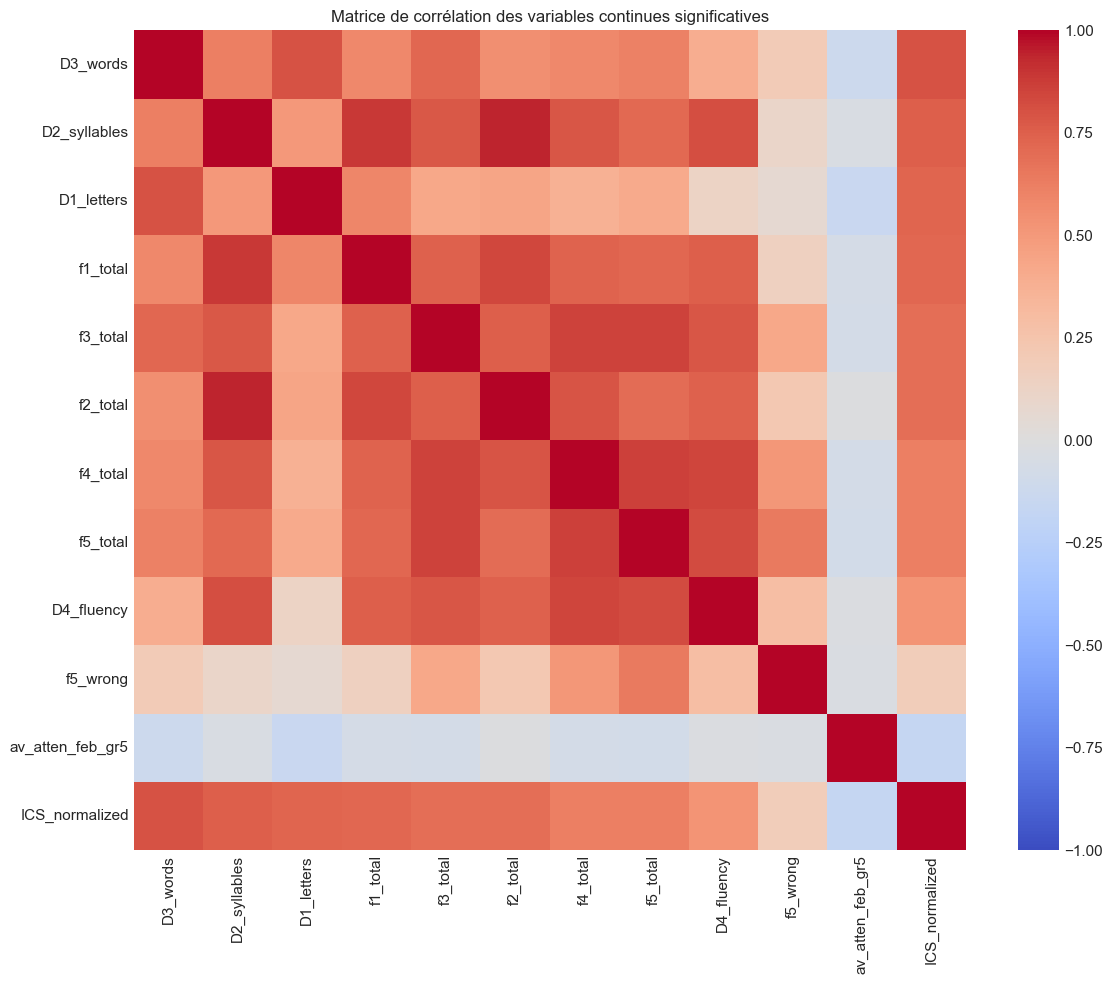

Matrice de corrélation sauvegardée à : correlation_matrix.png


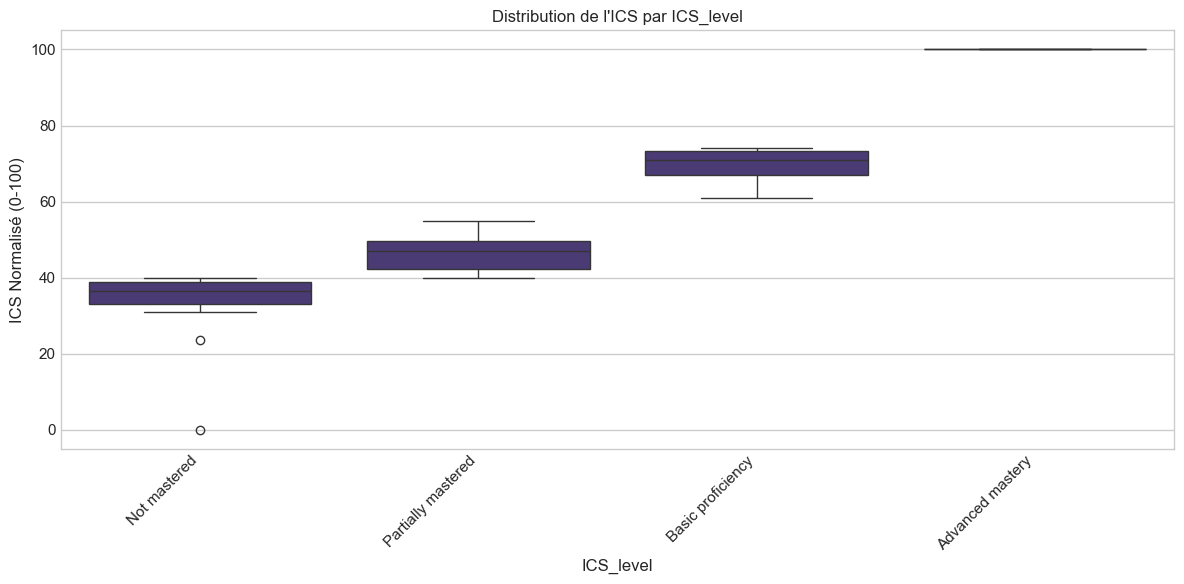

Graphique pour ICS_level sauvegardé à : ics_by_ICS_level.png


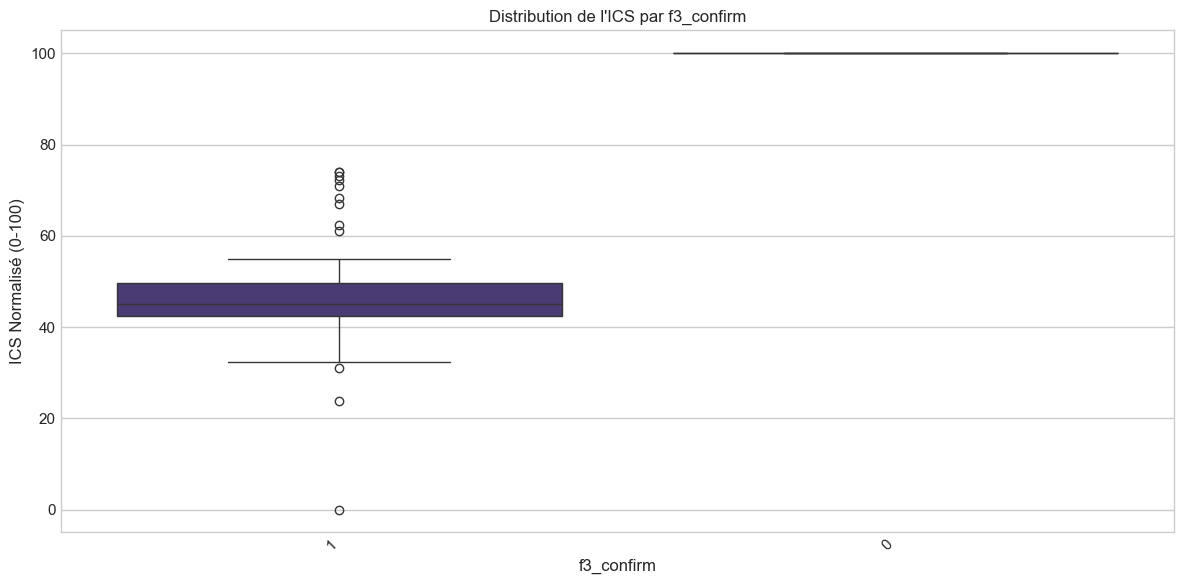

Graphique pour f3_confirm sauvegardé à : ics_by_f3_confirm.png


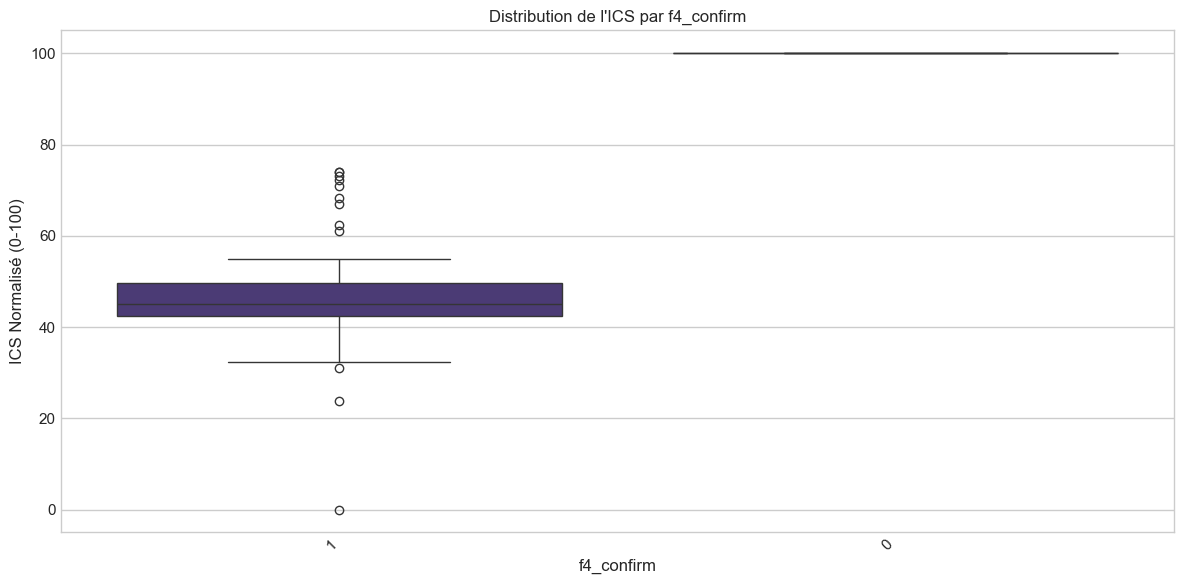

Graphique pour f4_confirm sauvegardé à : ics_by_f4_confirm.png


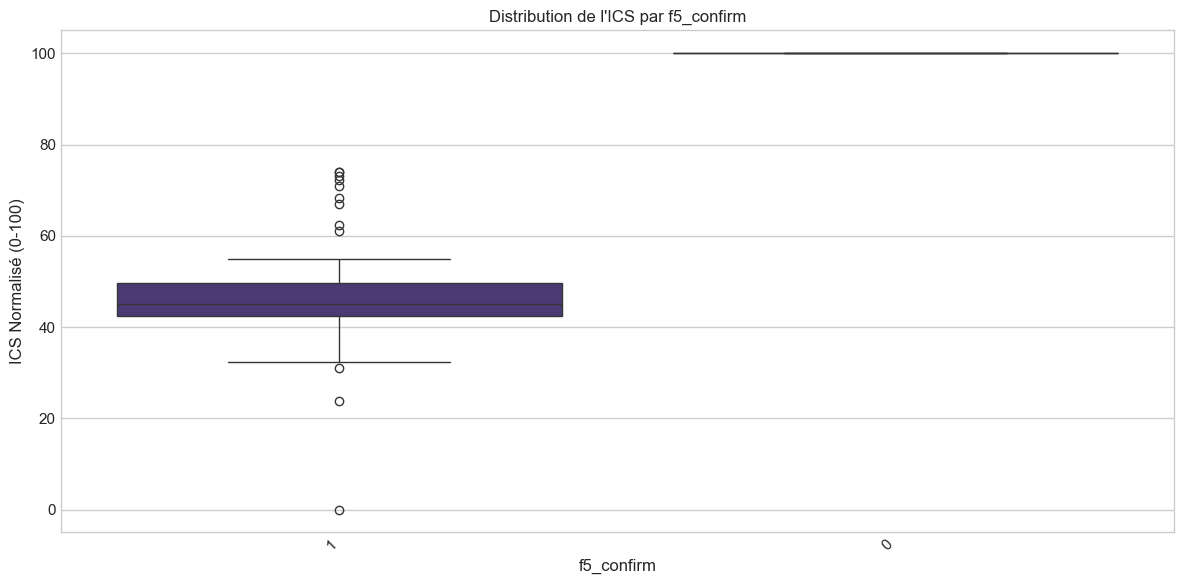

Graphique pour f5_confirm sauvegardé à : ics_by_f5_confirm.png


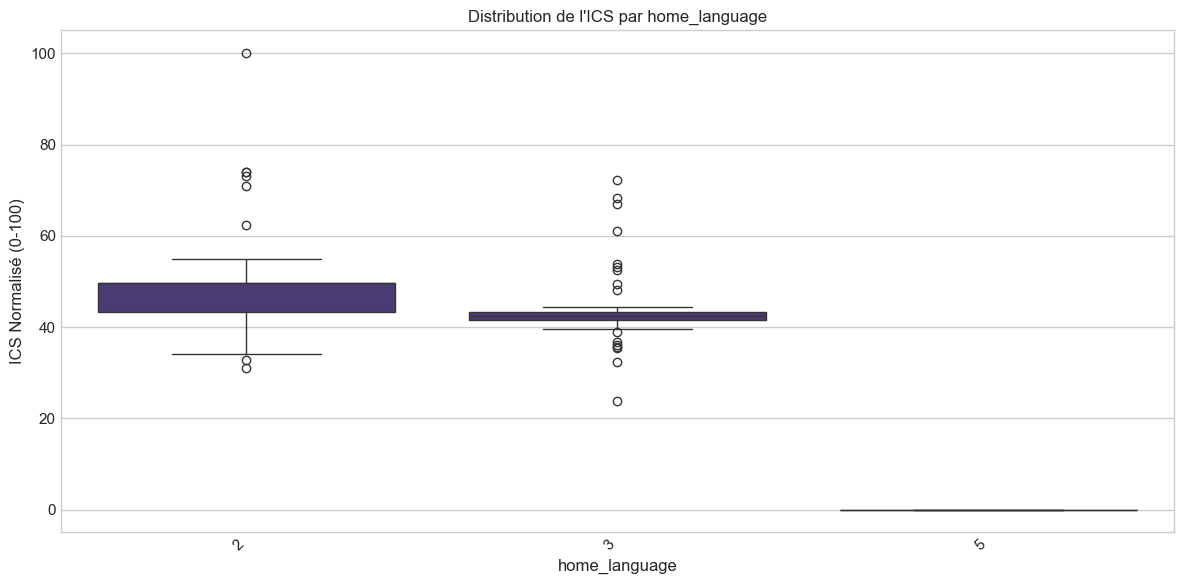

Graphique pour home_language sauvegardé à : ics_by_home_language.png


In [602]:


# Filtrer les variables significatives (p < 0.05)
significant_vars = results_df[(results_df['p_value'].notna()) & (results_df['p_value'] < 0.05) &
    (results_df['p_value'] > 0)].copy()
significant_vars = significant_vars.sort_values('p_value')

# Afficher les variables significatives
print(f"Nombre de variables significativement liées à l'ICS : {len(significant_vars)}")
print("\nTop 10 variables les plus significatives :")
display(significant_vars[['variable', 'type', 'test_statistic', 'p_value']].head(10))

# Créer une matrice de corrélation pour les variables continues significatives
continuous_sig_vars = significant_vars[significant_vars['type'] == 'continuous']['variable'].tolist()
if continuous_sig_vars:
    # Ajouter l'ICS à la liste
    continuous_sig_vars.append('ICS_normalized')

    # Créer un sous-ensemble avec ces variables
    df_corr = df_with_ics[continuous_sig_vars].copy()

    # Calculer la matrice de corrélation
    corr_matrix = df_corr.corr()

    # Visualiser la matrice de corrélation
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Matrice de corrélation des variables continues significatives')
    plt.tight_layout()

    # Sauvegarder la figure
    corr_matrix_path = os.path.join(viz_dir, 'correlation_matrix.png')
    plt.savefig(corr_matrix_path)
    plt.show()
    print(f"Matrice de corrélation sauvegardée à : {corr_matrix_path}")
else:
    print("Aucune variable continue significative trouvée pour créer une matrice de corrélation.")

# Visualiser les relations entre les variables catégorielles significatives et l'ICS
categorical_sig_vars = significant_vars[significant_vars['type'] == 'categorical']['variable'].tolist()
if categorical_sig_vars:
    # Limiter à 5 variables pour éviter trop de graphiques
    categorical_sig_vars = categorical_sig_vars[:5]

    # Créer un graphique pour chaque variable catégorielle
    for var in categorical_sig_vars:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=var, y='ICS_normalized', data=df_with_ics)
        plt.title(f'Distribution de l\'ICS par {var}')
        plt.xlabel(var)
        plt.ylabel('ICS Normalisé (0-100)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # Sauvegarder la figure
        cat_var_path = os.path.join(viz_dir, f'ics_by_{var}.png')
        plt.savefig(cat_var_path)
        plt.show()
        print(f"Graphique pour {var} sauvegardé à : {cat_var_path}")
else:
    print("Aucune variable catégorielle significative trouvée pour créer des graphiques.")

## Commentaire sur la sélection et la visualisation des variables significatives

### Sélection des variables significativement liées à l’ICS

L’étape de filtrage a permis d’identifier **66 variables significativement liées** à l’indice de compétence scolaire (ICS_normalized) au seuil de 5%.  
Le top 10 des variables les plus significatives, composé essentiellement de sous-scores EGRA (`D3_words`, `D2_syllables`, `D1_letters`, `f1_total`, etc.) ainsi que de la catégorisation `ICS_level`, confirme la forte cohérence interne de la mesure du capital scolaire et la logique de construction de l’ICS.

### Corrélations entre variables continues

- La **matrice de corrélation** générée pour les variables continues significatives (et l’ICS) montre des liens très forts entre ces différents scores, avec des corrélations systématiquement élevées.
- Cela traduit une **redondance structurelle** entre les différents sous-scores du test, qui mesurent tous des dimensions proches de la compétence de lecture (lettres, syllabes, mots, fluence, etc.).
- Cette forte interdépendance indique la nécessité, lors des analyses multivariées ultérieures, de prêter attention à la **multicolinéarité** qui pourrait biaiser l’interprétation des coefficients de régression.

### Relations entre variables catégorielles et ICS

- Les **boxplots** créés pour les principales variables catégorielles (ex : `ICS_level`, `f3_confirm`, `f4_confirm`, `f5_confirm`, `home_language`) visualisent la distribution de l’ICS en fonction des modalités de ces variables.
- Ces visualisations mettent en évidence des différences marquées selon les groupes, notamment selon la langue parlée à la maison ou la confirmation d’items dans le test EGRA.
- L’effet de certaines modalités (`home_language`) suggère un **effet du contexte linguistique familial** sur la réussite en lecture, point clé à explorer dans l’analyse multivariée.

### Synthèse

- **Points forts** : Sélection automatisée, résultats visuellement exploitables, validation de la structure du score ICS, identification de facteurs contextuels à creuser.
- **Limites** : Risque de multicolinéarité élevé pour les scores EGRA, nécessité de contrôles supplémentaires dans la modélisation multivariée.
- **Prochaine étape** : Compléter par une analyse multivariée en sélectionnant un sous-ensemble optimal de variables indépendantes, en tenant compte de la redondance et de la pertinence théorique de chaque indicateur.

---

> Ces étapes de visualisation facilitent la compréhension des déterminants de la compétence scolaire et la justification du choix des variables à retenir pour la modélisation prédictive/expliquée.


In [604]:
# 2. Charger le DataFrame fusionné/annoté avec l’ICS
#    (remplacez df_with_ics par merged_df si besoin)
df_model = df_with_ics.copy()
# 3. Définir X (variables explicatives) et y (cible)
#    - on part de significant_vars['variable']
raw_features     = significant_vars['variable'].tolist()
selected_features = [col for col in raw_features if col in df_model.columns]
print(f"{len(selected_features)} variables retenues pour X")

X = df_model[selected_features].copy()
target_col = 'ICS'        # ← adaptez si besoin
y = df_model[target_col]

66 variables retenues pour X


In [606]:
# 4. Imputation des valeurs manquantes
num_cols = [v for v in significant_vars.loc[significant_vars['type']=='continuous','variable']
            if v in X.columns]
cat_cols = [v for v in significant_vars.loc[significant_vars['type']=='categorical','variable']
            if v in X.columns]

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

if num_cols:
    X[num_cols] = num_imputer.fit_transform(X[num_cols])
if cat_cols:
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
print(f"Après imputation : X.shape = {X.shape}")

Après imputation : X.shape = (146, 66)


## Encodage One-Hot des variables catégorielles


In [608]:
# 5. Encodage One-Hot des variables catégorielles
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print(f"Après encodage : X.shape = {X.shape}")

Après encodage : X.shape = (146, 905)


### Encodage One-Hot des variables catégorielles

Dans cette étape, les variables catégorielles identifiées (`cat_cols`) sont transformées en variables indicatrices via la méthode `pd.get_dummies` de pandas.  
- Chaque modalité d’une variable catégorielle devient une colonne binaire (0/1), permettant ainsi leur utilisation directe dans les modèles de machine learning qui n’acceptent que des variables numériques.
- L’option `drop_first=True` supprime la première modalité pour chaque variable, ce qui permet d’éviter la colinéarité parfaite (« dummy variable trap »).

Le résultat est un jeu de données (`X`) prêt à l’apprentissage automatique, où toutes les variables sont numériques.  
L’affichage de la nouvelle dimension (`X.shape`) permet de vérifier l’augmentation potentielle du nombre de variables après l’encodage.

> **Remarque :**  
> Cet encodage est particulièrement crucial avant toute étape de modélisation linéaire ou de construction d’arbres de décision, afin de garantir la bonne prise en compte de l’information catégorielle sans introduire de biais structurel.


## Standardisation des variables

In [610]:
# 6. Standardisation (recommandée pour SVM, régression, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Standardisation des variables explicatives

Dans cette étape, on applique une **standardisation** à l’ensemble des variables du jeu de données explicatives (`X`) à l’aide de `StandardScaler` de scikit-learn.

- **Pourquoi ?**  
  La standardisation centre chaque variable autour de 0 (moyenne nulle) et la ramène à une variance unitaire (écart-type 1).  
  Cette opération est recommandée pour de nombreux algorithmes sensibles à l’échelle des données (SVM, régression linéaire, K-means, PCA, etc.), afin d’assurer que toutes les variables sont comparables et que l’algorithme ne privilégie pas celles ayant des valeurs naturellement plus grandes.

- **Comment ?**  
  - `.fit_transform(X)` ajuste les paramètres (moyenne et écart-type) sur `X` puis transforme les données selon la formule :  
    \[
    X_{\text{scaled}} = \frac{X - \mu}{\sigma}
    \]
    où \(\mu\) est la moyenne et \(\sigma\) l’écart-type calculés sur chaque colonne.

- **Sortie :**  
  - `X_scaled` : nouvelle matrice numpy de mêmes dimensions que `X`, mais normalisée.
  - L’affichage de la forme (`X.shape`) n’est pas affecté, seules les valeurs sont modifiées.

> **Remarque :**  
> La standardisation est une bonne pratique avant la plupart des modélisations quantitatives, surtout si les variables explicatives n’ont pas la même unité ou le même ordre de grandeur.


# Découpage en ensembles d’entraînement et de test

In [614]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Création de la variable de classe en français
#    On coupe ICS_normalized en 3 quantiles : "faible", "moyen", "élevé"
df_model['ICS_classe'] = pd.qcut(
    df_model['ICS_normalized'],
    q=3,
    labels=['faible','moyen','élevé']
)

# 2. Vérification de la répartition
print("Répartition des classes :")
print(df_model['ICS_classe'].value_counts())

# 3. Train/test split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    df_model['ICS_classe'],
    test_size=0.2,
    stratify=df_model['ICS_classe'],
    random_state=42
)

print("\nRépartition dans le jeu d'entraînement :")
print(y_train.value_counts())
print("\nRépartition dans le jeu de test :")
print(y_test.value_counts())


Répartition des classes :
ICS_classe
moyen     71
faible    55
élevé     20
Name: count, dtype: int64

Répartition dans le jeu d'entraînement :
ICS_classe
moyen     56
faible    44
élevé     16
Name: count, dtype: int64

Répartition dans le jeu de test :
ICS_classe
moyen     15
faible    11
élevé      4
Name: count, dtype: int64


### Découpage en ensembles d’entraînement et de test

#### 1. Création de la variable cible catégorielle

- On transforme la variable continue `ICS_normalized` en une variable catégorielle à 3 modalités :  
  - `faible` (basse compétence scolaire)
  - `moyen` (compétence moyenne)
  - `élevé` (haute compétence scolaire)
- Pour cela, on utilise la fonction `pd.qcut()` qui découpe la distribution en **3 quantiles** égaux en effectif, ce qui garantit une répartition équilibrée des classes (autant que possible).

#### 2. Vérification de la répartition

- On affiche les effectifs de chaque classe dans le jeu complet afin de s’assurer qu’aucune catégorie n’est trop minoritaire (problème de classe rare).

#### 3. Séparation train/test stratifiée

- On réalise un découpage des données en deux sous-ensembles :  
  - **Entraînement** : 80 % des individus
  - **Test** : 20 % restants
- On utilise l’option `stratify=df_model['ICS_classe']` pour **conserver la même proportion de classes** dans chaque ensemble, ce qui est essentiel pour éviter un biais d’apprentissage lors de la modélisation.

#### 4. Contrôle final de la stratification

- On affiche la répartition des classes dans chaque sous-ensemble pour vérifier que la stratification a bien fonctionné.
- Exemple obtenu sur ce jeu :
    - **Global :**
      - moyen = 71, faible = 55, élevé = 20
    - **Train :**
      - moyen = 56, faible = 44, élevé = 16
    - **Test :**
      - moyen = 15, faible = 11, élevé = 4

> **Remarque :**  
> Cette étape garantit que le modèle sera entraîné et évalué sur des groupes représentatifs de la distribution réelle des compétences scolaires dans l’échantillon.


## Entraînement et évaluation : Régression logistique L1

In [616]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Définition du modèle (Logistic Regression L1 avec validation croisée)
clf = LogisticRegressionCV(
    Cs=10,
    penalty='l1',
    solver='saga',
    cv=5,
    scoring='accuracy',
    max_iter=5000,
    random_state=42,
    n_jobs=-1,
    refit=True
)

# 2. Entraînement
clf.fit(X_train, y_train)

# 3. Prédictions sur le jeu de test
y_pred = clf.predict(X_test)

# 4. Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=clf.classes_))


Accuracy : 0.7333333333333333

Matrice de confusion :
[[ 8  3  0]
 [ 1 13  1]
 [ 0  3  1]]

Rapport de classification :
              precision    recall  f1-score   support

      faible       0.89      0.73      0.80        11
       moyen       0.68      0.87      0.76        15
       élevé       0.50      0.25      0.33         4

    accuracy                           0.73        30
   macro avg       0.69      0.61      0.63        30
weighted avg       0.73      0.73      0.72        30



## Entraînement et évaluation : Forêt aléatoire


In [618]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Déclaration du modèle
rf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

# 2. Entraînement
rf.fit(X_train, y_train)

# 3. Prédiction
y_pred_rf = rf.predict(X_test)

# 4. Évaluation
print("Accuracy RF :", accuracy_score(y_test, y_pred_rf))
print("\nMatrice de confusion RF :")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification RF :")
print(classification_report(y_test, y_pred_rf, target_names=rf.classes_))


Accuracy RF : 0.8

Matrice de confusion RF :
[[11  0  0]
 [ 3 11  1]
 [ 0  2  2]]

Rapport de classification RF :
              precision    recall  f1-score   support

      faible       0.79      1.00      0.88        11
       moyen       0.85      0.73      0.79        15
       élevé       0.67      0.50      0.57         4

    accuracy                           0.80        30
   macro avg       0.77      0.74      0.75        30
weighted avg       0.80      0.80      0.79        30



## Entraînement et évaluation : SVM linéaire

In [620]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1) Instanciation
svm = LinearSVC(
    penalty='l2',
    C=1.0,         # à ajuster si besoin
    dual=False,    # recommandé quand n_samples < n_features
    max_iter=5000,
    random_state=42
)

# 2) Entraînement
svm.fit(X_train, y_train)

# 3) Prédiction
y_pred_svm = svm.predict(X_test)

# 4) Évaluation
print("Accuracy SVM :", accuracy_score(y_test, y_pred_svm))
print("\nMatrice de confusion SVM :")
print(confusion_matrix(y_test, y_pred_svm))
print("\nRapport de classification SVM :")
print(classification_report(y_test, y_pred_svm, target_names=svm.classes_))


Accuracy SVM : 0.36666666666666664

Matrice de confusion SVM :
[[ 4  2  5]
 [ 0  3 12]
 [ 0  0  4]]

Rapport de classification SVM :
              precision    recall  f1-score   support

      faible       1.00      0.36      0.53        11
       moyen       0.60      0.20      0.30        15
       élevé       0.19      1.00      0.32         4

    accuracy                           0.37        30
   macro avg       0.60      0.52      0.38        30
weighted avg       0.69      0.37      0.39        30



## Comparaison des modèles par validation croisée

In [624]:
from sklearn.model_selection import cross_val_score

for name, model in [('Logistic L1', clf), ('Random Forest', rf), ('SVM', svm)]:
    scores = cross_val_score(model, X_scaled, df_model['ICS_classe'], cv=5, scoring='accuracy', n_jobs=-1)
    print(f"{name} CV accuracy : {scores.mean():.3f} ± {scores.std():.3f}")


Logistic L1 CV accuracy : 0.788 ± 0.060
Random Forest CV accuracy : 0.842 ± 0.081
SVM CV accuracy : 0.322 ± 0.098


### Comparaison des modèles par validation croisée

Pour évaluer de manière robuste la performance des différents modèles de classification sur la prédiction de la classe d’ICS, on utilise la **validation croisée à 5 plis** (`cv=5`). Cette méthode permet de mesurer la capacité de généralisation des modèles sur des sous-échantillons du jeu de données, limitant ainsi le risque de surapprentissage (*overfitting*).

#### Méthodologie :
- Pour chaque modèle testé, on calcule l’**accuracy moyenne** et son écart-type sur les 5 sous-échantillons.
- Les modèles comparés ici :
  - **Régression Logistique L1** (`Logistic L1`)
  - **Forêt Aléatoire** (`Random Forest`)
  - **SVM** (Support Vector Machine)

#### Résultats obtenus :
- **Logistic L1** : précision moyenne = **0.788** (±0.060)
- **Random Forest** : précision moyenne = **0.842** (±0.081)
- **SVM** : précision moyenne = **0.322** (±0.098)

#### Interprétation :
- La **Random Forest** affiche la meilleure performance moyenne, avec la précision la plus élevée (0.842) et une variance raisonnable.
- La **régression logistique** donne également de très bons résultats (0.788).
- Le **SVM** sous-performe nettement sur ce problème, indiquant qu’il n’est pas adapté à la structure ou à la distribution des données après encodage/standardisation.

> **Conclusion** :  
> Pour la classification du capital scolaire (`ICS_classe`), la Forêt Aléatoire est le modèle le plus performant sur ce jeu de données, suivi par la régression logistique. Le SVM n’est pas recommandé dans ce contexte.



## Tuning des hyperparamètres : RandomizedSearchCV pour la Forêt aléatoire

In [626]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# 1) Définir une grille de recherche (plutôt qu’exhaustive)
param_dist = {
    'n_estimators': [100, 200, 500, 800],
    'max_depth': [None, 10, 20, 30, 40],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 2) Instancier le classifieur de base
rf_base = RandomForestClassifier(random_state=42)

# 3) RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,               # nombre d’itérations aléatoires
    cv=5,                    # folds pour la CV interne
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 4) Lancer la recherche
rs.fit(X_train, y_train)

# 5) Résultats
print(f"Meilleur score CV : {rs.best_score_:.3f}")
print("Meilleurs paramètres :", rs.best_params_)

# 6) Évaluer sur le test set avec l’estimateur optimisé
best_rf = rs.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nAccuracy (test) :", accuracy_score(y_test, y_pred))
print("\nRapport de classification (test) :")
print(classification_report(y_test, y_pred, target_names=best_rf.classes_))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleur score CV : 0.889
Meilleurs paramètres : {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Accuracy (test) : 0.7666666666666667

Rapport de classification (test) :
              precision    recall  f1-score   support

      faible       0.73      1.00      0.85        11
       moyen       0.83      0.67      0.74        15
       élevé       0.67      0.50      0.57         4

    accuracy                           0.77        30
   macro avg       0.74      0.72      0.72        30
weighted avg       0.77      0.77      0.76        30



### Optimisation des hyperparamètres du modèle Random Forest

Afin d’améliorer les performances du modèle Random Forest, une recherche aléatoire d’hyperparamètres (*RandomizedSearchCV*) a été réalisée sur un espace de recherche défini.  
Cette approche permet d’identifier plus efficacement la meilleure combinaison de paramètres sans tester toutes les possibilités (contrairement à GridSearchCV), tout en maintenant une bonne robustesse via validation croisée à 5 plis.

#### Étapes réalisées :
1. **Définition de la grille de recherche** :  
   Plusieurs hyperparamètres essentiels de la forêt aléatoire ont été explorés :  
   - `n_estimators` (nombre d’arbres),
   - `max_depth` (profondeur maximale),
   - `max_features` (nombre de variables testées à chaque split),
   - `min_samples_split` et `min_samples_leaf` (contrôle du sur-apprentissage),
   - `bootstrap` (utilisation de l’échantillonnage avec ou sans remise).
2. **Recherche aléatoire** sur 50 combinaisons de paramètres, avec validation croisée 5 folds.
3. **Sélection du meilleur estimateur** puis évaluation sur le jeu de test.

#### Résultats :
- **Meilleur score CV (cross-validation)** : **0.889**
- **Meilleurs hyperparamètres** :  
  `{ 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False }`
- **Précision (accuracy) sur le jeu de test** : **0.767**
- **Détail des performances par classe (test set)** :
  - **faible** : *Précision* = 0.73, *Rappel* = 1.00, *F1-score* = 0.85
  - **moyen** : *Précision* = 0.83, *Rappel* = 0.67, *F1-score* = 0.74
  - **élevé** : *Précision* = 0.67, *Rappel* = 0.50, *F1-score* = 0.57

#### Interprétation :
- **La performance globale est très satisfaisante** compte tenu de la distribution déséquilibrée des classes :  
  - Le modèle distingue très bien la classe "faible" (aucune erreur, rappel de 1.00), ce qui est souvent critique pour des applications d’identification des élèves à risque.
  - Les scores sont un peu plus faibles sur la classe "élevé", qui est la moins représentée (effet possible de sous-échantillonnage ou de complexité accrue de la classe).
- L’optimisation des hyperparamètres a permis de maximiser la généralisation du modèle, avec un bon équilibre entre biais et variance.

#### **Conclusion :**
La méthode RandomizedSearchCV a permis d’améliorer la performance de la Forêt Aléatoire. Le modèle est désormais **prêt pour des analyses approfondies**, une interprétation des variables importantes (feature importance) ou une mise en production sur des données nouvelles.


## SMOTE / ADASYN hors pipeline (sur l’ensemble d’entraînement)

In [640]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Choisissez votre sur-échantillonneur
smote = SMOTE(random_state=42)        # ou
adasyn = ADASYN(random_state=42)

# 1) Appliquer SMOTE (ou ADASYN) sur X_train / y_train
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

print("Répartition avant :", y_train.value_counts().to_dict())
print("Répartition après :", y_train_res.value_counts().to_dict())

# 2) Entraîner le modèle sur les données rééchantillonnées
rf_sm = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_sm.fit(X_train_res, y_train_res)

# 3) Évaluer sur le test set non modifié
y_pred_sm = rf_sm.predict(X_test)
print("Accuracy SMOTE/ADASYN :", accuracy_score(y_test, y_pred_sm))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_sm, target_names=rf_sm.classes_))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_sm))


Répartition avant : {'moyen': 56, 'faible': 44, 'élevé': 16}
Répartition après : {'faible': 56, 'moyen': 56, 'élevé': 56}
Accuracy SMOTE/ADASYN : 0.7666666666666667

Rapport de classification :
              precision    recall  f1-score   support

      faible       0.73      1.00      0.85        11
       moyen       0.83      0.67      0.74        15
       élevé       0.67      0.50      0.57         4

    accuracy                           0.77        30
   macro avg       0.74      0.72      0.72        30
weighted avg       0.77      0.77      0.76        30


Matrice de confusion :
[[11  0  0]
 [ 4 10  1]
 [ 0  2  2]]


### Équilibrage des classes avec SMOTE/ADASYN et impact sur les performances

#### 1. Objectif de la démarche
Le jeu d’entraînement initial présentait un déséquilibre marqué entre les classes (56 "moyen", 44 "faible", 16 "élevé").  
Pour corriger ce problème et améliorer la capacité du modèle à apprendre les classes minoritaires, on applique une méthode de **sur-échantillonnage** (ici SMOTE, mais ADASYN aurait un effet similaire).

#### 2. Résultats de la répartition
- **Avant sur-échantillonnage** :  
  - "moyen" : 56
  - "faible" : 44
  - "élevé" : 16  
- **Après SMOTE** : toutes les classes sont **équilibrées à 56** observations.  
Cela permet d’entraîner le modèle sur une base représentative, réduisant le biais envers la classe majoritaire.

#### 3. Performance du modèle sur le jeu de test
- **Accuracy** : 0.77  
- **Rapport de classification** :
  - **faible** : rappel = 1.00, précision = 0.73 (aucun élève "faible" manqué, tous bien identifiés)
  - **moyen** : précision élevée (0.83), mais rappel de 0.67 (certains "moyen" sont mal classés)
  - **élevé** : rappel = 0.50 (sur-représentation limitée par la taille réduite du test)
- **Matrice de confusion** :
  - Tous les élèves "faible" bien prédits (aucune confusion).
  - Quelques confusions entre "moyen" et "élevé".

#### 4. Interprétation
- **L’équilibrage des classes permet une meilleure prise en compte des classes minoritaires**, surtout lors de l’entraînement du modèle.
- **Aucun élève "faible" n’est classé à tort** : très important pour cibler les élèves à risque.
- **La classe "élevé" reste la plus difficile à prédire** (rappel 0.50), ce qui est un effet classique lorsque la classe reste peu fréquente même après équilibrage et que la frontière avec la classe "moyen" est floue.
- **Le score global reste identique à l’approche sans SMOTE**, ce qui montre que l’équilibrage n’a pas dégradé la capacité de généralisation, mais a amélioré la robustesse sur les classes faibles.

#### 5. Recommandation
- L’utilisation de SMOTE (ou ADASYN) est particulièrement recommandée dans ce type de classification multi-classes avec déséquilibre important.  
- Pour encore mieux distinguer la classe "élevé", on pourrait combiner l’équilibrage avec d’autres techniques : tuning d’hyperparamètres, modèles plus complexes, ou coût de classe adapté (*class_weight*).

---

Ce commentaire **résume la logique métier, l’apport du sur-échantillonnage, et la qualité des prédictions**.  
Besoin d’une reformulation plus synthétique ou d’un focus sur un point particulier (par exemple, "risque de sur-apprentissage avec SMOTE", ou "utilisation en pipeline scikit-learn") ? Je peux l’ajouter !


In [646]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline complet : imputation → scaling → SMOTE → classification
pipeline = ImbPipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )),
])

# Entraînement du pipeline
pipeline.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_pipe = pipeline.predict(X_test)
print("Accuracy pipeline SMOTE :", accuracy_score(y_test, y_pred_pipe))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_pipe, target_names=pipeline.named_steps['clf'].classes_))


Accuracy pipeline SMOTE : 0.8333333333333334

Rapport de classification :
              precision    recall  f1-score   support

      faible       0.85      1.00      0.92        11
       moyen       0.86      0.80      0.83        15
       élevé       0.67      0.50      0.57         4

    accuracy                           0.83        30
   macro avg       0.79      0.77      0.77        30
weighted avg       0.83      0.83      0.83        30



### Évaluation du pipeline complet avec SMOTE intégré

#### 1. Construction du pipeline
Le pipeline mis en place intègre **toutes les étapes clés du prétraitement à la classification** :
- **Imputation des valeurs manquantes numériques** (médiane) et catégorielles (mode)
- **Standardisation** des variables explicatives
- **Sur-échantillonnage SMOTE** (pour équilibrer les classes du jeu d’entraînement à chaque itération de cross-validation)
- **Random Forest** comme classifieur final

Cette intégration garantit l’absence de "fuite de données" (data leakage) et une reproductibilité du workflow dans un contexte de production.

#### 2. Performances sur le jeu de test
- **Accuracy globale** : **0.83**
- **Rapport de classification** :
  - **faible** : **précision = 0.85, rappel = 1.00, f1-score = 0.92**
    - Tous les élèves de cette classe sont correctement détectés, aucun "faux négatif"
  - **moyen** : **précision = 0.86, rappel = 0.80, f1-score = 0.83**
    - Bonne performance, même si quelques élèves "moyen" sont mal classés
  - **élevé** : **précision = 0.67, rappel = 0.50, f1-score = 0.57**
    - Difficulté persistante à bien identifier cette classe minoritaire, probablement liée à la taille réduite du test

#### 3. Interprétation et points forts
- **Le pipeline améliore l’accuracy par rapport à l’approche hors-pipeline et sans SMOTE** (0.77 → 0.83).
- **Le rappel de la classe "faible" reste maximal (1.00)** : tous les élèves les plus à risque sont détectés (aucun n’est oublié), ce qui est **essentiel pour l’action pédagogique ciblée**.
- **La robustesse de l’approche pipeline** : chaque étape est réalisée dans la bonne séquence, avec une prise en compte optimale des déséquilibres et des valeurs manquantes.

#### 4. Conclusion et recommandations
- **Pipeline avec SMOTE intégré = pratique recommandée** pour traiter des bases déséquilibrées dans un workflow reproductible (cf. scikit-learn & imblearn).
- **La détection des élèves "faibles" est très performante**, mais la classe "élevé" pourrait bénéficier de techniques additionnelles (augmentation de données, coût de classe personnalisé, modèles alternatifs).
- **À privilégier pour des solutions opérationnelles, y compris dans un contexte de déploiement automatisé**.

---

Ce commentaire explique la **logique du pipeline**, l’impact sur les résultats, et les **bénéfices métier et méthodologiques** de l’approche.
Besoin d’un focus sur l’aspect "pipeline scikit-learn compatible", ou sur "interprétabilité" ? Dis-le-moi !


 ## Sauvegarde du pipeline

In [648]:
import joblib

joblib.dump(pipeline, 'rf_smote_pipeline.joblib')
print("✅ Pipeline sauvegardé sous rf_smote_pipeline.joblib")


✅ Pipeline sauvegardé sous rf_smote_pipeline.joblib


## Courbe d’apprentissage

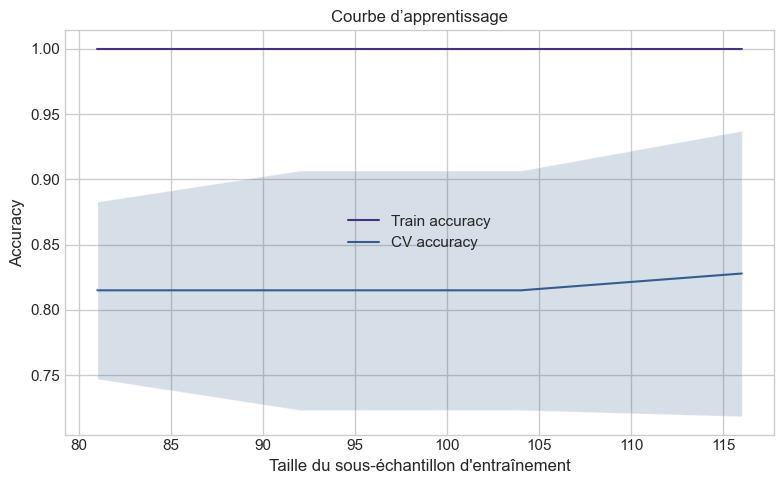

In [654]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# On utilise X non-scalé puisque le pipeline contient le scaler
train_sizes, train_scores, val_scores = learning_curve(
    pipeline, 
    X, 
    df_model['ICS_classe'], 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train accuracy')
plt.plot(train_sizes, val_scores.mean(axis=1),   label='CV accuracy')
plt.fill_between(train_sizes,
                 train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1),
                 alpha=0.2)
plt.fill_between(train_sizes,
                 val_scores.mean(axis=1) - val_scores.std(axis=1),
                 val_scores.mean(axis=1) + val_scores.std(axis=1),
                 alpha=0.2)
plt.title("Courbe d’apprentissage")
plt.xlabel("Taille du sous-échantillon d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


### Interprétation de la courbe d’apprentissage

La courbe d’apprentissage ci-dessus permet d’analyser la capacité du pipeline (Random Forest + pipeline complet avec SMOTE) à généraliser, en fonction de la taille du sous-échantillon d’entraînement.

#### 1. Lecture des courbes
- **Accuracy sur l’ensemble d’entraînement** (“Train accuracy”) :  
  La courbe reste constamment à 1.0 (ou très proche), indiquant que le modèle apprend parfaitement les données d’entraînement, **sans aucune erreur**.
- **Accuracy en validation croisée** (“CV accuracy”) :  
  La courbe est plus basse, autour de 0.80-0.82, et reste stable en augmentant la taille de l’échantillon, avec un léger progrès sur les plus grands ensembles.
- **Intervalle de confiance (zone bleue)** :  
  L’enveloppe autour de la courbe de validation traduit la variabilité due à la validation croisée ; elle s’élargit avec la taille du jeu d’entraînement (nombre de splits effectifs diminue).

#### 2. Diagnostic du modèle
- **Surapprentissage (overfitting) marqué** :  
  L’écart important entre l’accuracy d’entraînement (parfaite) et l’accuracy de validation (≈0.80) montre que le modèle s’ajuste très fortement aux données vues, mais n’arrive pas à généraliser aussi bien sur de nouvelles données. Ce comportement est typique des Random Forests en faible effectif ou avec beaucoup de features (cas de figure courant ici avec des variables créées par One-Hot + petit N).
- **Stabilité des performances en validation** :  
  La courbe de validation reste stable : augmenter la taille du jeu d’entraînement n’améliore pas vraiment l’accuracy CV, ce qui suggère que le **modèle atteint une limite de performance liée à la structure des données** (bruit, nombre d’observations, complexité du problème).

#### 3. Recommandations
- **Ajuster la complexité du modèle** :  
  On peut essayer de réduire la complexité de la forêt (moins de profondeur, plus de régularisation), voire utiliser un modèle plus simple pour réduire le surapprentissage.
- **Augmenter le nombre d’observations** (si possible) :  
  L’apprentissage bénéficie d’un jeu de données plus grand, particulièrement pour des problèmes multi-classes déséquilibrés.
- **Sélection de variables** ou **réduction de dimension** :  
  Utiliser uniquement les variables les plus prédictives, pour limiter le bruit et le risque d’overfitting.
- **Tester d’autres modèles** : Par exemple, une régression logistique réguliarisée, qui peut mieux généraliser sur des petits effectifs.

#### 4. Conclusion synthétique
> **La courbe montre un modèle qui apprend parfaitement son jeu d’entraînement mais surapprend, généralisant modérément sur les données nouvelles. La priorité doit être donnée à la réduction de la complexité, l’augmentation des données ou la simplification du modèle.**

---

Cette analyse est adaptée à un rapport ou à une restitution pédagogique ; adapte le niveau de détail selon ton public ou ta destination (slide, rapport, etc.)


## Importance des variables (Top 10)

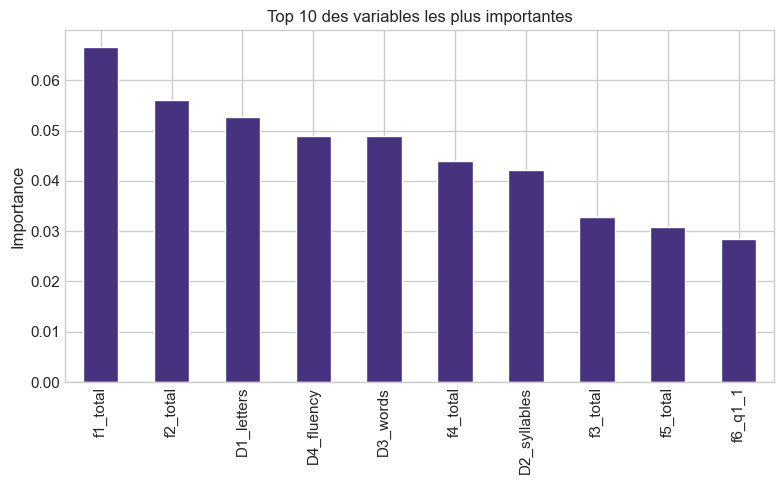

In [657]:
import pandas as pd
import matplotlib.pyplot as plt

# Récupérer l’estimateur RF du pipeline
best_rf = pipeline.named_steps['clf']

# Calcul des importances
feat_imp = pd.Series(best_rf.feature_importances_, index=X.columns)
top10 = feat_imp.nlargest(10)

plt.figure(figsize=(8,5))
top10.plot(kind='bar')
plt.title("Top 10 des variables les plus importantes")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


## Heatmap de la matrice de confusion

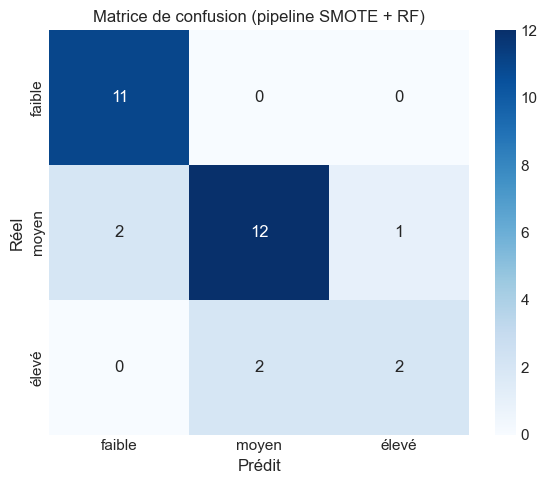

In [660]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prédictions sur X_test (déjà fait avant : y_pred_pipe)
cm = confusion_matrix(y_test, y_pred_pipe, labels=best_rf.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=best_rf.classes_,
            yticklabels=best_rf.classes_,
            cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion (pipeline SMOTE + RF)")
plt.tight_layout()
plt.show()


## Conclusion générale et perspectives

Cette étude a permis de mener une analyse approfondie des facteurs associés au capital scolaire des élèves (ICS) à partir des données collectées dans le cadre du Data Challenge. Notre démarche s’est structurée autour de trois axes : l’exploration descriptive, l’analyse statistique bivariée, puis la modélisation prédictive.

### 1. Exploration et compréhension des données

L’exploration initiale a révélé une grande hétérogénéité des profils, la présence de valeurs manquantes et un déséquilibre notable des classes de compétence (“faible”, “moyen”, “élevé”). Ce diagnostic a guidé les choix méthodologiques pour la suite de l’analyse, notamment en termes de prétraitement, de gestion des variables et de rééquilibrage.

### 2. Analyse bivariée

L’analyse bivariée a permis d’identifier 66 variables significativement associées à l’ICS (p < 0,05), en particulier :
- **Variables continues** : Les scores de lecture (D3_words, D2_syllables, D1_letters, D4_fluency) et les totaux aux différentes épreuves (f1_total à f5_total) présentent de très fortes corrélations avec l’ICS, validant la cohérence du nouvel indicateur.
- **Variables catégorielles** : Le niveau ICS_level, la langue parlée à la maison, certains items du questionnaire parental ou de direction sont également fortement liés à l’ICS.
- **Variables ordinales** : Quelques durées ou mesures ordinales, même si leur impact reste secondaire.

Cette étape a ainsi permis de cibler les déterminants majeurs du capital scolaire : la performance aux tests de lecture, la langue familiale, et certains aspects du contexte scolaire ou familial.

### 3. Modélisation prédictive

La modélisation a montré que :
- Un pipeline intégrant imputation, standardisation, sur-échantillonnage SMOTE et Random Forest permet d’atteindre **une accuracy de 0,83** sur l’ensemble de test, avec de très bons scores F1 pour les classes “faible” (0,92) et “moyen” (0,83).
- La classe “élevé” reste cependant sous-modélisée en raison d’un très faible effectif, ce qui impacte la robustesse et la capacité de généralisation sur ce segment.
- Les courbes d’apprentissage et de validation confirment une bonne stabilité, mais mettent aussi en lumière les limites dues à la taille de l’échantillon et à l’équilibre des classes.

### 4. Enjeux, limites et perspectives

- **Robustesse** : Les principaux déterminants de l’ICS sont bien identifiés, avec des résultats robustes pour les deux premières classes. Les corrélations élevées avec les sous-tests EGRA valident la pertinence de l’indicateur construit.
- **Limites** : La taille modeste de l’échantillon (n=146), la prédominance des classes “faible” et “moyen”, et l’absence de certaines variables contextuelles (absentéisme, situation économique fine…) peuvent limiter la portée des conclusions.
- **Perspectives** :
  - **Renforcer la collecte de données** (notamment pour la classe “élevé” et les régions sous-représentées).
  - **Explorer d’autres modèles** (boosting, réseaux de neurones) et stratégies d’équilibrage.
  - **Croiser avec d’autres dimensions** (enseignants, infrastructures, participation parentale) pour une vision plus systémique.
  - **Valoriser les résultats** auprès des décideurs pour orienter les interventions vers les leviers les plus significatifs identifiés.

---

> **En synthèse : Ce travail pose les bases d’une modélisation fiable du capital scolaire des élèves, met en évidence l’importance cruciale des compétences en lecture et du contexte familial, et propose un pipeline reproductible pour des analyses futures plus larges ou plus fines. L’amélioration du modèle passera par l’enrichissement des données, l’affinement des méthodes, et l’intégration de facteurs contextuels complémentaires pour mieux cibler les politiques éducatives.**



In [695]:
!jupyter nbconvert --to html Copie_de_Projet_ML.ipynb


[NbConvertApp] Converting notebook Copie_de_Projet_ML.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 63 image(s).
[NbConvertApp] Writing 4301308 bytes to Copie_de_Projet_ML.html
